In [1]:
import numpy
import pandas

import seaborn as sns

from matplotlib import pyplot


sns.set_theme(font="IPAexGothic")
pyplot.rcParams["figure.figsize"] = (20, 10)


In [2]:
from datetime import datetime

In [3]:
g_start_date = datetime.now()
g_start_date.strftime("%Y/%m/%d %T")


'2023/10/24 02:40:53'

In [4]:
url="https://www.mof.go.jp/jgbs/reference/interest_rate/data/jgbcm_all.csv"
_df = pandas.read_csv(url, header=1, encoding="shift-jis")
_df.tail()


基準日      1年     2年     3年     4年     5年     6年     7年     8年  \
12574  R5.9.25  -0.063  0.033  0.093  0.192  0.318  0.375  0.472  0.577   
12575  R5.9.26  -0.063  0.034  0.093  0.193  0.317  0.379  0.490  0.596   
12576  R5.9.27  -0.064  0.034   0.09  0.188  0.313  0.374  0.488  0.596   
12577  R5.9.28  -0.055  0.044  0.104  0.209  0.331  0.395  0.507  0.615   
12578  R5.9.29  -0.064  0.044  0.108  0.219  0.341  0.409  0.521  0.630   

          9年    10年    15年    20年    25年    30年    40年  
12574  0.654  0.738  1.129  1.425  1.551  1.612   1.75  
12575  0.669  0.752  1.133  1.429  1.555  1.619   1.75  
12576  0.669  0.747  1.129  1.432  1.559  1.627  1.753  
12577  0.692  0.765  1.142  1.441  1.567  1.634   1.76  
12578  0.703  0.774  1.165  1.456  1.575  1.649  1.776

In [5]:
def convert_wareki_to_seireki(wareki_date):
    """
    和暦を西暦に変換する関数。
    """
    era = wareki_date[0]
    year, month, day = map(int, wareki_date[1:].split('.'))

    if era == "S":  # 昭和
        seireki_year = 1925 + year
    elif era == "H":  # 平成
        seireki_year = 1988 + year
    elif era == "R":  # 令和
        seireki_year = 2018 + year
    else:
        raise ValueError(f"Unknown era: {era}")

    return f"{seireki_year}-{month:02}-{day:02}"


In [6]:
_df["ds"] = pandas.to_datetime(_df["基準日"].apply(convert_wareki_to_seireki))
_df[["基準日", "ds"]]

基準日         ds
0      S49.9.24 1974-09-24
1      S49.9.25 1974-09-25
2      S49.9.26 1974-09-26
3      S49.9.27 1974-09-27
4      S49.9.28 1974-09-28
...         ...        ...
12574   R5.9.25 2023-09-25
12575   R5.9.26 2023-09-26
12576   R5.9.27 2023-09-27
12577   R5.9.28 2023-09-28
12578   R5.9.29 2023-09-29

[12579 rows x 2 columns]

In [7]:
_df.replace('-', float('nan'), inplace=True)


In [8]:
_df.head()

基準日      1年     2年     3年     4年     5年     6年    7年     8年     9年  \
0  S49.9.24  10.327  9.362   8.83  8.515  8.348  8.290  8.24  8.121  8.127   
1  S49.9.25  10.333  9.364  8.831  8.516  8.348  8.290  8.24  8.121  8.127   
2  S49.9.26   10.34  9.366  8.832  8.516  8.348  8.290  8.24  8.122  8.128   
3  S49.9.27  10.347  9.367  8.833  8.517  8.349  8.290  8.24  8.122  8.128   
4  S49.9.28  10.354  9.369  8.834  8.518  8.349  8.291  8.24  8.122  8.129   

   10年  15年  20年  25年  30年  40年         ds  
0  NaN  NaN  NaN  NaN  NaN  NaN 1974-09-24  
1  NaN  NaN  NaN  NaN  NaN  NaN 1974-09-25  
2  NaN  NaN  NaN  NaN  NaN  NaN 1974-09-26  
3  NaN  NaN  NaN  NaN  NaN  NaN 1974-09-27  
4  NaN  NaN  NaN  NaN  NaN  NaN 1974-09-28

In [9]:
rate_cols = [col for col in _df.columns if col not in ["基準日", "ds"]]
rate_cols = ["1年", "5年", "10年", "20年"]
rate_cols

['1年', '5年', '10年', '20年']

In [10]:
_df[rate_cols] = _df[rate_cols].astype(float)
_df.head(3)

基準日      1年     2年     3年     4年     5年    6年    7年     8年     9年  \
0  S49.9.24  10.327  9.362   8.83  8.515  8.348  8.29  8.24  8.121  8.127   
1  S49.9.25  10.333  9.364  8.831  8.516  8.348  8.29  8.24  8.121  8.127   
2  S49.9.26  10.340  9.366  8.832  8.516  8.348  8.29  8.24  8.122  8.128   

   10年  15年  20年  25年  30年  40年         ds  
0  NaN  NaN  NaN  NaN  NaN  NaN 1974-09-24  
1  NaN  NaN  NaN  NaN  NaN  NaN 1974-09-25  
2  NaN  NaN  NaN  NaN  NaN  NaN 1974-09-26

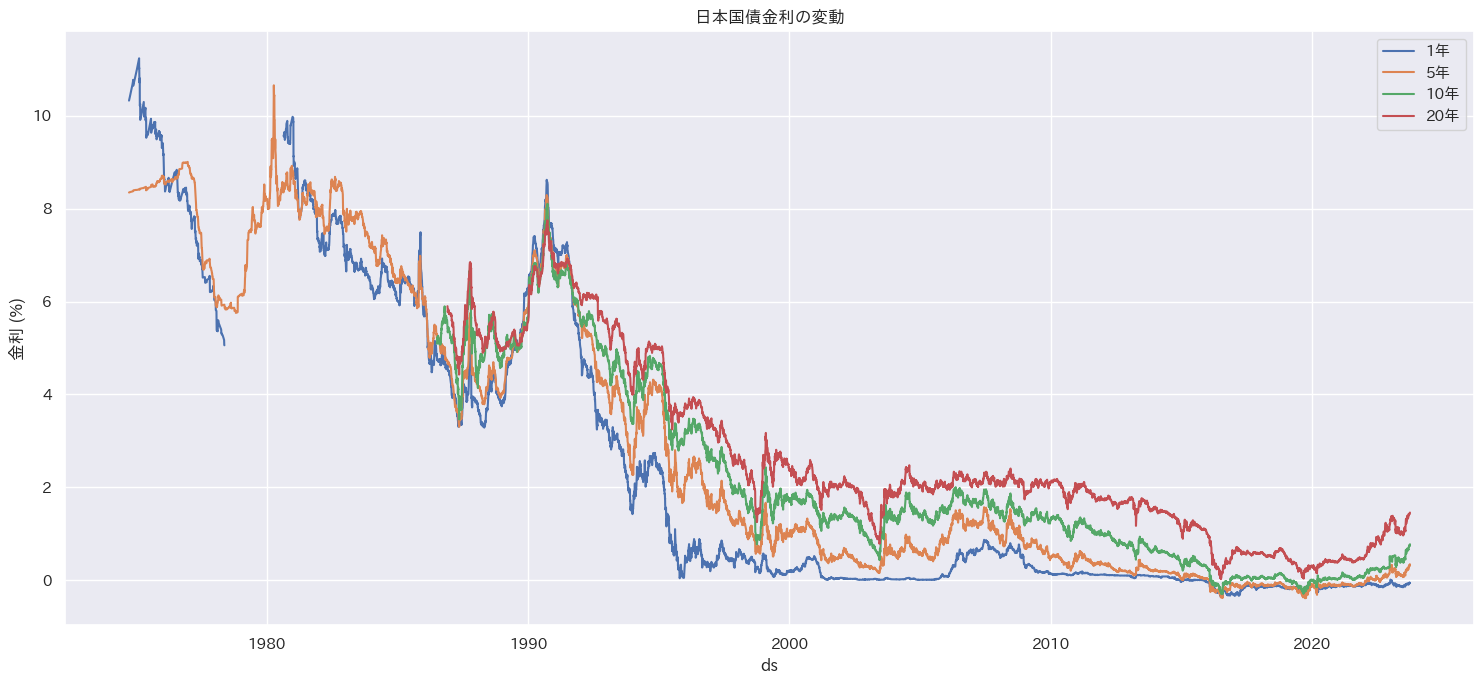

In [11]:
pyplot.figure(figsize=(15, 7))
for col in rate_cols:
    pyplot.plot(_df["ds"], _df[col], label=col)

pyplot.title("日本国債金利の変動")
pyplot.xlabel("ds")
pyplot.ylabel("金利 (%)")
pyplot.legend()
pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()


In [12]:
df = _df.copy()
df.index = pandas.to_datetime(df.ds)


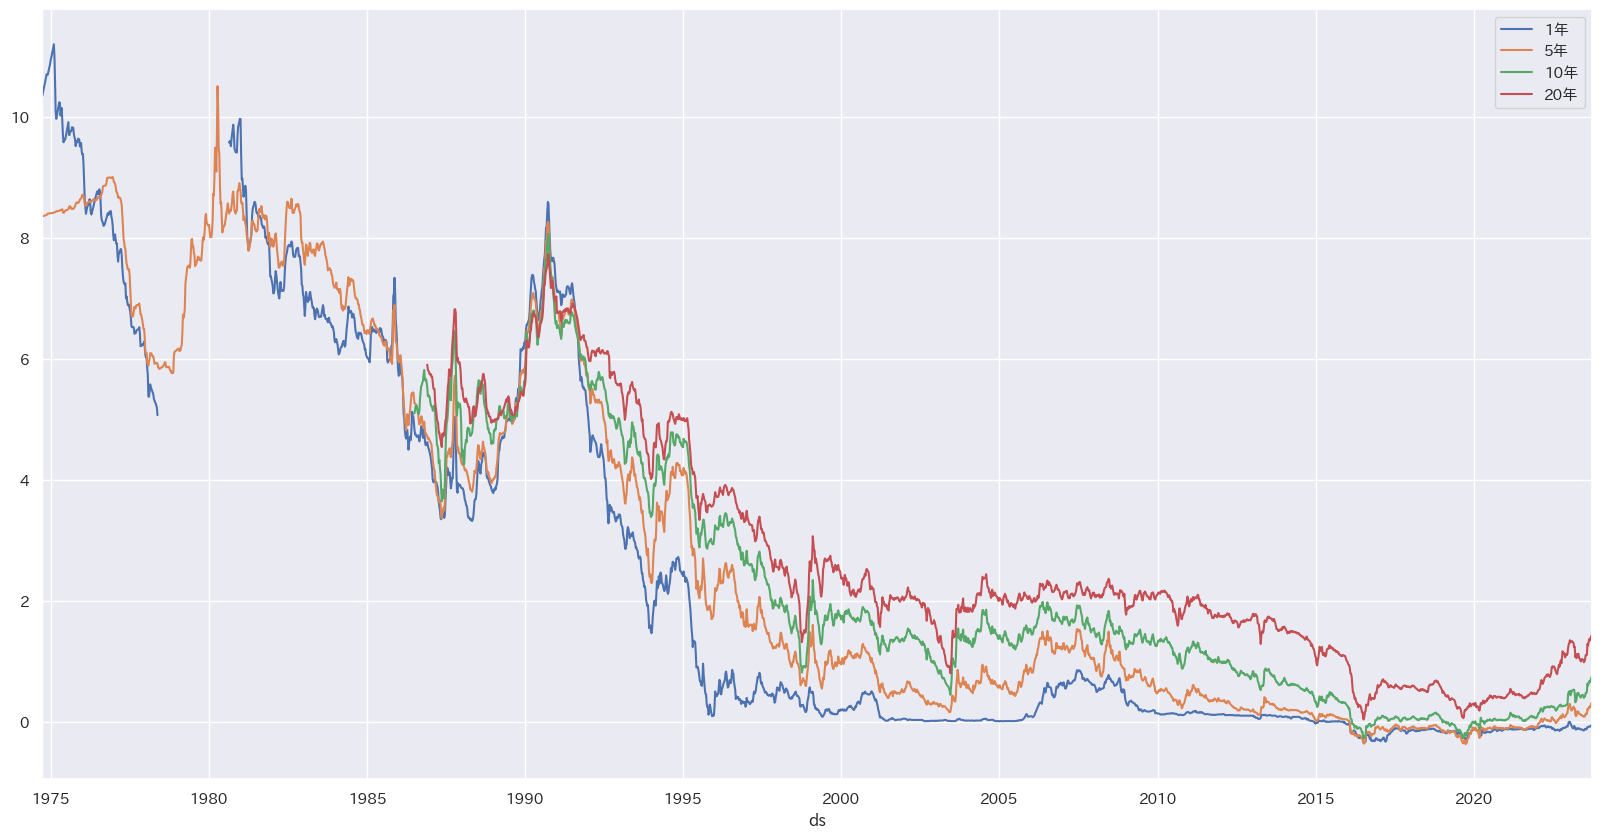

In [13]:
df_weekly = df[rate_cols].resample("W-MON").mean()
df_weekly.plot()
pyplot.show()


In [14]:
df_weekly.tail(3)

1年      5年      10年      20年
ds                                          
2023-09-18 -0.0635  0.2950  0.71525  1.41025
2023-09-25 -0.0578  0.3152  0.74160  1.42460
2023-10-02 -0.0615  0.3255  0.75950  1.43950

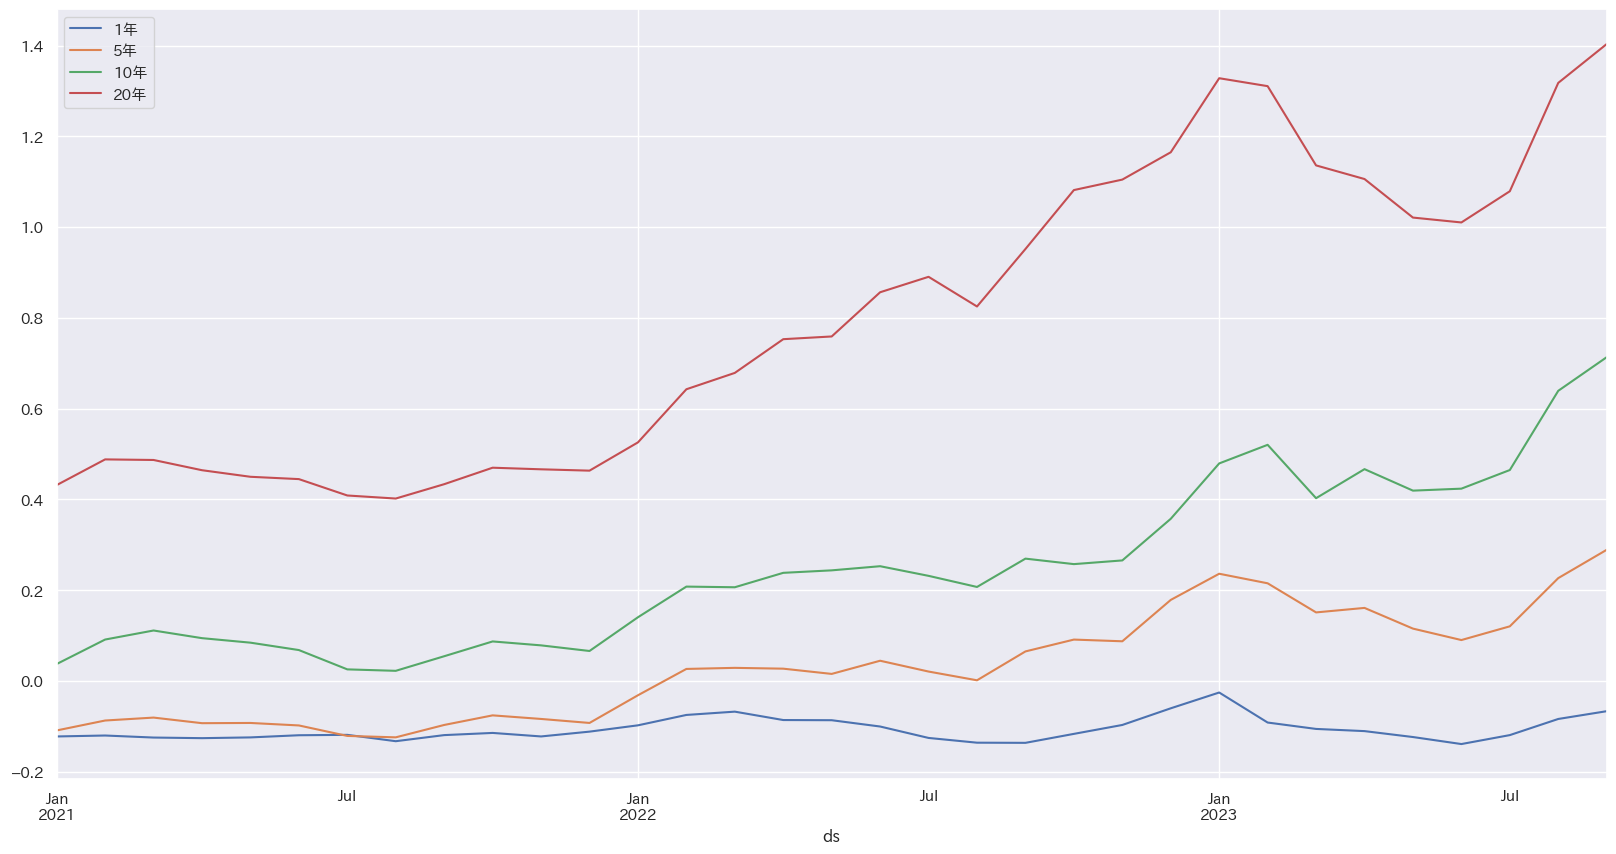

In [15]:
df_monthly = df[rate_cols].resample("MS").mean()
df_monthly["2021-01-01":].plot()
pyplot.show()

In [16]:
df_monthly = df[rate_cols].resample("MS").mean()
df_monthly.head(3)


1年        5年  10年  20年
ds                                       
1974-09-01  10.344833  8.348667  NaN  NaN
1974-10-01  10.480600  8.360240  NaN  NaN
1974-11-01  10.673522  8.379565  NaN  NaN

In [17]:
df_monthly.tail(3)

1年        5年       10年       20年
ds                                                
2023-07-01 -0.119650  0.120050  0.464500  1.078850
2023-08-01 -0.084091  0.226318  0.639091  1.317682
2023-09-01 -0.066950  0.288700  0.713150  1.403250

In [18]:
len(df_monthly)

589

In [19]:
import optuna

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics


In [20]:
from protuna import build_prophet_model, Evaluator, Limitter, BestEstimator, setup_df_index, setup_limit


# シミュレーション

In [21]:
g_rate_types = rate_cols

In [22]:
start_date = "2010-01-01"
period_type = "weekly"
# period_type = "monthly"

if period_type == "weekly":
    df0 = df_weekly[start_date:].reset_index()
    n_horizon = 7 * 4       # about 1 month / 4 weeks
    freq = "W-MON"
    freq_cv = "4W-MON"
    n_predicts = 4 * 3       # 3か月分
else:
    df0 = df_monthly[start_date:].reset_index()
    n_horizon = 365.25      # about 1 year
    freq = "MS"
    freq_cv = "3MS"
    n_predicts = 12 * 2      # 2年分



In [23]:
df0.head(3)

ds      1年        5年       10年     20年
0 2010-01-04  0.1340  0.480667  1.303333  2.1040
1 2010-01-11  0.1360  0.505000  1.342500  2.1345
2 2010-01-18  0.1332  0.520400  1.336400  2.1288

In [24]:
n_horizon

28

In [25]:
bests = {}

for rate_type in g_rate_types:
    # setup
    df = df0.rename({"年月": "ds", rate_type: "y"}, axis=1)[["ds", "y"]]
    lmt = Limitter(df)
    df = setup_limit(df, lmt)
    evl = Evaluator(df=df, n_horizon=n_horizon, freq=freq_cv, horizon_scaler=2)

    # optimize hyper params
    study: optuna.Study = optuna.create_study(direction="minimize")
    study.optimize(evl.objective_value, n_trials=100)

    # rerun cv
    model: Prophet = build_prophet_model(**study.best_params)
    model.fit(df)
    df_cv, df_pm = evl.run_cross_validation(model=model)

    # predict
    future = model.make_future_dataframe(periods=n_predicts, freq=freq)
    future = setup_limit(future, lmt)
    forecast = model.predict(future)

    # store estimator
    bst = BestEstimator(
        df=df,
        model=model,
        evaluator=evl,
        study=study,
        df_cv=df_cv,
        df_pm=df_pm,
        future=future,
        forecast=forecast,
    )
    bests[rate_type] = bst


[I 2023-10-24 02:40:57,593] A new study created in memory with name: no-name-1b0f52ec-7673-4f56-b89d-9acfa4d8df11
02:40:57 - cmdstanpy - INFO - Chain [1] start processing
02:40:57 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8545372720073869, 'n_changepoints': 12, 'changepoint_prior_scale': 2.310762437268955, 'seasonality_prior_scale': 7.9197627595122935, 'seasonality_mode': 'additive'}


02:40:57 - cmdstanpy - INFO - Chain [1] start processing
02:40:57 - cmdstanpy - INFO - Chain [1] start processing
02:40:58 - cmdstanpy - INFO - Chain [1] done processing
02:40:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:40:58,148] Trial 0 finished with value: 0.07751746770813742 and parameters: {'growth': 'linear', 'changepoint_range': 0.8545372720073869, 'n_changepoints': 12, 'changepoint_prior_scale': 2.310762437268955, 'seasonality_prior_scale': 7.9197627595122935, 'seasonality_mode': 'additive'}. Best is trial 0 with value: 0.07751746770813742.
02:40:58 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9937738577979228, 'n_changepoints': 11, 'changepoint_prior_scale': 2.38217916463629, 'seasonality_prior_scale': 0.8215740598813233, 'seasonality_mode': 'multiplicative'}


02:40:58 - cmdstanpy - INFO - Chain [1] done processing
02:40:58 - cmdstanpy - INFO - Chain [1] start processing
02:40:58 - cmdstanpy - INFO - Chain [1] start processing
02:40:59 - cmdstanpy - INFO - Chain [1] done processing
02:40:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:40:59,257] Trial 1 finished with value: 0.13850505991330644 and parameters: {'growth': 'linear', 'changepoint_range': 0.9937738577979228, 'n_changepoints': 11, 'changepoint_prior_scale': 2.38217916463629, 'seasonality_prior_scale': 0.8215740598813233, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 0.07751746770813742.
02:40:59 - cmdstanpy - INFO - Chain [1] start processing
02:40:59 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8053434431942856, 'n_changepoints': 7, 'changepoint_prior_scale': 2.0546748637562104, 'seasonality_prior_scale': 0.05271888257091283, 'seasonality_mode': 'multiplicative'}


02:40:59 - cmdstanpy - INFO - Chain [1] start processing
02:40:59 - cmdstanpy - INFO - Chain [1] start processing
02:40:59 - cmdstanpy - INFO - Chain [1] done processing
02:40:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:40:59,712] Trial 2 finished with value: 0.012114472048059667 and parameters: {'growth': 'linear', 'changepoint_range': 0.8053434431942856, 'n_changepoints': 7, 'changepoint_prior_scale': 2.0546748637562104, 'seasonality_prior_scale': 0.05271888257091283, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.012114472048059667.
02:40:59 - cmdstanpy - INFO - Chain [1] start processing
02:40:59 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.925551281494673, 'n_changepoints': 7, 'changepoint_prior_scale': 0.5248231455642911, 'seasonality_prior_scale': 3.4959531937576958, 'seasonality_mode': 'additive'}


02:40:59 - cmdstanpy - INFO - Chain [1] start processing
02:40:59 - cmdstanpy - INFO - Chain [1] start processing
02:40:59 - cmdstanpy - INFO - Chain [1] done processing
02:41:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:00,097] Trial 3 finished with value: 0.055815035644430425 and parameters: {'growth': 'linear', 'changepoint_range': 0.925551281494673, 'n_changepoints': 7, 'changepoint_prior_scale': 0.5248231455642911, 'seasonality_prior_scale': 3.4959531937576958, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:00 - cmdstanpy - INFO - Chain [1] start processing
02:41:00 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8422088122350511, 'n_changepoints': 1, 'changepoint_prior_scale': 3.9813788653724873, 'seasonality_prior_scale': 9.304228881275893, 'seasonality_mode': 'additive'}


02:41:00 - cmdstanpy - INFO - Chain [1] start processing
02:41:00 - cmdstanpy - INFO - Chain [1] start processing
02:41:00 - cmdstanpy - INFO - Chain [1] done processing
02:41:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:00,581] Trial 4 finished with value: 0.02294941884617566 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8422088122350511, 'n_changepoints': 1, 'changepoint_prior_scale': 3.9813788653724873, 'seasonality_prior_scale': 9.304228881275893, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:00 - cmdstanpy - INFO - Chain [1] start processing
02:41:00 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8964408270386475, 'n_changepoints': 6, 'changepoint_prior_scale': 0.9062435465076246, 'seasonality_prior_scale': 9.909056019785679, 'seasonality_mode': 'additive'}


02:41:00 - cmdstanpy - INFO - Chain [1] start processing
02:41:00 - cmdstanpy - INFO - Chain [1] start processing
02:41:00 - cmdstanpy - INFO - Chain [1] done processing
02:41:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:01,174] Trial 5 finished with value: 0.04328108974051963 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8964408270386475, 'n_changepoints': 6, 'changepoint_prior_scale': 0.9062435465076246, 'seasonality_prior_scale': 9.909056019785679, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:01 - cmdstanpy - INFO - Chain [1] start processing
02:41:01 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.973802203974662, 'n_changepoints': 5, 'changepoint_prior_scale': 0.4375567905748216, 'seasonality_prior_scale': 1.7914518390041494, 'seasonality_mode': 'additive'}


02:41:01 - cmdstanpy - INFO - Chain [1] start processing
02:41:01 - cmdstanpy - INFO - Chain [1] start processing
02:41:01 - cmdstanpy - INFO - Chain [1] done processing
02:41:01 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:01,703] Trial 6 finished with value: 0.024008981994628708 and parameters: {'growth': 'logistic', 'changepoint_range': 0.973802203974662, 'n_changepoints': 5, 'changepoint_prior_scale': 0.4375567905748216, 'seasonality_prior_scale': 1.7914518390041494, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:01 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9949729738928124, 'n_changepoints': 13, 'changepoint_prior_scale': 2.610451579990442, 'seasonality_prior_scale': 7.433583511398345, 'seasonality_mode': 'multiplicative'}


02:41:02 - cmdstanpy - INFO - Chain [1] done processing
02:41:02 - cmdstanpy - INFO - Chain [1] start processing
02:41:02 - cmdstanpy - INFO - Chain [1] start processing
02:41:02 - cmdstanpy - INFO - Chain [1] done processing
02:41:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:02,827] Trial 7 finished with value: 0.06700248080158992 and parameters: {'growth': 'linear', 'changepoint_range': 0.9949729738928124, 'n_changepoints': 13, 'changepoint_prior_scale': 2.610451579990442, 'seasonality_prior_scale': 7.433583511398345, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.012114472048059667.
02:41:02 - cmdstanpy - INFO - Chain [1] start processing
02:41:02 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8324028531926686, 'n_changepoints': 2, 'changepoint_prior_scale': 3.3751295427028714, 'seasonality_prior_scale': 6.418518211464496, 'seasonality_mode': 'additive'}


02:41:03 - cmdstanpy - INFO - Chain [1] start processing
02:41:03 - cmdstanpy - INFO - Chain [1] start processing
02:41:03 - cmdstanpy - INFO - Chain [1] done processing
02:41:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:03,121] Trial 8 finished with value: 0.10717354076822386 and parameters: {'growth': 'linear', 'changepoint_range': 0.8324028531926686, 'n_changepoints': 2, 'changepoint_prior_scale': 3.3751295427028714, 'seasonality_prior_scale': 6.418518211464496, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:03 - cmdstanpy - INFO - Chain [1] start processing
02:41:03 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.834996565036711, 'n_changepoints': 1, 'changepoint_prior_scale': 2.674839045177523, 'seasonality_prior_scale': 8.30488444294615, 'seasonality_mode': 'multiplicative'}


02:41:03 - cmdstanpy - INFO - Chain [1] start processing
02:41:03 - cmdstanpy - INFO - Chain [1] start processing
02:41:03 - cmdstanpy - INFO - Chain [1] done processing
02:41:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:03,591] Trial 9 finished with value: 0.10319683488578285 and parameters: {'growth': 'logistic', 'changepoint_range': 0.834996565036711, 'n_changepoints': 1, 'changepoint_prior_scale': 2.674839045177523, 'seasonality_prior_scale': 8.30488444294615, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.012114472048059667.
02:41:03 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8010735544960461, 'n_changepoints': 10, 'changepoint_prior_scale': 4.619402398467649, 'seasonality_prior_scale': 0.3250342603578724, 'seasonality_mode': 'multiplicative'}


02:41:04 - cmdstanpy - INFO - Chain [1] done processing
02:41:04 - cmdstanpy - INFO - Chain [1] start processing
02:41:04 - cmdstanpy - INFO - Chain [1] start processing
02:41:04 - cmdstanpy - INFO - Chain [1] done processing
02:41:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:04,585] Trial 10 finished with value: 0.05714813561606218 and parameters: {'growth': 'linear', 'changepoint_range': 0.8010735544960461, 'n_changepoints': 10, 'changepoint_prior_scale': 4.619402398467649, 'seasonality_prior_scale': 0.3250342603578724, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.012114472048059667.
02:41:04 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8020809084801653, 'n_changepoints': 4, 'changepoint_prior_scale': 4.164917035024824, 'seasonality_prior_scale': 4.6111249873320475, 'seasonality_mode': 'multiplicative'}


02:41:04 - cmdstanpy - INFO - Chain [1] done processing
02:41:04 - cmdstanpy - INFO - Chain [1] start processing
02:41:04 - cmdstanpy - INFO - Chain [1] start processing
02:41:05 - cmdstanpy - INFO - Chain [1] done processing
02:41:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:05,374] Trial 11 finished with value: 1.2351549442271974 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8020809084801653, 'n_changepoints': 4, 'changepoint_prior_scale': 4.164917035024824, 'seasonality_prior_scale': 4.6111249873320475, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.012114472048059667.
02:41:05 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8623353091232022, 'n_changepoints': 9, 'changepoint_prior_scale': 3.73836907014925, 'seasonality_prior_scale': 2.9540921315671076, 'seasonality_mode': 'additive'}


02:41:05 - cmdstanpy - INFO - Chain [1] done processing
02:41:05 - cmdstanpy - INFO - Chain [1] start processing
02:41:05 - cmdstanpy - INFO - Chain [1] start processing
02:41:05 - cmdstanpy - INFO - Chain [1] done processing
02:41:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:06,104] Trial 12 finished with value: 0.015189132058146402 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8623353091232022, 'n_changepoints': 9, 'changepoint_prior_scale': 3.73836907014925, 'seasonality_prior_scale': 2.9540921315671076, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:06 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8766206495421712, 'n_changepoints': 9, 'changepoint_prior_scale': 1.8375358346263357, 'seasonality_prior_scale': 2.334765337709636, 'seasonality_mode': 'multiplicative'}


02:41:06 - cmdstanpy - INFO - Chain [1] done processing
02:41:06 - cmdstanpy - INFO - Chain [1] start processing
02:41:06 - cmdstanpy - INFO - Chain [1] start processing
02:41:06 - cmdstanpy - INFO - Chain [1] done processing
02:41:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:06,876] Trial 13 finished with value: 1.3586605950151847 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8766206495421712, 'n_changepoints': 9, 'changepoint_prior_scale': 1.8375358346263357, 'seasonality_prior_scale': 2.334765337709636, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.012114472048059667.
02:41:06 - cmdstanpy - INFO - Chain [1] start processing
02:41:07 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8715781462093561, 'n_changepoints': 8, 'changepoint_prior_scale': 3.384467662626703, 'seasonality_prior_scale': 0.26295751811834567, 'seasonality_mode': 'additive'}


02:41:07 - cmdstanpy - INFO - Chain [1] start processing
02:41:07 - cmdstanpy - INFO - Chain [1] start processing
02:41:07 - cmdstanpy - INFO - Chain [1] done processing
02:41:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:07,327] Trial 14 finished with value: 0.054563283987497546 and parameters: {'growth': 'linear', 'changepoint_range': 0.8715781462093561, 'n_changepoints': 8, 'changepoint_prior_scale': 3.384467662626703, 'seasonality_prior_scale': 0.26295751811834567, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:07 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8202475316497174, 'n_changepoints': 14, 'changepoint_prior_scale': 1.6509632413250812, 'seasonality_prior_scale': 2.9156055497565156, 'seasonality_mode': 'multiplicative'}


02:41:07 - cmdstanpy - INFO - Chain [1] done processing
02:41:07 - cmdstanpy - INFO - Chain [1] start processing
02:41:07 - cmdstanpy - INFO - Chain [1] start processing
02:41:08 - cmdstanpy - INFO - Chain [1] done processing
02:41:08 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:08,554] Trial 15 finished with value: 0.9847882419366155 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8202475316497174, 'n_changepoints': 14, 'changepoint_prior_scale': 1.6509632413250812, 'seasonality_prior_scale': 2.9156055497565156, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.012114472048059667.
02:41:08 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.861589739825146, 'n_changepoints': 8, 'changepoint_prior_scale': 4.828539533671281, 'seasonality_prior_scale': 1.5176146030169888, 'seasonality_mode': 'multiplicative'}


02:41:08 - cmdstanpy - INFO - Chain [1] done processing
02:41:08 - cmdstanpy - INFO - Chain [1] start processing
02:41:08 - cmdstanpy - INFO - Chain [1] start processing
02:41:09 - cmdstanpy - INFO - Chain [1] done processing
02:41:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:09,261] Trial 16 finished with value: 0.06276220660688649 and parameters: {'growth': 'linear', 'changepoint_range': 0.861589739825146, 'n_changepoints': 8, 'changepoint_prior_scale': 4.828539533671281, 'seasonality_prior_scale': 1.5176146030169888, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.012114472048059667.
02:41:09 - cmdstanpy - INFO - Chain [1] start processing
02:41:09 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8182916920294621, 'n_changepoints': 4, 'changepoint_prior_scale': 3.2451783090265462, 'seasonality_prior_scale': 4.092069682608922, 'seasonality_mode': 'additive'}


02:41:09 - cmdstanpy - INFO - Chain [1] start processing
02:41:09 - cmdstanpy - INFO - Chain [1] start processing
02:41:09 - cmdstanpy - INFO - Chain [1] done processing
02:41:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:09,845] Trial 17 finished with value: 0.03823495459530461 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8182916920294621, 'n_changepoints': 4, 'changepoint_prior_scale': 3.2451783090265462, 'seasonality_prior_scale': 4.092069682608922, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:09 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8474503091965807, 'n_changepoints': 10, 'changepoint_prior_scale': 1.4698335633598385, 'seasonality_prior_scale': 2.9548801042605035, 'seasonality_mode': 'multiplicative'}


02:41:10 - cmdstanpy - INFO - Chain [1] done processing
02:41:10 - cmdstanpy - INFO - Chain [1] start processing
02:41:10 - cmdstanpy - INFO - Chain [1] start processing
02:41:10 - cmdstanpy - INFO - Chain [1] done processing
02:41:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:10,337] Trial 18 finished with value: 0.09373817328891869 and parameters: {'growth': 'linear', 'changepoint_range': 0.8474503091965807, 'n_changepoints': 10, 'changepoint_prior_scale': 1.4698335633598385, 'seasonality_prior_scale': 2.9548801042605035, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.012114472048059667.
02:41:10 - cmdstanpy - INFO - Chain [1] start processing
02:41:10 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8788198971328385, 'n_changepoints': 6, 'changepoint_prior_scale': 1.0836184136909197, 'seasonality_prior_scale': 5.528332521370061, 'seasonality_mode': 'additive'}


02:41:10 - cmdstanpy - INFO - Chain [1] start processing
02:41:10 - cmdstanpy - INFO - Chain [1] start processing
02:41:10 - cmdstanpy - INFO - Chain [1] done processing
02:41:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:10,979] Trial 19 finished with value: 0.055820836019227625 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8788198971328385, 'n_changepoints': 6, 'changepoint_prior_scale': 1.0836184136909197, 'seasonality_prior_scale': 5.528332521370061, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:11 - cmdstanpy - INFO - Chain [1] start processing
02:41:11 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9143541572348347, 'n_changepoints': 9, 'changepoint_prior_scale': 1.9646579800439294, 'seasonality_prior_scale': 1.594513622447859, 'seasonality_mode': 'additive'}


02:41:11 - cmdstanpy - INFO - Chain [1] start processing
02:41:11 - cmdstanpy - INFO - Chain [1] start processing
02:41:11 - cmdstanpy - INFO - Chain [1] done processing
02:41:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:11,420] Trial 20 finished with value: 0.04326340778165735 and parameters: {'growth': 'linear', 'changepoint_range': 0.9143541572348347, 'n_changepoints': 9, 'changepoint_prior_scale': 1.9646579800439294, 'seasonality_prior_scale': 1.594513622447859, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:11 - cmdstanpy - INFO - Chain [1] start processing
02:41:11 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8470064153158778, 'n_changepoints': 3, 'changepoint_prior_scale': 4.023506099370469, 'seasonality_prior_scale': 5.4359170633955625, 'seasonality_mode': 'additive'}


02:41:11 - cmdstanpy - INFO - Chain [1] start processing
02:41:11 - cmdstanpy - INFO - Chain [1] start processing
02:41:11 - cmdstanpy - INFO - Chain [1] done processing
02:41:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:11,998] Trial 21 finished with value: 0.015606793486781552 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8470064153158778, 'n_changepoints': 3, 'changepoint_prior_scale': 4.023506099370469, 'seasonality_prior_scale': 5.4359170633955625, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:12 - cmdstanpy - INFO - Chain [1] start processing
02:41:12 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8220858071182976, 'n_changepoints': 3, 'changepoint_prior_scale': 4.0131325542483065, 'seasonality_prior_scale': 5.480872598691938, 'seasonality_mode': 'additive'}


02:41:12 - cmdstanpy - INFO - Chain [1] start processing
02:41:12 - cmdstanpy - INFO - Chain [1] start processing
02:41:12 - cmdstanpy - INFO - Chain [1] done processing
02:41:12 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:12,521] Trial 22 finished with value: 0.015996139773557225 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8220858071182976, 'n_changepoints': 3, 'changepoint_prior_scale': 4.0131325542483065, 'seasonality_prior_scale': 5.480872598691938, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:12 - cmdstanpy - INFO - Chain [1] start processing
02:41:12 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8432505036784913, 'n_changepoints': 6, 'changepoint_prior_scale': 3.1607240547265096, 'seasonality_prior_scale': 4.345161452673198, 'seasonality_mode': 'additive'}


02:41:12 - cmdstanpy - INFO - Chain [1] start processing
02:41:12 - cmdstanpy - INFO - Chain [1] start processing
02:41:12 - cmdstanpy - INFO - Chain [1] done processing
02:41:12 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:13,216] Trial 23 finished with value: 0.03606578773388425 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8432505036784913, 'n_changepoints': 6, 'changepoint_prior_scale': 3.1607240547265096, 'seasonality_prior_scale': 4.345161452673198, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:13 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8566632198983473, 'n_changepoints': 7, 'changepoint_prior_scale': 4.443900382100975, 'seasonality_prior_scale': 3.5360572668845505, 'seasonality_mode': 'additive'}


02:41:13 - cmdstanpy - INFO - Chain [1] done processing
02:41:13 - cmdstanpy - INFO - Chain [1] start processing
02:41:13 - cmdstanpy - INFO - Chain [1] start processing
02:41:13 - cmdstanpy - INFO - Chain [1] done processing
02:41:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:14,215] Trial 24 finished with value: 0.02023317404263523 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8566632198983473, 'n_changepoints': 7, 'changepoint_prior_scale': 4.443900382100975, 'seasonality_prior_scale': 3.5360572668845505, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:14 - cmdstanpy - INFO - Chain [1] start processing
02:41:14 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.816719239845755, 'n_changepoints': 3, 'changepoint_prior_scale': 3.726426710213052, 'seasonality_prior_scale': 0.05681074531992314, 'seasonality_mode': 'additive'}


02:41:14 - cmdstanpy - INFO - Chain [1] start processing
02:41:14 - cmdstanpy - INFO - Chain [1] start processing
02:41:14 - cmdstanpy - INFO - Chain [1] done processing
02:41:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:14,736] Trial 25 finished with value: 0.020261710367822247 and parameters: {'growth': 'logistic', 'changepoint_range': 0.816719239845755, 'n_changepoints': 3, 'changepoint_prior_scale': 3.726426710213052, 'seasonality_prior_scale': 0.05681074531992314, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:14 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8329044155514105, 'n_changepoints': 11, 'changepoint_prior_scale': 2.9733304604089796, 'seasonality_prior_scale': 1.0915238855453973, 'seasonality_mode': 'multiplicative'}


02:41:15 - cmdstanpy - INFO - Chain [1] done processing
02:41:15 - cmdstanpy - INFO - Chain [1] start processing
02:41:15 - cmdstanpy - INFO - Chain [1] start processing
02:41:15 - cmdstanpy - INFO - Chain [1] done processing
02:41:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:15,658] Trial 26 finished with value: 0.9655068548343774 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8329044155514105, 'n_changepoints': 11, 'changepoint_prior_scale': 2.9733304604089796, 'seasonality_prior_scale': 1.0915238855453973, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.012114472048059667.
02:41:15 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8004946199891825, 'n_changepoints': 5, 'changepoint_prior_scale': 4.988036538243115, 'seasonality_prior_scale': 2.331350020747112, 'seasonality_mode': 'additive'}


02:41:15 - cmdstanpy - INFO - Chain [1] done processing
02:41:16 - cmdstanpy - INFO - Chain [1] start processing
02:41:16 - cmdstanpy - INFO - Chain [1] start processing
02:41:16 - cmdstanpy - INFO - Chain [1] done processing
02:41:16 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:16,658] Trial 27 finished with value: 0.04869088841289067 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8004946199891825, 'n_changepoints': 5, 'changepoint_prior_scale': 4.988036538243115, 'seasonality_prior_scale': 2.331350020747112, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:16 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8531905087187492, 'n_changepoints': 9, 'changepoint_prior_scale': 3.7695548629576323, 'seasonality_prior_scale': 5.1052116592059935, 'seasonality_mode': 'multiplicative'}


02:41:17 - cmdstanpy - INFO - Chain [1] done processing
02:41:17 - cmdstanpy - INFO - Chain [1] start processing
02:41:17 - cmdstanpy - INFO - Chain [1] start processing
02:41:17 - cmdstanpy - INFO - Chain [1] done processing
02:41:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:17,470] Trial 28 finished with value: 0.06094193346298822 and parameters: {'growth': 'linear', 'changepoint_range': 0.8531905087187492, 'n_changepoints': 9, 'changepoint_prior_scale': 3.7695548629576323, 'seasonality_prior_scale': 5.1052116592059935, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.012114472048059667.
02:41:17 - cmdstanpy - INFO - Chain [1] start processing
02:41:17 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8662460416777324, 'n_changepoints': 12, 'changepoint_prior_scale': 2.287304210645062, 'seasonality_prior_scale': 6.022571771978463, 'seasonality_mode': 'additive'}


02:41:17 - cmdstanpy - INFO - Chain [1] start processing
02:41:17 - cmdstanpy - INFO - Chain [1] start processing
02:41:17 - cmdstanpy - INFO - Chain [1] done processing
02:41:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:17,964] Trial 29 finished with value: 0.09808028520478815 and parameters: {'growth': 'linear', 'changepoint_range': 0.8662460416777324, 'n_changepoints': 12, 'changepoint_prior_scale': 2.287304210645062, 'seasonality_prior_scale': 6.022571771978463, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:18 - cmdstanpy - INFO - Chain [1] start processing
02:41:18 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8558418595436931, 'n_changepoints': 3, 'changepoint_prior_scale': 4.281404415461289, 'seasonality_prior_scale': 0.9589434226408378, 'seasonality_mode': 'additive'}


02:41:18 - cmdstanpy - INFO - Chain [1] start processing
02:41:18 - cmdstanpy - INFO - Chain [1] start processing
02:41:18 - cmdstanpy - INFO - Chain [1] done processing
02:41:18 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:18,526] Trial 30 finished with value: 0.021660217774748636 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8558418595436931, 'n_changepoints': 3, 'changepoint_prior_scale': 4.281404415461289, 'seasonality_prior_scale': 0.9589434226408378, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:18 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8234696180255303, 'n_changepoints': 2, 'changepoint_prior_scale': 3.795093457869259, 'seasonality_prior_scale': 5.036387050514837, 'seasonality_mode': 'additive'}


02:41:18 - cmdstanpy - INFO - Chain [1] done processing
02:41:18 - cmdstanpy - INFO - Chain [1] start processing
02:41:18 - cmdstanpy - INFO - Chain [1] start processing
02:41:19 - cmdstanpy - INFO - Chain [1] done processing
02:41:19 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:19,326] Trial 31 finished with value: 0.03898850952113951 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8234696180255303, 'n_changepoints': 2, 'changepoint_prior_scale': 3.795093457869259, 'seasonality_prior_scale': 5.036387050514837, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:19 - cmdstanpy - INFO - Chain [1] start processing
02:41:19 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8117760652885397, 'n_changepoints': 4, 'changepoint_prior_scale': 4.483966971971359, 'seasonality_prior_scale': 5.935836540891502, 'seasonality_mode': 'additive'}


02:41:19 - cmdstanpy - INFO - Chain [1] start processing
02:41:19 - cmdstanpy - INFO - Chain [1] start processing
02:41:19 - cmdstanpy - INFO - Chain [1] done processing
02:41:19 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:19,866] Trial 32 finished with value: 0.044335564414005754 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8117760652885397, 'n_changepoints': 4, 'changepoint_prior_scale': 4.483966971971359, 'seasonality_prior_scale': 5.935836540891502, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 0.012114472048059667.
02:41:19 - cmdstanpy - INFO - Chain [1] start processing
02:41:20 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8311251730448559, 'n_changepoints': 3, 'changepoint_prior_scale': 4.116124893373768, 'seasonality_prior_scale': 3.804293260632111, 'seasonality_mode': 'additive'}


02:41:20 - cmdstanpy - INFO - Chain [1] start processing
02:41:20 - cmdstanpy - INFO - Chain [1] start processing
02:41:20 - cmdstanpy - INFO - Chain [1] done processing
02:41:20 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:20,450] Trial 33 finished with value: 0.011723258481819137 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8311251730448559, 'n_changepoints': 3, 'changepoint_prior_scale': 4.116124893373768, 'seasonality_prior_scale': 3.804293260632111, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:20 - cmdstanpy - INFO - Chain [1] start processing
02:41:20 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8370854845521517, 'n_changepoints': 2, 'changepoint_prior_scale': 4.228772101053254, 'seasonality_prior_scale': 3.6782466435139964, 'seasonality_mode': 'additive'}


02:41:20 - cmdstanpy - INFO - Chain [1] start processing
02:41:20 - cmdstanpy - INFO - Chain [1] start processing
02:41:20 - cmdstanpy - INFO - Chain [1] done processing
02:41:20 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:20,992] Trial 34 finished with value: 0.014557463417075549 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8370854845521517, 'n_changepoints': 2, 'changepoint_prior_scale': 4.228772101053254, 'seasonality_prior_scale': 3.6782466435139964, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:21 - cmdstanpy - INFO - Chain [1] start processing
02:41:21 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8325585211555921, 'n_changepoints': 2, 'changepoint_prior_scale': 3.5818228262841973, 'seasonality_prior_scale': 3.834317261852405, 'seasonality_mode': 'additive'}


02:41:21 - cmdstanpy - INFO - Chain [1] start processing
02:41:21 - cmdstanpy - INFO - Chain [1] start processing
02:41:21 - cmdstanpy - INFO - Chain [1] done processing
02:41:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:21,609] Trial 35 finished with value: 0.016716290358716218 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8325585211555921, 'n_changepoints': 2, 'changepoint_prior_scale': 3.5818228262841973, 'seasonality_prior_scale': 3.834317261852405, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:21 - cmdstanpy - INFO - Chain [1] start processing
02:41:21 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.837695508375895, 'n_changepoints': 1, 'changepoint_prior_scale': 4.3029597361656675, 'seasonality_prior_scale': 3.219811100642182, 'seasonality_mode': 'additive'}


02:41:21 - cmdstanpy - INFO - Chain [1] start processing
02:41:21 - cmdstanpy - INFO - Chain [1] start processing
02:41:21 - cmdstanpy - INFO - Chain [1] done processing
02:41:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:21,881] Trial 36 finished with value: 0.0224729551299344 and parameters: {'growth': 'linear', 'changepoint_range': 0.837695508375895, 'n_changepoints': 1, 'changepoint_prior_scale': 4.3029597361656675, 'seasonality_prior_scale': 3.219811100642182, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:21 - cmdstanpy - INFO - Chain [1] start processing
02:41:22 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8893716087870607, 'n_changepoints': 7, 'changepoint_prior_scale': 4.691933090951528, 'seasonality_prior_scale': 2.6014708740075134, 'seasonality_mode': 'additive'}


02:41:22 - cmdstanpy - INFO - Chain [1] start processing
02:41:22 - cmdstanpy - INFO - Chain [1] start processing
02:41:22 - cmdstanpy - INFO - Chain [1] done processing
02:41:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:22,432] Trial 37 finished with value: 0.030944566371919446 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8893716087870607, 'n_changepoints': 7, 'changepoint_prior_scale': 4.691933090951528, 'seasonality_prior_scale': 2.6014708740075134, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:22 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8106131326745292, 'n_changepoints': 5, 'changepoint_prior_scale': 2.9042799448818197, 'seasonality_prior_scale': 3.5259068698703238, 'seasonality_mode': 'multiplicative'}


02:41:22 - cmdstanpy - INFO - Chain [1] done processing
02:41:22 - cmdstanpy - INFO - Chain [1] start processing
02:41:22 - cmdstanpy - INFO - Chain [1] start processing
02:41:22 - cmdstanpy - INFO - Chain [1] done processing
02:41:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:22,979] Trial 38 finished with value: 0.06587827418983788 and parameters: {'growth': 'linear', 'changepoint_range': 0.8106131326745292, 'n_changepoints': 5, 'changepoint_prior_scale': 2.9042799448818197, 'seasonality_prior_scale': 3.5259068698703238, 'seasonality_mode': 'multiplicative'}. Best is trial 33 with value: 0.011723258481819137.
02:41:23 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8281841198866328, 'n_changepoints': 10, 'changepoint_prior_scale': 3.504378916411535, 'seasonality_prior_scale': 2.0801095873026547, 'seasonality_mode': 'additive'}


02:41:23 - cmdstanpy - INFO - Chain [1] done processing
02:41:23 - cmdstanpy - INFO - Chain [1] start processing
02:41:23 - cmdstanpy - INFO - Chain [1] start processing
02:41:23 - cmdstanpy - INFO - Chain [1] done processing
02:41:23 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:23,731] Trial 39 finished with value: 0.05743640664530367 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8281841198866328, 'n_changepoints': 10, 'changepoint_prior_scale': 3.504378916411535, 'seasonality_prior_scale': 2.0801095873026547, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:23 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.846757060153035, 'n_changepoints': 11, 'changepoint_prior_scale': 3.9277029651623896, 'seasonality_prior_scale': 3.888282743320988, 'seasonality_mode': 'multiplicative'}


02:41:24 - cmdstanpy - INFO - Chain [1] done processing
02:41:24 - cmdstanpy - INFO - Chain [1] start processing
02:41:24 - cmdstanpy - INFO - Chain [1] start processing
02:41:24 - cmdstanpy - INFO - Chain [1] done processing
02:41:24 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:24,825] Trial 40 finished with value: 1.017067462662125 and parameters: {'growth': 'logistic', 'changepoint_range': 0.846757060153035, 'n_changepoints': 11, 'changepoint_prior_scale': 3.9277029651623896, 'seasonality_prior_scale': 3.888282743320988, 'seasonality_mode': 'multiplicative'}. Best is trial 33 with value: 0.011723258481819137.
02:41:24 - cmdstanpy - INFO - Chain [1] start processing
02:41:24 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8486958135041305, 'n_changepoints': 2, 'changepoint_prior_scale': 4.08532574529591, 'seasonality_prior_scale': 4.496499305541214, 'seasonality_mode': 'additive'}


02:41:25 - cmdstanpy - INFO - Chain [1] start processing
02:41:25 - cmdstanpy - INFO - Chain [1] start processing
02:41:25 - cmdstanpy - INFO - Chain [1] done processing
02:41:25 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:25,371] Trial 41 finished with value: 0.01829440953560689 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8486958135041305, 'n_changepoints': 2, 'changepoint_prior_scale': 4.08532574529591, 'seasonality_prior_scale': 4.496499305541214, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:25 - cmdstanpy - INFO - Chain [1] start processing
02:41:25 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8370759125725487, 'n_changepoints': 1, 'changepoint_prior_scale': 4.222733282886404, 'seasonality_prior_scale': 3.0922237503541976, 'seasonality_mode': 'additive'}


02:41:25 - cmdstanpy - INFO - Chain [1] start processing
02:41:25 - cmdstanpy - INFO - Chain [1] start processing
02:41:25 - cmdstanpy - INFO - Chain [1] done processing
02:41:25 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:25,842] Trial 42 finished with value: 0.024121735844735565 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8370759125725487, 'n_changepoints': 1, 'changepoint_prior_scale': 4.222733282886404, 'seasonality_prior_scale': 3.0922237503541976, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:25 - cmdstanpy - INFO - Chain [1] start processing
02:41:25 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8608357611716868, 'n_changepoints': 3, 'changepoint_prior_scale': 4.489304544687697, 'seasonality_prior_scale': 4.749593186787955, 'seasonality_mode': 'additive'}


02:41:26 - cmdstanpy - INFO - Chain [1] start processing
02:41:26 - cmdstanpy - INFO - Chain [1] start processing
02:41:26 - cmdstanpy - INFO - Chain [1] done processing
02:41:26 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:26,452] Trial 43 finished with value: 0.02707137560394784 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8608357611716868, 'n_changepoints': 3, 'changepoint_prior_scale': 4.489304544687697, 'seasonality_prior_scale': 4.749593186787955, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:26 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8411696947236066, 'n_changepoints': 5, 'changepoint_prior_scale': 3.9034308987565294, 'seasonality_prior_scale': 1.993479589653293, 'seasonality_mode': 'additive'}


02:41:26 - cmdstanpy - INFO - Chain [1] done processing
02:41:26 - cmdstanpy - INFO - Chain [1] start processing
02:41:26 - cmdstanpy - INFO - Chain [1] start processing
02:41:26 - cmdstanpy - INFO - Chain [1] done processing
02:41:26 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:27,192] Trial 44 finished with value: 0.012222169841941178 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8411696947236066, 'n_changepoints': 5, 'changepoint_prior_scale': 3.9034308987565294, 'seasonality_prior_scale': 1.993479589653293, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:27 - cmdstanpy - INFO - Chain [1] start processing
02:41:27 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8084530973930728, 'n_changepoints': 6, 'changepoint_prior_scale': 3.814849643890915, 'seasonality_prior_scale': 0.559480646878038, 'seasonality_mode': 'additive'}


02:41:27 - cmdstanpy - INFO - Chain [1] start processing
02:41:27 - cmdstanpy - INFO - Chain [1] start processing
02:41:27 - cmdstanpy - INFO - Chain [1] done processing
02:41:27 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:27,876] Trial 45 finished with value: 0.06361029503249979 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8084530973930728, 'n_changepoints': 6, 'changepoint_prior_scale': 3.814849643890915, 'seasonality_prior_scale': 0.559480646878038, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:27 - cmdstanpy - INFO - Chain [1] start processing
02:41:28 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8300846826303767, 'n_changepoints': 5, 'changepoint_prior_scale': 3.5617454796352086, 'seasonality_prior_scale': 1.7918483568639536, 'seasonality_mode': 'multiplicative'}


02:41:28 - cmdstanpy - INFO - Chain [1] start processing
02:41:28 - cmdstanpy - INFO - Chain [1] start processing
02:41:28 - cmdstanpy - INFO - Chain [1] done processing
02:41:28 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:28,297] Trial 46 finished with value: 0.06083654288118605 and parameters: {'growth': 'linear', 'changepoint_range': 0.8300846826303767, 'n_changepoints': 5, 'changepoint_prior_scale': 3.5617454796352086, 'seasonality_prior_scale': 1.7918483568639536, 'seasonality_mode': 'multiplicative'}. Best is trial 33 with value: 0.011723258481819137.
02:41:28 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8227183174818725, 'n_changepoints': 8, 'changepoint_prior_scale': 4.699440192902047, 'seasonality_prior_scale': 2.6560913181406387, 'seasonality_mode': 'additive'}


02:41:28 - cmdstanpy - INFO - Chain [1] done processing
02:41:28 - cmdstanpy - INFO - Chain [1] start processing
02:41:28 - cmdstanpy - INFO - Chain [1] start processing
02:41:28 - cmdstanpy - INFO - Chain [1] done processing
02:41:28 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:29,068] Trial 47 finished with value: 0.06787525041158382 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8227183174818725, 'n_changepoints': 8, 'changepoint_prior_scale': 4.699440192902047, 'seasonality_prior_scale': 2.6560913181406387, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:29 - cmdstanpy - INFO - Chain [1] start processing
02:41:29 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8402760841744394, 'n_changepoints': 4, 'changepoint_prior_scale': 2.406869353580143, 'seasonality_prior_scale': 1.3433823394760136, 'seasonality_mode': 'additive'}


02:41:29 - cmdstanpy - INFO - Chain [1] start processing
02:41:29 - cmdstanpy - INFO - Chain [1] start processing
02:41:29 - cmdstanpy - INFO - Chain [1] done processing
02:41:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:29,413] Trial 48 finished with value: 0.08713020561716223 and parameters: {'growth': 'linear', 'changepoint_range': 0.8402760841744394, 'n_changepoints': 4, 'changepoint_prior_scale': 2.406869353580143, 'seasonality_prior_scale': 1.3433823394760136, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:29 - cmdstanpy - INFO - Chain [1] start processing
02:41:29 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8095078872221492, 'n_changepoints': 5, 'changepoint_prior_scale': 4.219935292257493, 'seasonality_prior_scale': 2.0754452579160128, 'seasonality_mode': 'multiplicative'}


02:41:29 - cmdstanpy - INFO - Chain [1] start processing
02:41:29 - cmdstanpy - INFO - Chain [1] start processing
02:41:29 - cmdstanpy - INFO - Chain [1] done processing
02:41:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:30,093] Trial 49 finished with value: 1.1231851465321607 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8095078872221492, 'n_changepoints': 5, 'changepoint_prior_scale': 4.219935292257493, 'seasonality_prior_scale': 2.0754452579160128, 'seasonality_mode': 'multiplicative'}. Best is trial 33 with value: 0.011723258481819137.
02:41:30 - cmdstanpy - INFO - Chain [1] start processing
02:41:30 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8718107289081203, 'n_changepoints': 7, 'changepoint_prior_scale': 3.3688231910335777, 'seasonality_prior_scale': 0.8383007504366035, 'seasonality_mode': 'additive'}


02:41:30 - cmdstanpy - INFO - Chain [1] start processing
02:41:30 - cmdstanpy - INFO - Chain [1] start processing
02:41:30 - cmdstanpy - INFO - Chain [1] done processing
02:41:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:30,816] Trial 50 finished with value: 0.016491896587498073 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8718107289081203, 'n_changepoints': 7, 'changepoint_prior_scale': 3.3688231910335777, 'seasonality_prior_scale': 0.8383007504366035, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:30 - cmdstanpy - INFO - Chain [1] start processing
02:41:30 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8480135358417256, 'n_changepoints': 2, 'changepoint_prior_scale': 3.8631496735110966, 'seasonality_prior_scale': 4.102392183907968, 'seasonality_mode': 'additive'}


02:41:31 - cmdstanpy - INFO - Chain [1] start processing
02:41:31 - cmdstanpy - INFO - Chain [1] start processing
02:41:31 - cmdstanpy - INFO - Chain [1] done processing
02:41:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:31,431] Trial 51 finished with value: 0.01594923857808622 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8480135358417256, 'n_changepoints': 2, 'changepoint_prior_scale': 3.8631496735110966, 'seasonality_prior_scale': 4.102392183907968, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:31 - cmdstanpy - INFO - Chain [1] start processing
02:41:31 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.840896655518395, 'n_changepoints': 4, 'changepoint_prior_scale': 4.025706372454073, 'seasonality_prior_scale': 3.4353796079126635, 'seasonality_mode': 'additive'}


02:41:31 - cmdstanpy - INFO - Chain [1] start processing
02:41:31 - cmdstanpy - INFO - Chain [1] start processing
02:41:31 - cmdstanpy - INFO - Chain [1] done processing
02:41:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:31,985] Trial 52 finished with value: 0.036730164352555855 and parameters: {'growth': 'logistic', 'changepoint_range': 0.840896655518395, 'n_changepoints': 4, 'changepoint_prior_scale': 4.025706372454073, 'seasonality_prior_scale': 3.4353796079126635, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:32 - cmdstanpy - INFO - Chain [1] start processing
02:41:32 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.851105512146093, 'n_changepoints': 6, 'changepoint_prior_scale': 4.1183615279670285, 'seasonality_prior_scale': 0.4772885639389919, 'seasonality_mode': 'additive'}


02:41:32 - cmdstanpy - INFO - Chain [1] start processing
02:41:32 - cmdstanpy - INFO - Chain [1] start processing
02:41:32 - cmdstanpy - INFO - Chain [1] done processing
02:41:32 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:32,653] Trial 53 finished with value: 0.03054294692059328 and parameters: {'growth': 'logistic', 'changepoint_range': 0.851105512146093, 'n_changepoints': 6, 'changepoint_prior_scale': 4.1183615279670285, 'seasonality_prior_scale': 0.4772885639389919, 'seasonality_mode': 'additive'}. Best is trial 33 with value: 0.011723258481819137.
02:41:32 - cmdstanpy - INFO - Chain [1] start processing
02:41:32 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8282368280391401, 'n_changepoints': 3, 'changepoint_prior_scale': 4.373439827900198, 'seasonality_prior_scale': 2.7513761133360424, 'seasonality_mode': 'additive'}


02:41:32 - cmdstanpy - INFO - Chain [1] start processing
02:41:32 - cmdstanpy - INFO - Chain [1] start processing
02:41:32 - cmdstanpy - INFO - Chain [1] done processing
02:41:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:33,211] Trial 54 finished with value: 0.009250538375267537 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8282368280391401, 'n_changepoints': 3, 'changepoint_prior_scale': 4.373439827900198, 'seasonality_prior_scale': 2.7513761133360424, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:33 - cmdstanpy - INFO - Chain [1] start processing
02:41:33 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8283634383979646, 'n_changepoints': 1, 'changepoint_prior_scale': 4.495032779355581, 'seasonality_prior_scale': 2.8202855042922037, 'seasonality_mode': 'additive'}


02:41:33 - cmdstanpy - INFO - Chain [1] start processing
02:41:33 - cmdstanpy - INFO - Chain [1] start processing
02:41:33 - cmdstanpy - INFO - Chain [1] done processing
02:41:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:33,707] Trial 55 finished with value: 0.011510777286668829 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8283634383979646, 'n_changepoints': 1, 'changepoint_prior_scale': 4.495032779355581, 'seasonality_prior_scale': 2.8202855042922037, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:33 - cmdstanpy - INFO - Chain [1] start processing
02:41:33 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8262765053493547, 'n_changepoints': 1, 'changepoint_prior_scale': 4.936791911888487, 'seasonality_prior_scale': 2.6359978964017863, 'seasonality_mode': 'additive'}


02:41:33 - cmdstanpy - INFO - Chain [1] start processing
02:41:33 - cmdstanpy - INFO - Chain [1] start processing
02:41:33 - cmdstanpy - INFO - Chain [1] done processing
02:41:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:33,983] Trial 56 finished with value: 0.010543089201784497 and parameters: {'growth': 'linear', 'changepoint_range': 0.8262765053493547, 'n_changepoints': 1, 'changepoint_prior_scale': 4.936791911888487, 'seasonality_prior_scale': 2.6359978964017863, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:34 - cmdstanpy - INFO - Chain [1] start processing
02:41:34 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.827075958173951, 'n_changepoints': 1, 'changepoint_prior_scale': 4.843698282783014, 'seasonality_prior_scale': 1.8239974639102248, 'seasonality_mode': 'multiplicative'}


02:41:34 - cmdstanpy - INFO - Chain [1] start processing
02:41:34 - cmdstanpy - INFO - Chain [1] start processing
02:41:34 - cmdstanpy - INFO - Chain [1] done processing
02:41:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:34,273] Trial 57 finished with value: 0.09250874474580872 and parameters: {'growth': 'linear', 'changepoint_range': 0.827075958173951, 'n_changepoints': 1, 'changepoint_prior_scale': 4.843698282783014, 'seasonality_prior_scale': 1.8239974639102248, 'seasonality_mode': 'multiplicative'}. Best is trial 54 with value: 0.009250538375267537.
02:41:34 - cmdstanpy - INFO - Chain [1] start processing
02:41:34 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8157295658278498, 'n_changepoints': 1, 'changepoint_prior_scale': 4.971213956535887, 'seasonality_prior_scale': 2.570681408837032, 'seasonality_mode': 'additive'}


02:41:34 - cmdstanpy - INFO - Chain [1] start processing
02:41:34 - cmdstanpy - INFO - Chain [1] start processing
02:41:34 - cmdstanpy - INFO - Chain [1] done processing
02:41:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:34,539] Trial 58 finished with value: 0.012378983825639352 and parameters: {'growth': 'linear', 'changepoint_range': 0.8157295658278498, 'n_changepoints': 1, 'changepoint_prior_scale': 4.971213956535887, 'seasonality_prior_scale': 2.570681408837032, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:34 - cmdstanpy - INFO - Chain [1] start processing
02:41:34 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8014684264637025, 'n_changepoints': 3, 'changepoint_prior_scale': 4.50478893762337, 'seasonality_prior_scale': 1.259519409285577, 'seasonality_mode': 'additive'}


02:41:34 - cmdstanpy - INFO - Chain [1] start processing
02:41:34 - cmdstanpy - INFO - Chain [1] start processing
02:41:34 - cmdstanpy - INFO - Chain [1] done processing
02:41:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:34,867] Trial 59 finished with value: 0.052522117517921345 and parameters: {'growth': 'linear', 'changepoint_range': 0.8014684264637025, 'n_changepoints': 3, 'changepoint_prior_scale': 4.50478893762337, 'seasonality_prior_scale': 1.259519409285577, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:34 - cmdstanpy - INFO - Chain [1] start processing
02:41:34 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8185040872659186, 'n_changepoints': 2, 'changepoint_prior_scale': 4.642095036686058, 'seasonality_prior_scale': 2.786671215288005, 'seasonality_mode': 'multiplicative'}


02:41:35 - cmdstanpy - INFO - Chain [1] start processing
02:41:35 - cmdstanpy - INFO - Chain [1] start processing
02:41:35 - cmdstanpy - INFO - Chain [1] done processing
02:41:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:35,229] Trial 60 finished with value: 0.03970585792510212 and parameters: {'growth': 'linear', 'changepoint_range': 0.8185040872659186, 'n_changepoints': 2, 'changepoint_prior_scale': 4.642095036686058, 'seasonality_prior_scale': 2.786671215288005, 'seasonality_mode': 'multiplicative'}. Best is trial 54 with value: 0.009250538375267537.
02:41:35 - cmdstanpy - INFO - Chain [1] start processing
02:41:35 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8170248219100845, 'n_changepoints': 1, 'changepoint_prior_scale': 4.978188079145022, 'seasonality_prior_scale': 2.4745636317907667, 'seasonality_mode': 'additive'}


02:41:35 - cmdstanpy - INFO - Chain [1] start processing
02:41:35 - cmdstanpy - INFO - Chain [1] start processing
02:41:35 - cmdstanpy - INFO - Chain [1] done processing
02:41:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:35,511] Trial 61 finished with value: 0.011588965194756077 and parameters: {'growth': 'linear', 'changepoint_range': 0.8170248219100845, 'n_changepoints': 1, 'changepoint_prior_scale': 4.978188079145022, 'seasonality_prior_scale': 2.4745636317907667, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:35 - cmdstanpy - INFO - Chain [1] start processing
02:41:35 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8254125890839973, 'n_changepoints': 1, 'changepoint_prior_scale': 4.878044492106991, 'seasonality_prior_scale': 3.104465633309922, 'seasonality_mode': 'additive'}


02:41:35 - cmdstanpy - INFO - Chain [1] start processing
02:41:35 - cmdstanpy - INFO - Chain [1] start processing
02:41:35 - cmdstanpy - INFO - Chain [1] done processing
02:41:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:35,801] Trial 62 finished with value: 0.011226835553830111 and parameters: {'growth': 'linear', 'changepoint_range': 0.8254125890839973, 'n_changepoints': 1, 'changepoint_prior_scale': 4.878044492106991, 'seasonality_prior_scale': 3.104465633309922, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:35 - cmdstanpy - INFO - Chain [1] start processing
02:41:35 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8270060113530416, 'n_changepoints': 1, 'changepoint_prior_scale': 4.893463145017763, 'seasonality_prior_scale': 3.033698741660867, 'seasonality_mode': 'additive'}


02:41:35 - cmdstanpy - INFO - Chain [1] start processing
02:41:35 - cmdstanpy - INFO - Chain [1] start processing
02:41:36 - cmdstanpy - INFO - Chain [1] done processing
02:41:36 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:36,089] Trial 63 finished with value: 0.012182554047311712 and parameters: {'growth': 'linear', 'changepoint_range': 0.8270060113530416, 'n_changepoints': 1, 'changepoint_prior_scale': 4.893463145017763, 'seasonality_prior_scale': 3.033698741660867, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:36 - cmdstanpy - INFO - Chain [1] start processing
02:41:36 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8061519107967222, 'n_changepoints': 1, 'changepoint_prior_scale': 4.740072903277155, 'seasonality_prior_scale': 2.473790369475604, 'seasonality_mode': 'additive'}


02:41:36 - cmdstanpy - INFO - Chain [1] start processing
02:41:36 - cmdstanpy - INFO - Chain [1] start processing
02:41:36 - cmdstanpy - INFO - Chain [1] done processing
02:41:36 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:36,366] Trial 64 finished with value: 0.023413954850549604 and parameters: {'growth': 'linear', 'changepoint_range': 0.8061519107967222, 'n_changepoints': 1, 'changepoint_prior_scale': 4.740072903277155, 'seasonality_prior_scale': 2.473790369475604, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:36 - cmdstanpy - INFO - Chain [1] start processing
02:41:36 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.816703907227372, 'n_changepoints': 2, 'changepoint_prior_scale': 4.985178863503019, 'seasonality_prior_scale': 3.205474683033318, 'seasonality_mode': 'additive'}


02:41:36 - cmdstanpy - INFO - Chain [1] start processing
02:41:36 - cmdstanpy - INFO - Chain [1] start processing
02:41:36 - cmdstanpy - INFO - Chain [1] done processing
02:41:36 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:36,723] Trial 65 finished with value: 0.09115348214375386 and parameters: {'growth': 'linear', 'changepoint_range': 0.816703907227372, 'n_changepoints': 2, 'changepoint_prior_scale': 4.985178863503019, 'seasonality_prior_scale': 3.205474683033318, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:36 - cmdstanpy - INFO - Chain [1] start processing
02:41:36 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8226066285986496, 'n_changepoints': 1, 'changepoint_prior_scale': 4.80390350394338, 'seasonality_prior_scale': 1.5905135550677714, 'seasonality_mode': 'additive'}


02:41:36 - cmdstanpy - INFO - Chain [1] start processing
02:41:36 - cmdstanpy - INFO - Chain [1] start processing
02:41:36 - cmdstanpy - INFO - Chain [1] done processing
02:41:36 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:37,004] Trial 66 finished with value: 0.012303562853796243 and parameters: {'growth': 'linear', 'changepoint_range': 0.8226066285986496, 'n_changepoints': 1, 'changepoint_prior_scale': 4.80390350394338, 'seasonality_prior_scale': 1.5905135550677714, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:37 - cmdstanpy - INFO - Chain [1] start processing
02:41:37 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8131563009163413, 'n_changepoints': 2, 'changepoint_prior_scale': 4.587482154818792, 'seasonality_prior_scale': 2.3578528810569703, 'seasonality_mode': 'additive'}


02:41:37 - cmdstanpy - INFO - Chain [1] start processing
02:41:37 - cmdstanpy - INFO - Chain [1] start processing
02:41:37 - cmdstanpy - INFO - Chain [1] done processing
02:41:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:37,327] Trial 67 finished with value: 0.08771560084514629 and parameters: {'growth': 'linear', 'changepoint_range': 0.8131563009163413, 'n_changepoints': 2, 'changepoint_prior_scale': 4.587482154818792, 'seasonality_prior_scale': 2.3578528810569703, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:37 - cmdstanpy - INFO - Chain [1] start processing
02:41:37 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8063652736254867, 'n_changepoints': 3, 'changepoint_prior_scale': 4.417469445483767, 'seasonality_prior_scale': 3.369791829151708, 'seasonality_mode': 'additive'}


02:41:37 - cmdstanpy - INFO - Chain [1] start processing
02:41:37 - cmdstanpy - INFO - Chain [1] start processing
02:41:37 - cmdstanpy - INFO - Chain [1] done processing
02:41:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:37,675] Trial 68 finished with value: 0.07346964749547692 and parameters: {'growth': 'linear', 'changepoint_range': 0.8063652736254867, 'n_changepoints': 3, 'changepoint_prior_scale': 4.417469445483767, 'seasonality_prior_scale': 3.369791829151708, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:37 - cmdstanpy - INFO - Chain [1] start processing
02:41:37 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8324444222719777, 'n_changepoints': 1, 'changepoint_prior_scale': 4.6174456503180785, 'seasonality_prior_scale': 2.8262266541926397, 'seasonality_mode': 'multiplicative'}


02:41:37 - cmdstanpy - INFO - Chain [1] start processing
02:41:37 - cmdstanpy - INFO - Chain [1] start processing
02:41:37 - cmdstanpy - INFO - Chain [1] done processing
02:41:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:37,955] Trial 69 finished with value: 0.09112916208231558 and parameters: {'growth': 'linear', 'changepoint_range': 0.8324444222719777, 'n_changepoints': 1, 'changepoint_prior_scale': 4.6174456503180785, 'seasonality_prior_scale': 2.8262266541926397, 'seasonality_mode': 'multiplicative'}. Best is trial 54 with value: 0.009250538375267537.
02:41:38 - cmdstanpy - INFO - Chain [1] start processing
02:41:38 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.814703068422479, 'n_changepoints': 2, 'changepoint_prior_scale': 4.369629049286402, 'seasonality_prior_scale': 2.2439097762847595, 'seasonality_mode': 'additive'}


02:41:38 - cmdstanpy - INFO - Chain [1] start processing
02:41:38 - cmdstanpy - INFO - Chain [1] start processing
02:41:38 - cmdstanpy - INFO - Chain [1] done processing
02:41:38 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:38,288] Trial 70 finished with value: 0.08907502668688706 and parameters: {'growth': 'linear', 'changepoint_range': 0.814703068422479, 'n_changepoints': 2, 'changepoint_prior_scale': 4.369629049286402, 'seasonality_prior_scale': 2.2439097762847595, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:38 - cmdstanpy - INFO - Chain [1] start processing
02:41:38 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8244294405866182, 'n_changepoints': 1, 'changepoint_prior_scale': 4.781534266209868, 'seasonality_prior_scale': 3.0153269740054056, 'seasonality_mode': 'additive'}


02:41:38 - cmdstanpy - INFO - Chain [1] start processing
02:41:38 - cmdstanpy - INFO - Chain [1] start processing
02:41:38 - cmdstanpy - INFO - Chain [1] done processing
02:41:38 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:38,565] Trial 71 finished with value: 0.012160326662129671 and parameters: {'growth': 'linear', 'changepoint_range': 0.8244294405866182, 'n_changepoints': 1, 'changepoint_prior_scale': 4.781534266209868, 'seasonality_prior_scale': 3.0153269740054056, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:38 - cmdstanpy - INFO - Chain [1] start processing
02:41:38 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8252218394870421, 'n_changepoints': 1, 'changepoint_prior_scale': 4.809685587378783, 'seasonality_prior_scale': 2.865190752740621, 'seasonality_mode': 'additive'}


02:41:38 - cmdstanpy - INFO - Chain [1] start processing
02:41:38 - cmdstanpy - INFO - Chain [1] start processing
02:41:38 - cmdstanpy - INFO - Chain [1] done processing
02:41:38 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:38,851] Trial 72 finished with value: 0.011234239163783596 and parameters: {'growth': 'linear', 'changepoint_range': 0.8252218394870421, 'n_changepoints': 1, 'changepoint_prior_scale': 4.809685587378783, 'seasonality_prior_scale': 2.865190752740621, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:38 - cmdstanpy - INFO - Chain [1] start processing
02:41:38 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8322400407353837, 'n_changepoints': 1, 'changepoint_prior_scale': 4.850771876501089, 'seasonality_prior_scale': 3.7805750556405213, 'seasonality_mode': 'additive'}


02:41:39 - cmdstanpy - INFO - Chain [1] start processing
02:41:39 - cmdstanpy - INFO - Chain [1] start processing
02:41:39 - cmdstanpy - INFO - Chain [1] done processing
02:41:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:39,132] Trial 73 finished with value: 0.01720875886038492 and parameters: {'growth': 'linear', 'changepoint_range': 0.8322400407353837, 'n_changepoints': 1, 'changepoint_prior_scale': 4.850771876501089, 'seasonality_prior_scale': 3.7805750556405213, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:39 - cmdstanpy - INFO - Chain [1] start processing
02:41:39 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8205687417893234, 'n_changepoints': 3, 'changepoint_prior_scale': 4.61460652623485, 'seasonality_prior_scale': 2.7126840474833953, 'seasonality_mode': 'additive'}


02:41:39 - cmdstanpy - INFO - Chain [1] start processing
02:41:39 - cmdstanpy - INFO - Chain [1] start processing
02:41:39 - cmdstanpy - INFO - Chain [1] done processing
02:41:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:39,485] Trial 74 finished with value: 0.07411040712735362 and parameters: {'growth': 'linear', 'changepoint_range': 0.8205687417893234, 'n_changepoints': 3, 'changepoint_prior_scale': 4.61460652623485, 'seasonality_prior_scale': 2.7126840474833953, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:39 - cmdstanpy - INFO - Chain [1] start processing
02:41:39 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8041730131543965, 'n_changepoints': 2, 'changepoint_prior_scale': 4.979173762052909, 'seasonality_prior_scale': 3.345511567761234, 'seasonality_mode': 'additive'}


02:41:39 - cmdstanpy - INFO - Chain [1] start processing
02:41:39 - cmdstanpy - INFO - Chain [1] start processing
02:41:39 - cmdstanpy - INFO - Chain [1] done processing
02:41:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:39,796] Trial 75 finished with value: 0.0809730114111385 and parameters: {'growth': 'linear', 'changepoint_range': 0.8041730131543965, 'n_changepoints': 2, 'changepoint_prior_scale': 4.979173762052909, 'seasonality_prior_scale': 3.345511567761234, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:39 - cmdstanpy - INFO - Chain [1] start processing
02:41:39 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8002015780445008, 'n_changepoints': 4, 'changepoint_prior_scale': 4.354680376718296, 'seasonality_prior_scale': 2.2681550573402567, 'seasonality_mode': 'additive'}


02:41:39 - cmdstanpy - INFO - Chain [1] start processing
02:41:39 - cmdstanpy - INFO - Chain [1] start processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:40,138] Trial 76 finished with value: 0.07712206187240753 and parameters: {'growth': 'linear', 'changepoint_range': 0.8002015780445008, 'n_changepoints': 4, 'changepoint_prior_scale': 4.354680376718296, 'seasonality_prior_scale': 2.2681550573402567, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:40 - cmdstanpy - INFO - Chain [1] start processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.827789459454668, 'n_changepoints': 1, 'changepoint_prior_scale': 4.528726271580875, 'seasonality_prior_scale': 4.081151145296433, 'seasonality_mode': 'additive'}


02:41:40 - cmdstanpy - INFO - Chain [1] start processing
02:41:40 - cmdstanpy - INFO - Chain [1] start processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:40,426] Trial 77 finished with value: 0.011783801782141758 and parameters: {'growth': 'linear', 'changepoint_range': 0.827789459454668, 'n_changepoints': 1, 'changepoint_prior_scale': 4.528726271580875, 'seasonality_prior_scale': 4.081151145296433, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:40 - cmdstanpy - INFO - Chain [1] start processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8281183171773555, 'n_changepoints': 1, 'changepoint_prior_scale': 4.736840878455888, 'seasonality_prior_scale': 4.087042791121926, 'seasonality_mode': 'additive'}


02:41:40 - cmdstanpy - INFO - Chain [1] start processing
02:41:40 - cmdstanpy - INFO - Chain [1] start processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:40,712] Trial 78 finished with value: 0.013020966097290736 and parameters: {'growth': 'linear', 'changepoint_range': 0.8281183171773555, 'n_changepoints': 1, 'changepoint_prior_scale': 4.736840878455888, 'seasonality_prior_scale': 4.087042791121926, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:40 - cmdstanpy - INFO - Chain [1] start processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8337566090790823, 'n_changepoints': 2, 'changepoint_prior_scale': 4.540259764957914, 'seasonality_prior_scale': 3.6250085148868454, 'seasonality_mode': 'additive'}


02:41:40 - cmdstanpy - INFO - Chain [1] start processing
02:41:40 - cmdstanpy - INFO - Chain [1] start processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:41,070] Trial 79 finished with value: 0.1084221206796027 and parameters: {'growth': 'linear', 'changepoint_range': 0.8337566090790823, 'n_changepoints': 2, 'changepoint_prior_scale': 4.540259764957914, 'seasonality_prior_scale': 3.6250085148868454, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:41 - cmdstanpy - INFO - Chain [1] start processing
02:41:41 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8199626967844532, 'n_changepoints': 2, 'changepoint_prior_scale': 4.376501116598503, 'seasonality_prior_scale': 3.1672209275241894, 'seasonality_mode': 'additive'}


02:41:41 - cmdstanpy - INFO - Chain [1] start processing
02:41:41 - cmdstanpy - INFO - Chain [1] start processing
02:41:41 - cmdstanpy - INFO - Chain [1] done processing
02:41:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:41,397] Trial 80 finished with value: 0.09466660099446163 and parameters: {'growth': 'linear', 'changepoint_range': 0.8199626967844532, 'n_changepoints': 2, 'changepoint_prior_scale': 4.376501116598503, 'seasonality_prior_scale': 3.1672209275241894, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:41 - cmdstanpy - INFO - Chain [1] start processing
02:41:41 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8119952060501844, 'n_changepoints': 1, 'changepoint_prior_scale': 4.868584904732712, 'seasonality_prior_scale': 2.869196148537858, 'seasonality_mode': 'additive'}


02:41:41 - cmdstanpy - INFO - Chain [1] start processing
02:41:41 - cmdstanpy - INFO - Chain [1] start processing
02:41:41 - cmdstanpy - INFO - Chain [1] done processing
02:41:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:41,673] Trial 81 finished with value: 0.016850310629591914 and parameters: {'growth': 'linear', 'changepoint_range': 0.8119952060501844, 'n_changepoints': 1, 'changepoint_prior_scale': 4.868584904732712, 'seasonality_prior_scale': 2.869196148537858, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:41 - cmdstanpy - INFO - Chain [1] start processing
02:41:41 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8433244523545262, 'n_changepoints': 1, 'changepoint_prior_scale': 4.540383599636142, 'seasonality_prior_scale': 4.257120553943444, 'seasonality_mode': 'additive'}


02:41:41 - cmdstanpy - INFO - Chain [1] start processing
02:41:41 - cmdstanpy - INFO - Chain [1] start processing
02:41:41 - cmdstanpy - INFO - Chain [1] done processing
02:41:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:41,947] Trial 82 finished with value: 0.026557802806309257 and parameters: {'growth': 'linear', 'changepoint_range': 0.8433244523545262, 'n_changepoints': 1, 'changepoint_prior_scale': 4.540383599636142, 'seasonality_prior_scale': 4.257120553943444, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:42 - cmdstanpy - INFO - Chain [1] start processing
02:41:42 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8262561152198739, 'n_changepoints': 3, 'changepoint_prior_scale': 4.758785950761899, 'seasonality_prior_scale': 0.030905701320750545, 'seasonality_mode': 'multiplicative'}


02:41:42 - cmdstanpy - INFO - Chain [1] start processing
02:41:42 - cmdstanpy - INFO - Chain [1] start processing
02:41:42 - cmdstanpy - INFO - Chain [1] done processing
02:41:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:42,241] Trial 83 finished with value: 0.013626239714474577 and parameters: {'growth': 'linear', 'changepoint_range': 0.8262561152198739, 'n_changepoints': 3, 'changepoint_prior_scale': 4.758785950761899, 'seasonality_prior_scale': 0.030905701320750545, 'seasonality_mode': 'multiplicative'}. Best is trial 54 with value: 0.009250538375267537.
02:41:42 - cmdstanpy - INFO - Chain [1] start processing
02:41:42 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8369468834340024, 'n_changepoints': 2, 'changepoint_prior_scale': 4.142389161307806, 'seasonality_prior_scale': 3.611720488874545, 'seasonality_mode': 'additive'}


02:41:42 - cmdstanpy - INFO - Chain [1] start processing
02:41:42 - cmdstanpy - INFO - Chain [1] start processing
02:41:42 - cmdstanpy - INFO - Chain [1] done processing
02:41:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:42,546] Trial 84 finished with value: 0.11436216829056947 and parameters: {'growth': 'linear', 'changepoint_range': 0.8369468834340024, 'n_changepoints': 2, 'changepoint_prior_scale': 4.142389161307806, 'seasonality_prior_scale': 3.611720488874545, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:42 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8107565815197475, 'n_changepoints': 14, 'changepoint_prior_scale': 4.66148175128386, 'seasonality_prior_scale': 2.5736796045049104, 'seasonality_mode': 'additive'}


02:41:42 - cmdstanpy - INFO - Chain [1] done processing
02:41:42 - cmdstanpy - INFO - Chain [1] start processing
02:41:42 - cmdstanpy - INFO - Chain [1] start processing
02:41:43 - cmdstanpy - INFO - Chain [1] done processing
02:41:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:43,267] Trial 85 finished with value: 0.06364055261959274 and parameters: {'growth': 'linear', 'changepoint_range': 0.8107565815197475, 'n_changepoints': 14, 'changepoint_prior_scale': 4.66148175128386, 'seasonality_prior_scale': 2.5736796045049104, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:43 - cmdstanpy - INFO - Chain [1] start processing
02:41:43 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8171925431165022, 'n_changepoints': 1, 'changepoint_prior_scale': 4.449102865387237, 'seasonality_prior_scale': 1.9851782504142865, 'seasonality_mode': 'additive'}


02:41:43 - cmdstanpy - INFO - Chain [1] start processing
02:41:43 - cmdstanpy - INFO - Chain [1] start processing
02:41:43 - cmdstanpy - INFO - Chain [1] done processing
02:41:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:43,620] Trial 86 finished with value: 0.011940333579263962 and parameters: {'growth': 'linear', 'changepoint_range': 0.8171925431165022, 'n_changepoints': 1, 'changepoint_prior_scale': 4.449102865387237, 'seasonality_prior_scale': 1.9851782504142865, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:43 - cmdstanpy - INFO - Chain [1] start processing
02:41:43 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8180883978034651, 'n_changepoints': 1, 'changepoint_prior_scale': 4.292534750303147, 'seasonality_prior_scale': 1.9853570182936155, 'seasonality_mode': 'additive'}


02:41:43 - cmdstanpy - INFO - Chain [1] start processing
02:41:43 - cmdstanpy - INFO - Chain [1] start processing
02:41:43 - cmdstanpy - INFO - Chain [1] done processing
02:41:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:43,908] Trial 87 finished with value: 0.012489730697484701 and parameters: {'growth': 'linear', 'changepoint_range': 0.8180883978034651, 'n_changepoints': 1, 'changepoint_prior_scale': 4.292534750303147, 'seasonality_prior_scale': 1.9853570182936155, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:43 - cmdstanpy - INFO - Chain [1] start processing
02:41:43 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8296119442460214, 'n_changepoints': 1, 'changepoint_prior_scale': 4.457802386185974, 'seasonality_prior_scale': 3.2223966403676223, 'seasonality_mode': 'additive'}


02:41:44 - cmdstanpy - INFO - Chain [1] start processing
02:41:44 - cmdstanpy - INFO - Chain [1] start processing
02:41:44 - cmdstanpy - INFO - Chain [1] done processing
02:41:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:44,189] Trial 88 finished with value: 0.015019669581998598 and parameters: {'growth': 'linear', 'changepoint_range': 0.8296119442460214, 'n_changepoints': 1, 'changepoint_prior_scale': 4.457802386185974, 'seasonality_prior_scale': 3.2223966403676223, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:44 - cmdstanpy - INFO - Chain [1] start processing
02:41:44 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8355503819655865, 'n_changepoints': 2, 'changepoint_prior_scale': 4.892347134025219, 'seasonality_prior_scale': 2.437187595462965, 'seasonality_mode': 'additive'}


02:41:44 - cmdstanpy - INFO - Chain [1] start processing
02:41:44 - cmdstanpy - INFO - Chain [1] start processing
02:41:44 - cmdstanpy - INFO - Chain [1] done processing
02:41:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:44,628] Trial 89 finished with value: 0.10888698492938453 and parameters: {'growth': 'linear', 'changepoint_range': 0.8355503819655865, 'n_changepoints': 2, 'changepoint_prior_scale': 4.892347134025219, 'seasonality_prior_scale': 2.437187595462965, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:44 - cmdstanpy - INFO - Chain [1] start processing
02:41:44 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.823288106413933, 'n_changepoints': 1, 'changepoint_prior_scale': 4.152280823556785, 'seasonality_prior_scale': 2.910509201726917, 'seasonality_mode': 'additive'}


02:41:44 - cmdstanpy - INFO - Chain [1] start processing
02:41:44 - cmdstanpy - INFO - Chain [1] start processing
02:41:44 - cmdstanpy - INFO - Chain [1] done processing
02:41:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:45,169] Trial 90 finished with value: 0.01232044811706624 and parameters: {'growth': 'logistic', 'changepoint_range': 0.823288106413933, 'n_changepoints': 1, 'changepoint_prior_scale': 4.152280823556785, 'seasonality_prior_scale': 2.910509201726917, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:45 - cmdstanpy - INFO - Chain [1] start processing
02:41:45 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8147584576731755, 'n_changepoints': 2, 'changepoint_prior_scale': 4.566017603409519, 'seasonality_prior_scale': 1.682553822482848, 'seasonality_mode': 'additive'}


02:41:45 - cmdstanpy - INFO - Chain [1] start processing
02:41:45 - cmdstanpy - INFO - Chain [1] start processing
02:41:45 - cmdstanpy - INFO - Chain [1] done processing
02:41:45 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:45,503] Trial 91 finished with value: 0.08507442061642398 and parameters: {'growth': 'linear', 'changepoint_range': 0.8147584576731755, 'n_changepoints': 2, 'changepoint_prior_scale': 4.566017603409519, 'seasonality_prior_scale': 1.682553822482848, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:45 - cmdstanpy - INFO - Chain [1] start processing
02:41:45 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8050970888191984, 'n_changepoints': 1, 'changepoint_prior_scale': 4.686166556384054, 'seasonality_prior_scale': 3.8614295689123583, 'seasonality_mode': 'multiplicative'}


02:41:45 - cmdstanpy - INFO - Chain [1] start processing
02:41:45 - cmdstanpy - INFO - Chain [1] start processing
02:41:45 - cmdstanpy - INFO - Chain [1] done processing
02:41:45 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:45,787] Trial 92 finished with value: 0.11066369934573309 and parameters: {'growth': 'linear', 'changepoint_range': 0.8050970888191984, 'n_changepoints': 1, 'changepoint_prior_scale': 4.686166556384054, 'seasonality_prior_scale': 3.8614295689123583, 'seasonality_mode': 'multiplicative'}. Best is trial 54 with value: 0.009250538375267537.
02:41:45 - cmdstanpy - INFO - Chain [1] start processing
02:41:45 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8203967116671909, 'n_changepoints': 1, 'changepoint_prior_scale': 4.298574045868532, 'seasonality_prior_scale': 1.4327727269751747, 'seasonality_mode': 'additive'}


02:41:45 - cmdstanpy - INFO - Chain [1] start processing
02:41:45 - cmdstanpy - INFO - Chain [1] start processing
02:41:45 - cmdstanpy - INFO - Chain [1] done processing
02:41:45 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:46,053] Trial 93 finished with value: 0.013760503394202313 and parameters: {'growth': 'linear', 'changepoint_range': 0.8203967116671909, 'n_changepoints': 1, 'changepoint_prior_scale': 4.298574045868532, 'seasonality_prior_scale': 1.4327727269751747, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:46 - cmdstanpy - INFO - Chain [1] start processing
02:41:46 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8094503531125837, 'n_changepoints': 3, 'changepoint_prior_scale': 4.458486184438993, 'seasonality_prior_scale': 1.0530059884603749, 'seasonality_mode': 'additive'}


02:41:46 - cmdstanpy - INFO - Chain [1] start processing
02:41:46 - cmdstanpy - INFO - Chain [1] start processing
02:41:46 - cmdstanpy - INFO - Chain [1] done processing
02:41:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:46,395] Trial 94 finished with value: 0.047422951865132706 and parameters: {'growth': 'linear', 'changepoint_range': 0.8094503531125837, 'n_changepoints': 3, 'changepoint_prior_scale': 4.458486184438993, 'seasonality_prior_scale': 1.0530059884603749, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:46 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8294141124452917, 'n_changepoints': 13, 'changepoint_prior_scale': 4.991994796670256, 'seasonality_prior_scale': 2.153205567980023, 'seasonality_mode': 'additive'}


02:41:47 - cmdstanpy - INFO - Chain [1] done processing
02:41:47 - cmdstanpy - INFO - Chain [1] start processing
02:41:47 - cmdstanpy - INFO - Chain [1] start processing
02:41:47 - cmdstanpy - INFO - Chain [1] done processing
02:41:47 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:47,863] Trial 95 finished with value: 0.03383327056027133 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8294141124452917, 'n_changepoints': 13, 'changepoint_prior_scale': 4.991994796670256, 'seasonality_prior_scale': 2.153205567980023, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:47 - cmdstanpy - INFO - Chain [1] start processing
02:41:47 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8446069201197162, 'n_changepoints': 2, 'changepoint_prior_scale': 4.7402016731849335, 'seasonality_prior_scale': 1.8607617034200328, 'seasonality_mode': 'additive'}


02:41:48 - cmdstanpy - INFO - Chain [1] start processing
02:41:48 - cmdstanpy - INFO - Chain [1] start processing
02:41:48 - cmdstanpy - INFO - Chain [1] done processing
02:41:48 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:48,156] Trial 96 finished with value: 0.11763407445066265 and parameters: {'growth': 'linear', 'changepoint_range': 0.8446069201197162, 'n_changepoints': 2, 'changepoint_prior_scale': 4.7402016731849335, 'seasonality_prior_scale': 1.8607617034200328, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:48 - cmdstanpy - INFO - Chain [1] start processing
02:41:48 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8382717989965466, 'n_changepoints': 1, 'changepoint_prior_scale': 4.85486696183156, 'seasonality_prior_scale': 2.65369279132859, 'seasonality_mode': 'multiplicative'}


02:41:48 - cmdstanpy - INFO - Chain [1] start processing
02:41:48 - cmdstanpy - INFO - Chain [1] start processing
02:41:48 - cmdstanpy - INFO - Chain [1] done processing
02:41:48 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:48,625] Trial 97 finished with value: 0.14392044587312997 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8382717989965466, 'n_changepoints': 1, 'changepoint_prior_scale': 4.85486696183156, 'seasonality_prior_scale': 2.65369279132859, 'seasonality_mode': 'multiplicative'}. Best is trial 54 with value: 0.009250538375267537.
02:41:48 - cmdstanpy - INFO - Chain [1] start processing
02:41:48 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8240376474281907, 'n_changepoints': 2, 'changepoint_prior_scale': 3.99508966834438, 'seasonality_prior_scale': 3.398077354967679, 'seasonality_mode': 'additive'}


02:41:48 - cmdstanpy - INFO - Chain [1] start processing
02:41:48 - cmdstanpy - INFO - Chain [1] start processing
02:41:48 - cmdstanpy - INFO - Chain [1] done processing
02:41:48 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:48,939] Trial 98 finished with value: 0.09965454841182925 and parameters: {'growth': 'linear', 'changepoint_range': 0.8240376474281907, 'n_changepoints': 2, 'changepoint_prior_scale': 3.99508966834438, 'seasonality_prior_scale': 3.398077354967679, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:48 - cmdstanpy - INFO - Chain [1] start processing
02:41:49 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8165046563504548, 'n_changepoints': 4, 'changepoint_prior_scale': 4.414818491758948, 'seasonality_prior_scale': 3.003191392085936, 'seasonality_mode': 'additive'}


02:41:49 - cmdstanpy - INFO - Chain [1] start processing
02:41:49 - cmdstanpy - INFO - Chain [1] start processing
02:41:49 - cmdstanpy - INFO - Chain [1] done processing
02:41:49 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:49,492] Trial 99 finished with value: 0.040562697440663056 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8165046563504548, 'n_changepoints': 4, 'changepoint_prior_scale': 4.414818491758948, 'seasonality_prior_scale': 3.003191392085936, 'seasonality_mode': 'additive'}. Best is trial 54 with value: 0.009250538375267537.
02:41:49 - cmdstanpy - INFO - Chain [1] start processing
02:41:49 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8282368280391401, 'n_changepoints': 3, 'changepoint_prior_scale': 4.373439827900198, 'seasonality_prior_scale': 2.7513761133360424, 'seasonality_mode': 'additive'}


02:41:49 - cmdstanpy - INFO - Chain [1] start processing
02:41:49 - cmdstanpy - INFO - Chain [1] start processing
02:41:49 - cmdstanpy - INFO - Chain [1] done processing
02:41:49 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:50,297] A new study created in memory with name: no-name-6a3f242c-8575-4cc4-a00b-ae48810e1773
02:41:50 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8677967477626475, 'n_changepoints': 14, 'changepoint_prior_scale': 2.3866762790317297, 'seasonality_prior_scale': 4.016924207195666, 'seasonality_mode': 'additive'}


02:41:50 - cmdstanpy - INFO - Chain [1] done processing
02:41:50 - cmdstanpy - INFO - Chain [1] start processing
02:41:50 - cmdstanpy - INFO - Chain [1] start processing
02:41:51 - cmdstanpy - INFO - Chain [1] done processing
02:41:51 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:51,418] Trial 0 finished with value: 0.2382679750580787 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8677967477626475, 'n_changepoints': 14, 'changepoint_prior_scale': 2.3866762790317297, 'seasonality_prior_scale': 4.016924207195666, 'seasonality_mode': 'additive'}. Best is trial 0 with value: 0.2382679750580787.
02:41:51 - cmdstanpy - INFO - Chain [1] start processing
02:41:51 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8847425843697769, 'n_changepoints': 4, 'changepoint_prior_scale': 0.217597393349031, 'seasonality_prior_scale': 7.3379647386341835, 'seasonality_mode': 'additive'}


02:41:51 - cmdstanpy - INFO - Chain [1] start processing
02:41:51 - cmdstanpy - INFO - Chain [1] start processing
02:41:51 - cmdstanpy - INFO - Chain [1] done processing
02:41:51 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:51,700] Trial 1 finished with value: 0.12155625402859638 and parameters: {'growth': 'linear', 'changepoint_range': 0.8847425843697769, 'n_changepoints': 4, 'changepoint_prior_scale': 0.217597393349031, 'seasonality_prior_scale': 7.3379647386341835, 'seasonality_mode': 'additive'}. Best is trial 1 with value: 0.12155625402859638.
02:41:51 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8257583220610957, 'n_changepoints': 13, 'changepoint_prior_scale': 1.6474990168263592, 'seasonality_prior_scale': 0.6479822126563415, 'seasonality_mode': 'multiplicative'}


02:41:52 - cmdstanpy - INFO - Chain [1] done processing
02:41:52 - cmdstanpy - INFO - Chain [1] start processing
02:41:52 - cmdstanpy - INFO - Chain [1] start processing
02:41:52 - cmdstanpy - INFO - Chain [1] done processing
02:41:52 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:52,850] Trial 2 finished with value: 0.17931408516429576 and parameters: {'growth': 'linear', 'changepoint_range': 0.8257583220610957, 'n_changepoints': 13, 'changepoint_prior_scale': 1.6474990168263592, 'seasonality_prior_scale': 0.6479822126563415, 'seasonality_mode': 'multiplicative'}. Best is trial 1 with value: 0.12155625402859638.
02:41:52 - cmdstanpy - INFO - Chain [1] start processing
02:41:53 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8540585313699534, 'n_changepoints': 2, 'changepoint_prior_scale': 4.621039229041002, 'seasonality_prior_scale': 4.310227006024812, 'seasonality_mode': 'multiplicative'}


02:41:53 - cmdstanpy - INFO - Chain [1] start processing
02:41:53 - cmdstanpy - INFO - Chain [1] start processing
02:41:53 - cmdstanpy - INFO - Chain [1] done processing
02:41:53 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:53,332] Trial 3 finished with value: 0.16845626450854234 and parameters: {'growth': 'linear', 'changepoint_range': 0.8540585313699534, 'n_changepoints': 2, 'changepoint_prior_scale': 4.621039229041002, 'seasonality_prior_scale': 4.310227006024812, 'seasonality_mode': 'multiplicative'}. Best is trial 1 with value: 0.12155625402859638.
02:41:53 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8455453206510697, 'n_changepoints': 14, 'changepoint_prior_scale': 2.1336381291423128, 'seasonality_prior_scale': 0.5381582961238349, 'seasonality_mode': 'additive'}


02:41:53 - cmdstanpy - INFO - Chain [1] done processing
02:41:53 - cmdstanpy - INFO - Chain [1] start processing
02:41:53 - cmdstanpy - INFO - Chain [1] start processing
02:41:53 - cmdstanpy - INFO - Chain [1] done processing
02:41:53 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:54,153] Trial 4 finished with value: 0.17764572679537471 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8455453206510697, 'n_changepoints': 14, 'changepoint_prior_scale': 2.1336381291423128, 'seasonality_prior_scale': 0.5381582961238349, 'seasonality_mode': 'additive'}. Best is trial 1 with value: 0.12155625402859638.
02:41:54 - cmdstanpy - INFO - Chain [1] start processing
02:41:54 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.885259477442132, 'n_changepoints': 10, 'changepoint_prior_scale': 0.8453959066503306, 'seasonality_prior_scale': 3.507284133810176, 'seasonality_mode': 'additive'}


02:41:54 - cmdstanpy - INFO - Chain [1] start processing
02:41:54 - cmdstanpy - INFO - Chain [1] start processing
02:41:54 - cmdstanpy - INFO - Chain [1] done processing
02:41:54 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:54,799] Trial 5 finished with value: 0.17095439818531524 and parameters: {'growth': 'logistic', 'changepoint_range': 0.885259477442132, 'n_changepoints': 10, 'changepoint_prior_scale': 0.8453959066503306, 'seasonality_prior_scale': 3.507284133810176, 'seasonality_mode': 'additive'}. Best is trial 1 with value: 0.12155625402859638.
02:41:54 - cmdstanpy - INFO - Chain [1] start processing
02:41:54 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9518951211536104, 'n_changepoints': 8, 'changepoint_prior_scale': 1.0557125739139896, 'seasonality_prior_scale': 5.40377838728841, 'seasonality_mode': 'additive'}


02:41:55 - cmdstanpy - INFO - Chain [1] start processing
02:41:55 - cmdstanpy - INFO - Chain [1] start processing
02:41:55 - cmdstanpy - INFO - Chain [1] done processing
02:41:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:41:55 - cmdstanpy - INFO - Chain [1] done processing
02:41:55 - cmdstanpy - INFO - Chain [1] start processing
02:41:55 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:55,684] Trial 6 finished with value: 0.04924263992243269 and parameters: {'growth': 'linear', 'changepoint_range': 0.9518951211536104, 'n_changepoints': 8, 'changepoint_prior_scale': 1.0557125739139896, 'seasonality_prior_scale': 5.40377838728841, 'seasonality_mode': 'additive'}. Best is trial 6 with value: 0.04924263992243269.
02:41:55 - cmdstanpy - INFO - Chain [1] start processing
02:41:55 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9665536811443296, 'n_changepoints': 11, 'changepoint_prior_scale': 4.68537889271919, 'seasonality_prior_scale': 7.080440484679916, 'seasonality_mode': 'additive'}


02:41:55 - cmdstanpy - INFO - Chain [1] start processing
02:41:55 - cmdstanpy - INFO - Chain [1] start processing
02:41:56 - cmdstanpy - INFO - Chain [1] done processing
02:41:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:56,338] Trial 7 finished with value: 0.21301370349360207 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9665536811443296, 'n_changepoints': 11, 'changepoint_prior_scale': 4.68537889271919, 'seasonality_prior_scale': 7.080440484679916, 'seasonality_mode': 'additive'}. Best is trial 6 with value: 0.04924263992243269.
02:41:56 - cmdstanpy - INFO - Chain [1] start processing
02:41:56 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8042967735335754, 'n_changepoints': 6, 'changepoint_prior_scale': 3.7357629045571654, 'seasonality_prior_scale': 7.9976833722259615, 'seasonality_mode': 'additive'}


02:41:56 - cmdstanpy - INFO - Chain [1] start processing
02:41:56 - cmdstanpy - INFO - Chain [1] start processing
02:41:56 - cmdstanpy - INFO - Chain [1] done processing
02:41:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:56,754] Trial 8 finished with value: 0.2396862825519264 and parameters: {'growth': 'linear', 'changepoint_range': 0.8042967735335754, 'n_changepoints': 6, 'changepoint_prior_scale': 3.7357629045571654, 'seasonality_prior_scale': 7.9976833722259615, 'seasonality_mode': 'additive'}. Best is trial 6 with value: 0.04924263992243269.
02:41:56 - cmdstanpy - INFO - Chain [1] start processing
02:41:56 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8265792101585832, 'n_changepoints': 2, 'changepoint_prior_scale': 1.6824382611298503, 'seasonality_prior_scale': 9.119706333948805, 'seasonality_mode': 'multiplicative'}


02:41:56 - cmdstanpy - INFO - Chain [1] start processing
02:41:56 - cmdstanpy - INFO - Chain [1] start processing
02:41:56 - cmdstanpy - INFO - Chain [1] done processing
02:41:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:57,197] Trial 9 finished with value: 0.6503454660805517 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8265792101585832, 'n_changepoints': 2, 'changepoint_prior_scale': 1.6824382611298503, 'seasonality_prior_scale': 9.119706333948805, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.04924263992243269.
02:41:57 - cmdstanpy - INFO - Chain [1] start processing
02:41:57 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9388886866259296, 'n_changepoints': 8, 'changepoint_prior_scale': 0.1587052764994853, 'seasonality_prior_scale': 5.731833466795572, 'seasonality_mode': 'multiplicative'}


02:41:57 - cmdstanpy - INFO - Chain [1] start processing
02:41:57 - cmdstanpy - INFO - Chain [1] start processing
02:41:57 - cmdstanpy - INFO - Chain [1] done processing
02:41:57 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:57,818] Trial 10 finished with value: 0.1565573022889764 and parameters: {'growth': 'linear', 'changepoint_range': 0.9388886866259296, 'n_changepoints': 8, 'changepoint_prior_scale': 0.1587052764994853, 'seasonality_prior_scale': 5.731833466795572, 'seasonality_mode': 'multiplicative'}. Best is trial 6 with value: 0.04924263992243269.
02:41:57 - cmdstanpy - INFO - Chain [1] start processing
02:41:57 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9146474659913923, 'n_changepoints': 5, 'changepoint_prior_scale': 0.36595288697822004, 'seasonality_prior_scale': 9.740543944837215, 'seasonality_mode': 'additive'}


02:41:58 - cmdstanpy - INFO - Chain [1] start processing
02:41:58 - cmdstanpy - INFO - Chain [1] start processing
02:41:58 - cmdstanpy - INFO - Chain [1] done processing
02:41:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:58,118] Trial 11 finished with value: 0.11964942475314864 and parameters: {'growth': 'linear', 'changepoint_range': 0.9146474659913923, 'n_changepoints': 5, 'changepoint_prior_scale': 0.36595288697822004, 'seasonality_prior_scale': 9.740543944837215, 'seasonality_mode': 'additive'}. Best is trial 6 with value: 0.04924263992243269.
02:41:58 - cmdstanpy - INFO - Chain [1] start processing
02:41:58 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9201060646460474, 'n_changepoints': 6, 'changepoint_prior_scale': 1.0248569865299662, 'seasonality_prior_scale': 9.323716718768214, 'seasonality_mode': 'additive'}


02:41:58 - cmdstanpy - INFO - Chain [1] start processing
02:41:58 - cmdstanpy - INFO - Chain [1] start processing
02:41:58 - cmdstanpy - INFO - Chain [1] done processing
02:41:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:58,485] Trial 12 finished with value: 0.11574418899201368 and parameters: {'growth': 'linear', 'changepoint_range': 0.9201060646460474, 'n_changepoints': 6, 'changepoint_prior_scale': 1.0248569865299662, 'seasonality_prior_scale': 9.323716718768214, 'seasonality_mode': 'additive'}. Best is trial 6 with value: 0.04924263992243269.
02:41:58 - cmdstanpy - INFO - Chain [1] start processing
02:41:58 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9929077491696293, 'n_changepoints': 7, 'changepoint_prior_scale': 0.9841208029709341, 'seasonality_prior_scale': 9.89848365105376, 'seasonality_mode': 'additive'}


02:41:58 - cmdstanpy - INFO - Chain [1] start processing
02:41:58 - cmdstanpy - INFO - Chain [1] start processing
02:41:58 - cmdstanpy - INFO - Chain [1] done processing
02:41:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:58,899] Trial 13 finished with value: 0.22029908850919888 and parameters: {'growth': 'linear', 'changepoint_range': 0.9929077491696293, 'n_changepoints': 7, 'changepoint_prior_scale': 0.9841208029709341, 'seasonality_prior_scale': 9.89848365105376, 'seasonality_mode': 'additive'}. Best is trial 6 with value: 0.04924263992243269.
02:41:58 - cmdstanpy - INFO - Chain [1] start processing
02:41:59 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9217947516616142, 'n_changepoints': 9, 'changepoint_prior_scale': 1.3907943369281206, 'seasonality_prior_scale': 6.027935853622791, 'seasonality_mode': 'additive'}


02:41:59 - cmdstanpy - INFO - Chain [1] start processing
02:41:59 - cmdstanpy - INFO - Chain [1] start processing
02:41:59 - cmdstanpy - INFO - Chain [1] done processing
02:41:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:59,307] Trial 14 finished with value: 0.20539125213794776 and parameters: {'growth': 'linear', 'changepoint_range': 0.9217947516616142, 'n_changepoints': 9, 'changepoint_prior_scale': 1.3907943369281206, 'seasonality_prior_scale': 6.027935853622791, 'seasonality_mode': 'additive'}. Best is trial 6 with value: 0.04924263992243269.
02:41:59 - cmdstanpy - INFO - Chain [1] start processing
02:41:59 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9466044146155217, 'n_changepoints': 4, 'changepoint_prior_scale': 2.9641205518419858, 'seasonality_prior_scale': 8.184242826538497, 'seasonality_mode': 'additive'}


02:41:59 - cmdstanpy - INFO - Chain [1] start processing
02:41:59 - cmdstanpy - INFO - Chain [1] start processing
02:41:59 - cmdstanpy - INFO - Chain [1] done processing
02:41:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:41:59,710] Trial 15 finished with value: 0.024077591147939358 and parameters: {'growth': 'linear', 'changepoint_range': 0.9466044146155217, 'n_changepoints': 4, 'changepoint_prior_scale': 2.9641205518419858, 'seasonality_prior_scale': 8.184242826538497, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:41:59 - cmdstanpy - INFO - Chain [1] start processing
02:41:59 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9531898695465709, 'n_changepoints': 1, 'changepoint_prior_scale': 2.9481411277062968, 'seasonality_prior_scale': 8.159572961958668, 'seasonality_mode': 'additive'}


02:41:59 - cmdstanpy - INFO - Chain [1] start processing
02:41:59 - cmdstanpy - INFO - Chain [1] start processing
02:41:59 - cmdstanpy - INFO - Chain [1] done processing
02:41:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:00,012] Trial 16 finished with value: 0.18194497443045052 and parameters: {'growth': 'linear', 'changepoint_range': 0.9531898695465709, 'n_changepoints': 1, 'changepoint_prior_scale': 2.9481411277062968, 'seasonality_prior_scale': 8.159572961958668, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:00 - cmdstanpy - INFO - Chain [1] start processing
02:42:00 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9766020531349193, 'n_changepoints': 4, 'changepoint_prior_scale': 2.8248600248760956, 'seasonality_prior_scale': 6.342695554832258, 'seasonality_mode': 'additive'}


02:42:00 - cmdstanpy - INFO - Chain [1] start processing
02:42:00 - cmdstanpy - INFO - Chain [1] start processing
02:42:00 - cmdstanpy - INFO - Chain [1] done processing
02:42:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:00,387] Trial 17 finished with value: 0.1419268562064037 and parameters: {'growth': 'linear', 'changepoint_range': 0.9766020531349193, 'n_changepoints': 4, 'changepoint_prior_scale': 2.8248600248760956, 'seasonality_prior_scale': 6.342695554832258, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:00 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9397123501149943, 'n_changepoints': 11, 'changepoint_prior_scale': 3.3728237755887944, 'seasonality_prior_scale': 4.665290675443321, 'seasonality_mode': 'multiplicative'}


02:42:00 - cmdstanpy - INFO - Chain [1] done processing
02:42:00 - cmdstanpy - INFO - Chain [1] start processing
02:42:00 - cmdstanpy - INFO - Chain [1] start processing
02:42:00 - cmdstanpy - INFO - Chain [1] done processing
02:42:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:01,054] Trial 18 finished with value: 0.19106487353296994 and parameters: {'growth': 'linear', 'changepoint_range': 0.9397123501149943, 'n_changepoints': 11, 'changepoint_prior_scale': 3.3728237755887944, 'seasonality_prior_scale': 4.665290675443321, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:01 - cmdstanpy - INFO - Chain [1] start processing
02:42:01 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9900991476242343, 'n_changepoints': 4, 'changepoint_prior_scale': 2.012695332535035, 'seasonality_prior_scale': 5.115927568720986, 'seasonality_mode': 'additive'}


02:42:01 - cmdstanpy - INFO - Chain [1] start processing
02:42:01 - cmdstanpy - INFO - Chain [1] start processing
02:42:01 - cmdstanpy - INFO - Chain [1] done processing
02:42:01 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:01,413] Trial 19 finished with value: 0.14514161583315338 and parameters: {'growth': 'linear', 'changepoint_range': 0.9900991476242343, 'n_changepoints': 4, 'changepoint_prior_scale': 2.012695332535035, 'seasonality_prior_scale': 5.115927568720986, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:01 - cmdstanpy - INFO - Chain [1] start processing
02:42:01 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9636907085700006, 'n_changepoints': 8, 'changepoint_prior_scale': 2.472840120808671, 'seasonality_prior_scale': 8.569846007465138, 'seasonality_mode': 'additive'}


02:42:01 - cmdstanpy - INFO - Chain [1] start processing
02:42:01 - cmdstanpy - INFO - Chain [1] start processing
02:42:01 - cmdstanpy - INFO - Chain [1] done processing
02:42:01 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:01,893] Trial 20 finished with value: 0.12866232288940438 and parameters: {'growth': 'linear', 'changepoint_range': 0.9636907085700006, 'n_changepoints': 8, 'changepoint_prior_scale': 2.472840120808671, 'seasonality_prior_scale': 8.569846007465138, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:01 - cmdstanpy - INFO - Chain [1] start processing
02:42:02 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.912242518037843, 'n_changepoints': 6, 'changepoint_prior_scale': 1.0579655796287752, 'seasonality_prior_scale': 8.947054759962164, 'seasonality_mode': 'additive'}


02:42:02 - cmdstanpy - INFO - Chain [1] start processing
02:42:02 - cmdstanpy - INFO - Chain [1] start processing
02:42:02 - cmdstanpy - INFO - Chain [1] done processing
02:42:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:02,256] Trial 21 finished with value: 0.13125748171844698 and parameters: {'growth': 'linear', 'changepoint_range': 0.912242518037843, 'n_changepoints': 6, 'changepoint_prior_scale': 1.0579655796287752, 'seasonality_prior_scale': 8.947054759962164, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:02 - cmdstanpy - INFO - Chain [1] start processing
02:42:02 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9368176417604472, 'n_changepoints': 6, 'changepoint_prior_scale': 0.6163122486643502, 'seasonality_prior_scale': 8.002987380561065, 'seasonality_mode': 'additive'}


02:42:02 - cmdstanpy - INFO - Chain [1] start processing
02:42:02 - cmdstanpy - INFO - Chain [1] start processing
02:42:02 - cmdstanpy - INFO - Chain [1] done processing
02:42:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:02,622] Trial 22 finished with value: 0.12213193665198757 and parameters: {'growth': 'linear', 'changepoint_range': 0.9368176417604472, 'n_changepoints': 6, 'changepoint_prior_scale': 0.6163122486643502, 'seasonality_prior_scale': 8.002987380561065, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:02 - cmdstanpy - INFO - Chain [1] start processing
02:42:02 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9499370462128145, 'n_changepoints': 3, 'changepoint_prior_scale': 1.1557296900080183, 'seasonality_prior_scale': 6.964075893211317, 'seasonality_mode': 'additive'}


02:42:02 - cmdstanpy - INFO - Chain [1] start processing
02:42:02 - cmdstanpy - INFO - Chain [1] start processing
02:42:02 - cmdstanpy - INFO - Chain [1] done processing
02:42:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:02,973] Trial 23 finished with value: 0.18274295355567835 and parameters: {'growth': 'linear', 'changepoint_range': 0.9499370462128145, 'n_changepoints': 3, 'changepoint_prior_scale': 1.1557296900080183, 'seasonality_prior_scale': 6.964075893211317, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:03 - cmdstanpy - INFO - Chain [1] start processing
02:42:03 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.926547522647575, 'n_changepoints': 9, 'changepoint_prior_scale': 0.6285639322692498, 'seasonality_prior_scale': 9.315083043355958, 'seasonality_mode': 'additive'}


02:42:03 - cmdstanpy - INFO - Chain [1] start processing
02:42:03 - cmdstanpy - INFO - Chain [1] start processing
02:42:03 - cmdstanpy - INFO - Chain [1] done processing
02:42:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:03,383] Trial 24 finished with value: 0.22589591496081468 and parameters: {'growth': 'linear', 'changepoint_range': 0.926547522647575, 'n_changepoints': 9, 'changepoint_prior_scale': 0.6285639322692498, 'seasonality_prior_scale': 9.315083043355958, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:03 - cmdstanpy - INFO - Chain [1] start processing
02:42:03 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9024655175924713, 'n_changepoints': 7, 'changepoint_prior_scale': 1.5663956195389241, 'seasonality_prior_scale': 9.871802212337995, 'seasonality_mode': 'additive'}


02:42:03 - cmdstanpy - INFO - Chain [1] start processing
02:42:03 - cmdstanpy - INFO - Chain [1] start processing
02:42:03 - cmdstanpy - INFO - Chain [1] done processing
02:42:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:03,872] Trial 25 finished with value: 0.22704656722614 and parameters: {'growth': 'linear', 'changepoint_range': 0.9024655175924713, 'n_changepoints': 7, 'changepoint_prior_scale': 1.5663956195389241, 'seasonality_prior_scale': 9.871802212337995, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:03 - cmdstanpy - INFO - Chain [1] start processing
02:42:03 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9311566292313813, 'n_changepoints': 5, 'changepoint_prior_scale': 2.0379683275136964, 'seasonality_prior_scale': 8.606974202318913, 'seasonality_mode': 'multiplicative'}


02:42:04 - cmdstanpy - INFO - Chain [1] start processing
02:42:04 - cmdstanpy - INFO - Chain [1] start processing
02:42:04 - cmdstanpy - INFO - Chain [1] done processing
02:42:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:04,487] Trial 26 finished with value: 1.3169018188225279 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9311566292313813, 'n_changepoints': 5, 'changepoint_prior_scale': 2.0379683275136964, 'seasonality_prior_scale': 8.606974202318913, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:04 - cmdstanpy - INFO - Chain [1] start processing
02:42:04 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9520448058117673, 'n_changepoints': 5, 'changepoint_prior_scale': 1.2644929626240682, 'seasonality_prior_scale': 9.006247957417635, 'seasonality_mode': 'additive'}


02:42:04 - cmdstanpy - INFO - Chain [1] start processing
02:42:04 - cmdstanpy - INFO - Chain [1] start processing
02:42:04 - cmdstanpy - INFO - Chain [1] done processing
02:42:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:04,850] Trial 27 finished with value: 0.16046939189853823 and parameters: {'growth': 'linear', 'changepoint_range': 0.9520448058117673, 'n_changepoints': 5, 'changepoint_prior_scale': 1.2644929626240682, 'seasonality_prior_scale': 9.006247957417635, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:04 - cmdstanpy - INFO - Chain [1] start processing
02:42:04 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9754256579351731, 'n_changepoints': 9, 'changepoint_prior_scale': 0.07417619759632332, 'seasonality_prior_scale': 7.6280947877798955, 'seasonality_mode': 'additive'}


02:42:05 - cmdstanpy - INFO - Chain [1] start processing
02:42:05 - cmdstanpy - INFO - Chain [1] start processing
02:42:05 - cmdstanpy - INFO - Chain [1] done processing
02:42:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:05,135] Trial 28 finished with value: 0.11924161101456408 and parameters: {'growth': 'linear', 'changepoint_range': 0.9754256579351731, 'n_changepoints': 9, 'changepoint_prior_scale': 0.07417619759632332, 'seasonality_prior_scale': 7.6280947877798955, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:05 - cmdstanpy - INFO - Chain [1] start processing
02:42:05 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9014209266953722, 'n_changepoints': 3, 'changepoint_prior_scale': 0.7690001769937105, 'seasonality_prior_scale': 6.87333878894262, 'seasonality_mode': 'additive'}


02:42:05 - cmdstanpy - INFO - Chain [1] start processing
02:42:05 - cmdstanpy - INFO - Chain [1] start processing
02:42:05 - cmdstanpy - INFO - Chain [1] done processing
02:42:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:05,624] Trial 29 finished with value: 0.12070852356252589 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9014209266953722, 'n_changepoints': 3, 'changepoint_prior_scale': 0.7690001769937105, 'seasonality_prior_scale': 6.87333878894262, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:05 - cmdstanpy - INFO - Chain [1] start processing
02:42:05 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9190038814887473, 'n_changepoints': 7, 'changepoint_prior_scale': 1.825048752107452, 'seasonality_prior_scale': 8.269230381690871, 'seasonality_mode': 'additive'}


02:42:05 - cmdstanpy - INFO - Chain [1] start processing
02:42:05 - cmdstanpy - INFO - Chain [1] start processing
02:42:05 - cmdstanpy - INFO - Chain [1] done processing
02:42:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:06,029] Trial 30 finished with value: 0.2544165160900881 and parameters: {'growth': 'linear', 'changepoint_range': 0.9190038814887473, 'n_changepoints': 7, 'changepoint_prior_scale': 1.825048752107452, 'seasonality_prior_scale': 8.269230381690871, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:06 - cmdstanpy - INFO - Chain [1] start processing
02:42:06 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9770559339889997, 'n_changepoints': 10, 'changepoint_prior_scale': 0.12260805000639058, 'seasonality_prior_scale': 7.886629175134313, 'seasonality_mode': 'additive'}


02:42:06 - cmdstanpy - INFO - Chain [1] start processing
02:42:06 - cmdstanpy - INFO - Chain [1] start processing
02:42:06 - cmdstanpy - INFO - Chain [1] done processing
02:42:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:06,339] Trial 31 finished with value: 0.11932762807058182 and parameters: {'growth': 'linear', 'changepoint_range': 0.9770559339889997, 'n_changepoints': 10, 'changepoint_prior_scale': 0.12260805000639058, 'seasonality_prior_scale': 7.886629175134313, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:06 - cmdstanpy - INFO - Chain [1] start processing
02:42:06 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.96072165829824, 'n_changepoints': 9, 'changepoint_prior_scale': 0.45849005660599396, 'seasonality_prior_scale': 7.499476199394154, 'seasonality_mode': 'additive'}


02:42:06 - cmdstanpy - INFO - Chain [1] start processing
02:42:06 - cmdstanpy - INFO - Chain [1] start processing
02:42:06 - cmdstanpy - INFO - Chain [1] done processing
02:42:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:06,723] Trial 32 finished with value: 0.24113541733465754 and parameters: {'growth': 'linear', 'changepoint_range': 0.96072165829824, 'n_changepoints': 9, 'changepoint_prior_scale': 0.45849005660599396, 'seasonality_prior_scale': 7.499476199394154, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:06 - cmdstanpy - INFO - Chain [1] start processing
02:42:06 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9448867194720509, 'n_changepoints': 8, 'changepoint_prior_scale': 0.018952460032531267, 'seasonality_prior_scale': 7.574361127105245, 'seasonality_mode': 'additive'}


02:42:06 - cmdstanpy - INFO - Chain [1] start processing
02:42:06 - cmdstanpy - INFO - Chain [1] start processing
02:42:06 - cmdstanpy - INFO - Chain [1] done processing
02:42:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:07,004] Trial 33 finished with value: 0.10525244933319508 and parameters: {'growth': 'linear', 'changepoint_range': 0.9448867194720509, 'n_changepoints': 8, 'changepoint_prior_scale': 0.018952460032531267, 'seasonality_prior_scale': 7.574361127105245, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:07 - cmdstanpy - INFO - Chain [1] start processing
02:42:07 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9372456813656903, 'n_changepoints': 8, 'changepoint_prior_scale': 0.565658800871277, 'seasonality_prior_scale': 6.738532960765318, 'seasonality_mode': 'additive'}


02:42:07 - cmdstanpy - INFO - Chain [1] start processing
02:42:07 - cmdstanpy - INFO - Chain [1] start processing
02:42:07 - cmdstanpy - INFO - Chain [1] done processing
02:42:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:07,403] Trial 34 finished with value: 0.07173304692560376 and parameters: {'growth': 'linear', 'changepoint_range': 0.9372456813656903, 'n_changepoints': 8, 'changepoint_prior_scale': 0.565658800871277, 'seasonality_prior_scale': 6.738532960765318, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:07 - cmdstanpy - INFO - Chain [1] start processing
02:42:07 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9465917465670158, 'n_changepoints': 8, 'changepoint_prior_scale': 0.5116169157272749, 'seasonality_prior_scale': 6.434471314542709, 'seasonality_mode': 'multiplicative'}


02:42:07 - cmdstanpy - INFO - Chain [1] start processing
02:42:07 - cmdstanpy - INFO - Chain [1] start processing
02:42:07 - cmdstanpy - INFO - Chain [1] done processing
02:42:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:07,843] Trial 35 finished with value: 0.12711889876889865 and parameters: {'growth': 'linear', 'changepoint_range': 0.9465917465670158, 'n_changepoints': 8, 'changepoint_prior_scale': 0.5116169157272749, 'seasonality_prior_scale': 6.434471314542709, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:07 - cmdstanpy - INFO - Chain [1] start processing
02:42:08 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9333539568502792, 'n_changepoints': 11, 'changepoint_prior_scale': 0.3343187766295892, 'seasonality_prior_scale': 5.482783280046612, 'seasonality_mode': 'additive'}


02:42:08 - cmdstanpy - INFO - Chain [1] start processing
02:42:08 - cmdstanpy - INFO - Chain [1] start processing
02:42:08 - cmdstanpy - INFO - Chain [1] done processing
02:42:08 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:08,297] Trial 36 finished with value: 0.19629926301513012 and parameters: {'growth': 'linear', 'changepoint_range': 0.9333539568502792, 'n_changepoints': 11, 'changepoint_prior_scale': 0.3343187766295892, 'seasonality_prior_scale': 5.482783280046612, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:08 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9451572510395462, 'n_changepoints': 13, 'changepoint_prior_scale': 0.7664699379185429, 'seasonality_prior_scale': 6.614276329026542, 'seasonality_mode': 'additive'}


02:42:08 - cmdstanpy - INFO - Chain [1] done processing
02:42:08 - cmdstanpy - INFO - Chain [1] start processing
02:42:08 - cmdstanpy - INFO - Chain [1] start processing
02:42:08 - cmdstanpy - INFO - Chain [1] done processing
02:42:08 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:09,145] Trial 37 finished with value: 0.21600691855903625 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9451572510395462, 'n_changepoints': 13, 'changepoint_prior_scale': 0.7664699379185429, 'seasonality_prior_scale': 6.614276329026542, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:09 - cmdstanpy - INFO - Chain [1] start processing
02:42:09 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9577467409171586, 'n_changepoints': 10, 'changepoint_prior_scale': 1.392755734071567, 'seasonality_prior_scale': 7.441371573691819, 'seasonality_mode': 'additive'}


02:42:09 - cmdstanpy - INFO - Chain [1] start processing
02:42:09 - cmdstanpy - INFO - Chain [1] start processing
02:42:09 - cmdstanpy - INFO - Chain [1] done processing
02:42:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:09,539] Trial 38 finished with value: 0.1375927637885437 and parameters: {'growth': 'linear', 'changepoint_range': 0.9577467409171586, 'n_changepoints': 10, 'changepoint_prior_scale': 1.392755734071567, 'seasonality_prior_scale': 7.441371573691819, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:09 - cmdstanpy - INFO - Chain [1] start processing
02:42:09 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8826826348240714, 'n_changepoints': 12, 'changepoint_prior_scale': 0.11064368463182317, 'seasonality_prior_scale': 3.9970213053930523, 'seasonality_mode': 'multiplicative'}


02:42:09 - cmdstanpy - INFO - Chain [1] start processing
02:42:09 - cmdstanpy - INFO - Chain [1] start processing
02:42:09 - cmdstanpy - INFO - Chain [1] done processing
02:42:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:10,063] Trial 39 finished with value: 0.6355054848875834 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8826826348240714, 'n_changepoints': 12, 'changepoint_prior_scale': 0.11064368463182317, 'seasonality_prior_scale': 3.9970213053930523, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:10 - cmdstanpy - INFO - Chain [1] start processing
02:42:10 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9678935541462459, 'n_changepoints': 8, 'changepoint_prior_scale': 0.015718117597368544, 'seasonality_prior_scale': 7.240548265771884, 'seasonality_mode': 'additive'}


02:42:10 - cmdstanpy - INFO - Chain [1] start processing
02:42:10 - cmdstanpy - INFO - Chain [1] start processing
02:42:10 - cmdstanpy - INFO - Chain [1] done processing
02:42:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:10,353] Trial 40 finished with value: 0.10362636709781861 and parameters: {'growth': 'linear', 'changepoint_range': 0.9678935541462459, 'n_changepoints': 8, 'changepoint_prior_scale': 0.015718117597368544, 'seasonality_prior_scale': 7.240548265771884, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:10 - cmdstanpy - INFO - Chain [1] start processing
02:42:10 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9683012876517636, 'n_changepoints': 8, 'changepoint_prior_scale': 0.04875907697151788, 'seasonality_prior_scale': 7.256737040526845, 'seasonality_mode': 'additive'}


02:42:10 - cmdstanpy - INFO - Chain [1] start processing
02:42:10 - cmdstanpy - INFO - Chain [1] start processing
02:42:10 - cmdstanpy - INFO - Chain [1] done processing
02:42:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:10,630] Trial 41 finished with value: 0.11292574181794232 and parameters: {'growth': 'linear', 'changepoint_range': 0.9683012876517636, 'n_changepoints': 8, 'changepoint_prior_scale': 0.04875907697151788, 'seasonality_prior_scale': 7.256737040526845, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:10 - cmdstanpy - INFO - Chain [1] start processing
02:42:10 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9440676866344081, 'n_changepoints': 7, 'changepoint_prior_scale': 0.33096545852288956, 'seasonality_prior_scale': 6.097837437595812, 'seasonality_mode': 'additive'}


02:42:10 - cmdstanpy - INFO - Chain [1] start processing
02:42:10 - cmdstanpy - INFO - Chain [1] start processing
02:42:10 - cmdstanpy - INFO - Chain [1] done processing
02:42:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:10,953] Trial 42 finished with value: 0.17662339417691322 and parameters: {'growth': 'linear', 'changepoint_range': 0.9440676866344081, 'n_changepoints': 7, 'changepoint_prior_scale': 0.33096545852288956, 'seasonality_prior_scale': 6.097837437595812, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:11 - cmdstanpy - INFO - Chain [1] start processing
02:42:11 - cmdstanpy - INFO - Chain [1] done processing
02:42:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:42:11 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9311129259770199, 'n_changepoints': 10, 'changepoint_prior_scale': 0.8138997801438411, 'seasonality_prior_scale': 6.934873569059203, 'seasonality_mode': 'additive'}


02:42:11 - cmdstanpy - INFO - Chain [1] done processing
02:42:11 - cmdstanpy - INFO - Chain [1] start processing
02:42:11 - cmdstanpy - INFO - Chain [1] start processing
02:42:11 - cmdstanpy - INFO - Chain [1] done processing
02:42:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:11,670] Trial 43 finished with value: 0.1971586727159627 and parameters: {'growth': 'linear', 'changepoint_range': 0.9311129259770199, 'n_changepoints': 10, 'changepoint_prior_scale': 0.8138997801438411, 'seasonality_prior_scale': 6.934873569059203, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:11 - cmdstanpy - INFO - Chain [1] start processing
02:42:11 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9564218876153605, 'n_changepoints': 8, 'changepoint_prior_scale': 0.35937569396548436, 'seasonality_prior_scale': 5.704500175382145, 'seasonality_mode': 'additive'}


02:42:11 - cmdstanpy - INFO - Chain [1] start processing
02:42:11 - cmdstanpy - INFO - Chain [1] start processing
02:42:11 - cmdstanpy - INFO - Chain [1] done processing
02:42:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:12,026] Trial 44 finished with value: 0.11773661155804771 and parameters: {'growth': 'linear', 'changepoint_range': 0.9564218876153605, 'n_changepoints': 8, 'changepoint_prior_scale': 0.35937569396548436, 'seasonality_prior_scale': 5.704500175382145, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:12 - cmdstanpy - INFO - Chain [1] start processing
02:42:12 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9676942362828367, 'n_changepoints': 9, 'changepoint_prior_scale': 0.5394225314413736, 'seasonality_prior_scale': 6.6433845301762595, 'seasonality_mode': 'additive'}


02:42:12 - cmdstanpy - INFO - Chain [1] start processing
02:42:12 - cmdstanpy - INFO - Chain [1] start processing
02:42:12 - cmdstanpy - INFO - Chain [1] done processing
02:42:12 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:12,415] Trial 45 finished with value: 0.24578741834910312 and parameters: {'growth': 'linear', 'changepoint_range': 0.9676942362828367, 'n_changepoints': 9, 'changepoint_prior_scale': 0.5394225314413736, 'seasonality_prior_scale': 6.6433845301762595, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:12 - cmdstanpy - INFO - Chain [1] start processing
02:42:12 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9427174505136309, 'n_changepoints': 7, 'changepoint_prior_scale': 0.027272830960332617, 'seasonality_prior_scale': 7.303422881413301, 'seasonality_mode': 'additive'}


02:42:12 - cmdstanpy - INFO - Chain [1] start processing
02:42:12 - cmdstanpy - INFO - Chain [1] start processing
02:42:12 - cmdstanpy - INFO - Chain [1] done processing
02:42:12 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:12,705] Trial 46 finished with value: 0.104826588204127 and parameters: {'growth': 'linear', 'changepoint_range': 0.9427174505136309, 'n_changepoints': 7, 'changepoint_prior_scale': 0.027272830960332617, 'seasonality_prior_scale': 7.303422881413301, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:12 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9265948894297523, 'n_changepoints': 6, 'changepoint_prior_scale': 0.2541206177760686, 'seasonality_prior_scale': 5.940601858537198, 'seasonality_mode': 'multiplicative'}


02:42:12 - cmdstanpy - INFO - Chain [1] done processing
02:42:13 - cmdstanpy - INFO - Chain [1] start processing
02:42:13 - cmdstanpy - INFO - Chain [1] start processing
02:42:13 - cmdstanpy - INFO - Chain [1] done processing
02:42:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:13,268] Trial 47 finished with value: 0.16797492729832025 and parameters: {'growth': 'linear', 'changepoint_range': 0.9265948894297523, 'n_changepoints': 6, 'changepoint_prior_scale': 0.2541206177760686, 'seasonality_prior_scale': 5.940601858537198, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:13 - cmdstanpy - INFO - Chain [1] start processing
02:42:13 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9864461266218013, 'n_changepoints': 1, 'changepoint_prior_scale': 0.9076399189971527, 'seasonality_prior_scale': 5.2890705384700265, 'seasonality_mode': 'additive'}


02:42:13 - cmdstanpy - INFO - Chain [1] start processing
02:42:13 - cmdstanpy - INFO - Chain [1] start processing
02:42:13 - cmdstanpy - INFO - Chain [1] done processing
02:42:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:13,703] Trial 48 finished with value: 0.12365580949789975 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9864461266218013, 'n_changepoints': 1, 'changepoint_prior_scale': 0.9076399189971527, 'seasonality_prior_scale': 5.2890705384700265, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:13 - cmdstanpy - INFO - Chain [1] start processing
02:42:13 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9547913134250336, 'n_changepoints': 3, 'changepoint_prior_scale': 2.3005488007961503, 'seasonality_prior_scale': 7.166731642359835, 'seasonality_mode': 'additive'}


02:42:13 - cmdstanpy - INFO - Chain [1] start processing
02:42:13 - cmdstanpy - INFO - Chain [1] start processing
02:42:13 - cmdstanpy - INFO - Chain [1] done processing
02:42:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:14,087] Trial 49 finished with value: 0.20233905116788314 and parameters: {'growth': 'linear', 'changepoint_range': 0.9547913134250336, 'n_changepoints': 3, 'changepoint_prior_scale': 2.3005488007961503, 'seasonality_prior_scale': 7.166731642359835, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:14 - cmdstanpy - INFO - Chain [1] start processing
02:42:14 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9976826502730152, 'n_changepoints': 5, 'changepoint_prior_scale': 0.6340306817481014, 'seasonality_prior_scale': 4.821184123964722, 'seasonality_mode': 'additive'}


02:42:14 - cmdstanpy - INFO - Chain [1] start processing
02:42:14 - cmdstanpy - INFO - Chain [1] start processing
02:42:14 - cmdstanpy - INFO - Chain [1] done processing
02:42:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:14,478] Trial 50 finished with value: 0.1723363816399404 and parameters: {'growth': 'linear', 'changepoint_range': 0.9976826502730152, 'n_changepoints': 5, 'changepoint_prior_scale': 0.6340306817481014, 'seasonality_prior_scale': 4.821184123964722, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:14 - cmdstanpy - INFO - Chain [1] start processing
02:42:14 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.944082435922559, 'n_changepoints': 7, 'changepoint_prior_scale': 0.04811553919932631, 'seasonality_prior_scale': 7.6900782615793535, 'seasonality_mode': 'additive'}


02:42:14 - cmdstanpy - INFO - Chain [1] start processing
02:42:14 - cmdstanpy - INFO - Chain [1] start processing
02:42:14 - cmdstanpy - INFO - Chain [1] done processing
02:42:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:14,752] Trial 51 finished with value: 0.11212723832238514 and parameters: {'growth': 'linear', 'changepoint_range': 0.944082435922559, 'n_changepoints': 7, 'changepoint_prior_scale': 0.04811553919932631, 'seasonality_prior_scale': 7.6900782615793535, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:14 - cmdstanpy - INFO - Chain [1] start processing
02:42:14 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9383052074983248, 'n_changepoints': 8, 'changepoint_prior_scale': 0.011636337623957802, 'seasonality_prior_scale': 6.15322776107303, 'seasonality_mode': 'additive'}


02:42:14 - cmdstanpy - INFO - Chain [1] start processing
02:42:14 - cmdstanpy - INFO - Chain [1] start processing
02:42:14 - cmdstanpy - INFO - Chain [1] done processing
02:42:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:15,025] Trial 52 finished with value: 0.10207129871835938 and parameters: {'growth': 'linear', 'changepoint_range': 0.9383052074983248, 'n_changepoints': 8, 'changepoint_prior_scale': 0.011636337623957802, 'seasonality_prior_scale': 6.15322776107303, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:15 - cmdstanpy - INFO - Chain [1] start processing
02:42:15 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9395773992668061, 'n_changepoints': 7, 'changepoint_prior_scale': 0.2734657466909554, 'seasonality_prior_scale': 6.187631246719527, 'seasonality_mode': 'additive'}


02:42:15 - cmdstanpy - INFO - Chain [1] start processing
02:42:15 - cmdstanpy - INFO - Chain [1] start processing
02:42:15 - cmdstanpy - INFO - Chain [1] done processing
02:42:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:15,325] Trial 53 finished with value: 0.1734040211852631 and parameters: {'growth': 'linear', 'changepoint_range': 0.9395773992668061, 'n_changepoints': 7, 'changepoint_prior_scale': 0.2734657466909554, 'seasonality_prior_scale': 6.187631246719527, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:15 - cmdstanpy - INFO - Chain [1] start processing
02:42:15 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9605205060654959, 'n_changepoints': 9, 'changepoint_prior_scale': 0.4638749260507895, 'seasonality_prior_scale': 6.545127571773213, 'seasonality_mode': 'additive'}


02:42:15 - cmdstanpy - INFO - Chain [1] start processing
02:42:15 - cmdstanpy - INFO - Chain [1] start processing
02:42:15 - cmdstanpy - INFO - Chain [1] done processing
02:42:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:15,725] Trial 54 finished with value: 0.23712274913820788 and parameters: {'growth': 'linear', 'changepoint_range': 0.9605205060654959, 'n_changepoints': 9, 'changepoint_prior_scale': 0.4638749260507895, 'seasonality_prior_scale': 6.545127571773213, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:15 - cmdstanpy - INFO - Chain [1] start processing
02:42:15 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9353042013057384, 'n_changepoints': 10, 'changepoint_prior_scale': 0.006086454306370901, 'seasonality_prior_scale': 7.15518330249013, 'seasonality_mode': 'additive'}


02:42:15 - cmdstanpy - INFO - Chain [1] start processing
02:42:15 - cmdstanpy - INFO - Chain [1] start processing
02:42:15 - cmdstanpy - INFO - Chain [1] done processing
02:42:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:15,992] Trial 55 finished with value: 0.09670024688708337 and parameters: {'growth': 'linear', 'changepoint_range': 0.9353042013057384, 'n_changepoints': 10, 'changepoint_prior_scale': 0.006086454306370901, 'seasonality_prior_scale': 7.15518330249013, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:16 - cmdstanpy - INFO - Chain [1] start processing
02:42:16 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9101711828481596, 'n_changepoints': 12, 'changepoint_prior_scale': 0.32769790351222133, 'seasonality_prior_scale': 5.649206557962369, 'seasonality_mode': 'additive'}


02:42:16 - cmdstanpy - INFO - Chain [1] start processing
02:42:16 - cmdstanpy - INFO - Chain [1] start processing
02:42:16 - cmdstanpy - INFO - Chain [1] done processing
02:42:16 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:16,288] Trial 56 finished with value: 0.12154646512715024 and parameters: {'growth': 'linear', 'changepoint_range': 0.9101711828481596, 'n_changepoints': 12, 'changepoint_prior_scale': 0.32769790351222133, 'seasonality_prior_scale': 5.649206557962369, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:16 - cmdstanpy - INFO - Chain [1] start processing
02:42:16 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9363268674302008, 'n_changepoints': 10, 'changepoint_prior_scale': 0.9297282765485038, 'seasonality_prior_scale': 6.316230755719178, 'seasonality_mode': 'additive'}


02:42:16 - cmdstanpy - INFO - Chain [1] start processing
02:42:16 - cmdstanpy - INFO - Chain [1] start processing
02:42:16 - cmdstanpy - INFO - Chain [1] done processing
02:42:16 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:16,767] Trial 57 finished with value: 0.1819723459139487 and parameters: {'growth': 'linear', 'changepoint_range': 0.9363268674302008, 'n_changepoints': 10, 'changepoint_prior_scale': 0.9297282765485038, 'seasonality_prior_scale': 6.316230755719178, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:16 - cmdstanpy - INFO - Chain [1] start processing
02:42:16 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9222602575018266, 'n_changepoints': 8, 'changepoint_prior_scale': 0.6829840294892252, 'seasonality_prior_scale': 6.834448747220407, 'seasonality_mode': 'multiplicative'}


02:42:17 - cmdstanpy - INFO - Chain [1] start processing
02:42:17 - cmdstanpy - INFO - Chain [1] start processing
02:42:17 - cmdstanpy - INFO - Chain [1] done processing
02:42:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:17,303] Trial 58 finished with value: 0.09494347196394487 and parameters: {'growth': 'linear', 'changepoint_range': 0.9222602575018266, 'n_changepoints': 8, 'changepoint_prior_scale': 0.6829840294892252, 'seasonality_prior_scale': 6.834448747220407, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:17 - cmdstanpy - INFO - Chain [1] start processing
02:42:17 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9238998136337591, 'n_changepoints': 11, 'changepoint_prior_scale': 0.6699882772067408, 'seasonality_prior_scale': 5.243983356362742, 'seasonality_mode': 'multiplicative'}


02:42:17 - cmdstanpy - INFO - Chain [1] start processing
02:42:17 - cmdstanpy - INFO - Chain [1] start processing
02:42:17 - cmdstanpy - INFO - Chain [1] done processing
02:42:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:17,820] Trial 59 finished with value: 0.16849377390887899 and parameters: {'growth': 'linear', 'changepoint_range': 0.9238998136337591, 'n_changepoints': 11, 'changepoint_prior_scale': 0.6699882772067408, 'seasonality_prior_scale': 5.243983356362742, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:17 - cmdstanpy - INFO - Chain [1] start processing
02:42:17 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9172648513523848, 'n_changepoints': 6, 'changepoint_prior_scale': 1.1310079440959697, 'seasonality_prior_scale': 5.8765244399575405, 'seasonality_mode': 'multiplicative'}


02:42:18 - cmdstanpy - INFO - Chain [1] start processing
02:42:18 - cmdstanpy - INFO - Chain [1] start processing
02:42:18 - cmdstanpy - INFO - Chain [1] done processing
02:42:18 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:18,485] Trial 60 finished with value: 0.7213239262960438 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9172648513523848, 'n_changepoints': 6, 'changepoint_prior_scale': 1.1310079440959697, 'seasonality_prior_scale': 5.8765244399575405, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:18 - cmdstanpy - INFO - Chain [1] start processing
02:42:18 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9517902888621025, 'n_changepoints': 8, 'changepoint_prior_scale': 0.2144487641234352, 'seasonality_prior_scale': 6.815651626008709, 'seasonality_mode': 'multiplicative'}


02:42:18 - cmdstanpy - INFO - Chain [1] start processing
02:42:18 - cmdstanpy - INFO - Chain [1] start processing
02:42:18 - cmdstanpy - INFO - Chain [1] done processing
02:42:18 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:18,998] Trial 61 finished with value: 0.12392306856867949 and parameters: {'growth': 'linear', 'changepoint_range': 0.9517902888621025, 'n_changepoints': 8, 'changepoint_prior_scale': 0.2144487641234352, 'seasonality_prior_scale': 6.815651626008709, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:19 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.928866542149858, 'n_changepoints': 9, 'changepoint_prior_scale': 0.4684440168100946, 'seasonality_prior_scale': 7.016797622913733, 'seasonality_mode': 'multiplicative'}


02:42:19 - cmdstanpy - INFO - Chain [1] done processing
02:42:19 - cmdstanpy - INFO - Chain [1] start processing
02:42:19 - cmdstanpy - INFO - Chain [1] start processing
02:42:19 - cmdstanpy - INFO - Chain [1] done processing
02:42:19 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:19,989] Trial 62 finished with value: 0.12057784190132623 and parameters: {'growth': 'linear', 'changepoint_range': 0.928866542149858, 'n_changepoints': 9, 'changepoint_prior_scale': 0.4684440168100946, 'seasonality_prior_scale': 7.016797622913733, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:20 - cmdstanpy - INFO - Chain [1] start processing
02:42:20 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9312267294578085, 'n_changepoints': 8, 'changepoint_prior_scale': 0.22728191128752523, 'seasonality_prior_scale': 8.270428501146535, 'seasonality_mode': 'multiplicative'}


02:42:20 - cmdstanpy - INFO - Chain [1] start processing
02:42:20 - cmdstanpy - INFO - Chain [1] start processing
02:42:20 - cmdstanpy - INFO - Chain [1] done processing
02:42:20 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:20,608] Trial 63 finished with value: 0.1321106198087669 and parameters: {'growth': 'linear', 'changepoint_range': 0.9312267294578085, 'n_changepoints': 8, 'changepoint_prior_scale': 0.22728191128752523, 'seasonality_prior_scale': 8.270428501146535, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:20 - cmdstanpy - INFO - Chain [1] start processing
02:42:20 - cmdstanpy - INFO - Chain [1] done processing
02:42:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:42:20 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9369721853745184, 'n_changepoints': 10, 'changepoint_prior_scale': 0.6921574518027034, 'seasonality_prior_scale': 6.302070161361102, 'seasonality_mode': 'additive'}


02:42:21 - cmdstanpy - INFO - Chain [1] done processing
02:42:21 - cmdstanpy - INFO - Chain [1] start processing
02:42:21 - cmdstanpy - INFO - Chain [1] start processing
02:42:21 - cmdstanpy - INFO - Chain [1] done processing
02:42:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:21,614] Trial 64 finished with value: 0.1819853439698666 and parameters: {'growth': 'linear', 'changepoint_range': 0.9369721853745184, 'n_changepoints': 10, 'changepoint_prior_scale': 0.6921574518027034, 'seasonality_prior_scale': 6.302070161361102, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:21 - cmdstanpy - INFO - Chain [1] start processing
02:42:21 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9492283929637227, 'n_changepoints': 9, 'changepoint_prior_scale': 0.996925820401475, 'seasonality_prior_scale': 7.87640550827571, 'seasonality_mode': 'additive'}


02:42:21 - cmdstanpy - INFO - Chain [1] start processing
02:42:21 - cmdstanpy - INFO - Chain [1] start processing
02:42:21 - cmdstanpy - INFO - Chain [1] done processing
02:42:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:22,009] Trial 65 finished with value: 0.2450656866046546 and parameters: {'growth': 'linear', 'changepoint_range': 0.9492283929637227, 'n_changepoints': 9, 'changepoint_prior_scale': 0.996925820401475, 'seasonality_prior_scale': 7.87640550827571, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:22 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9228654472804593, 'n_changepoints': 7, 'changepoint_prior_scale': 0.5731227855852804, 'seasonality_prior_scale': 7.142695452764497, 'seasonality_mode': 'multiplicative'}


02:42:22 - cmdstanpy - INFO - Chain [1] done processing
02:42:22 - cmdstanpy - INFO - Chain [1] start processing
02:42:22 - cmdstanpy - INFO - Chain [1] start processing
02:42:22 - cmdstanpy - INFO - Chain [1] done processing
02:42:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:22,654] Trial 66 finished with value: 0.1274315743296765 and parameters: {'growth': 'linear', 'changepoint_range': 0.9228654472804593, 'n_changepoints': 7, 'changepoint_prior_scale': 0.5731227855852804, 'seasonality_prior_scale': 7.142695452764497, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:22 - cmdstanpy - INFO - Chain [1] start processing
02:42:22 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9108583762554776, 'n_changepoints': 8, 'changepoint_prior_scale': 0.8084216679425423, 'seasonality_prior_scale': 6.716182022334168, 'seasonality_mode': 'additive'}


02:42:22 - cmdstanpy - INFO - Chain [1] start processing
02:42:22 - cmdstanpy - INFO - Chain [1] start processing
02:42:22 - cmdstanpy - INFO - Chain [1] done processing
02:42:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:23,031] Trial 67 finished with value: 0.13678771630668443 and parameters: {'growth': 'linear', 'changepoint_range': 0.9108583762554776, 'n_changepoints': 8, 'changepoint_prior_scale': 0.8084216679425423, 'seasonality_prior_scale': 6.716182022334168, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:23 - cmdstanpy - INFO - Chain [1] start processing
02:42:23 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9636241665248576, 'n_changepoints': 6, 'changepoint_prior_scale': 0.19421608308326346, 'seasonality_prior_scale': 5.908435946756459, 'seasonality_mode': 'additive'}


02:42:23 - cmdstanpy - INFO - Chain [1] start processing
02:42:23 - cmdstanpy - INFO - Chain [1] start processing
02:42:23 - cmdstanpy - INFO - Chain [1] done processing
02:42:23 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:23,330] Trial 68 finished with value: 0.12051860940819399 and parameters: {'growth': 'linear', 'changepoint_range': 0.9636241665248576, 'n_changepoints': 6, 'changepoint_prior_scale': 0.19421608308326346, 'seasonality_prior_scale': 5.908435946756459, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:23 - cmdstanpy - INFO - Chain [1] start processing
02:42:23 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9377813011517024, 'n_changepoints': 9, 'changepoint_prior_scale': 0.42137626544220325, 'seasonality_prior_scale': 7.680238286090616, 'seasonality_mode': 'additive'}


02:42:23 - cmdstanpy - INFO - Chain [1] start processing
02:42:23 - cmdstanpy - INFO - Chain [1] start processing
02:42:23 - cmdstanpy - INFO - Chain [1] done processing
02:42:23 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:23,727] Trial 69 finished with value: 0.22331360156102295 and parameters: {'growth': 'linear', 'changepoint_range': 0.9377813011517024, 'n_changepoints': 9, 'changepoint_prior_scale': 0.42137626544220325, 'seasonality_prior_scale': 7.680238286090616, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:23 - cmdstanpy - INFO - Chain [1] start processing
02:42:23 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9526410311667732, 'n_changepoints': 6, 'changepoint_prior_scale': 0.18227033438105564, 'seasonality_prior_scale': 8.52553320424486, 'seasonality_mode': 'additive'}


02:42:23 - cmdstanpy - INFO - Chain [1] start processing
02:42:23 - cmdstanpy - INFO - Chain [1] start processing
02:42:23 - cmdstanpy - INFO - Chain [1] done processing
02:42:23 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:24,048] Trial 70 finished with value: 0.12007194576505753 and parameters: {'growth': 'linear', 'changepoint_range': 0.9526410311667732, 'n_changepoints': 6, 'changepoint_prior_scale': 0.18227033438105564, 'seasonality_prior_scale': 8.52553320424486, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:24 - cmdstanpy - INFO - Chain [1] start processing
02:42:24 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9406888746503147, 'n_changepoints': 7, 'changepoint_prior_scale': 0.020772327096071703, 'seasonality_prior_scale': 7.337235457415801, 'seasonality_mode': 'additive'}


02:42:24 - cmdstanpy - INFO - Chain [1] start processing
02:42:24 - cmdstanpy - INFO - Chain [1] start processing
02:42:24 - cmdstanpy - INFO - Chain [1] done processing
02:42:24 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:24,322] Trial 71 finished with value: 0.10455479453936037 and parameters: {'growth': 'linear', 'changepoint_range': 0.9406888746503147, 'n_changepoints': 7, 'changepoint_prior_scale': 0.020772327096071703, 'seasonality_prior_scale': 7.337235457415801, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:24 - cmdstanpy - INFO - Chain [1] start processing
02:42:24 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9338314936939691, 'n_changepoints': 2, 'changepoint_prior_scale': 0.42351932441065426, 'seasonality_prior_scale': 7.309697365427672, 'seasonality_mode': 'additive'}


02:42:24 - cmdstanpy - INFO - Chain [1] start processing
02:42:24 - cmdstanpy - INFO - Chain [1] start processing
02:42:24 - cmdstanpy - INFO - Chain [1] done processing
02:42:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:42:24 - cmdstanpy - INFO - Chain [1] done processing
02:42:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:42:24 - cmdstanpy - INFO - Chain [1] start processing
02:42:24 - cmdstanpy - INFO - Chain [1] start processing
02:42:24 - cmdstanpy - INFO - Chain [1] done processing
02:42:24 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:24,939] Trial 72 finished with value: 0.1170149155851046 and parameters: {'growth': 'linear', 'changepoint_range': 0.9338314936939691, 'n_changepoints': 2, 'changepoint_prior_scale': 0.42351932441065426, 'seasonality

build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9475367482416251, 'n_changepoints': 7, 'changepoint_prior_scale': 0.007562131623736722, 'seasonality_prior_scale': 6.444309173628577, 'seasonality_mode': 'additive'}


02:42:25 - cmdstanpy - INFO - Chain [1] start processing
02:42:25 - cmdstanpy - INFO - Chain [1] start processing
02:42:25 - cmdstanpy - INFO - Chain [1] done processing
02:42:25 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:25,218] Trial 73 finished with value: 0.10445400937412672 and parameters: {'growth': 'linear', 'changepoint_range': 0.9475367482416251, 'n_changepoints': 7, 'changepoint_prior_scale': 0.007562131623736722, 'seasonality_prior_scale': 6.444309173628577, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:25 - cmdstanpy - INFO - Chain [1] start processing
02:42:25 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9492379887805038, 'n_changepoints': 4, 'changepoint_prior_scale': 0.5182670437671485, 'seasonality_prior_scale': 6.382928090728859, 'seasonality_mode': 'additive'}


02:42:25 - cmdstanpy - INFO - Chain [1] start processing
02:42:25 - cmdstanpy - INFO - Chain [1] start processing
02:42:25 - cmdstanpy - INFO - Chain [1] done processing
02:42:25 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:25,600] Trial 74 finished with value: 0.0561636988102176 and parameters: {'growth': 'linear', 'changepoint_range': 0.9492379887805038, 'n_changepoints': 4, 'changepoint_prior_scale': 0.5182670437671485, 'seasonality_prior_scale': 6.382928090728859, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:25 - cmdstanpy - INFO - Chain [1] start processing
02:42:25 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9567265249079424, 'n_changepoints': 4, 'changepoint_prior_scale': 0.7356566863139905, 'seasonality_prior_scale': 6.140933363508815, 'seasonality_mode': 'additive'}


02:42:25 - cmdstanpy - INFO - Chain [1] start processing
02:42:25 - cmdstanpy - INFO - Chain [1] start processing
02:42:25 - cmdstanpy - INFO - Chain [1] done processing
02:42:25 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:25,948] Trial 75 finished with value: 0.0886574988452382 and parameters: {'growth': 'linear', 'changepoint_range': 0.9567265249079424, 'n_changepoints': 4, 'changepoint_prior_scale': 0.7356566863139905, 'seasonality_prior_scale': 6.140933363508815, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:26 - cmdstanpy - INFO - Chain [1] start processing
02:42:26 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9578610840612017, 'n_changepoints': 4, 'changepoint_prior_scale': 0.8881386509055862, 'seasonality_prior_scale': 5.510803883570819, 'seasonality_mode': 'additive'}


02:42:26 - cmdstanpy - INFO - Chain [1] start processing
02:42:26 - cmdstanpy - INFO - Chain [1] start processing
02:42:26 - cmdstanpy - INFO - Chain [1] done processing
02:42:26 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:26,478] Trial 76 finished with value: 0.138603348233221 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9578610840612017, 'n_changepoints': 4, 'changepoint_prior_scale': 0.8881386509055862, 'seasonality_prior_scale': 5.510803883570819, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:26 - cmdstanpy - INFO - Chain [1] start processing
02:42:26 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9284603892742352, 'n_changepoints': 4, 'changepoint_prior_scale': 1.173504611431417, 'seasonality_prior_scale': 6.765101111863129, 'seasonality_mode': 'multiplicative'}


02:42:26 - cmdstanpy - INFO - Chain [1] start processing
02:42:26 - cmdstanpy - INFO - Chain [1] start processing
02:42:26 - cmdstanpy - INFO - Chain [1] done processing
02:42:26 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:27,041] Trial 77 finished with value: 0.1621514379771444 and parameters: {'growth': 'linear', 'changepoint_range': 0.9284603892742352, 'n_changepoints': 4, 'changepoint_prior_scale': 1.173504611431417, 'seasonality_prior_scale': 6.765101111863129, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:27 - cmdstanpy - INFO - Chain [1] start processing
02:42:27 - cmdstanpy - INFO - Chain [1] done processing
02:42:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:42:27 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9496633000965466, 'n_changepoints': 3, 'changepoint_prior_scale': 0.6558235333898008, 'seasonality_prior_scale': 6.063128982578626, 'seasonality_mode': 'additive'}


02:42:27 - cmdstanpy - INFO - Chain [1] done processing
02:42:27 - cmdstanpy - INFO - Chain [1] start processing
02:42:27 - cmdstanpy - INFO - Chain [1] start processing
02:42:27 - cmdstanpy - INFO - Chain [1] done processing
02:42:27 - cmdstanpy - INFO - Chain [1] done processing
02:42:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:42:27 - cmdstanpy - INFO - Chain [1] start processing
02:42:27 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:27,871] Trial 78 finished with value: 0.17052202320298698 and parameters: {'growth': 'linear', 'changepoint_range': 0.9496633000965466, 'n_changepoints': 3, 'changepoint_prior_scale': 0.6558235333898008, 'seasonality_prior_scale': 6.063128982578626, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:27 - cmdstanpy - INFO - Chain [1] start processing
02:42:27 - cmdstanpy - INFO - Chain [1

build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9410477669381714, 'n_changepoints': 5, 'changepoint_prior_scale': 1.0186078355585195, 'seasonality_prior_scale': 4.917610545421969, 'seasonality_mode': 'additive'}


02:42:28 - cmdstanpy - INFO - Chain [1] start processing
02:42:28 - cmdstanpy - INFO - Chain [1] start processing
02:42:28 - cmdstanpy - INFO - Chain [1] done processing
02:42:28 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:28,220] Trial 79 finished with value: 0.1324994176643679 and parameters: {'growth': 'linear', 'changepoint_range': 0.9410477669381714, 'n_changepoints': 5, 'changepoint_prior_scale': 1.0186078355585195, 'seasonality_prior_scale': 4.917610545421969, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:28 - cmdstanpy - INFO - Chain [1] start processing
02:42:28 - cmdstanpy - INFO - Chain [1] done processing
02:42:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:42:28 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9234799776189969, 'n_changepoints': 4, 'changepoint_prior_scale': 0.5817221760197113, 'seasonality_prior_scale': 6.191512100261941, 'seasonality_mode': 'additive'}


02:42:28 - cmdstanpy - INFO - Chain [1] done processing
02:42:28 - cmdstanpy - INFO - Chain [1] start processing
02:42:28 - cmdstanpy - INFO - Chain [1] start processing
02:42:28 - cmdstanpy - INFO - Chain [1] done processing
02:42:28 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:28,801] Trial 80 finished with value: 0.10765492261868306 and parameters: {'growth': 'linear', 'changepoint_range': 0.9234799776189969, 'n_changepoints': 4, 'changepoint_prior_scale': 0.5817221760197113, 'seasonality_prior_scale': 6.191512100261941, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:28 - cmdstanpy - INFO - Chain [1] start processing
02:42:28 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9717048068186936, 'n_changepoints': 4, 'changepoint_prior_scale': 0.7520422003220587, 'seasonality_prior_scale': 6.528485081555488, 'seasonality_mode': 'additive'}


02:42:28 - cmdstanpy - INFO - Chain [1] start processing
02:42:29 - cmdstanpy - INFO - Chain [1] start processing
02:42:29 - cmdstanpy - INFO - Chain [1] done processing
02:42:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:42:29 - cmdstanpy - INFO - Chain [1] done processing
02:42:29 - cmdstanpy - INFO - Chain [1] start processing
02:42:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:29,356] Trial 81 finished with value: 0.1267374065410915 and parameters: {'growth': 'linear', 'changepoint_range': 0.9717048068186936, 'n_changepoints': 4, 'changepoint_prior_scale': 0.7520422003220587, 'seasonality_prior_scale': 6.528485081555488, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:29 - cmdstanpy - INFO - Chain [1] start processing
02:42:29 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9633255792483091, 'n_changepoints': 8, 'changepoint_prior_scale': 0.3148726891938965, 'seasonality_prior_scale': 6.90846766546815, 'seasonality_mode': 'additive'}


02:42:29 - cmdstanpy - INFO - Chain [1] start processing
02:42:29 - cmdstanpy - INFO - Chain [1] start processing
02:42:29 - cmdstanpy - INFO - Chain [1] done processing
02:42:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:29,655] Trial 82 finished with value: 0.11799360855802543 and parameters: {'growth': 'linear', 'changepoint_range': 0.9633255792483091, 'n_changepoints': 8, 'changepoint_prior_scale': 0.3148726891938965, 'seasonality_prior_scale': 6.90846766546815, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:29 - cmdstanpy - INFO - Chain [1] start processing
02:42:29 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9545848485880646, 'n_changepoints': 5, 'changepoint_prior_scale': 0.1422640920770234, 'seasonality_prior_scale': 7.072534388097853, 'seasonality_mode': 'additive'}


02:42:29 - cmdstanpy - INFO - Chain [1] start processing
02:42:29 - cmdstanpy - INFO - Chain [1] start processing
02:42:29 - cmdstanpy - INFO - Chain [1] done processing
02:42:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:29,944] Trial 83 finished with value: 0.12168886043989569 and parameters: {'growth': 'linear', 'changepoint_range': 0.9545848485880646, 'n_changepoints': 5, 'changepoint_prior_scale': 0.1422640920770234, 'seasonality_prior_scale': 7.072534388097853, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:29 - cmdstanpy - INFO - Chain [1] start processing
02:42:30 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9612502833763902, 'n_changepoints': 3, 'changepoint_prior_scale': 0.4650471294533729, 'seasonality_prior_scale': 5.904616594728919, 'seasonality_mode': 'additive'}


02:42:30 - cmdstanpy - INFO - Chain [1] start processing
02:42:30 - cmdstanpy - INFO - Chain [1] start processing
02:42:30 - cmdstanpy - INFO - Chain [1] done processing
02:42:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:42:30 - cmdstanpy - INFO - Chain [1] done processing
02:42:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:42:30 - cmdstanpy - INFO - Chain [1] start processing
02:42:30 - cmdstanpy - INFO - Chain [1] start processing
02:42:30 - cmdstanpy - INFO - Chain [1] done processing
02:42:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:30,660] Trial 84 finished with value: 0.1680729952432104 and parameters: {'growth': 'linear', 'changepoint_range': 0.9612502833763902, 'n_changepoints': 3, 'changepoint_prior_scale': 0.4650471294533729, 'seasonality_

build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9467510581527875, 'n_changepoints': 2, 'changepoint_prior_scale': 0.5557195966700645, 'seasonality_prior_scale': 5.433968122729062, 'seasonality_mode': 'additive'}


02:42:30 - cmdstanpy - INFO - Chain [1] start processing
02:42:30 - cmdstanpy - INFO - Chain [1] start processing
02:42:30 - cmdstanpy - INFO - Chain [1] done processing
02:42:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:30,945] Trial 85 finished with value: 0.09974233182276211 and parameters: {'growth': 'linear', 'changepoint_range': 0.9467510581527875, 'n_changepoints': 2, 'changepoint_prior_scale': 0.5557195966700645, 'seasonality_prior_scale': 5.433968122729062, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:30 - cmdstanpy - INFO - Chain [1] start processing
02:42:31 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9339528608465709, 'n_changepoints': 2, 'changepoint_prior_scale': 0.8700354252380601, 'seasonality_prior_scale': 5.427333412919109, 'seasonality_mode': 'additive'}


02:42:31 - cmdstanpy - INFO - Chain [1] start processing
02:42:31 - cmdstanpy - INFO - Chain [1] start processing
02:42:31 - cmdstanpy - INFO - Chain [1] done processing
02:42:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:31,286] Trial 86 finished with value: 0.09093281763981953 and parameters: {'growth': 'linear', 'changepoint_range': 0.9339528608465709, 'n_changepoints': 2, 'changepoint_prior_scale': 0.8700354252380601, 'seasonality_prior_scale': 5.427333412919109, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:31 - cmdstanpy - INFO - Chain [1] start processing
02:42:31 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9334987799945714, 'n_changepoints': 2, 'changepoint_prior_scale': 0.7889846246034282, 'seasonality_prior_scale': 5.419584555766188, 'seasonality_mode': 'additive'}


02:42:31 - cmdstanpy - INFO - Chain [1] start processing
02:42:31 - cmdstanpy - INFO - Chain [1] start processing
02:42:31 - cmdstanpy - INFO - Chain [1] done processing
02:42:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:31,605] Trial 87 finished with value: 0.09298486138390258 and parameters: {'growth': 'linear', 'changepoint_range': 0.9334987799945714, 'n_changepoints': 2, 'changepoint_prior_scale': 0.7889846246034282, 'seasonality_prior_scale': 5.419584555766188, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:31 - cmdstanpy - INFO - Chain [1] start processing
02:42:31 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9341407083543469, 'n_changepoints': 1, 'changepoint_prior_scale': 0.925096044918301, 'seasonality_prior_scale': 5.1431062746058505, 'seasonality_mode': 'additive'}


02:42:31 - cmdstanpy - INFO - Chain [1] start processing
02:42:31 - cmdstanpy - INFO - Chain [1] start processing
02:42:31 - cmdstanpy - INFO - Chain [1] done processing
02:42:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:32,084] Trial 88 finished with value: 0.10287465571501278 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9341407083543469, 'n_changepoints': 1, 'changepoint_prior_scale': 0.925096044918301, 'seasonality_prior_scale': 5.1431062746058505, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:32 - cmdstanpy - INFO - Chain [1] start processing
02:42:32 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9190289392783263, 'n_changepoints': 2, 'changepoint_prior_scale': 1.297404581492081, 'seasonality_prior_scale': 4.6218162078009115, 'seasonality_mode': 'multiplicative'}


02:42:32 - cmdstanpy - INFO - Chain [1] start processing
02:42:32 - cmdstanpy - INFO - Chain [1] start processing
02:42:32 - cmdstanpy - INFO - Chain [1] done processing
02:42:32 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:32,499] Trial 89 finished with value: 0.24581302833364355 and parameters: {'growth': 'linear', 'changepoint_range': 0.9190289392783263, 'n_changepoints': 2, 'changepoint_prior_scale': 1.297404581492081, 'seasonality_prior_scale': 4.6218162078009115, 'seasonality_mode': 'multiplicative'}. Best is trial 15 with value: 0.024077591147939358.
02:42:32 - cmdstanpy - INFO - Chain [1] start processing
02:42:32 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9293591394097013, 'n_changepoints': 2, 'changepoint_prior_scale': 0.786880167063115, 'seasonality_prior_scale': 5.527358435312099, 'seasonality_mode': 'additive'}


02:42:32 - cmdstanpy - INFO - Chain [1] start processing
02:42:32 - cmdstanpy - INFO - Chain [1] start processing
02:42:32 - cmdstanpy - INFO - Chain [1] done processing
02:42:32 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:32,831] Trial 90 finished with value: 0.10677318079384118 and parameters: {'growth': 'linear', 'changepoint_range': 0.9293591394097013, 'n_changepoints': 2, 'changepoint_prior_scale': 0.786880167063115, 'seasonality_prior_scale': 5.527358435312099, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:32 - cmdstanpy - INFO - Chain [1] start processing
02:42:32 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9456447043397099, 'n_changepoints': 2, 'changepoint_prior_scale': 1.0979381232562098, 'seasonality_prior_scale': 5.498895112456552, 'seasonality_mode': 'additive'}


02:42:33 - cmdstanpy - INFO - Chain [1] start processing
02:42:33 - cmdstanpy - INFO - Chain [1] start processing
02:42:33 - cmdstanpy - INFO - Chain [1] done processing
02:42:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:33,142] Trial 91 finished with value: 0.09404169263862694 and parameters: {'growth': 'linear', 'changepoint_range': 0.9456447043397099, 'n_changepoints': 2, 'changepoint_prior_scale': 1.0979381232562098, 'seasonality_prior_scale': 5.498895112456552, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:33 - cmdstanpy - INFO - Chain [1] start processing
02:42:33 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.945304187720144, 'n_changepoints': 2, 'changepoint_prior_scale': 0.8527390131211148, 'seasonality_prior_scale': 5.103499595476472, 'seasonality_mode': 'additive'}


02:42:33 - cmdstanpy - INFO - Chain [1] start processing
02:42:33 - cmdstanpy - INFO - Chain [1] start processing
02:42:33 - cmdstanpy - INFO - Chain [1] done processing
02:42:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:33,465] Trial 92 finished with value: 0.0964806143403102 and parameters: {'growth': 'linear', 'changepoint_range': 0.945304187720144, 'n_changepoints': 2, 'changepoint_prior_scale': 0.8527390131211148, 'seasonality_prior_scale': 5.103499595476472, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:33 - cmdstanpy - INFO - Chain [1] start processing
02:42:33 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9472196253120573, 'n_changepoints': 2, 'changepoint_prior_scale': 1.0398256535107362, 'seasonality_prior_scale': 5.7388261038579795, 'seasonality_mode': 'additive'}


02:42:33 - cmdstanpy - INFO - Chain [1] start processing
02:42:33 - cmdstanpy - INFO - Chain [1] start processing
02:42:33 - cmdstanpy - INFO - Chain [1] done processing
02:42:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:33,791] Trial 93 finished with value: 0.09552375562196293 and parameters: {'growth': 'linear', 'changepoint_range': 0.9472196253120573, 'n_changepoints': 2, 'changepoint_prior_scale': 1.0398256535107362, 'seasonality_prior_scale': 5.7388261038579795, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:33 - cmdstanpy - INFO - Chain [1] start processing
02:42:33 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9503976649868944, 'n_changepoints': 1, 'changepoint_prior_scale': 1.09529680729531, 'seasonality_prior_scale': 5.755491995323976, 'seasonality_mode': 'additive'}


02:42:33 - cmdstanpy - INFO - Chain [1] start processing
02:42:33 - cmdstanpy - INFO - Chain [1] start processing
02:42:33 - cmdstanpy - INFO - Chain [1] done processing
02:42:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:34,083] Trial 94 finished with value: 0.15982322719904152 and parameters: {'growth': 'linear', 'changepoint_range': 0.9503976649868944, 'n_changepoints': 1, 'changepoint_prior_scale': 1.09529680729531, 'seasonality_prior_scale': 5.755491995323976, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:34 - cmdstanpy - INFO - Chain [1] start processing
02:42:34 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9423516515062629, 'n_changepoints': 3, 'changepoint_prior_scale': 1.3783002939981885, 'seasonality_prior_scale': 5.375213280115308, 'seasonality_mode': 'additive'}


02:42:34 - cmdstanpy - INFO - Chain [1] start processing
02:42:34 - cmdstanpy - INFO - Chain [1] start processing
02:42:34 - cmdstanpy - INFO - Chain [1] done processing
02:42:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:34,417] Trial 95 finished with value: 0.1730225405936378 and parameters: {'growth': 'linear', 'changepoint_range': 0.9423516515062629, 'n_changepoints': 3, 'changepoint_prior_scale': 1.3783002939981885, 'seasonality_prior_scale': 5.375213280115308, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:34 - cmdstanpy - INFO - Chain [1] start processing
02:42:34 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9570617990675888, 'n_changepoints': 1, 'changepoint_prior_scale': 1.0658013881223292, 'seasonality_prior_scale': 5.5908630272700215, 'seasonality_mode': 'additive'}


02:42:34 - cmdstanpy - INFO - Chain [1] start processing
02:42:34 - cmdstanpy - INFO - Chain [1] start processing
02:42:34 - cmdstanpy - INFO - Chain [1] done processing
02:42:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:34,698] Trial 96 finished with value: 0.1742885083353667 and parameters: {'growth': 'linear', 'changepoint_range': 0.9570617990675888, 'n_changepoints': 1, 'changepoint_prior_scale': 1.0658013881223292, 'seasonality_prior_scale': 5.5908630272700215, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:34 - cmdstanpy - INFO - Chain [1] start processing
02:42:34 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9261858790516613, 'n_changepoints': 3, 'changepoint_prior_scale': 1.2473951568819077, 'seasonality_prior_scale': 5.710145922858456, 'seasonality_mode': 'additive'}


02:42:34 - cmdstanpy - INFO - Chain [1] start processing
02:42:34 - cmdstanpy - INFO - Chain [1] start processing
02:42:34 - cmdstanpy - INFO - Chain [1] done processing
02:42:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:42:34 - cmdstanpy - INFO - Chain [1] done processing
02:42:34 - cmdstanpy - INFO - Chain [1] start processing
02:42:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:35,256] Trial 97 finished with value: 0.14412516243928591 and parameters: {'growth': 'linear', 'changepoint_range': 0.9261858790516613, 'n_changepoints': 3, 'changepoint_prior_scale': 1.2473951568819077, 'seasonality_prior_scale': 5.710145922858456, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:35 - cmdstanpy - INFO - Chain [1] start processing
02:42:35 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9543366858998147, 'n_changepoints': 2, 'changepoint_prior_scale': 1.5395055740825705, 'seasonality_prior_scale': 5.306085010569631, 'seasonality_mode': 'additive'}


02:42:35 - cmdstanpy - INFO - Chain [1] start processing
02:42:35 - cmdstanpy - INFO - Chain [1] start processing
02:42:35 - cmdstanpy - INFO - Chain [1] done processing
02:42:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:35,573] Trial 98 finished with value: 0.12492608345796549 and parameters: {'growth': 'linear', 'changepoint_range': 0.9543366858998147, 'n_changepoints': 2, 'changepoint_prior_scale': 1.5395055740825705, 'seasonality_prior_scale': 5.306085010569631, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:35 - cmdstanpy - INFO - Chain [1] start processing
02:42:35 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9413785097809483, 'n_changepoints': 2, 'changepoint_prior_scale': 0.9475415805165848, 'seasonality_prior_scale': 6.4047765162976384, 'seasonality_mode': 'additive'}


02:42:35 - cmdstanpy - INFO - Chain [1] start processing
02:42:35 - cmdstanpy - INFO - Chain [1] start processing
02:42:35 - cmdstanpy - INFO - Chain [1] done processing
02:42:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:35,874] Trial 99 finished with value: 0.08804025144581572 and parameters: {'growth': 'linear', 'changepoint_range': 0.9413785097809483, 'n_changepoints': 2, 'changepoint_prior_scale': 0.9475415805165848, 'seasonality_prior_scale': 6.4047765162976384, 'seasonality_mode': 'additive'}. Best is trial 15 with value: 0.024077591147939358.
02:42:35 - cmdstanpy - INFO - Chain [1] start processing
02:42:35 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9466044146155217, 'n_changepoints': 4, 'changepoint_prior_scale': 2.9641205518419858, 'seasonality_prior_scale': 8.184242826538497, 'seasonality_mode': 'additive'}


02:42:36 - cmdstanpy - INFO - Chain [1] start processing
02:42:36 - cmdstanpy - INFO - Chain [1] start processing
02:42:36 - cmdstanpy - INFO - Chain [1] done processing
02:42:36 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:36,394] A new study created in memory with name: no-name-9ff13f4d-0869-418e-a4fb-0839730ed70a
02:42:36 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9311411070107272, 'n_changepoints': 13, 'changepoint_prior_scale': 3.5029511416554087, 'seasonality_prior_scale': 6.122902215653436, 'seasonality_mode': 'multiplicative'}


02:42:36 - cmdstanpy - INFO - Chain [1] done processing
02:42:36 - cmdstanpy - INFO - Chain [1] start processing
02:42:36 - cmdstanpy - INFO - Chain [1] start processing
02:42:36 - cmdstanpy - INFO - Chain [1] done processing
02:42:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:37,231] Trial 0 finished with value: 1.103363886361027 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9311411070107272, 'n_changepoints': 13, 'changepoint_prior_scale': 3.5029511416554087, 'seasonality_prior_scale': 6.122902215653436, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 1.103363886361027.
02:42:37 - cmdstanpy - INFO - Chain [1] start processing
02:42:37 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9335111500258506, 'n_changepoints': 3, 'changepoint_prior_scale': 1.7993863171967546, 'seasonality_prior_scale': 4.718757660397748, 'seasonality_mode': 'multiplicative'}


02:42:37 - cmdstanpy - INFO - Chain [1] start processing
02:42:37 - cmdstanpy - INFO - Chain [1] start processing
02:42:37 - cmdstanpy - INFO - Chain [1] done processing
02:42:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:37,610] Trial 1 finished with value: 0.2608412606959096 and parameters: {'growth': 'linear', 'changepoint_range': 0.9335111500258506, 'n_changepoints': 3, 'changepoint_prior_scale': 1.7993863171967546, 'seasonality_prior_scale': 4.718757660397748, 'seasonality_mode': 'multiplicative'}. Best is trial 1 with value: 0.2608412606959096.
02:42:37 - cmdstanpy - INFO - Chain [1] start processing
02:42:37 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9811770140580016, 'n_changepoints': 3, 'changepoint_prior_scale': 2.6292653744181216, 'seasonality_prior_scale': 9.687287268623983, 'seasonality_mode': 'multiplicative'}


02:42:37 - cmdstanpy - INFO - Chain [1] start processing
02:42:37 - cmdstanpy - INFO - Chain [1] start processing
02:42:37 - cmdstanpy - INFO - Chain [1] done processing
02:42:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:38,029] Trial 2 finished with value: 0.16395534675170123 and parameters: {'growth': 'linear', 'changepoint_range': 0.9811770140580016, 'n_changepoints': 3, 'changepoint_prior_scale': 2.6292653744181216, 'seasonality_prior_scale': 9.687287268623983, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.16395534675170123.
02:42:38 - cmdstanpy - INFO - Chain [1] start processing
02:42:38 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.806887080301105, 'n_changepoints': 2, 'changepoint_prior_scale': 2.468747246102856, 'seasonality_prior_scale': 1.4921921738166808, 'seasonality_mode': 'multiplicative'}


02:42:38 - cmdstanpy - INFO - Chain [1] start processing
02:42:38 - cmdstanpy - INFO - Chain [1] start processing
02:42:38 - cmdstanpy - INFO - Chain [1] done processing
02:42:38 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:38,354] Trial 3 finished with value: 0.15086784228388278 and parameters: {'growth': 'linear', 'changepoint_range': 0.806887080301105, 'n_changepoints': 2, 'changepoint_prior_scale': 2.468747246102856, 'seasonality_prior_scale': 1.4921921738166808, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.15086784228388278.
02:42:38 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.810115731308381, 'n_changepoints': 10, 'changepoint_prior_scale': 4.2375262618215634, 'seasonality_prior_scale': 6.266355621338757, 'seasonality_mode': 'multiplicative'}


02:42:38 - cmdstanpy - INFO - Chain [1] done processing
02:42:38 - cmdstanpy - INFO - Chain [1] start processing
02:42:38 - cmdstanpy - INFO - Chain [1] start processing
02:42:39 - cmdstanpy - INFO - Chain [1] done processing
02:42:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:39,602] Trial 4 finished with value: 0.34087036334638154 and parameters: {'growth': 'linear', 'changepoint_range': 0.810115731308381, 'n_changepoints': 10, 'changepoint_prior_scale': 4.2375262618215634, 'seasonality_prior_scale': 6.266355621338757, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.15086784228388278.
02:42:39 - cmdstanpy - INFO - Chain [1] start processing
02:42:39 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9056685767896242, 'n_changepoints': 2, 'changepoint_prior_scale': 4.064517140630486, 'seasonality_prior_scale': 9.74486295256396, 'seasonality_mode': 'multiplicative'}


02:42:39 - cmdstanpy - INFO - Chain [1] start processing
02:42:39 - cmdstanpy - INFO - Chain [1] start processing
02:42:40 - cmdstanpy - INFO - Chain [1] done processing
02:42:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:40,162] Trial 5 finished with value: 0.26753790223298124 and parameters: {'growth': 'linear', 'changepoint_range': 0.9056685767896242, 'n_changepoints': 2, 'changepoint_prior_scale': 4.064517140630486, 'seasonality_prior_scale': 9.74486295256396, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.15086784228388278.
02:42:40 - cmdstanpy - INFO - Chain [1] start processing
02:42:40 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.900622616028003, 'n_changepoints': 4, 'changepoint_prior_scale': 0.35480004659504155, 'seasonality_prior_scale': 7.220821899408036, 'seasonality_mode': 'multiplicative'}


02:42:40 - cmdstanpy - INFO - Chain [1] start processing
02:42:40 - cmdstanpy - INFO - Chain [1] start processing
02:42:40 - cmdstanpy - INFO - Chain [1] done processing
02:42:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:40,632] Trial 6 finished with value: 1.1207169925818823 and parameters: {'growth': 'logistic', 'changepoint_range': 0.900622616028003, 'n_changepoints': 4, 'changepoint_prior_scale': 0.35480004659504155, 'seasonality_prior_scale': 7.220821899408036, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.15086784228388278.
02:42:40 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9043894552733013, 'n_changepoints': 10, 'changepoint_prior_scale': 1.8529368870323386, 'seasonality_prior_scale': 6.8293750761868655, 'seasonality_mode': 'additive'}


02:42:40 - cmdstanpy - INFO - Chain [1] done processing
02:42:40 - cmdstanpy - INFO - Chain [1] start processing
02:42:40 - cmdstanpy - INFO - Chain [1] start processing
02:42:41 - cmdstanpy - INFO - Chain [1] done processing
02:42:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:41,354] Trial 7 finished with value: 0.23491782664931724 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9043894552733013, 'n_changepoints': 10, 'changepoint_prior_scale': 1.8529368870323386, 'seasonality_prior_scale': 6.8293750761868655, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.15086784228388278.
02:42:41 - cmdstanpy - INFO - Chain [1] start processing
02:42:41 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8322207833296668, 'n_changepoints': 6, 'changepoint_prior_scale': 4.231963022685998, 'seasonality_prior_scale': 8.270830599414456, 'seasonality_mode': 'multiplicative'}


02:42:41 - cmdstanpy - INFO - Chain [1] start processing
02:42:41 - cmdstanpy - INFO - Chain [1] start processing
02:42:41 - cmdstanpy - INFO - Chain [1] done processing
02:42:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:41,960] Trial 8 finished with value: 0.3559767864299467 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8322207833296668, 'n_changepoints': 6, 'changepoint_prior_scale': 4.231963022685998, 'seasonality_prior_scale': 8.270830599414456, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.15086784228388278.
02:42:41 - cmdstanpy - INFO - Chain [1] start processing
02:42:42 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8097641103851912, 'n_changepoints': 1, 'changepoint_prior_scale': 3.0898415730992426, 'seasonality_prior_scale': 3.869825332917999, 'seasonality_mode': 'multiplicative'}


02:42:42 - cmdstanpy - INFO - Chain [1] start processing
02:42:42 - cmdstanpy - INFO - Chain [1] start processing
02:42:42 - cmdstanpy - INFO - Chain [1] done processing
02:42:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:42,286] Trial 9 finished with value: 0.16176868335531888 and parameters: {'growth': 'linear', 'changepoint_range': 0.8097641103851912, 'n_changepoints': 1, 'changepoint_prior_scale': 3.0898415730992426, 'seasonality_prior_scale': 3.869825332917999, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.15086784228388278.
02:42:42 - cmdstanpy - INFO - Chain [1] start processing
02:42:42 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.829460517205149, 'n_changepoints': 6, 'changepoint_prior_scale': 4.881564682487083, 'seasonality_prior_scale': 1.1710516799534818, 'seasonality_mode': 'additive'}


02:42:42 - cmdstanpy - INFO - Chain [1] start processing
02:42:42 - cmdstanpy - INFO - Chain [1] start processing
02:42:42 - cmdstanpy - INFO - Chain [1] done processing
02:42:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:42,650] Trial 10 finished with value: 0.3042017648161411 and parameters: {'growth': 'linear', 'changepoint_range': 0.829460517205149, 'n_changepoints': 6, 'changepoint_prior_scale': 4.881564682487083, 'seasonality_prior_scale': 1.1710516799534818, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.15086784228388278.
02:42:42 - cmdstanpy - INFO - Chain [1] start processing
02:42:42 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8038944348333094, 'n_changepoints': 1, 'changepoint_prior_scale': 2.9852650742248583, 'seasonality_prior_scale': 2.1137638214719483, 'seasonality_mode': 'additive'}


02:42:42 - cmdstanpy - INFO - Chain [1] start processing
02:42:42 - cmdstanpy - INFO - Chain [1] start processing
02:42:42 - cmdstanpy - INFO - Chain [1] done processing
02:42:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:42,914] Trial 11 finished with value: 0.22504402284473812 and parameters: {'growth': 'linear', 'changepoint_range': 0.8038944348333094, 'n_changepoints': 1, 'changepoint_prior_scale': 2.9852650742248583, 'seasonality_prior_scale': 2.1137638214719483, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.15086784228388278.
02:42:42 - cmdstanpy - INFO - Chain [1] start processing
02:42:43 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8483385185153473, 'n_changepoints': 1, 'changepoint_prior_scale': 2.0812217684178473, 'seasonality_prior_scale': 3.2069559190009618, 'seasonality_mode': 'multiplicative'}


02:42:43 - cmdstanpy - INFO - Chain [1] start processing
02:42:43 - cmdstanpy - INFO - Chain [1] start processing
02:42:43 - cmdstanpy - INFO - Chain [1] done processing
02:42:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:43,272] Trial 12 finished with value: 0.2739328523122225 and parameters: {'growth': 'linear', 'changepoint_range': 0.8483385185153473, 'n_changepoints': 1, 'changepoint_prior_scale': 2.0812217684178473, 'seasonality_prior_scale': 3.2069559190009618, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.15086784228388278.
02:42:43 - cmdstanpy - INFO - Chain [1] start processing
02:42:43 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8530099095926651, 'n_changepoints': 5, 'changepoint_prior_scale': 3.0212090822306057, 'seasonality_prior_scale': 0.8234707575516629, 'seasonality_mode': 'multiplicative'}


02:42:43 - cmdstanpy - INFO - Chain [1] start processing
02:42:43 - cmdstanpy - INFO - Chain [1] start processing
02:42:43 - cmdstanpy - INFO - Chain [1] done processing
02:42:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:43,794] Trial 13 finished with value: 0.2216554854762286 and parameters: {'growth': 'linear', 'changepoint_range': 0.8530099095926651, 'n_changepoints': 5, 'changepoint_prior_scale': 3.0212090822306057, 'seasonality_prior_scale': 0.8234707575516629, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.15086784228388278.
02:42:43 - cmdstanpy - INFO - Chain [1] start processing
02:42:43 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8703885706195748, 'n_changepoints': 8, 'changepoint_prior_scale': 1.3162322003912392, 'seasonality_prior_scale': 3.6789755093222944, 'seasonality_mode': 'additive'}


02:42:44 - cmdstanpy - INFO - Chain [1] start processing
02:42:44 - cmdstanpy - INFO - Chain [1] start processing
02:42:44 - cmdstanpy - INFO - Chain [1] done processing
02:42:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:44,184] Trial 14 finished with value: 0.34826647101371255 and parameters: {'growth': 'linear', 'changepoint_range': 0.8703885706195748, 'n_changepoints': 8, 'changepoint_prior_scale': 1.3162322003912392, 'seasonality_prior_scale': 3.6789755093222944, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.15086784228388278.
02:42:44 - cmdstanpy - INFO - Chain [1] start processing
02:42:44 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8009093382643203, 'n_changepoints': 1, 'changepoint_prior_scale': 3.323688935184727, 'seasonality_prior_scale': 0.35057920154271494, 'seasonality_mode': 'multiplicative'}


02:42:44 - cmdstanpy - INFO - Chain [1] start processing
02:42:44 - cmdstanpy - INFO - Chain [1] start processing
02:42:44 - cmdstanpy - INFO - Chain [1] done processing
02:42:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:44,492] Trial 15 finished with value: 0.19962838359004825 and parameters: {'growth': 'linear', 'changepoint_range': 0.8009093382643203, 'n_changepoints': 1, 'changepoint_prior_scale': 3.323688935184727, 'seasonality_prior_scale': 0.35057920154271494, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.15086784228388278.
02:42:44 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8709593794348791, 'n_changepoints': 8, 'changepoint_prior_scale': 2.242885146056179, 'seasonality_prior_scale': 2.2507884015817567, 'seasonality_mode': 'multiplicative'}


02:42:44 - cmdstanpy - INFO - Chain [1] done processing
02:42:44 - cmdstanpy - INFO - Chain [1] start processing
02:42:44 - cmdstanpy - INFO - Chain [1] start processing
02:42:45 - cmdstanpy - INFO - Chain [1] done processing
02:42:45 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:45,179] Trial 16 finished with value: 0.23822202099682327 and parameters: {'growth': 'linear', 'changepoint_range': 0.8709593794348791, 'n_changepoints': 8, 'changepoint_prior_scale': 2.242885146056179, 'seasonality_prior_scale': 2.2507884015817567, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.15086784228388278.
02:42:45 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8214940859078378, 'n_changepoints': 14, 'changepoint_prior_scale': 2.6578982991273126, 'seasonality_prior_scale': 4.615972903428297, 'seasonality_mode': 'multiplicative'}


02:42:45 - cmdstanpy - INFO - Chain [1] done processing
02:42:45 - cmdstanpy - INFO - Chain [1] start processing
02:42:45 - cmdstanpy - INFO - Chain [1] start processing
02:42:45 - cmdstanpy - INFO - Chain [1] done processing
02:42:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:46,152] Trial 17 finished with value: 0.13591950604773873 and parameters: {'growth': 'linear', 'changepoint_range': 0.8214940859078378, 'n_changepoints': 14, 'changepoint_prior_scale': 2.6578982991273126, 'seasonality_prior_scale': 4.615972903428297, 'seasonality_mode': 'multiplicative'}. Best is trial 17 with value: 0.13591950604773873.
02:42:46 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8268718117099731, 'n_changepoints': 14, 'changepoint_prior_scale': 2.539695696225546, 'seasonality_prior_scale': 5.059673034459173, 'seasonality_mode': 'additive'}


02:42:46 - cmdstanpy - INFO - Chain [1] done processing
02:42:46 - cmdstanpy - INFO - Chain [1] start processing
02:42:46 - cmdstanpy - INFO - Chain [1] start processing
02:42:46 - cmdstanpy - INFO - Chain [1] done processing
02:42:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:47,142] Trial 18 finished with value: 0.17532300260381234 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8268718117099731, 'n_changepoints': 14, 'changepoint_prior_scale': 2.539695696225546, 'seasonality_prior_scale': 5.059673034459173, 'seasonality_mode': 'additive'}. Best is trial 17 with value: 0.13591950604773873.
02:42:47 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8493606206221369, 'n_changepoints': 11, 'changepoint_prior_scale': 1.4330242930075345, 'seasonality_prior_scale': 1.876721185929151, 'seasonality_mode': 'multiplicative'}


02:42:47 - cmdstanpy - INFO - Chain [1] done processing
02:42:47 - cmdstanpy - INFO - Chain [1] start processing
02:42:47 - cmdstanpy - INFO - Chain [1] start processing
02:42:48 - cmdstanpy - INFO - Chain [1] done processing
02:42:48 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:48,344] Trial 19 finished with value: 0.29626171888988656 and parameters: {'growth': 'linear', 'changepoint_range': 0.8493606206221369, 'n_changepoints': 11, 'changepoint_prior_scale': 1.4330242930075345, 'seasonality_prior_scale': 1.876721185929151, 'seasonality_mode': 'multiplicative'}. Best is trial 17 with value: 0.13591950604773873.
02:42:48 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8234771509968605, 'n_changepoints': 12, 'changepoint_prior_scale': 2.5821022670259763, 'seasonality_prior_scale': 0.07379728160229693, 'seasonality_mode': 'multiplicative'}


02:42:48 - cmdstanpy - INFO - Chain [1] done processing
02:42:48 - cmdstanpy - INFO - Chain [1] start processing
02:42:48 - cmdstanpy - INFO - Chain [1] start processing
02:42:49 - cmdstanpy - INFO - Chain [1] done processing
02:42:49 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:49,409] Trial 20 finished with value: 0.1684501406770962 and parameters: {'growth': 'linear', 'changepoint_range': 0.8234771509968605, 'n_changepoints': 12, 'changepoint_prior_scale': 2.5821022670259763, 'seasonality_prior_scale': 0.07379728160229693, 'seasonality_mode': 'multiplicative'}. Best is trial 17 with value: 0.13591950604773873.
02:42:49 - cmdstanpy - INFO - Chain [1] start processing
02:42:49 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8006461814607474, 'n_changepoints': 3, 'changepoint_prior_scale': 3.0211167909647587, 'seasonality_prior_scale': 3.3152302252739494, 'seasonality_mode': 'multiplicative'}


02:42:49 - cmdstanpy - INFO - Chain [1] start processing
02:42:49 - cmdstanpy - INFO - Chain [1] start processing
02:42:49 - cmdstanpy - INFO - Chain [1] done processing
02:42:49 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:49,757] Trial 21 finished with value: 0.36068829965361726 and parameters: {'growth': 'linear', 'changepoint_range': 0.8006461814607474, 'n_changepoints': 3, 'changepoint_prior_scale': 3.0211167909647587, 'seasonality_prior_scale': 3.3152302252739494, 'seasonality_mode': 'multiplicative'}. Best is trial 17 with value: 0.13591950604773873.
02:42:49 - cmdstanpy - INFO - Chain [1] start processing
02:42:49 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8174696235177935, 'n_changepoints': 7, 'changepoint_prior_scale': 3.642441708475936, 'seasonality_prior_scale': 4.278033601919468, 'seasonality_mode': 'multiplicative'}


02:42:50 - cmdstanpy - INFO - Chain [1] start processing
02:42:50 - cmdstanpy - INFO - Chain [1] start processing
02:42:50 - cmdstanpy - INFO - Chain [1] done processing
02:42:50 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:50,538] Trial 22 finished with value: 0.31907220156946053 and parameters: {'growth': 'linear', 'changepoint_range': 0.8174696235177935, 'n_changepoints': 7, 'changepoint_prior_scale': 3.642441708475936, 'seasonality_prior_scale': 4.278033601919468, 'seasonality_mode': 'multiplicative'}. Best is trial 17 with value: 0.13591950604773873.
02:42:50 - cmdstanpy - INFO - Chain [1] start processing
02:42:50 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8178161145378439, 'n_changepoints': 4, 'changepoint_prior_scale': 2.846608211993921, 'seasonality_prior_scale': 2.706407931005996, 'seasonality_mode': 'multiplicative'}


02:42:50 - cmdstanpy - INFO - Chain [1] start processing
02:42:50 - cmdstanpy - INFO - Chain [1] start processing
02:42:50 - cmdstanpy - INFO - Chain [1] done processing
02:42:50 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:50,966] Trial 23 finished with value: 0.24477732202894828 and parameters: {'growth': 'linear', 'changepoint_range': 0.8178161145378439, 'n_changepoints': 4, 'changepoint_prior_scale': 2.846608211993921, 'seasonality_prior_scale': 2.706407931005996, 'seasonality_mode': 'multiplicative'}. Best is trial 17 with value: 0.13591950604773873.
02:42:51 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8372951214715043, 'n_changepoints': 9, 'changepoint_prior_scale': 2.245782468328785, 'seasonality_prior_scale': 3.9751566680349564, 'seasonality_mode': 'multiplicative'}


02:42:51 - cmdstanpy - INFO - Chain [1] done processing
02:42:51 - cmdstanpy - INFO - Chain [1] start processing
02:42:51 - cmdstanpy - INFO - Chain [1] start processing
02:42:51 - cmdstanpy - INFO - Chain [1] done processing
02:42:51 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:51,777] Trial 24 finished with value: 0.4261834792335358 and parameters: {'growth': 'linear', 'changepoint_range': 0.8372951214715043, 'n_changepoints': 9, 'changepoint_prior_scale': 2.245782468328785, 'seasonality_prior_scale': 3.9751566680349564, 'seasonality_mode': 'multiplicative'}. Best is trial 17 with value: 0.13591950604773873.
02:42:51 - cmdstanpy - INFO - Chain [1] start processing
02:42:51 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8140663466910154, 'n_changepoints': 2, 'changepoint_prior_scale': 3.2573476269519004, 'seasonality_prior_scale': 4.9830409006766025, 'seasonality_mode': 'multiplicative'}


02:42:52 - cmdstanpy - INFO - Chain [1] start processing
02:42:52 - cmdstanpy - INFO - Chain [1] start processing
02:42:52 - cmdstanpy - INFO - Chain [1] done processing
02:42:52 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:52,147] Trial 25 finished with value: 0.1250092396572965 and parameters: {'growth': 'linear', 'changepoint_range': 0.8140663466910154, 'n_changepoints': 2, 'changepoint_prior_scale': 3.2573476269519004, 'seasonality_prior_scale': 4.9830409006766025, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:52 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8409423034107392, 'n_changepoints': 14, 'changepoint_prior_scale': 3.7283751849208517, 'seasonality_prior_scale': 5.06181082101467, 'seasonality_mode': 'additive'}


02:42:52 - cmdstanpy - INFO - Chain [1] done processing
02:42:52 - cmdstanpy - INFO - Chain [1] start processing
02:42:52 - cmdstanpy - INFO - Chain [1] start processing
02:42:52 - cmdstanpy - INFO - Chain [1] done processing
02:42:52 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:53,048] Trial 26 finished with value: 0.19939492518614588 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8409423034107392, 'n_changepoints': 14, 'changepoint_prior_scale': 3.7283751849208517, 'seasonality_prior_scale': 5.06181082101467, 'seasonality_mode': 'additive'}. Best is trial 25 with value: 0.1250092396572965.
02:42:53 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8185866075534669, 'n_changepoints': 5, 'changepoint_prior_scale': 3.3290862507850636, 'seasonality_prior_scale': 1.3936020162293823, 'seasonality_mode': 'multiplicative'}


02:42:53 - cmdstanpy - INFO - Chain [1] done processing
02:42:53 - cmdstanpy - INFO - Chain [1] start processing
02:42:53 - cmdstanpy - INFO - Chain [1] start processing
02:42:53 - cmdstanpy - INFO - Chain [1] done processing
02:42:53 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:53,705] Trial 27 finished with value: 0.26806377869035325 and parameters: {'growth': 'linear', 'changepoint_range': 0.8185866075534669, 'n_changepoints': 5, 'changepoint_prior_scale': 3.3290862507850636, 'seasonality_prior_scale': 1.3936020162293823, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:53 - cmdstanpy - INFO - Chain [1] start processing
02:42:53 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8609745382411762, 'n_changepoints': 2, 'changepoint_prior_scale': 2.4445013573088956, 'seasonality_prior_scale': 2.6013808691741467, 'seasonality_mode': 'multiplicative'}


02:42:53 - cmdstanpy - INFO - Chain [1] start processing
02:42:53 - cmdstanpy - INFO - Chain [1] start processing
02:42:54 - cmdstanpy - INFO - Chain [1] done processing
02:42:54 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:54,108] Trial 28 finished with value: 0.3245713342737858 and parameters: {'growth': 'linear', 'changepoint_range': 0.8609745382411762, 'n_changepoints': 2, 'changepoint_prior_scale': 2.4445013573088956, 'seasonality_prior_scale': 2.6013808691741467, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:54 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.840777242993078, 'n_changepoints': 12, 'changepoint_prior_scale': 3.5028194843549976, 'seasonality_prior_scale': 5.820007295751468, 'seasonality_mode': 'multiplicative'}


02:42:54 - cmdstanpy - INFO - Chain [1] done processing
02:42:54 - cmdstanpy - INFO - Chain [1] start processing
02:42:54 - cmdstanpy - INFO - Chain [1] start processing
02:42:54 - cmdstanpy - INFO - Chain [1] done processing
02:42:54 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:54,913] Trial 29 finished with value: 0.6766035542255646 and parameters: {'growth': 'logistic', 'changepoint_range': 0.840777242993078, 'n_changepoints': 12, 'changepoint_prior_scale': 3.5028194843549976, 'seasonality_prior_scale': 5.820007295751468, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:54 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8153680053300905, 'n_changepoints': 13, 'changepoint_prior_scale': 2.7515490632455895, 'seasonality_prior_scale': 5.575102168311976, 'seasonality_mode': 'multiplicative'}


02:42:55 - cmdstanpy - INFO - Chain [1] done processing
02:42:55 - cmdstanpy - INFO - Chain [1] start processing
02:42:55 - cmdstanpy - INFO - Chain [1] start processing
02:42:56 - cmdstanpy - INFO - Chain [1] done processing
02:42:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:56,232] Trial 30 finished with value: 0.18577808994065403 and parameters: {'growth': 'linear', 'changepoint_range': 0.8153680053300905, 'n_changepoints': 13, 'changepoint_prior_scale': 2.7515490632455895, 'seasonality_prior_scale': 5.575102168311976, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:56 - cmdstanpy - INFO - Chain [1] start processing
02:42:56 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8092547819291912, 'n_changepoints': 2, 'changepoint_prior_scale': 3.118843840217445, 'seasonality_prior_scale': 4.4143633396255595, 'seasonality_mode': 'multiplicative'}


02:42:56 - cmdstanpy - INFO - Chain [1] start processing
02:42:56 - cmdstanpy - INFO - Chain [1] start processing
02:42:56 - cmdstanpy - INFO - Chain [1] done processing
02:42:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:56,592] Trial 31 finished with value: 0.1415508547831072 and parameters: {'growth': 'linear', 'changepoint_range': 0.8092547819291912, 'n_changepoints': 2, 'changepoint_prior_scale': 3.118843840217445, 'seasonality_prior_scale': 4.4143633396255595, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:56 - cmdstanpy - INFO - Chain [1] start processing
02:42:56 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8287912951380363, 'n_changepoints': 2, 'changepoint_prior_scale': 3.138704885219374, 'seasonality_prior_scale': 4.1892007638791675, 'seasonality_mode': 'multiplicative'}


02:42:56 - cmdstanpy - INFO - Chain [1] start processing
02:42:56 - cmdstanpy - INFO - Chain [1] start processing
02:42:56 - cmdstanpy - INFO - Chain [1] done processing
02:42:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:56,976] Trial 32 finished with value: 0.21126774178678767 and parameters: {'growth': 'linear', 'changepoint_range': 0.8287912951380363, 'n_changepoints': 2, 'changepoint_prior_scale': 3.138704885219374, 'seasonality_prior_scale': 4.1892007638791675, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:57 - cmdstanpy - INFO - Chain [1] start processing
02:42:57 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8013141955207077, 'n_changepoints': 3, 'changepoint_prior_scale': 2.7929255129275945, 'seasonality_prior_scale': 5.127891396550854, 'seasonality_mode': 'multiplicative'}


02:42:57 - cmdstanpy - INFO - Chain [1] start processing
02:42:57 - cmdstanpy - INFO - Chain [1] start processing
02:42:57 - cmdstanpy - INFO - Chain [1] done processing
02:42:57 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:57,332] Trial 33 finished with value: 0.3598482651675139 and parameters: {'growth': 'linear', 'changepoint_range': 0.8013141955207077, 'n_changepoints': 3, 'changepoint_prior_scale': 2.7929255129275945, 'seasonality_prior_scale': 5.127891396550854, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:57 - cmdstanpy - INFO - Chain [1] start processing
02:42:57 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8138318589423681, 'n_changepoints': 4, 'changepoint_prior_scale': 2.456173609595782, 'seasonality_prior_scale': 4.555480418963791, 'seasonality_mode': 'multiplicative'}


02:42:57 - cmdstanpy - INFO - Chain [1] start processing
02:42:57 - cmdstanpy - INFO - Chain [1] start processing
02:42:57 - cmdstanpy - INFO - Chain [1] done processing
02:42:57 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:57,710] Trial 34 finished with value: 0.2470359790668576 and parameters: {'growth': 'linear', 'changepoint_range': 0.8138318589423681, 'n_changepoints': 4, 'changepoint_prior_scale': 2.456173609595782, 'seasonality_prior_scale': 4.555480418963791, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:57 - cmdstanpy - INFO - Chain [1] start processing
02:42:57 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8276916390656146, 'n_changepoints': 3, 'changepoint_prior_scale': 3.853262261411223, 'seasonality_prior_scale': 4.696963869474431, 'seasonality_mode': 'multiplicative'}


02:42:57 - cmdstanpy - INFO - Chain [1] start processing
02:42:57 - cmdstanpy - INFO - Chain [1] start processing
02:42:57 - cmdstanpy - INFO - Chain [1] done processing
02:42:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:58,098] Trial 35 finished with value: 0.33413098315812517 and parameters: {'growth': 'linear', 'changepoint_range': 0.8276916390656146, 'n_changepoints': 3, 'changepoint_prior_scale': 3.853262261411223, 'seasonality_prior_scale': 4.696963869474431, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:58 - cmdstanpy - INFO - Chain [1] start processing
02:42:58 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8131453881349427, 'n_changepoints': 2, 'changepoint_prior_scale': 3.391498066489054, 'seasonality_prior_scale': 3.1713377346516594, 'seasonality_mode': 'multiplicative'}


02:42:58 - cmdstanpy - INFO - Chain [1] start processing
02:42:58 - cmdstanpy - INFO - Chain [1] start processing
02:42:58 - cmdstanpy - INFO - Chain [1] done processing
02:42:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:58,469] Trial 36 finished with value: 0.13072715626903433 and parameters: {'growth': 'linear', 'changepoint_range': 0.8131453881349427, 'n_changepoints': 2, 'changepoint_prior_scale': 3.391498066489054, 'seasonality_prior_scale': 3.1713377346516594, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:58 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8386342389970474, 'n_changepoints': 5, 'changepoint_prior_scale': 3.300413338281374, 'seasonality_prior_scale': 3.4915026219261094, 'seasonality_mode': 'multiplicative'}


02:42:58 - cmdstanpy - INFO - Chain [1] done processing
02:42:58 - cmdstanpy - INFO - Chain [1] start processing
02:42:58 - cmdstanpy - INFO - Chain [1] start processing
02:42:59 - cmdstanpy - INFO - Chain [1] done processing
02:42:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:59,093] Trial 37 finished with value: 0.18404475974803192 and parameters: {'growth': 'linear', 'changepoint_range': 0.8386342389970474, 'n_changepoints': 5, 'changepoint_prior_scale': 3.300413338281374, 'seasonality_prior_scale': 3.4915026219261094, 'seasonality_mode': 'multiplicative'}. Best is trial 25 with value: 0.1250092396572965.
02:42:59 - cmdstanpy - INFO - Chain [1] start processing
02:42:59 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8102821929898214, 'n_changepoints': 2, 'changepoint_prior_scale': 3.920078446980273, 'seasonality_prior_scale': 5.603920746367188, 'seasonality_mode': 'multiplicative'}


02:42:59 - cmdstanpy - INFO - Chain [1] start processing
02:42:59 - cmdstanpy - INFO - Chain [1] start processing
02:42:59 - cmdstanpy - INFO - Chain [1] done processing
02:42:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:59,480] Trial 38 finished with value: 0.12418783090951775 and parameters: {'growth': 'linear', 'changepoint_range': 0.8102821929898214, 'n_changepoints': 2, 'changepoint_prior_scale': 3.920078446980273, 'seasonality_prior_scale': 5.603920746367188, 'seasonality_mode': 'multiplicative'}. Best is trial 38 with value: 0.12418783090951775.
02:42:59 - cmdstanpy - INFO - Chain [1] start processing
02:42:59 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8839279396400865, 'n_changepoints': 4, 'changepoint_prior_scale': 4.120697199933184, 'seasonality_prior_scale': 5.417007523984651, 'seasonality_mode': 'multiplicative'}


02:42:59 - cmdstanpy - INFO - Chain [1] start processing
02:42:59 - cmdstanpy - INFO - Chain [1] start processing
02:42:59 - cmdstanpy - INFO - Chain [1] done processing
02:42:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:42:59,982] Trial 39 finished with value: 1.6670027341523452 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8839279396400865, 'n_changepoints': 4, 'changepoint_prior_scale': 4.120697199933184, 'seasonality_prior_scale': 5.417007523984651, 'seasonality_mode': 'multiplicative'}. Best is trial 38 with value: 0.12418783090951775.
02:43:00 - cmdstanpy - INFO - Chain [1] start processing
02:43:00 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.929066521297898, 'n_changepoints': 3, 'changepoint_prior_scale': 3.8964763280618095, 'seasonality_prior_scale': 6.334122583558102, 'seasonality_mode': 'additive'}


02:43:00 - cmdstanpy - INFO - Chain [1] start processing
02:43:00 - cmdstanpy - INFO - Chain [1] start processing
02:43:00 - cmdstanpy - INFO - Chain [1] done processing
02:43:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:00,321] Trial 40 finished with value: 0.19867275468191098 and parameters: {'growth': 'linear', 'changepoint_range': 0.929066521297898, 'n_changepoints': 3, 'changepoint_prior_scale': 3.8964763280618095, 'seasonality_prior_scale': 6.334122583558102, 'seasonality_mode': 'additive'}. Best is trial 38 with value: 0.12418783090951775.
02:43:00 - cmdstanpy - INFO - Chain [1] start processing
02:43:00 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8156584709376298, 'n_changepoints': 2, 'changepoint_prior_scale': 3.642667719945157, 'seasonality_prior_scale': 4.536731400664459, 'seasonality_mode': 'multiplicative'}


02:43:00 - cmdstanpy - INFO - Chain [1] start processing
02:43:00 - cmdstanpy - INFO - Chain [1] start processing
02:43:00 - cmdstanpy - INFO - Chain [1] done processing
02:43:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:00,705] Trial 41 finished with value: 0.11931788130016814 and parameters: {'growth': 'linear', 'changepoint_range': 0.8156584709376298, 'n_changepoints': 2, 'changepoint_prior_scale': 3.642667719945157, 'seasonality_prior_scale': 4.536731400664459, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:00 - cmdstanpy - INFO - Chain [1] start processing
02:43:00 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8130445007624032, 'n_changepoints': 2, 'changepoint_prior_scale': 3.6069455597078246, 'seasonality_prior_scale': 5.903635446849968, 'seasonality_mode': 'multiplicative'}


02:43:00 - cmdstanpy - INFO - Chain [1] start processing
02:43:00 - cmdstanpy - INFO - Chain [1] start processing
02:43:00 - cmdstanpy - INFO - Chain [1] done processing
02:43:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:01,044] Trial 42 finished with value: 0.12711161509772348 and parameters: {'growth': 'linear', 'changepoint_range': 0.8130445007624032, 'n_changepoints': 2, 'changepoint_prior_scale': 3.6069455597078246, 'seasonality_prior_scale': 5.903635446849968, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:01 - cmdstanpy - INFO - Chain [1] start processing
02:43:01 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8120008081352423, 'n_changepoints': 2, 'changepoint_prior_scale': 3.5571389488343867, 'seasonality_prior_scale': 5.921906195448496, 'seasonality_mode': 'multiplicative'}


02:43:01 - cmdstanpy - INFO - Chain [1] start processing
02:43:01 - cmdstanpy - INFO - Chain [1] start processing
02:43:01 - cmdstanpy - INFO - Chain [1] done processing
02:43:01 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:01,436] Trial 43 finished with value: 0.12493632019933998 and parameters: {'growth': 'linear', 'changepoint_range': 0.8120008081352423, 'n_changepoints': 2, 'changepoint_prior_scale': 3.5571389488343867, 'seasonality_prior_scale': 5.921906195448496, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:01 - cmdstanpy - INFO - Chain [1] start processing
02:43:01 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8071625288569853, 'n_changepoints': 3, 'changepoint_prior_scale': 4.41811981754645, 'seasonality_prior_scale': 6.521833693612255, 'seasonality_mode': 'multiplicative'}


02:43:01 - cmdstanpy - INFO - Chain [1] start processing
02:43:01 - cmdstanpy - INFO - Chain [1] start processing
02:43:01 - cmdstanpy - INFO - Chain [1] done processing
02:43:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:02,083] Trial 44 finished with value: 0.37252580519661077 and parameters: {'growth': 'linear', 'changepoint_range': 0.8071625288569853, 'n_changepoints': 3, 'changepoint_prior_scale': 4.41811981754645, 'seasonality_prior_scale': 6.521833693612255, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:02 - cmdstanpy - INFO - Chain [1] start processing
02:43:02 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8310283578024339, 'n_changepoints': 1, 'changepoint_prior_scale': 3.657000988862877, 'seasonality_prior_scale': 5.934751411168839, 'seasonality_mode': 'multiplicative'}


02:43:02 - cmdstanpy - INFO - Chain [1] start processing
02:43:02 - cmdstanpy - INFO - Chain [1] start processing
02:43:02 - cmdstanpy - INFO - Chain [1] done processing
02:43:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:02,444] Trial 45 finished with value: 0.2856179872941819 and parameters: {'growth': 'linear', 'changepoint_range': 0.8310283578024339, 'n_changepoints': 1, 'changepoint_prior_scale': 3.657000988862877, 'seasonality_prior_scale': 5.934751411168839, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:02 - cmdstanpy - INFO - Chain [1] start processing
02:43:02 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8091772376771251, 'n_changepoints': 2, 'changepoint_prior_scale': 3.9451783100059625, 'seasonality_prior_scale': 7.106171252361246, 'seasonality_mode': 'multiplicative'}


02:43:02 - cmdstanpy - INFO - Chain [1] start processing
02:43:02 - cmdstanpy - INFO - Chain [1] start processing
02:43:02 - cmdstanpy - INFO - Chain [1] done processing
02:43:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:02,758] Trial 46 finished with value: 0.13908560713498497 and parameters: {'growth': 'linear', 'changepoint_range': 0.8091772376771251, 'n_changepoints': 2, 'changepoint_prior_scale': 3.9451783100059625, 'seasonality_prior_scale': 7.106171252361246, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:02 - cmdstanpy - INFO - Chain [1] start processing
02:43:02 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8250025546966337, 'n_changepoints': 1, 'changepoint_prior_scale': 4.446652968924477, 'seasonality_prior_scale': 5.564788609937845, 'seasonality_mode': 'multiplicative'}


02:43:02 - cmdstanpy - INFO - Chain [1] start processing
02:43:02 - cmdstanpy - INFO - Chain [1] start processing
02:43:02 - cmdstanpy - INFO - Chain [1] done processing
02:43:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:03,228] Trial 47 finished with value: 0.838390693408843 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8250025546966337, 'n_changepoints': 1, 'changepoint_prior_scale': 4.446652968924477, 'seasonality_prior_scale': 5.564788609937845, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:03 - cmdstanpy - INFO - Chain [1] start processing
02:43:03 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8338553622484588, 'n_changepoints': 4, 'changepoint_prior_scale': 3.5691478881276715, 'seasonality_prior_scale': 6.093804050936971, 'seasonality_mode': 'additive'}


02:43:03 - cmdstanpy - INFO - Chain [1] start processing
02:43:03 - cmdstanpy - INFO - Chain [1] start processing
02:43:03 - cmdstanpy - INFO - Chain [1] done processing
02:43:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:03,600] Trial 48 finished with value: 0.2787544260024736 and parameters: {'growth': 'linear', 'changepoint_range': 0.8338553622484588, 'n_changepoints': 4, 'changepoint_prior_scale': 3.5691478881276715, 'seasonality_prior_scale': 6.093804050936971, 'seasonality_mode': 'additive'}. Best is trial 41 with value: 0.11931788130016814.
02:43:03 - cmdstanpy - INFO - Chain [1] start processing
02:43:03 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8008820613072267, 'n_changepoints': 6, 'changepoint_prior_scale': 3.807590155554965, 'seasonality_prior_scale': 6.69928466161668, 'seasonality_mode': 'multiplicative'}


02:43:03 - cmdstanpy - INFO - Chain [1] start processing
02:43:03 - cmdstanpy - INFO - Chain [1] start processing
02:43:03 - cmdstanpy - INFO - Chain [1] done processing
02:43:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:04,141] Trial 49 finished with value: 0.36063343232641487 and parameters: {'growth': 'linear', 'changepoint_range': 0.8008820613072267, 'n_changepoints': 6, 'changepoint_prior_scale': 3.807590155554965, 'seasonality_prior_scale': 6.69928466161668, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:04 - cmdstanpy - INFO - Chain [1] start processing
02:43:04 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8174755442060743, 'n_changepoints': 1, 'changepoint_prior_scale': 4.014058290173466, 'seasonality_prior_scale': 7.58813117379608, 'seasonality_mode': 'multiplicative'}


02:43:04 - cmdstanpy - INFO - Chain [1] start processing
02:43:04 - cmdstanpy - INFO - Chain [1] start processing
02:43:04 - cmdstanpy - INFO - Chain [1] done processing
02:43:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:04,507] Trial 50 finished with value: 0.2442183941303657 and parameters: {'growth': 'linear', 'changepoint_range': 0.8174755442060743, 'n_changepoints': 1, 'changepoint_prior_scale': 4.014058290173466, 'seasonality_prior_scale': 7.58813117379608, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:04 - cmdstanpy - INFO - Chain [1] start processing
02:43:04 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8117080333993386, 'n_changepoints': 2, 'changepoint_prior_scale': 3.394167659633965, 'seasonality_prior_scale': 4.951157167783416, 'seasonality_mode': 'multiplicative'}


02:43:04 - cmdstanpy - INFO - Chain [1] start processing
02:43:04 - cmdstanpy - INFO - Chain [1] start processing
02:43:04 - cmdstanpy - INFO - Chain [1] done processing
02:43:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:04,833] Trial 51 finished with value: 0.133998974791603 and parameters: {'growth': 'linear', 'changepoint_range': 0.8117080333993386, 'n_changepoints': 2, 'changepoint_prior_scale': 3.394167659633965, 'seasonality_prior_scale': 4.951157167783416, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:04 - cmdstanpy - INFO - Chain [1] start processing
02:43:04 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8107055277772028, 'n_changepoints': 2, 'changepoint_prior_scale': 3.5059011403851126, 'seasonality_prior_scale': 6.0215373244252675, 'seasonality_mode': 'multiplicative'}


02:43:05 - cmdstanpy - INFO - Chain [1] start processing
02:43:05 - cmdstanpy - INFO - Chain [1] start processing
02:43:05 - cmdstanpy - INFO - Chain [1] done processing
02:43:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:05,215] Trial 52 finished with value: 0.12326501839723505 and parameters: {'growth': 'linear', 'changepoint_range': 0.8107055277772028, 'n_changepoints': 2, 'changepoint_prior_scale': 3.5059011403851126, 'seasonality_prior_scale': 6.0215373244252675, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:05 - cmdstanpy - INFO - Chain [1] start processing
02:43:05 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8206591409356708, 'n_changepoints': 3, 'changepoint_prior_scale': 3.57803240371544, 'seasonality_prior_scale': 6.059901099956999, 'seasonality_mode': 'multiplicative'}


02:43:05 - cmdstanpy - INFO - Chain [1] start processing
02:43:05 - cmdstanpy - INFO - Chain [1] start processing
02:43:05 - cmdstanpy - INFO - Chain [1] done processing
02:43:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:05,784] Trial 53 finished with value: 0.356154358403586 and parameters: {'growth': 'linear', 'changepoint_range': 0.8206591409356708, 'n_changepoints': 3, 'changepoint_prior_scale': 3.57803240371544, 'seasonality_prior_scale': 6.059901099956999, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:05 - cmdstanpy - INFO - Chain [1] start processing
02:43:05 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8066104413659407, 'n_changepoints': 2, 'changepoint_prior_scale': 4.138412898239398, 'seasonality_prior_scale': 5.438217722101977, 'seasonality_mode': 'multiplicative'}


02:43:05 - cmdstanpy - INFO - Chain [1] start processing
02:43:05 - cmdstanpy - INFO - Chain [1] start processing
02:43:06 - cmdstanpy - INFO - Chain [1] done processing
02:43:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:06,123] Trial 54 finished with value: 0.1463661916386419 and parameters: {'growth': 'linear', 'changepoint_range': 0.8066104413659407, 'n_changepoints': 2, 'changepoint_prior_scale': 4.138412898239398, 'seasonality_prior_scale': 5.438217722101977, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:06 - cmdstanpy - INFO - Chain [1] start processing
02:43:06 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8450272941990723, 'n_changepoints': 1, 'changepoint_prior_scale': 3.78610104257233, 'seasonality_prior_scale': 6.2888219454124235, 'seasonality_mode': 'multiplicative'}


02:43:06 - cmdstanpy - INFO - Chain [1] start processing
02:43:06 - cmdstanpy - INFO - Chain [1] start processing
02:43:06 - cmdstanpy - INFO - Chain [1] done processing
02:43:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:06,460] Trial 55 finished with value: 0.2818875786781302 and parameters: {'growth': 'linear', 'changepoint_range': 0.8450272941990723, 'n_changepoints': 1, 'changepoint_prior_scale': 3.78610104257233, 'seasonality_prior_scale': 6.2888219454124235, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:06 - cmdstanpy - INFO - Chain [1] start processing
02:43:06 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8332581069092568, 'n_changepoints': 5, 'changepoint_prior_scale': 3.1634259428550466, 'seasonality_prior_scale': 5.759292312543137, 'seasonality_mode': 'multiplicative'}


02:43:06 - cmdstanpy - INFO - Chain [1] start processing
02:43:06 - cmdstanpy - INFO - Chain [1] start processing
02:43:06 - cmdstanpy - INFO - Chain [1] done processing
02:43:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:07,059] Trial 56 finished with value: 0.18052012363926895 and parameters: {'growth': 'linear', 'changepoint_range': 0.8332581069092568, 'n_changepoints': 5, 'changepoint_prior_scale': 3.1634259428550466, 'seasonality_prior_scale': 5.759292312543137, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:07 - cmdstanpy - INFO - Chain [1] start processing
02:43:07 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8241079664364958, 'n_changepoints': 3, 'changepoint_prior_scale': 4.321024862916953, 'seasonality_prior_scale': 6.77568953999779, 'seasonality_mode': 'additive'}


02:43:07 - cmdstanpy - INFO - Chain [1] start processing
02:43:07 - cmdstanpy - INFO - Chain [1] start processing
02:43:07 - cmdstanpy - INFO - Chain [1] done processing
02:43:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:07,390] Trial 57 finished with value: 0.2861672592856136 and parameters: {'growth': 'linear', 'changepoint_range': 0.8241079664364958, 'n_changepoints': 3, 'changepoint_prior_scale': 4.321024862916953, 'seasonality_prior_scale': 6.77568953999779, 'seasonality_mode': 'additive'}. Best is trial 41 with value: 0.11931788130016814.
02:43:07 - cmdstanpy - INFO - Chain [1] start processing
02:43:07 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8091124652311569, 'n_changepoints': 1, 'changepoint_prior_scale': 3.5236885320396514, 'seasonality_prior_scale': 5.159624662087295, 'seasonality_mode': 'multiplicative'}


02:43:07 - cmdstanpy - INFO - Chain [1] start processing
02:43:07 - cmdstanpy - INFO - Chain [1] start processing
02:43:07 - cmdstanpy - INFO - Chain [1] done processing
02:43:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:07,840] Trial 58 finished with value: 1.0411314309403443 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8091124652311569, 'n_changepoints': 1, 'changepoint_prior_scale': 3.5236885320396514, 'seasonality_prior_scale': 5.159624662087295, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:07 - cmdstanpy - INFO - Chain [1] start processing
02:43:07 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8537278453908385, 'n_changepoints': 2, 'changepoint_prior_scale': 3.693708399828776, 'seasonality_prior_scale': 3.989175569647918, 'seasonality_mode': 'multiplicative'}


02:43:08 - cmdstanpy - INFO - Chain [1] start processing
02:43:08 - cmdstanpy - INFO - Chain [1] start processing
02:43:08 - cmdstanpy - INFO - Chain [1] done processing
02:43:08 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:08,204] Trial 59 finished with value: 0.2653497053316397 and parameters: {'growth': 'linear', 'changepoint_range': 0.8537278453908385, 'n_changepoints': 2, 'changepoint_prior_scale': 3.693708399828776, 'seasonality_prior_scale': 3.989175569647918, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:08 - cmdstanpy - INFO - Chain [1] start processing
02:43:08 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8008159398299776, 'n_changepoints': 4, 'changepoint_prior_scale': 3.96237710570409, 'seasonality_prior_scale': 4.606817971546865, 'seasonality_mode': 'multiplicative'}


02:43:08 - cmdstanpy - INFO - Chain [1] start processing
02:43:08 - cmdstanpy - INFO - Chain [1] start processing
02:43:08 - cmdstanpy - INFO - Chain [1] done processing
02:43:08 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:08,594] Trial 60 finished with value: 0.2645013365651579 and parameters: {'growth': 'linear', 'changepoint_range': 0.8008159398299776, 'n_changepoints': 4, 'changepoint_prior_scale': 3.96237710570409, 'seasonality_prior_scale': 4.606817971546865, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:08 - cmdstanpy - INFO - Chain [1] start processing
02:43:08 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8137519419706225, 'n_changepoints': 2, 'changepoint_prior_scale': 3.42536599565277, 'seasonality_prior_scale': 4.832928340288601, 'seasonality_mode': 'multiplicative'}


02:43:08 - cmdstanpy - INFO - Chain [1] start processing
02:43:08 - cmdstanpy - INFO - Chain [1] start processing
02:43:08 - cmdstanpy - INFO - Chain [1] done processing
02:43:08 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:08,930] Trial 61 finished with value: 0.12754416274069297 and parameters: {'growth': 'linear', 'changepoint_range': 0.8137519419706225, 'n_changepoints': 2, 'changepoint_prior_scale': 3.42536599565277, 'seasonality_prior_scale': 4.832928340288601, 'seasonality_mode': 'multiplicative'}. Best is trial 41 with value: 0.11931788130016814.
02:43:08 - cmdstanpy - INFO - Chain [1] start processing
02:43:09 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.821631901762617, 'n_changepoints': 2, 'changepoint_prior_scale': 3.2496321660901297, 'seasonality_prior_scale': 4.8742942206767745, 'seasonality_mode': 'multiplicative'}


02:43:09 - cmdstanpy - INFO - Chain [1] start processing
02:43:09 - cmdstanpy - INFO - Chain [1] start processing
02:43:09 - cmdstanpy - INFO - Chain [1] done processing
02:43:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:09,301] Trial 62 finished with value: 0.10318545671486774 and parameters: {'growth': 'linear', 'changepoint_range': 0.821631901762617, 'n_changepoints': 2, 'changepoint_prior_scale': 3.2496321660901297, 'seasonality_prior_scale': 4.8742942206767745, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:09 - cmdstanpy - INFO - Chain [1] start processing
02:43:09 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8271381159079455, 'n_changepoints': 1, 'changepoint_prior_scale': 3.2489715661288607, 'seasonality_prior_scale': 5.713790143457184, 'seasonality_mode': 'multiplicative'}


02:43:09 - cmdstanpy - INFO - Chain [1] start processing
02:43:09 - cmdstanpy - INFO - Chain [1] start processing
02:43:09 - cmdstanpy - INFO - Chain [1] done processing
02:43:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:09,674] Trial 63 finished with value: 0.27694795420993723 and parameters: {'growth': 'linear', 'changepoint_range': 0.8271381159079455, 'n_changepoints': 1, 'changepoint_prior_scale': 3.2489715661288607, 'seasonality_prior_scale': 5.713790143457184, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:09 - cmdstanpy - INFO - Chain [1] start processing
02:43:09 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8201838874194678, 'n_changepoints': 3, 'changepoint_prior_scale': 2.9160123633887824, 'seasonality_prior_scale': 5.304740664696501, 'seasonality_mode': 'multiplicative'}


02:43:09 - cmdstanpy - INFO - Chain [1] start processing
02:43:09 - cmdstanpy - INFO - Chain [1] start processing
02:43:09 - cmdstanpy - INFO - Chain [1] done processing
02:43:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:10,055] Trial 64 finished with value: 0.34179474836881063 and parameters: {'growth': 'linear', 'changepoint_range': 0.8201838874194678, 'n_changepoints': 3, 'changepoint_prior_scale': 2.9160123633887824, 'seasonality_prior_scale': 5.304740664696501, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:10 - cmdstanpy - INFO - Chain [1] start processing
02:43:10 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8339130929702567, 'n_changepoints': 2, 'changepoint_prior_scale': 3.000451597832868, 'seasonality_prior_scale': 4.9557082895578155, 'seasonality_mode': 'multiplicative'}


02:43:10 - cmdstanpy - INFO - Chain [1] start processing
02:43:10 - cmdstanpy - INFO - Chain [1] start processing
02:43:10 - cmdstanpy - INFO - Chain [1] done processing
02:43:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:10,450] Trial 65 finished with value: 0.21290530791487794 and parameters: {'growth': 'linear', 'changepoint_range': 0.8339130929702567, 'n_changepoints': 2, 'changepoint_prior_scale': 3.000451597832868, 'seasonality_prior_scale': 4.9557082895578155, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:10 - cmdstanpy - INFO - Chain [1] start processing
02:43:10 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8056855446740071, 'n_changepoints': 3, 'changepoint_prior_scale': 3.235368375706853, 'seasonality_prior_scale': 6.025300383826071, 'seasonality_mode': 'multiplicative'}


02:43:10 - cmdstanpy - INFO - Chain [1] start processing
02:43:10 - cmdstanpy - INFO - Chain [1] start processing
02:43:10 - cmdstanpy - INFO - Chain [1] done processing
02:43:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:10,808] Trial 66 finished with value: 0.3547419456004931 and parameters: {'growth': 'linear', 'changepoint_range': 0.8056855446740071, 'n_changepoints': 3, 'changepoint_prior_scale': 3.235368375706853, 'seasonality_prior_scale': 6.025300383826071, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:10 - cmdstanpy - INFO - Chain [1] start processing
02:43:10 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.822334603739885, 'n_changepoints': 4, 'changepoint_prior_scale': 3.5237487505673317, 'seasonality_prior_scale': 5.426991585685927, 'seasonality_mode': 'additive'}


02:43:11 - cmdstanpy - INFO - Chain [1] start processing
02:43:11 - cmdstanpy - INFO - Chain [1] start processing
02:43:11 - cmdstanpy - INFO - Chain [1] done processing
02:43:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:11,162] Trial 67 finished with value: 0.26753162126562846 and parameters: {'growth': 'linear', 'changepoint_range': 0.822334603739885, 'n_changepoints': 4, 'changepoint_prior_scale': 3.5237487505673317, 'seasonality_prior_scale': 5.426991585685927, 'seasonality_mode': 'additive'}. Best is trial 62 with value: 0.10318545671486774.
02:43:11 - cmdstanpy - INFO - Chain [1] start processing
02:43:11 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.814215813888646, 'n_changepoints': 1, 'changepoint_prior_scale': 3.7749296136654538, 'seasonality_prior_scale': 4.436299531363816, 'seasonality_mode': 'multiplicative'}


02:43:11 - cmdstanpy - INFO - Chain [1] start processing
02:43:11 - cmdstanpy - INFO - Chain [1] start processing
02:43:11 - cmdstanpy - INFO - Chain [1] done processing
02:43:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:11,515] Trial 68 finished with value: 0.17955840933306152 and parameters: {'growth': 'linear', 'changepoint_range': 0.814215813888646, 'n_changepoints': 1, 'changepoint_prior_scale': 3.7749296136654538, 'seasonality_prior_scale': 4.436299531363816, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:11 - cmdstanpy - INFO - Chain [1] start processing
02:43:11 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8046066109538684, 'n_changepoints': 2, 'changepoint_prior_scale': 3.05916843662875, 'seasonality_prior_scale': 6.456152555967456, 'seasonality_mode': 'multiplicative'}


02:43:11 - cmdstanpy - INFO - Chain [1] start processing
02:43:11 - cmdstanpy - INFO - Chain [1] start processing
02:43:11 - cmdstanpy - INFO - Chain [1] done processing
02:43:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:11,962] Trial 69 finished with value: 1.1917505266690966 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8046066109538684, 'n_changepoints': 2, 'changepoint_prior_scale': 3.05916843662875, 'seasonality_prior_scale': 6.456152555967456, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:12 - cmdstanpy - INFO - Chain [1] start processing
02:43:12 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8390742654410017, 'n_changepoints': 3, 'changepoint_prior_scale': 3.4065518492108557, 'seasonality_prior_scale': 5.786097392494303, 'seasonality_mode': 'multiplicative'}


02:43:12 - cmdstanpy - INFO - Chain [1] start processing
02:43:12 - cmdstanpy - INFO - Chain [1] start processing
02:43:12 - cmdstanpy - INFO - Chain [1] done processing
02:43:12 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:12,391] Trial 70 finished with value: 0.3153728728765996 and parameters: {'growth': 'linear', 'changepoint_range': 0.8390742654410017, 'n_changepoints': 3, 'changepoint_prior_scale': 3.4065518492108557, 'seasonality_prior_scale': 5.786097392494303, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:12 - cmdstanpy - INFO - Chain [1] start processing
02:43:12 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8128294491200666, 'n_changepoints': 2, 'changepoint_prior_scale': 3.422266702152133, 'seasonality_prior_scale': 4.873003429399361, 'seasonality_mode': 'multiplicative'}


02:43:12 - cmdstanpy - INFO - Chain [1] start processing
02:43:12 - cmdstanpy - INFO - Chain [1] start processing
02:43:12 - cmdstanpy - INFO - Chain [1] done processing
02:43:12 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:12,716] Trial 71 finished with value: 0.12854938315275405 and parameters: {'growth': 'linear', 'changepoint_range': 0.8128294491200666, 'n_changepoints': 2, 'changepoint_prior_scale': 3.422266702152133, 'seasonality_prior_scale': 4.873003429399361, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:12 - cmdstanpy - INFO - Chain [1] start processing
02:43:12 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8188943784018703, 'n_changepoints': 2, 'changepoint_prior_scale': 3.605710625141662, 'seasonality_prior_scale': 4.770621727560844, 'seasonality_mode': 'multiplicative'}


02:43:12 - cmdstanpy - INFO - Chain [1] start processing
02:43:12 - cmdstanpy - INFO - Chain [1] start processing
02:43:13 - cmdstanpy - INFO - Chain [1] done processing
02:43:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:13,094] Trial 72 finished with value: 0.11073780784632438 and parameters: {'growth': 'linear', 'changepoint_range': 0.8188943784018703, 'n_changepoints': 2, 'changepoint_prior_scale': 3.605710625141662, 'seasonality_prior_scale': 4.770621727560844, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:13 - cmdstanpy - INFO - Chain [1] start processing
02:43:13 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.820564885602846, 'n_changepoints': 1, 'changepoint_prior_scale': 3.6764093364975654, 'seasonality_prior_scale': 5.164602041169861, 'seasonality_mode': 'multiplicative'}


02:43:13 - cmdstanpy - INFO - Chain [1] start processing
02:43:13 - cmdstanpy - INFO - Chain [1] start processing
02:43:13 - cmdstanpy - INFO - Chain [1] done processing
02:43:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:13,464] Trial 73 finished with value: 0.2576601379398468 and parameters: {'growth': 'linear', 'changepoint_range': 0.820564885602846, 'n_changepoints': 1, 'changepoint_prior_scale': 3.6764093364975654, 'seasonality_prior_scale': 5.164602041169861, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:13 - cmdstanpy - INFO - Chain [1] start processing
02:43:13 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8282046243460395, 'n_changepoints': 3, 'changepoint_prior_scale': 3.189313793177956, 'seasonality_prior_scale': 4.326529512442237, 'seasonality_mode': 'multiplicative'}


02:43:13 - cmdstanpy - INFO - Chain [1] start processing
02:43:13 - cmdstanpy - INFO - Chain [1] start processing
02:43:13 - cmdstanpy - INFO - Chain [1] done processing
02:43:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:13,864] Trial 74 finished with value: 0.33201662923539443 and parameters: {'growth': 'linear', 'changepoint_range': 0.8282046243460395, 'n_changepoints': 3, 'changepoint_prior_scale': 3.189313793177956, 'seasonality_prior_scale': 4.326529512442237, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:13 - cmdstanpy - INFO - Chain [1] start processing
02:43:13 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.80850763104147, 'n_changepoints': 2, 'changepoint_prior_scale': 3.8820125570857353, 'seasonality_prior_scale': 4.062985825717871, 'seasonality_mode': 'multiplicative'}


02:43:14 - cmdstanpy - INFO - Chain [1] start processing
02:43:14 - cmdstanpy - INFO - Chain [1] start processing
02:43:14 - cmdstanpy - INFO - Chain [1] done processing
02:43:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:14,251] Trial 75 finished with value: 0.135569583820275 and parameters: {'growth': 'linear', 'changepoint_range': 0.80850763104147, 'n_changepoints': 2, 'changepoint_prior_scale': 3.8820125570857353, 'seasonality_prior_scale': 4.062985825717871, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:14 - cmdstanpy - INFO - Chain [1] start processing
02:43:14 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8173934415500442, 'n_changepoints': 1, 'changepoint_prior_scale': 3.632420614189121, 'seasonality_prior_scale': 3.732708674349323, 'seasonality_mode': 'multiplicative'}


02:43:14 - cmdstanpy - INFO - Chain [1] start processing
02:43:14 - cmdstanpy - INFO - Chain [1] start processing
02:43:14 - cmdstanpy - INFO - Chain [1] done processing
02:43:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:14,598] Trial 76 finished with value: 0.24216266257697802 and parameters: {'growth': 'linear', 'changepoint_range': 0.8173934415500442, 'n_changepoints': 1, 'changepoint_prior_scale': 3.632420614189121, 'seasonality_prior_scale': 3.732708674349323, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:14 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8253708730271857, 'n_changepoints': 9, 'changepoint_prior_scale': 2.8877260778881437, 'seasonality_prior_scale': 4.672948016020603, 'seasonality_mode': 'multiplicative'}


02:43:14 - cmdstanpy - INFO - Chain [1] done processing
02:43:14 - cmdstanpy - INFO - Chain [1] start processing
02:43:14 - cmdstanpy - INFO - Chain [1] start processing
02:43:15 - cmdstanpy - INFO - Chain [1] done processing
02:43:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:15,394] Trial 77 finished with value: 0.22828466378978568 and parameters: {'growth': 'linear', 'changepoint_range': 0.8253708730271857, 'n_changepoints': 9, 'changepoint_prior_scale': 2.8877260778881437, 'seasonality_prior_scale': 4.672948016020603, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:15 - cmdstanpy - INFO - Chain [1] start processing
02:43:15 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8038179324915252, 'n_changepoints': 2, 'changepoint_prior_scale': 4.125288104727889, 'seasonality_prior_scale': 5.2984658920086405, 'seasonality_mode': 'multiplicative'}


02:43:15 - cmdstanpy - INFO - Chain [1] start processing
02:43:15 - cmdstanpy - INFO - Chain [1] start processing
02:43:15 - cmdstanpy - INFO - Chain [1] done processing
02:43:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:15,729] Trial 78 finished with value: 0.15278919232820407 and parameters: {'growth': 'linear', 'changepoint_range': 0.8038179324915252, 'n_changepoints': 2, 'changepoint_prior_scale': 4.125288104727889, 'seasonality_prior_scale': 5.2984658920086405, 'seasonality_mode': 'multiplicative'}. Best is trial 62 with value: 0.10318545671486774.
02:43:15 - cmdstanpy - INFO - Chain [1] start processing
02:43:15 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8349066501048747, 'n_changepoints': 2, 'changepoint_prior_scale': 3.3462130849322866, 'seasonality_prior_scale': 5.6236152136309885, 'seasonality_mode': 'multiplicative'}


02:43:15 - cmdstanpy - INFO - Chain [1] start processing
02:43:15 - cmdstanpy - INFO - Chain [1] start processing
02:43:16 - cmdstanpy - INFO - Chain [1] done processing
02:43:16 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:16,158] Trial 79 finished with value: 0.05152823410545304 and parameters: {'growth': 'linear', 'changepoint_range': 0.8349066501048747, 'n_changepoints': 2, 'changepoint_prior_scale': 3.3462130849322866, 'seasonality_prior_scale': 5.6236152136309885, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:16 - cmdstanpy - INFO - Chain [1] start processing
02:43:16 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.831124673333335, 'n_changepoints': 3, 'changepoint_prior_scale': 3.30525222332305, 'seasonality_prior_scale': 6.16592024531309, 'seasonality_mode': 'additive'}


02:43:16 - cmdstanpy - INFO - Chain [1] start processing
02:43:16 - cmdstanpy - INFO - Chain [1] start processing
02:43:16 - cmdstanpy - INFO - Chain [1] done processing
02:43:16 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:16,481] Trial 80 finished with value: 0.26369279523018985 and parameters: {'growth': 'linear', 'changepoint_range': 0.831124673333335, 'n_changepoints': 3, 'changepoint_prior_scale': 3.30525222332305, 'seasonality_prior_scale': 6.16592024531309, 'seasonality_mode': 'additive'}. Best is trial 79 with value: 0.05152823410545304.
02:43:16 - cmdstanpy - INFO - Chain [1] start processing
02:43:16 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8182298183079914, 'n_changepoints': 2, 'changepoint_prior_scale': 3.506903319312194, 'seasonality_prior_scale': 5.627033245969766, 'seasonality_mode': 'multiplicative'}


02:43:16 - cmdstanpy - INFO - Chain [1] start processing
02:43:16 - cmdstanpy - INFO - Chain [1] start processing
02:43:16 - cmdstanpy - INFO - Chain [1] done processing
02:43:16 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:16,887] Trial 81 finished with value: 0.11151883500404167 and parameters: {'growth': 'linear', 'changepoint_range': 0.8182298183079914, 'n_changepoints': 2, 'changepoint_prior_scale': 3.506903319312194, 'seasonality_prior_scale': 5.627033245969766, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:16 - cmdstanpy - INFO - Chain [1] start processing
02:43:16 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8175263832695798, 'n_changepoints': 1, 'changepoint_prior_scale': 3.4713075516175453, 'seasonality_prior_scale': 5.551622931668053, 'seasonality_mode': 'multiplicative'}


02:43:17 - cmdstanpy - INFO - Chain [1] start processing
02:43:17 - cmdstanpy - INFO - Chain [1] start processing
02:43:17 - cmdstanpy - INFO - Chain [1] done processing
02:43:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:17,252] Trial 82 finished with value: 0.24828937794296474 and parameters: {'growth': 'linear', 'changepoint_range': 0.8175263832695798, 'n_changepoints': 1, 'changepoint_prior_scale': 3.4713075516175453, 'seasonality_prior_scale': 5.551622931668053, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:17 - cmdstanpy - INFO - Chain [1] start processing
02:43:17 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8240425891324364, 'n_changepoints': 2, 'changepoint_prior_scale': 3.1393873067666798, 'seasonality_prior_scale': 5.181254752380335, 'seasonality_mode': 'multiplicative'}


02:43:17 - cmdstanpy - INFO - Chain [1] start processing
02:43:17 - cmdstanpy - INFO - Chain [1] start processing
02:43:17 - cmdstanpy - INFO - Chain [1] done processing
02:43:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:17,695] Trial 83 finished with value: 0.1302859588471871 and parameters: {'growth': 'linear', 'changepoint_range': 0.8240425891324364, 'n_changepoints': 2, 'changepoint_prior_scale': 3.1393873067666798, 'seasonality_prior_scale': 5.181254752380335, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:17 - cmdstanpy - INFO - Chain [1] start processing
02:43:17 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8084440409354618, 'n_changepoints': 3, 'changepoint_prior_scale': 3.314426014350413, 'seasonality_prior_scale': 4.818869651376146, 'seasonality_mode': 'multiplicative'}


02:43:17 - cmdstanpy - INFO - Chain [1] start processing
02:43:17 - cmdstanpy - INFO - Chain [1] start processing
02:43:17 - cmdstanpy - INFO - Chain [1] done processing
02:43:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:18,054] Trial 84 finished with value: 0.3536364523391069 and parameters: {'growth': 'linear', 'changepoint_range': 0.8084440409354618, 'n_changepoints': 3, 'changepoint_prior_scale': 3.314426014350413, 'seasonality_prior_scale': 4.818869651376146, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:18 - cmdstanpy - INFO - Chain [1] start processing
02:43:18 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8353313561784639, 'n_changepoints': 2, 'changepoint_prior_scale': 3.836393905665721, 'seasonality_prior_scale': 4.37992563698203, 'seasonality_mode': 'multiplicative'}


02:43:18 - cmdstanpy - INFO - Chain [1] start processing
02:43:18 - cmdstanpy - INFO - Chain [1] start processing
02:43:18 - cmdstanpy - INFO - Chain [1] done processing
02:43:18 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:18,431] Trial 85 finished with value: 0.051682715929764665 and parameters: {'growth': 'linear', 'changepoint_range': 0.8353313561784639, 'n_changepoints': 2, 'changepoint_prior_scale': 3.836393905665721, 'seasonality_prior_scale': 4.37992563698203, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:18 - cmdstanpy - INFO - Chain [1] start processing
02:43:18 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8353712191721466, 'n_changepoints': 4, 'changepoint_prior_scale': 3.8422762732968683, 'seasonality_prior_scale': 4.2369669079233185, 'seasonality_mode': 'multiplicative'}


02:43:18 - cmdstanpy - INFO - Chain [1] start processing
02:43:18 - cmdstanpy - INFO - Chain [1] start processing
02:43:18 - cmdstanpy - INFO - Chain [1] done processing
02:43:18 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:18,838] Trial 86 finished with value: 0.2453795634035949 and parameters: {'growth': 'linear', 'changepoint_range': 0.8353712191721466, 'n_changepoints': 4, 'changepoint_prior_scale': 3.8422762732968683, 'seasonality_prior_scale': 4.2369669079233185, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:18 - cmdstanpy - INFO - Chain [1] start processing
02:43:18 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.845168433982918, 'n_changepoints': 3, 'changepoint_prior_scale': 3.702669746009172, 'seasonality_prior_scale': 5.660130689159868, 'seasonality_mode': 'multiplicative'}


02:43:19 - cmdstanpy - INFO - Chain [1] start processing
02:43:19 - cmdstanpy - INFO - Chain [1] start processing
02:43:19 - cmdstanpy - INFO - Chain [1] done processing
02:43:19 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:19,342] Trial 87 finished with value: 0.48204351186519734 and parameters: {'growth': 'logistic', 'changepoint_range': 0.845168433982918, 'n_changepoints': 3, 'changepoint_prior_scale': 3.702669746009172, 'seasonality_prior_scale': 5.660130689159868, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:19 - cmdstanpy - INFO - Chain [1] start processing
02:43:19 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.837384976997305, 'n_changepoints': 2, 'changepoint_prior_scale': 3.96964521965091, 'seasonality_prior_scale': 4.520429201353903, 'seasonality_mode': 'multiplicative'}


02:43:19 - cmdstanpy - INFO - Chain [1] start processing
02:43:19 - cmdstanpy - INFO - Chain [1] start processing
02:43:19 - cmdstanpy - INFO - Chain [1] done processing
02:43:19 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:19,807] Trial 88 finished with value: 0.21256391946345263 and parameters: {'growth': 'linear', 'changepoint_range': 0.837384976997305, 'n_changepoints': 2, 'changepoint_prior_scale': 3.96964521965091, 'seasonality_prior_scale': 4.520429201353903, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:19 - cmdstanpy - INFO - Chain [1] start processing
02:43:19 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8311492545037594, 'n_changepoints': 1, 'changepoint_prior_scale': 4.044563825985697, 'seasonality_prior_scale': 5.457518664182423, 'seasonality_mode': 'multiplicative'}


02:43:19 - cmdstanpy - INFO - Chain [1] start processing
02:43:20 - cmdstanpy - INFO - Chain [1] start processing
02:43:20 - cmdstanpy - INFO - Chain [1] done processing
02:43:20 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:20,158] Trial 89 finished with value: 0.28097250926075845 and parameters: {'growth': 'linear', 'changepoint_range': 0.8311492545037594, 'n_changepoints': 1, 'changepoint_prior_scale': 4.044563825985697, 'seasonality_prior_scale': 5.457518664182423, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:20 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8220263895344088, 'n_changepoints': 7, 'changepoint_prior_scale': 3.7688735704500855, 'seasonality_prior_scale': 6.328211539035344, 'seasonality_mode': 'multiplicative'}


02:43:20 - cmdstanpy - INFO - Chain [1] done processing
02:43:20 - cmdstanpy - INFO - Chain [1] start processing
02:43:20 - cmdstanpy - INFO - Chain [1] start processing
02:43:20 - cmdstanpy - INFO - Chain [1] done processing
02:43:20 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:20,845] Trial 90 finished with value: 0.45103663978003505 and parameters: {'growth': 'linear', 'changepoint_range': 0.8220263895344088, 'n_changepoints': 7, 'changepoint_prior_scale': 3.7688735704500855, 'seasonality_prior_scale': 6.328211539035344, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:20 - cmdstanpy - INFO - Chain [1] start processing
02:43:21 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8174308200054343, 'n_changepoints': 2, 'changepoint_prior_scale': 3.5412151009506436, 'seasonality_prior_scale': 4.963812183216397, 'seasonality_mode': 'multiplicative'}


02:43:21 - cmdstanpy - INFO - Chain [1] start processing
02:43:21 - cmdstanpy - INFO - Chain [1] start processing
02:43:21 - cmdstanpy - INFO - Chain [1] done processing
02:43:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:21,270] Trial 91 finished with value: 0.10169645757394916 and parameters: {'growth': 'linear', 'changepoint_range': 0.8174308200054343, 'n_changepoints': 2, 'changepoint_prior_scale': 3.5412151009506436, 'seasonality_prior_scale': 4.963812183216397, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:21 - cmdstanpy - INFO - Chain [1] start processing
02:43:21 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8170755216395056, 'n_changepoints': 2, 'changepoint_prior_scale': 3.57230676121182, 'seasonality_prior_scale': 4.754801758869292, 'seasonality_mode': 'multiplicative'}


02:43:21 - cmdstanpy - INFO - Chain [1] start processing
02:43:21 - cmdstanpy - INFO - Chain [1] start processing
02:43:21 - cmdstanpy - INFO - Chain [1] done processing
02:43:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:21,646] Trial 92 finished with value: 0.10361243134176495 and parameters: {'growth': 'linear', 'changepoint_range': 0.8170755216395056, 'n_changepoints': 2, 'changepoint_prior_scale': 3.57230676121182, 'seasonality_prior_scale': 4.754801758869292, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:21 - cmdstanpy - INFO - Chain [1] start processing
02:43:21 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8182260083884693, 'n_changepoints': 1, 'changepoint_prior_scale': 3.4718914825645415, 'seasonality_prior_scale': 4.709252143586989, 'seasonality_mode': 'multiplicative'}


02:43:21 - cmdstanpy - INFO - Chain [1] start processing
02:43:21 - cmdstanpy - INFO - Chain [1] start processing
02:43:21 - cmdstanpy - INFO - Chain [1] done processing
02:43:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:22,034] Trial 93 finished with value: 0.25035939800481455 and parameters: {'growth': 'linear', 'changepoint_range': 0.8182260083884693, 'n_changepoints': 1, 'changepoint_prior_scale': 3.4718914825645415, 'seasonality_prior_scale': 4.709252143586989, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:22 - cmdstanpy - INFO - Chain [1] start processing
02:43:22 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8277197550326383, 'n_changepoints': 2, 'changepoint_prior_scale': 3.6047160785315455, 'seasonality_prior_scale': 5.085860682723614, 'seasonality_mode': 'multiplicative'}


02:43:22 - cmdstanpy - INFO - Chain [1] start processing
02:43:22 - cmdstanpy - INFO - Chain [1] start processing
02:43:22 - cmdstanpy - INFO - Chain [1] done processing
02:43:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:22,373] Trial 94 finished with value: 0.2195414016449204 and parameters: {'growth': 'linear', 'changepoint_range': 0.8277197550326383, 'n_changepoints': 2, 'changepoint_prior_scale': 3.6047160785315455, 'seasonality_prior_scale': 5.085860682723614, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:22 - cmdstanpy - INFO - Chain [1] start processing
02:43:22 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8230576998953165, 'n_changepoints': 2, 'changepoint_prior_scale': 3.881462445341746, 'seasonality_prior_scale': 4.3551672188250485, 'seasonality_mode': 'multiplicative'}


02:43:22 - cmdstanpy - INFO - Chain [1] start processing
02:43:22 - cmdstanpy - INFO - Chain [1] start processing
02:43:22 - cmdstanpy - INFO - Chain [1] done processing
02:43:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:22,718] Trial 95 finished with value: 0.13506258389510373 and parameters: {'growth': 'linear', 'changepoint_range': 0.8230576998953165, 'n_changepoints': 2, 'changepoint_prior_scale': 3.881462445341746, 'seasonality_prior_scale': 4.3551672188250485, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:22 - cmdstanpy - INFO - Chain [1] start processing
02:43:22 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.800134778511255, 'n_changepoints': 3, 'changepoint_prior_scale': 3.715463151448593, 'seasonality_prior_scale': 4.164074555381692, 'seasonality_mode': 'multiplicative'}


02:43:22 - cmdstanpy - INFO - Chain [1] start processing
02:43:22 - cmdstanpy - INFO - Chain [1] start processing
02:43:22 - cmdstanpy - INFO - Chain [1] done processing
02:43:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:23,070] Trial 96 finished with value: 0.3619124110533781 and parameters: {'growth': 'linear', 'changepoint_range': 0.800134778511255, 'n_changepoints': 3, 'changepoint_prior_scale': 3.715463151448593, 'seasonality_prior_scale': 4.164074555381692, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:23 - cmdstanpy - INFO - Chain [1] start processing
02:43:23 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8046711224213124, 'n_changepoints': 1, 'changepoint_prior_scale': 3.348878947229357, 'seasonality_prior_scale': 3.8128605502523514, 'seasonality_mode': 'multiplicative'}


02:43:23 - cmdstanpy - INFO - Chain [1] start processing
02:43:23 - cmdstanpy - INFO - Chain [1] start processing
02:43:23 - cmdstanpy - INFO - Chain [1] done processing
02:43:23 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:23,431] Trial 97 finished with value: 0.17905765485742559 and parameters: {'growth': 'linear', 'changepoint_range': 0.8046711224213124, 'n_changepoints': 1, 'changepoint_prior_scale': 3.348878947229357, 'seasonality_prior_scale': 3.8128605502523514, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:23 - cmdstanpy - INFO - Chain [1] start processing
02:43:23 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8147559209896273, 'n_changepoints': 2, 'changepoint_prior_scale': 3.561148375607351, 'seasonality_prior_scale': 4.914140035126072, 'seasonality_mode': 'multiplicative'}


02:43:23 - cmdstanpy - INFO - Chain [1] start processing
02:43:23 - cmdstanpy - INFO - Chain [1] start processing
02:43:23 - cmdstanpy - INFO - Chain [1] done processing
02:43:23 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:23,772] Trial 98 finished with value: 0.12619862490783204 and parameters: {'growth': 'linear', 'changepoint_range': 0.8147559209896273, 'n_changepoints': 2, 'changepoint_prior_scale': 3.561148375607351, 'seasonality_prior_scale': 4.914140035126072, 'seasonality_mode': 'multiplicative'}. Best is trial 79 with value: 0.05152823410545304.
02:43:23 - cmdstanpy - INFO - Chain [1] start processing
02:43:23 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8291818195692475, 'n_changepoints': 3, 'changepoint_prior_scale': 4.205546309276788, 'seasonality_prior_scale': 4.640379969379321, 'seasonality_mode': 'additive'}


02:43:23 - cmdstanpy - INFO - Chain [1] start processing
02:43:23 - cmdstanpy - INFO - Chain [1] start processing
02:43:23 - cmdstanpy - INFO - Chain [1] done processing
02:43:24 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:24,090] Trial 99 finished with value: 0.2743995030933336 and parameters: {'growth': 'linear', 'changepoint_range': 0.8291818195692475, 'n_changepoints': 3, 'changepoint_prior_scale': 4.205546309276788, 'seasonality_prior_scale': 4.640379969379321, 'seasonality_mode': 'additive'}. Best is trial 79 with value: 0.05152823410545304.
02:43:24 - cmdstanpy - INFO - Chain [1] start processing
02:43:24 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8349066501048747, 'n_changepoints': 2, 'changepoint_prior_scale': 3.3462130849322866, 'seasonality_prior_scale': 5.6236152136309885, 'seasonality_mode': 'multiplicative'}


02:43:24 - cmdstanpy - INFO - Chain [1] start processing
02:43:24 - cmdstanpy - INFO - Chain [1] start processing
02:43:24 - cmdstanpy - INFO - Chain [1] done processing
02:43:24 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:24,649] A new study created in memory with name: no-name-3d487746-9171-4122-b259-f067e2c5a946
02:43:24 - cmdstanpy - INFO - Chain [1] start processing
02:43:24 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9940853012467781, 'n_changepoints': 1, 'changepoint_prior_scale': 1.354847445712142, 'seasonality_prior_scale': 6.5251904700846115, 'seasonality_mode': 'multiplicative'}


02:43:24 - cmdstanpy - INFO - Chain [1] start processing
02:43:24 - cmdstanpy - INFO - Chain [1] start processing
02:43:24 - cmdstanpy - INFO - Chain [1] done processing
02:43:24 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:25,086] Trial 0 finished with value: 1.0477759878817379 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9940853012467781, 'n_changepoints': 1, 'changepoint_prior_scale': 1.354847445712142, 'seasonality_prior_scale': 6.5251904700846115, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 1.0477759878817379.
02:43:25 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8676856767746036, 'n_changepoints': 13, 'changepoint_prior_scale': 0.6169541640703106, 'seasonality_prior_scale': 5.756701917540111, 'seasonality_mode': 'multiplicative'}


02:43:25 - cmdstanpy - INFO - Chain [1] done processing
02:43:25 - cmdstanpy - INFO - Chain [1] start processing
02:43:25 - cmdstanpy - INFO - Chain [1] start processing
02:43:25 - cmdstanpy - INFO - Chain [1] done processing
02:43:26 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:26,673] Trial 1 finished with value: 1.6549522586609517 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8676856767746036, 'n_changepoints': 13, 'changepoint_prior_scale': 0.6169541640703106, 'seasonality_prior_scale': 5.756701917540111, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 1.0477759878817379.
02:43:26 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8974599237633382, 'n_changepoints': 13, 'changepoint_prior_scale': 4.065900617173141, 'seasonality_prior_scale': 8.829082476244457, 'seasonality_mode': 'multiplicative'}


02:43:26 - cmdstanpy - INFO - Chain [1] done processing
02:43:27 - cmdstanpy - INFO - Chain [1] start processing
02:43:27 - cmdstanpy - INFO - Chain [1] start processing
02:43:27 - cmdstanpy - INFO - Chain [1] done processing
02:43:27 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:27,610] Trial 2 finished with value: 0.8012365432043194 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8974599237633382, 'n_changepoints': 13, 'changepoint_prior_scale': 4.065900617173141, 'seasonality_prior_scale': 8.829082476244457, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 0.8012365432043194.
02:43:27 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9936844977526806, 'n_changepoints': 8, 'changepoint_prior_scale': 4.889208441604597, 'seasonality_prior_scale': 9.913556371728237, 'seasonality_mode': 'multiplicative'}


02:43:28 - cmdstanpy - INFO - Chain [1] done processing
02:43:28 - cmdstanpy - INFO - Chain [1] start processing
02:43:28 - cmdstanpy - INFO - Chain [1] start processing
02:43:28 - cmdstanpy - INFO - Chain [1] done processing
02:43:28 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:28,844] Trial 3 finished with value: 0.1545802190526967 and parameters: {'growth': 'linear', 'changepoint_range': 0.9936844977526806, 'n_changepoints': 8, 'changepoint_prior_scale': 4.889208441604597, 'seasonality_prior_scale': 9.913556371728237, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.1545802190526967.
02:43:28 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9921366149593622, 'n_changepoints': 14, 'changepoint_prior_scale': 0.8770112333742777, 'seasonality_prior_scale': 5.9271013216886015, 'seasonality_mode': 'multiplicative'}


02:43:29 - cmdstanpy - INFO - Chain [1] done processing
02:43:29 - cmdstanpy - INFO - Chain [1] start processing
02:43:29 - cmdstanpy - INFO - Chain [1] start processing
02:43:29 - cmdstanpy - INFO - Chain [1] done processing
02:43:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:29,895] Trial 4 finished with value: 0.9923399074448218 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9921366149593622, 'n_changepoints': 14, 'changepoint_prior_scale': 0.8770112333742777, 'seasonality_prior_scale': 5.9271013216886015, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.1545802190526967.
02:43:29 - cmdstanpy - INFO - Chain [1] start processing
02:43:30 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9377035457804691, 'n_changepoints': 1, 'changepoint_prior_scale': 3.4378719393336628, 'seasonality_prior_scale': 9.846078984524938, 'seasonality_mode': 'multiplicative'}


02:43:30 - cmdstanpy - INFO - Chain [1] start processing
02:43:30 - cmdstanpy - INFO - Chain [1] start processing
02:43:30 - cmdstanpy - INFO - Chain [1] done processing
02:43:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:30,424] Trial 5 finished with value: 1.5164348979848394 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9377035457804691, 'n_changepoints': 1, 'changepoint_prior_scale': 3.4378719393336628, 'seasonality_prior_scale': 9.846078984524938, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.1545802190526967.
02:43:30 - cmdstanpy - INFO - Chain [1] start processing
02:43:30 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9610625839310636, 'n_changepoints': 1, 'changepoint_prior_scale': 2.4239969861894144, 'seasonality_prior_scale': 7.38271134827336, 'seasonality_mode': 'additive'}


02:43:30 - cmdstanpy - INFO - Chain [1] start processing
02:43:30 - cmdstanpy - INFO - Chain [1] start processing
02:43:30 - cmdstanpy - INFO - Chain [1] done processing
02:43:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:30,684] Trial 6 finished with value: 0.442719795085483 and parameters: {'growth': 'linear', 'changepoint_range': 0.9610625839310636, 'n_changepoints': 1, 'changepoint_prior_scale': 2.4239969861894144, 'seasonality_prior_scale': 7.38271134827336, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:30 - cmdstanpy - INFO - Chain [1] start processing
02:43:30 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8076589890562457, 'n_changepoints': 3, 'changepoint_prior_scale': 0.43440337065962814, 'seasonality_prior_scale': 9.128846687243012, 'seasonality_mode': 'multiplicative'}


02:43:30 - cmdstanpy - INFO - Chain [1] start processing
02:43:30 - cmdstanpy - INFO - Chain [1] start processing
02:43:30 - cmdstanpy - INFO - Chain [1] done processing
02:43:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:31,025] Trial 7 finished with value: 0.40136447248780904 and parameters: {'growth': 'linear', 'changepoint_range': 0.8076589890562457, 'n_changepoints': 3, 'changepoint_prior_scale': 0.43440337065962814, 'seasonality_prior_scale': 9.128846687243012, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.1545802190526967.
02:43:31 - cmdstanpy - INFO - Chain [1] start processing
02:43:31 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8142972028786344, 'n_changepoints': 4, 'changepoint_prior_scale': 4.682637801464113, 'seasonality_prior_scale': 0.5678547861485812, 'seasonality_mode': 'additive'}


02:43:31 - cmdstanpy - INFO - Chain [1] start processing
02:43:31 - cmdstanpy - INFO - Chain [1] start processing
02:43:31 - cmdstanpy - INFO - Chain [1] done processing
02:43:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:31,334] Trial 8 finished with value: 0.39425211303622587 and parameters: {'growth': 'linear', 'changepoint_range': 0.8142972028786344, 'n_changepoints': 4, 'changepoint_prior_scale': 4.682637801464113, 'seasonality_prior_scale': 0.5678547861485812, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:31 - cmdstanpy - INFO - Chain [1] start processing
02:43:31 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9060769280048048, 'n_changepoints': 3, 'changepoint_prior_scale': 3.004018785060642, 'seasonality_prior_scale': 9.763359392121732, 'seasonality_mode': 'additive'}


02:43:31 - cmdstanpy - INFO - Chain [1] start processing
02:43:31 - cmdstanpy - INFO - Chain [1] start processing
02:43:31 - cmdstanpy - INFO - Chain [1] done processing
02:43:31 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:31,669] Trial 9 finished with value: 0.2123718448805368 and parameters: {'growth': 'linear', 'changepoint_range': 0.9060769280048048, 'n_changepoints': 3, 'changepoint_prior_scale': 3.004018785060642, 'seasonality_prior_scale': 9.763359392121732, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:31 - cmdstanpy - INFO - Chain [1] start processing
02:43:31 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9559869720777456, 'n_changepoints': 9, 'changepoint_prior_scale': 4.862085089328293, 'seasonality_prior_scale': 3.717531813879929, 'seasonality_mode': 'additive'}


02:43:31 - cmdstanpy - INFO - Chain [1] start processing
02:43:31 - cmdstanpy - INFO - Chain [1] start processing
02:43:32 - cmdstanpy - INFO - Chain [1] done processing
02:43:32 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:32,224] Trial 10 finished with value: 0.6843366851240513 and parameters: {'growth': 'linear', 'changepoint_range': 0.9559869720777456, 'n_changepoints': 9, 'changepoint_prior_scale': 4.862085089328293, 'seasonality_prior_scale': 3.717531813879929, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:32 - cmdstanpy - INFO - Chain [1] start processing
02:43:32 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9163231202156946, 'n_changepoints': 8, 'changepoint_prior_scale': 3.214278932218864, 'seasonality_prior_scale': 9.992827765541898, 'seasonality_mode': 'additive'}


02:43:32 - cmdstanpy - INFO - Chain [1] start processing
02:43:32 - cmdstanpy - INFO - Chain [1] start processing
02:43:32 - cmdstanpy - INFO - Chain [1] done processing
02:43:32 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:32,628] Trial 11 finished with value: 0.24447899420636893 and parameters: {'growth': 'linear', 'changepoint_range': 0.9163231202156946, 'n_changepoints': 8, 'changepoint_prior_scale': 3.214278932218864, 'seasonality_prior_scale': 9.992827765541898, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:32 - cmdstanpy - INFO - Chain [1] start processing
02:43:32 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.8708216165019945, 'n_changepoints': 6, 'changepoint_prior_scale': 2.2813702566130862, 'seasonality_prior_scale': 8.02133827694363, 'seasonality_mode': 'additive'}


02:43:32 - cmdstanpy - INFO - Chain [1] start processing
02:43:32 - cmdstanpy - INFO - Chain [1] start processing
02:43:32 - cmdstanpy - INFO - Chain [1] done processing
02:43:32 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:33,016] Trial 12 finished with value: 0.4647772393829822 and parameters: {'growth': 'linear', 'changepoint_range': 0.8708216165019945, 'n_changepoints': 6, 'changepoint_prior_scale': 2.2813702566130862, 'seasonality_prior_scale': 8.02133827694363, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:33 - cmdstanpy - INFO - Chain [1] start processing
02:43:33 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9959395877131394, 'n_changepoints': 10, 'changepoint_prior_scale': 3.761581095808653, 'seasonality_prior_scale': 7.8858109746220055, 'seasonality_mode': 'additive'}


02:43:33 - cmdstanpy - INFO - Chain [1] start processing
02:43:33 - cmdstanpy - INFO - Chain [1] start processing
02:43:33 - cmdstanpy - INFO - Chain [1] done processing
02:43:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:33,485] Trial 13 finished with value: 0.32317884302931865 and parameters: {'growth': 'linear', 'changepoint_range': 0.9959395877131394, 'n_changepoints': 10, 'changepoint_prior_scale': 3.761581095808653, 'seasonality_prior_scale': 7.8858109746220055, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:33 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9492032115641013, 'n_changepoints': 6, 'changepoint_prior_scale': 4.431849045528958, 'seasonality_prior_scale': 8.763924786352526, 'seasonality_mode': 'multiplicative'}


02:43:33 - cmdstanpy - INFO - Chain [1] done processing
02:43:33 - cmdstanpy - INFO - Chain [1] start processing
02:43:33 - cmdstanpy - INFO - Chain [1] start processing
02:43:34 - cmdstanpy - INFO - Chain [1] done processing
02:43:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:34,247] Trial 14 finished with value: 0.4801687934913345 and parameters: {'growth': 'linear', 'changepoint_range': 0.9492032115641013, 'n_changepoints': 6, 'changepoint_prior_scale': 4.431849045528958, 'seasonality_prior_scale': 8.763924786352526, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.1545802190526967.
02:43:34 - cmdstanpy - INFO - Chain [1] start processing
02:43:34 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.973003301677239, 'n_changepoints': 11, 'changepoint_prior_scale': 4.9966642270953185, 'seasonality_prior_scale': 9.78431779253362, 'seasonality_mode': 'additive'}


02:43:34 - cmdstanpy - INFO - Chain [1] start processing
02:43:34 - cmdstanpy - INFO - Chain [1] start processing
02:43:34 - cmdstanpy - INFO - Chain [1] done processing
02:43:34 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:34,727] Trial 15 finished with value: 0.45884870443366044 and parameters: {'growth': 'linear', 'changepoint_range': 0.973003301677239, 'n_changepoints': 11, 'changepoint_prior_scale': 4.9966642270953185, 'seasonality_prior_scale': 9.78431779253362, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:34 - cmdstanpy - INFO - Chain [1] start processing
02:43:34 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9135776769512423, 'n_changepoints': 6, 'changepoint_prior_scale': 3.084294565165347, 'seasonality_prior_scale': 6.848196845039246, 'seasonality_mode': 'additive'}


02:43:34 - cmdstanpy - INFO - Chain [1] start processing
02:43:34 - cmdstanpy - INFO - Chain [1] start processing
02:43:35 - cmdstanpy - INFO - Chain [1] done processing
02:43:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:35,116] Trial 16 finished with value: 0.1676038885400859 and parameters: {'growth': 'linear', 'changepoint_range': 0.9135776769512423, 'n_changepoints': 6, 'changepoint_prior_scale': 3.084294565165347, 'seasonality_prior_scale': 6.848196845039246, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:35 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9751281636508907, 'n_changepoints': 6, 'changepoint_prior_scale': 4.1586199350585, 'seasonality_prior_scale': 4.286026289948639, 'seasonality_mode': 'multiplicative'}


02:43:35 - cmdstanpy - INFO - Chain [1] done processing
02:43:35 - cmdstanpy - INFO - Chain [1] start processing
02:43:35 - cmdstanpy - INFO - Chain [1] start processing
02:43:35 - cmdstanpy - INFO - Chain [1] done processing
02:43:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:35,723] Trial 17 finished with value: 0.33990207766627456 and parameters: {'growth': 'linear', 'changepoint_range': 0.9751281636508907, 'n_changepoints': 6, 'changepoint_prior_scale': 4.1586199350585, 'seasonality_prior_scale': 4.286026289948639, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.1545802190526967.
02:43:35 - cmdstanpy - INFO - Chain [1] start processing
02:43:35 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9325753534439727, 'n_changepoints': 7, 'changepoint_prior_scale': 3.691353142186804, 'seasonality_prior_scale': 7.107342468398163, 'seasonality_mode': 'additive'}


02:43:35 - cmdstanpy - INFO - Chain [1] start processing
02:43:35 - cmdstanpy - INFO - Chain [1] start processing
02:43:36 - cmdstanpy - INFO - Chain [1] done processing
02:43:36 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:36,159] Trial 18 finished with value: 0.5230595134278894 and parameters: {'growth': 'linear', 'changepoint_range': 0.9325753534439727, 'n_changepoints': 7, 'changepoint_prior_scale': 3.691353142186804, 'seasonality_prior_scale': 7.107342468398163, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:36 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9309860916448224, 'n_changepoints': 11, 'changepoint_prior_scale': 2.713469638671826, 'seasonality_prior_scale': 8.23841288220219, 'seasonality_mode': 'multiplicative'}


02:43:36 - cmdstanpy - INFO - Chain [1] done processing
02:43:36 - cmdstanpy - INFO - Chain [1] start processing
02:43:36 - cmdstanpy - INFO - Chain [1] start processing
02:43:36 - cmdstanpy - INFO - Chain [1] done processing
02:43:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:37,250] Trial 19 finished with value: 0.33518535718497117 and parameters: {'growth': 'linear', 'changepoint_range': 0.9309860916448224, 'n_changepoints': 11, 'changepoint_prior_scale': 2.713469638671826, 'seasonality_prior_scale': 8.23841288220219, 'seasonality_mode': 'multiplicative'}. Best is trial 3 with value: 0.1545802190526967.
02:43:37 - cmdstanpy - INFO - Chain [1] start processing
02:43:37 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9997069981134677, 'n_changepoints': 4, 'changepoint_prior_scale': 4.217225821521058, 'seasonality_prior_scale': 7.058162444884807, 'seasonality_mode': 'additive'}


02:43:37 - cmdstanpy - INFO - Chain [1] start processing
02:43:37 - cmdstanpy - INFO - Chain [1] start processing
02:43:37 - cmdstanpy - INFO - Chain [1] done processing
02:43:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:37,606] Trial 20 finished with value: 0.24976104762587342 and parameters: {'growth': 'linear', 'changepoint_range': 0.9997069981134677, 'n_changepoints': 4, 'changepoint_prior_scale': 4.217225821521058, 'seasonality_prior_scale': 7.058162444884807, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:37 - cmdstanpy - INFO - Chain [1] start processing
02:43:37 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9037991966496832, 'n_changepoints': 3, 'changepoint_prior_scale': 3.0247399398126342, 'seasonality_prior_scale': 8.983879797209, 'seasonality_mode': 'additive'}


02:43:37 - cmdstanpy - INFO - Chain [1] start processing
02:43:37 - cmdstanpy - INFO - Chain [1] start processing
02:43:37 - cmdstanpy - INFO - Chain [1] done processing
02:43:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:37,943] Trial 21 finished with value: 0.2250639384354809 and parameters: {'growth': 'linear', 'changepoint_range': 0.9037991966496832, 'n_changepoints': 3, 'changepoint_prior_scale': 3.0247399398126342, 'seasonality_prior_scale': 8.983879797209, 'seasonality_mode': 'additive'}. Best is trial 3 with value: 0.1545802190526967.
02:43:37 - cmdstanpy - INFO - Chain [1] start processing
02:43:38 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9171345539873221, 'n_changepoints': 5, 'changepoint_prior_scale': 2.0804535316105115, 'seasonality_prior_scale': 8.165607339375503, 'seasonality_mode': 'additive'}


02:43:38 - cmdstanpy - INFO - Chain [1] start processing
02:43:38 - cmdstanpy - INFO - Chain [1] start processing
02:43:38 - cmdstanpy - INFO - Chain [1] done processing
02:43:38 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:38,315] Trial 22 finished with value: 0.0941275216216694 and parameters: {'growth': 'linear', 'changepoint_range': 0.9171345539873221, 'n_changepoints': 5, 'changepoint_prior_scale': 2.0804535316105115, 'seasonality_prior_scale': 8.165607339375503, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:38 - cmdstanpy - INFO - Chain [1] start processing
02:43:38 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9697544264121921, 'n_changepoints': 8, 'changepoint_prior_scale': 1.9691202964467371, 'seasonality_prior_scale': 7.80276675214253, 'seasonality_mode': 'additive'}


02:43:38 - cmdstanpy - INFO - Chain [1] start processing
02:43:38 - cmdstanpy - INFO - Chain [1] start processing
02:43:38 - cmdstanpy - INFO - Chain [1] done processing
02:43:38 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:38,808] Trial 23 finished with value: 0.3054604096634258 and parameters: {'growth': 'linear', 'changepoint_range': 0.9697544264121921, 'n_changepoints': 8, 'changepoint_prior_scale': 1.9691202964467371, 'seasonality_prior_scale': 7.80276675214253, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:38 - cmdstanpy - INFO - Chain [1] start processing
02:43:38 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9460053877567588, 'n_changepoints': 5, 'changepoint_prior_scale': 1.8973659739354782, 'seasonality_prior_scale': 8.531192347403124, 'seasonality_mode': 'additive'}


02:43:39 - cmdstanpy - INFO - Chain [1] start processing
02:43:39 - cmdstanpy - INFO - Chain [1] start processing
02:43:39 - cmdstanpy - INFO - Chain [1] done processing
02:43:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:39,179] Trial 24 finished with value: 0.3247808386651015 and parameters: {'growth': 'linear', 'changepoint_range': 0.9460053877567588, 'n_changepoints': 5, 'changepoint_prior_scale': 1.8973659739354782, 'seasonality_prior_scale': 8.531192347403124, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:39 - cmdstanpy - INFO - Chain [1] start processing
02:43:39 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9214015381224854, 'n_changepoints': 7, 'changepoint_prior_scale': 2.682943257440567, 'seasonality_prior_scale': 6.8876760099731555, 'seasonality_mode': 'additive'}


02:43:39 - cmdstanpy - INFO - Chain [1] start processing
02:43:39 - cmdstanpy - INFO - Chain [1] start processing
02:43:39 - cmdstanpy - INFO - Chain [1] done processing
02:43:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:39,585] Trial 25 finished with value: 0.5109963697499609 and parameters: {'growth': 'linear', 'changepoint_range': 0.9214015381224854, 'n_changepoints': 7, 'changepoint_prior_scale': 2.682943257440567, 'seasonality_prior_scale': 6.8876760099731555, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:39 - cmdstanpy - INFO - Chain [1] start processing
02:43:39 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9481669956501427, 'n_changepoints': 9, 'changepoint_prior_scale': 3.5874653897486604, 'seasonality_prior_scale': 7.8575074650453285, 'seasonality_mode': 'multiplicative'}


02:43:39 - cmdstanpy - INFO - Chain [1] start processing
02:43:39 - cmdstanpy - INFO - Chain [1] start processing
02:43:39 - cmdstanpy - INFO - Chain [1] done processing
02:43:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:40,156] Trial 26 finished with value: 1.0413538233898372 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9481669956501427, 'n_changepoints': 9, 'changepoint_prior_scale': 3.5874653897486604, 'seasonality_prior_scale': 7.8575074650453285, 'seasonality_mode': 'multiplicative'}. Best is trial 22 with value: 0.0941275216216694.
02:43:40 - cmdstanpy - INFO - Chain [1] start processing
02:43:40 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9809370001420787, 'n_changepoints': 5, 'changepoint_prior_scale': 1.5521724879461178, 'seasonality_prior_scale': 9.156315775769235, 'seasonality_mode': 'additive'}


02:43:40 - cmdstanpy - INFO - Chain [1] start processing
02:43:40 - cmdstanpy - INFO - Chain [1] start processing
02:43:40 - cmdstanpy - INFO - Chain [1] done processing
02:43:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:40,577] Trial 27 finished with value: 0.3143097764636511 and parameters: {'growth': 'linear', 'changepoint_range': 0.9809370001420787, 'n_changepoints': 5, 'changepoint_prior_scale': 1.5521724879461178, 'seasonality_prior_scale': 9.156315775769235, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:40 - cmdstanpy - INFO - Chain [1] start processing
02:43:40 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9591134033467545, 'n_changepoints': 9, 'changepoint_prior_scale': 4.579094895580551, 'seasonality_prior_scale': 6.446274046749297, 'seasonality_mode': 'multiplicative'}


02:43:40 - cmdstanpy - INFO - Chain [1] start processing
02:43:40 - cmdstanpy - INFO - Chain [1] start processing
02:43:41 - cmdstanpy - INFO - Chain [1] done processing
02:43:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:41,146] Trial 28 finished with value: 0.39089714687565613 and parameters: {'growth': 'linear', 'changepoint_range': 0.9591134033467545, 'n_changepoints': 9, 'changepoint_prior_scale': 4.579094895580551, 'seasonality_prior_scale': 6.446274046749297, 'seasonality_mode': 'multiplicative'}. Best is trial 22 with value: 0.0941275216216694.
02:43:41 - cmdstanpy - INFO - Chain [1] start processing
02:43:41 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8816244227098913, 'n_changepoints': 5, 'changepoint_prior_scale': 1.2625182136808313, 'seasonality_prior_scale': 8.348353447418502, 'seasonality_mode': 'multiplicative'}


02:43:41 - cmdstanpy - INFO - Chain [1] start processing
02:43:41 - cmdstanpy - INFO - Chain [1] start processing
02:43:41 - cmdstanpy - INFO - Chain [1] done processing
02:43:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:41,779] Trial 29 finished with value: 2.242058400474667 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8816244227098913, 'n_changepoints': 5, 'changepoint_prior_scale': 1.2625182136808313, 'seasonality_prior_scale': 8.348353447418502, 'seasonality_mode': 'multiplicative'}. Best is trial 22 with value: 0.0941275216216694.
02:43:41 - cmdstanpy - INFO - Chain [1] start processing
02:43:41 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.984188229997284, 'n_changepoints': 7, 'changepoint_prior_scale': 3.884266895855399, 'seasonality_prior_scale': 6.346103048491317, 'seasonality_mode': 'additive'}


02:43:42 - cmdstanpy - INFO - Chain [1] start processing
02:43:42 - cmdstanpy - INFO - Chain [1] start processing
02:43:42 - cmdstanpy - INFO - Chain [1] done processing
02:43:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:42,252] Trial 30 finished with value: 0.1999452492373363 and parameters: {'growth': 'linear', 'changepoint_range': 0.984188229997284, 'n_changepoints': 7, 'changepoint_prior_scale': 3.884266895855399, 'seasonality_prior_scale': 6.346103048491317, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:42 - cmdstanpy - INFO - Chain [1] start processing
02:43:42 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9819136256434557, 'n_changepoints': 7, 'changepoint_prior_scale': 3.914778187923435, 'seasonality_prior_scale': 6.400621559872772, 'seasonality_mode': 'additive'}


02:43:42 - cmdstanpy - INFO - Chain [1] start processing
02:43:42 - cmdstanpy - INFO - Chain [1] start processing
02:43:42 - cmdstanpy - INFO - Chain [1] done processing
02:43:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:42,731] Trial 31 finished with value: 0.2292398841298021 and parameters: {'growth': 'linear', 'changepoint_range': 0.9819136256434557, 'n_changepoints': 7, 'changepoint_prior_scale': 3.914778187923435, 'seasonality_prior_scale': 6.400621559872772, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:42 - cmdstanpy - INFO - Chain [1] start processing
02:43:42 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9867779913854786, 'n_changepoints': 8, 'changepoint_prior_scale': 4.353061875633637, 'seasonality_prior_scale': 5.681684288111587, 'seasonality_mode': 'additive'}


02:43:42 - cmdstanpy - INFO - Chain [1] start processing
02:43:42 - cmdstanpy - INFO - Chain [1] start processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:43,212] Trial 32 finished with value: 0.20182549898584284 and parameters: {'growth': 'linear', 'changepoint_range': 0.9867779913854786, 'n_changepoints': 8, 'changepoint_prior_scale': 4.353061875633637, 'seasonality_prior_scale': 5.681684288111587, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:43 - cmdstanpy - INFO - Chain [1] start processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9644593015161071, 'n_changepoints': 6, 'changepoint_prior_scale': 3.3591765755586644, 'seasonality_prior_scale': 7.428868964023906, 'seasonality_mode': 'additive'}


02:43:43 - cmdstanpy - INFO - Chain [1] start processing
02:43:43 - cmdstanpy - INFO - Chain [1] start processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:43,591] Trial 33 finished with value: 0.39109127697586143 and parameters: {'growth': 'linear', 'changepoint_range': 0.9644593015161071, 'n_changepoints': 6, 'changepoint_prior_scale': 3.3591765755586644, 'seasonality_prior_scale': 7.428868964023906, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:43 - cmdstanpy - INFO - Chain [1] start processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9868776664498139, 'n_changepoints': 4, 'changepoint_prior_scale': 3.965604041207186, 'seasonality_prior_scale': 5.74799178189955, 'seasonality_mode': 'additive'}


02:43:43 - cmdstanpy - INFO - Chain [1] start processing
02:43:43 - cmdstanpy - INFO - Chain [1] start processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing
02:43:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:44,093] Trial 34 finished with value: 0.13112776462226425 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9868776664498139, 'n_changepoints': 4, 'changepoint_prior_scale': 3.965604041207186, 'seasonality_prior_scale': 5.74799178189955, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:44 - cmdstanpy - INFO - Chain [1] start processing
02:43:44 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9973691454378443, 'n_changepoints': 2, 'changepoint_prior_scale': 4.680269360862549, 'seasonality_prior_scale': 5.490450213644723, 'seasonality_mode': 'multiplicative'}


02:43:44 - cmdstanpy - INFO - Chain [1] start processing
02:43:44 - cmdstanpy - INFO - Chain [1] start processing
02:43:44 - cmdstanpy - INFO - Chain [1] done processing
02:43:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:44,566] Trial 35 finished with value: 2.3821740205130975 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9973691454378443, 'n_changepoints': 2, 'changepoint_prior_scale': 4.680269360862549, 'seasonality_prior_scale': 5.490450213644723, 'seasonality_mode': 'multiplicative'}. Best is trial 22 with value: 0.0941275216216694.
02:43:44 - cmdstanpy - INFO - Chain [1] start processing
02:43:44 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.8895739213975294, 'n_changepoints': 4, 'changepoint_prior_scale': 0.015029293089205531, 'seasonality_prior_scale': 9.257033757741567, 'seasonality_mode': 'multiplicative'}


02:43:44 - cmdstanpy - INFO - Chain [1] start processing
02:43:44 - cmdstanpy - INFO - Chain [1] start processing
02:43:44 - cmdstanpy - INFO - Chain [1] done processing
02:43:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:45,037] Trial 36 finished with value: 1.043977909739088 and parameters: {'growth': 'logistic', 'changepoint_range': 0.8895739213975294, 'n_changepoints': 4, 'changepoint_prior_scale': 0.015029293089205531, 'seasonality_prior_scale': 9.257033757741567, 'seasonality_mode': 'multiplicative'}. Best is trial 22 with value: 0.0941275216216694.
02:43:45 - cmdstanpy - INFO - Chain [1] start processing
02:43:45 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9398138727756078, 'n_changepoints': 2, 'changepoint_prior_scale': 4.166432216495965, 'seasonality_prior_scale': 5.095236091884622, 'seasonality_mode': 'additive'}


02:43:45 - cmdstanpy - INFO - Chain [1] start processing
02:43:45 - cmdstanpy - INFO - Chain [1] start processing
02:43:45 - cmdstanpy - INFO - Chain [1] done processing
02:43:45 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:45,615] Trial 37 finished with value: 0.27167179892514054 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9398138727756078, 'n_changepoints': 2, 'changepoint_prior_scale': 4.166432216495965, 'seasonality_prior_scale': 5.095236091884622, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:45 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9156450552858484, 'n_changepoints': 5, 'changepoint_prior_scale': 3.473476950097472, 'seasonality_prior_scale': 8.488362696888952, 'seasonality_mode': 'multiplicative'}


02:43:45 - cmdstanpy - INFO - Chain [1] done processing
02:43:46 - cmdstanpy - INFO - Chain [1] start processing
02:43:46 - cmdstanpy - INFO - Chain [1] start processing
02:43:46 - cmdstanpy - INFO - Chain [1] done processing
02:43:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:46,522] Trial 38 finished with value: 2.6665809553440916 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9156450552858484, 'n_changepoints': 5, 'changepoint_prior_scale': 3.473476950097472, 'seasonality_prior_scale': 8.488362696888952, 'seasonality_mode': 'multiplicative'}. Best is trial 22 with value: 0.0941275216216694.
02:43:46 - cmdstanpy - INFO - Chain [1] start processing
02:43:46 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9677065012298992, 'n_changepoints': 4, 'changepoint_prior_scale': 3.8960608263673113, 'seasonality_prior_scale': 7.649124664582355, 'seasonality_mode': 'additive'}


02:43:46 - cmdstanpy - INFO - Chain [1] start processing
02:43:46 - cmdstanpy - INFO - Chain [1] start processing
02:43:46 - cmdstanpy - INFO - Chain [1] done processing
02:43:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:47,072] Trial 39 finished with value: 0.3937426854278693 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9677065012298992, 'n_changepoints': 4, 'changepoint_prior_scale': 3.8960608263673113, 'seasonality_prior_scale': 7.649124664582355, 'seasonality_mode': 'additive'}. Best is trial 22 with value: 0.0941275216216694.
02:43:47 - cmdstanpy - INFO - Chain [1] start processing
02:43:47 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9897090028213101, 'n_changepoints': 2, 'changepoint_prior_scale': 4.9952526213459745, 'seasonality_prior_scale': 6.742752427975952, 'seasonality_mode': 'additive'}


02:43:47 - cmdstanpy - INFO - Chain [1] start processing
02:43:47 - cmdstanpy - INFO - Chain [1] start processing
02:43:47 - cmdstanpy - INFO - Chain [1] done processing
02:43:47 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:47,564] Trial 40 finished with value: 0.07883838657531136 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9897090028213101, 'n_changepoints': 2, 'changepoint_prior_scale': 4.9952526213459745, 'seasonality_prior_scale': 6.742752427975952, 'seasonality_mode': 'additive'}. Best is trial 40 with value: 0.07883838657531136.
02:43:47 - cmdstanpy - INFO - Chain [1] start processing
02:43:47 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9845800658790088, 'n_changepoints': 1, 'changepoint_prior_scale': 4.933820254325357, 'seasonality_prior_scale': 7.019061403177787, 'seasonality_mode': 'additive'}


02:43:47 - cmdstanpy - INFO - Chain [1] start processing
02:43:47 - cmdstanpy - INFO - Chain [1] start processing
02:43:47 - cmdstanpy - INFO - Chain [1] done processing
02:43:47 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:48,108] Trial 41 finished with value: 0.4567296619074881 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9845800658790088, 'n_changepoints': 1, 'changepoint_prior_scale': 4.933820254325357, 'seasonality_prior_scale': 7.019061403177787, 'seasonality_mode': 'additive'}. Best is trial 40 with value: 0.07883838657531136.
02:43:48 - cmdstanpy - INFO - Chain [1] start processing
02:43:48 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.994945264933669, 'n_changepoints': 2, 'changepoint_prior_scale': 4.496471524806325, 'seasonality_prior_scale': 6.134772413574026, 'seasonality_mode': 'additive'}


02:43:48 - cmdstanpy - INFO - Chain [1] start processing
02:43:48 - cmdstanpy - INFO - Chain [1] start processing
02:43:48 - cmdstanpy - INFO - Chain [1] done processing
02:43:48 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:48,613] Trial 42 finished with value: 0.09453019256854985 and parameters: {'growth': 'logistic', 'changepoint_range': 0.994945264933669, 'n_changepoints': 2, 'changepoint_prior_scale': 4.496471524806325, 'seasonality_prior_scale': 6.134772413574026, 'seasonality_mode': 'additive'}. Best is trial 40 with value: 0.07883838657531136.
02:43:48 - cmdstanpy - INFO - Chain [1] start processing
02:43:48 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9896265356227353, 'n_changepoints': 2, 'changepoint_prior_scale': 4.559161238684519, 'seasonality_prior_scale': 6.045853157522952, 'seasonality_mode': 'additive'}


02:43:48 - cmdstanpy - INFO - Chain [1] start processing
02:43:48 - cmdstanpy - INFO - Chain [1] start processing
02:43:48 - cmdstanpy - INFO - Chain [1] done processing
02:43:48 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:49,109] Trial 43 finished with value: 0.08217620339821502 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9896265356227353, 'n_changepoints': 2, 'changepoint_prior_scale': 4.559161238684519, 'seasonality_prior_scale': 6.045853157522952, 'seasonality_mode': 'additive'}. Best is trial 40 with value: 0.07883838657531136.
02:43:49 - cmdstanpy - INFO - Chain [1] start processing
02:43:49 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9900468985463876, 'n_changepoints': 2, 'changepoint_prior_scale': 4.527311074085851, 'seasonality_prior_scale': 5.980421734472287, 'seasonality_mode': 'additive'}


02:43:49 - cmdstanpy - INFO - Chain [1] start processing
02:43:49 - cmdstanpy - INFO - Chain [1] start processing
02:43:49 - cmdstanpy - INFO - Chain [1] done processing
02:43:49 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:49,583] Trial 44 finished with value: 0.07807252700133265 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9900468985463876, 'n_changepoints': 2, 'changepoint_prior_scale': 4.527311074085851, 'seasonality_prior_scale': 5.980421734472287, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:49 - cmdstanpy - INFO - Chain [1] start processing
02:43:49 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.99173317342787, 'n_changepoints': 2, 'changepoint_prior_scale': 4.614905108818365, 'seasonality_prior_scale': 6.026337240108313, 'seasonality_mode': 'additive'}


02:43:49 - cmdstanpy - INFO - Chain [1] start processing
02:43:49 - cmdstanpy - INFO - Chain [1] start processing
02:43:49 - cmdstanpy - INFO - Chain [1] done processing
02:43:49 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:50,074] Trial 45 finished with value: 0.09336116968030639 and parameters: {'growth': 'logistic', 'changepoint_range': 0.99173317342787, 'n_changepoints': 2, 'changepoint_prior_scale': 4.614905108818365, 'seasonality_prior_scale': 6.026337240108313, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:50 - cmdstanpy - INFO - Chain [1] start processing
02:43:50 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9759254808428849, 'n_changepoints': 2, 'changepoint_prior_scale': 4.745802281375028, 'seasonality_prior_scale': 5.990403100753149, 'seasonality_mode': 'additive'}


02:43:50 - cmdstanpy - INFO - Chain [1] start processing
02:43:50 - cmdstanpy - INFO - Chain [1] start processing
02:43:50 - cmdstanpy - INFO - Chain [1] done processing
02:43:50 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:50,630] Trial 46 finished with value: 0.3807062911557146 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9759254808428849, 'n_changepoints': 2, 'changepoint_prior_scale': 4.745802281375028, 'seasonality_prior_scale': 5.990403100753149, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:50 - cmdstanpy - INFO - Chain [1] start processing
02:43:50 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9571323267325723, 'n_changepoints': 1, 'changepoint_prior_scale': 4.732218208178634, 'seasonality_prior_scale': 5.2719823233785235, 'seasonality_mode': 'additive'}


02:43:50 - cmdstanpy - INFO - Chain [1] start processing
02:43:50 - cmdstanpy - INFO - Chain [1] start processing
02:43:50 - cmdstanpy - INFO - Chain [1] done processing
02:43:50 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:51,198] Trial 47 finished with value: 0.45513190099730955 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9571323267325723, 'n_changepoints': 1, 'changepoint_prior_scale': 4.732218208178634, 'seasonality_prior_scale': 5.2719823233785235, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:51 - cmdstanpy - INFO - Chain [1] start processing
02:43:51 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9921903400459329, 'n_changepoints': 3, 'changepoint_prior_scale': 4.411096756601746, 'seasonality_prior_scale': 4.795346705376157, 'seasonality_mode': 'additive'}


02:43:51 - cmdstanpy - INFO - Chain [1] start processing
02:43:51 - cmdstanpy - INFO - Chain [1] start processing
02:43:51 - cmdstanpy - INFO - Chain [1] done processing
02:43:51 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:51,717] Trial 48 finished with value: 0.2721033774615051 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9921903400459329, 'n_changepoints': 3, 'changepoint_prior_scale': 4.411096756601746, 'seasonality_prior_scale': 4.795346705376157, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:51 - cmdstanpy - INFO - Chain [1] start processing
02:43:51 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9659514505888814, 'n_changepoints': 2, 'changepoint_prior_scale': 4.9760527330376965, 'seasonality_prior_scale': 6.67785356693628, 'seasonality_mode': 'additive'}


02:43:51 - cmdstanpy - INFO - Chain [1] start processing
02:43:51 - cmdstanpy - INFO - Chain [1] start processing
02:43:52 - cmdstanpy - INFO - Chain [1] done processing
02:43:52 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:52,277] Trial 49 finished with value: 0.4022381694145951 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9659514505888814, 'n_changepoints': 2, 'changepoint_prior_scale': 4.9760527330376965, 'seasonality_prior_scale': 6.67785356693628, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:52 - cmdstanpy - INFO - Chain [1] start processing
02:43:52 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.976777610494389, 'n_changepoints': 1, 'changepoint_prior_scale': 4.323579769832254, 'seasonality_prior_scale': 5.849195814090228, 'seasonality_mode': 'additive'}


02:43:52 - cmdstanpy - INFO - Chain [1] start processing
02:43:52 - cmdstanpy - INFO - Chain [1] start processing
02:43:52 - cmdstanpy - INFO - Chain [1] done processing
02:43:52 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:52,845] Trial 50 finished with value: 0.295320202831279 and parameters: {'growth': 'logistic', 'changepoint_range': 0.976777610494389, 'n_changepoints': 1, 'changepoint_prior_scale': 4.323579769832254, 'seasonality_prior_scale': 5.849195814090228, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:52 - cmdstanpy - INFO - Chain [1] start processing
02:43:52 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9998242230631276, 'n_changepoints': 2, 'changepoint_prior_scale': 4.498987958307582, 'seasonality_prior_scale': 6.162811570281571, 'seasonality_mode': 'additive'}


02:43:53 - cmdstanpy - INFO - Chain [1] start processing
02:43:53 - cmdstanpy - INFO - Chain [1] start processing
02:43:53 - cmdstanpy - INFO - Chain [1] done processing
02:43:53 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:53,345] Trial 51 finished with value: 0.1067917595231073 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9998242230631276, 'n_changepoints': 2, 'changepoint_prior_scale': 4.498987958307582, 'seasonality_prior_scale': 6.162811570281571, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:53 - cmdstanpy - INFO - Chain [1] start processing
02:43:53 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9868376929635828, 'n_changepoints': 3, 'changepoint_prior_scale': 4.549714451454822, 'seasonality_prior_scale': 6.179006587612399, 'seasonality_mode': 'additive'}


02:43:53 - cmdstanpy - INFO - Chain [1] start processing
02:43:53 - cmdstanpy - INFO - Chain [1] start processing
02:43:53 - cmdstanpy - INFO - Chain [1] done processing
02:43:53 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:53,904] Trial 52 finished with value: 0.28830424949633393 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9868376929635828, 'n_changepoints': 3, 'changepoint_prior_scale': 4.549714451454822, 'seasonality_prior_scale': 6.179006587612399, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:53 - cmdstanpy - INFO - Chain [1] start processing
02:43:53 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9908940757823804, 'n_changepoints': 1, 'changepoint_prior_scale': 4.834796001623577, 'seasonality_prior_scale': 7.385818774238476, 'seasonality_mode': 'additive'}


02:43:54 - cmdstanpy - INFO - Chain [1] start processing
02:43:54 - cmdstanpy - INFO - Chain [1] start processing
02:43:54 - cmdstanpy - INFO - Chain [1] done processing
02:43:54 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:54,347] Trial 53 finished with value: 0.3422705686420115 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9908940757823804, 'n_changepoints': 1, 'changepoint_prior_scale': 4.834796001623577, 'seasonality_prior_scale': 7.385818774238476, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:54 - cmdstanpy - INFO - Chain [1] start processing
02:43:54 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.99202845803956, 'n_changepoints': 3, 'changepoint_prior_scale': 4.120963605563623, 'seasonality_prior_scale': 6.66003536360535, 'seasonality_mode': 'additive'}


02:43:54 - cmdstanpy - INFO - Chain [1] start processing
02:43:54 - cmdstanpy - INFO - Chain [1] start processing
02:43:54 - cmdstanpy - INFO - Chain [1] done processing
02:43:54 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:54,888] Trial 54 finished with value: 0.2769262587810575 and parameters: {'growth': 'logistic', 'changepoint_range': 0.99202845803956, 'n_changepoints': 3, 'changepoint_prior_scale': 4.120963605563623, 'seasonality_prior_scale': 6.66003536360535, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:54 - cmdstanpy - INFO - Chain [1] start processing
02:43:55 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9724846142899597, 'n_changepoints': 2, 'changepoint_prior_scale': 4.6410210061168184, 'seasonality_prior_scale': 5.3578766702042655, 'seasonality_mode': 'additive'}


02:43:55 - cmdstanpy - INFO - Chain [1] start processing
02:43:55 - cmdstanpy - INFO - Chain [1] start processing
02:43:55 - cmdstanpy - INFO - Chain [1] done processing
02:43:55 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:55,457] Trial 55 finished with value: 0.4155436560266853 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9724846142899597, 'n_changepoints': 2, 'changepoint_prior_scale': 4.6410210061168184, 'seasonality_prior_scale': 5.3578766702042655, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:55 - cmdstanpy - INFO - Chain [1] start processing
02:43:55 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9770432909153058, 'n_changepoints': 3, 'changepoint_prior_scale': 4.338939196700296, 'seasonality_prior_scale': 4.906523927395484, 'seasonality_mode': 'additive'}


02:43:55 - cmdstanpy - INFO - Chain [1] start processing
02:43:55 - cmdstanpy - INFO - Chain [1] start processing
02:43:55 - cmdstanpy - INFO - Chain [1] done processing
02:43:55 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:55,992] Trial 56 finished with value: 0.33074838968166165 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9770432909153058, 'n_changepoints': 3, 'changepoint_prior_scale': 4.338939196700296, 'seasonality_prior_scale': 4.906523927395484, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:56 - cmdstanpy - INFO - Chain [1] start processing
02:43:56 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9999922966553142, 'n_changepoints': 1, 'changepoint_prior_scale': 4.814729528840782, 'seasonality_prior_scale': 6.023773065201824, 'seasonality_mode': 'additive'}


02:43:56 - cmdstanpy - INFO - Chain [1] start processing
02:43:56 - cmdstanpy - INFO - Chain [1] start processing
02:43:56 - cmdstanpy - INFO - Chain [1] done processing
02:43:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:56,432] Trial 57 finished with value: 0.36242692436637397 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9999922966553142, 'n_changepoints': 1, 'changepoint_prior_scale': 4.814729528840782, 'seasonality_prior_scale': 6.023773065201824, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:56 - cmdstanpy - INFO - Chain [1] start processing
02:43:56 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9596499921235607, 'n_changepoints': 2, 'changepoint_prior_scale': 4.486772636125361, 'seasonality_prior_scale': 7.238826927997019, 'seasonality_mode': 'additive'}


02:43:56 - cmdstanpy - INFO - Chain [1] start processing
02:43:56 - cmdstanpy - INFO - Chain [1] start processing
02:43:56 - cmdstanpy - INFO - Chain [1] done processing
02:43:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:57,035] Trial 58 finished with value: 0.36120408630881107 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9596499921235607, 'n_changepoints': 2, 'changepoint_prior_scale': 4.486772636125361, 'seasonality_prior_scale': 7.238826927997019, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:57 - cmdstanpy - INFO - Chain [1] start processing
02:43:57 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9913878888998805, 'n_changepoints': 3, 'changepoint_prior_scale': 4.959070209654701, 'seasonality_prior_scale': 6.747775119406679, 'seasonality_mode': 'additive'}


02:43:57 - cmdstanpy - INFO - Chain [1] start processing
02:43:57 - cmdstanpy - INFO - Chain [1] start processing
02:43:57 - cmdstanpy - INFO - Chain [1] done processing
02:43:57 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:57,609] Trial 59 finished with value: 0.2751212637448642 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9913878888998805, 'n_changepoints': 3, 'changepoint_prior_scale': 4.959070209654701, 'seasonality_prior_scale': 6.747775119406679, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:57 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9665623548417659, 'n_changepoints': 14, 'changepoint_prior_scale': 4.05294008850848, 'seasonality_prior_scale': 6.525326372211854, 'seasonality_mode': 'additive'}


02:43:58 - cmdstanpy - INFO - Chain [1] done processing
02:43:58 - cmdstanpy - INFO - Chain [1] start processing
02:43:58 - cmdstanpy - INFO - Chain [1] start processing
02:43:58 - cmdstanpy - INFO - Chain [1] done processing
02:43:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:58,998] Trial 60 finished with value: 0.31993643266474947 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9665623548417659, 'n_changepoints': 14, 'changepoint_prior_scale': 4.05294008850848, 'seasonality_prior_scale': 6.525326372211854, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:59 - cmdstanpy - INFO - Chain [1] start processing
02:43:59 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9987328775932725, 'n_changepoints': 2, 'changepoint_prior_scale': 4.552737360537837, 'seasonality_prior_scale': 6.262379425204557, 'seasonality_mode': 'additive'}


02:43:59 - cmdstanpy - INFO - Chain [1] start processing
02:43:59 - cmdstanpy - INFO - Chain [1] start processing
02:43:59 - cmdstanpy - INFO - Chain [1] done processing
02:43:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:43:59,501] Trial 61 finished with value: 0.10589335585193578 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9987328775932725, 'n_changepoints': 2, 'changepoint_prior_scale': 4.552737360537837, 'seasonality_prior_scale': 6.262379425204557, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:43:59 - cmdstanpy - INFO - Chain [1] start processing
02:43:59 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9931491018025371, 'n_changepoints': 2, 'changepoint_prior_scale': 4.636516637680799, 'seasonality_prior_scale': 5.553205885979993, 'seasonality_mode': 'additive'}


02:43:59 - cmdstanpy - INFO - Chain [1] start processing
02:43:59 - cmdstanpy - INFO - Chain [1] start processing
02:43:59 - cmdstanpy - INFO - Chain [1] done processing
02:43:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:00,101] Trial 62 finished with value: 0.09690688697246534 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9931491018025371, 'n_changepoints': 2, 'changepoint_prior_scale': 4.636516637680799, 'seasonality_prior_scale': 5.553205885979993, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:00 - cmdstanpy - INFO - Chain [1] start processing
02:44:00 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9780589880435656, 'n_changepoints': 1, 'changepoint_prior_scale': 4.7365628555237125, 'seasonality_prior_scale': 5.605269530336871, 'seasonality_mode': 'additive'}


02:44:00 - cmdstanpy - INFO - Chain [1] start processing
02:44:00 - cmdstanpy - INFO - Chain [1] start processing
02:44:00 - cmdstanpy - INFO - Chain [1] done processing
02:44:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:00,708] Trial 63 finished with value: 0.48640610381150806 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9780589880435656, 'n_changepoints': 1, 'changepoint_prior_scale': 4.7365628555237125, 'seasonality_prior_scale': 5.605269530336871, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:00 - cmdstanpy - INFO - Chain [1] start processing
02:44:00 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9712087854631769, 'n_changepoints': 3, 'changepoint_prior_scale': 4.152648973718609, 'seasonality_prior_scale': 5.866949185763625, 'seasonality_mode': 'additive'}


02:44:00 - cmdstanpy - INFO - Chain [1] start processing
02:44:00 - cmdstanpy - INFO - Chain [1] start processing
02:44:01 - cmdstanpy - INFO - Chain [1] done processing
02:44:01 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:01,264] Trial 64 finished with value: 0.3384419581634413 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9712087854631769, 'n_changepoints': 3, 'changepoint_prior_scale': 4.152648973718609, 'seasonality_prior_scale': 5.866949185763625, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:01 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9815918455639341, 'n_changepoints': 13, 'changepoint_prior_scale': 4.293947430699699, 'seasonality_prior_scale': 4.5529990314913835, 'seasonality_mode': 'additive'}


02:44:02 - cmdstanpy - INFO - Chain [1] done processing
02:44:02 - cmdstanpy - INFO - Chain [1] start processing
02:44:02 - cmdstanpy - INFO - Chain [1] start processing
02:44:02 - cmdstanpy - INFO - Chain [1] done processing
02:44:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:02,830] Trial 65 finished with value: 0.4003251248937961 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9815918455639341, 'n_changepoints': 13, 'changepoint_prior_scale': 4.293947430699699, 'seasonality_prior_scale': 4.5529990314913835, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:02 - cmdstanpy - INFO - Chain [1] start processing
02:44:02 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9922413709146498, 'n_changepoints': 4, 'changepoint_prior_scale': 4.598154639741819, 'seasonality_prior_scale': 5.327462048629982, 'seasonality_mode': 'additive'}


02:44:03 - cmdstanpy - INFO - Chain [1] start processing
02:44:03 - cmdstanpy - INFO - Chain [1] start processing
02:44:03 - cmdstanpy - INFO - Chain [1] done processing
02:44:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:03,388] Trial 66 finished with value: 0.11129016449990056 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9922413709146498, 'n_changepoints': 4, 'changepoint_prior_scale': 4.598154639741819, 'seasonality_prior_scale': 5.327462048629982, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:03 - cmdstanpy - INFO - Chain [1] start processing
02:44:03 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9543920238397274, 'n_changepoints': 2, 'changepoint_prior_scale': 4.843924498920918, 'seasonality_prior_scale': 6.900109245205399, 'seasonality_mode': 'additive'}


02:44:03 - cmdstanpy - INFO - Chain [1] start processing
02:44:03 - cmdstanpy - INFO - Chain [1] start processing
02:44:03 - cmdstanpy - INFO - Chain [1] done processing
02:44:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:03,957] Trial 67 finished with value: 0.364115236866567 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9543920238397274, 'n_changepoints': 2, 'changepoint_prior_scale': 4.843924498920918, 'seasonality_prior_scale': 6.900109245205399, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:04 - cmdstanpy - INFO - Chain [1] start processing
02:44:04 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9877203425186777, 'n_changepoints': 1, 'changepoint_prior_scale': 3.7899334301962466, 'seasonality_prior_scale': 8.070759135358138, 'seasonality_mode': 'additive'}


02:44:04 - cmdstanpy - INFO - Chain [1] start processing
02:44:04 - cmdstanpy - INFO - Chain [1] start processing
02:44:04 - cmdstanpy - INFO - Chain [1] done processing
02:44:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:04,408] Trial 68 finished with value: 0.3429341985157419 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9877203425186777, 'n_changepoints': 1, 'changepoint_prior_scale': 3.7899334301962466, 'seasonality_prior_scale': 8.070759135358138, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:04 - cmdstanpy - INFO - Chain [1] start processing
02:44:04 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9942026634812808, 'n_changepoints': 3, 'changepoint_prior_scale': 4.280449574729231, 'seasonality_prior_scale': 5.646804730502231, 'seasonality_mode': 'additive'}


02:44:04 - cmdstanpy - INFO - Chain [1] start processing
02:44:04 - cmdstanpy - INFO - Chain [1] start processing
02:44:04 - cmdstanpy - INFO - Chain [1] done processing
02:44:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:04,969] Trial 69 finished with value: 0.2676099234501509 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9942026634812808, 'n_changepoints': 3, 'changepoint_prior_scale': 4.280449574729231, 'seasonality_prior_scale': 5.646804730502231, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:05 - cmdstanpy - INFO - Chain [1] start processing
02:44:05 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.981480697265377, 'n_changepoints': 4, 'changepoint_prior_scale': 4.467987274967105, 'seasonality_prior_scale': 7.526066379300291, 'seasonality_mode': 'additive'}


02:44:05 - cmdstanpy - INFO - Chain [1] start processing
02:44:05 - cmdstanpy - INFO - Chain [1] start processing
02:44:05 - cmdstanpy - INFO - Chain [1] done processing
02:44:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:05,471] Trial 70 finished with value: 0.2559193128136593 and parameters: {'growth': 'logistic', 'changepoint_range': 0.981480697265377, 'n_changepoints': 4, 'changepoint_prior_scale': 4.467987274967105, 'seasonality_prior_scale': 7.526066379300291, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:05 - cmdstanpy - INFO - Chain [1] start processing
02:44:05 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9974837372056122, 'n_changepoints': 2, 'changepoint_prior_scale': 4.618617280475388, 'seasonality_prior_scale': 6.534551806094105, 'seasonality_mode': 'additive'}


02:44:05 - cmdstanpy - INFO - Chain [1] start processing
02:44:05 - cmdstanpy - INFO - Chain [1] start processing
02:44:05 - cmdstanpy - INFO - Chain [1] done processing
02:44:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:05,976] Trial 71 finished with value: 0.10072112293366123 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9974837372056122, 'n_changepoints': 2, 'changepoint_prior_scale': 4.618617280475388, 'seasonality_prior_scale': 6.534551806094105, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:06 - cmdstanpy - INFO - Chain [1] start processing
02:44:06 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9865505987271744, 'n_changepoints': 2, 'changepoint_prior_scale': 4.99285869366509, 'seasonality_prior_scale': 6.504306724006126, 'seasonality_mode': 'additive'}


02:44:06 - cmdstanpy - INFO - Chain [1] start processing
02:44:06 - cmdstanpy - INFO - Chain [1] start processing
02:44:06 - cmdstanpy - INFO - Chain [1] done processing
02:44:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:06,453] Trial 72 finished with value: 0.09027716150041187 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9865505987271744, 'n_changepoints': 2, 'changepoint_prior_scale': 4.99285869366509, 'seasonality_prior_scale': 6.504306724006126, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:06 - cmdstanpy - INFO - Chain [1] start processing
02:44:06 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9857934233864751, 'n_changepoints': 1, 'changepoint_prior_scale': 4.833101606419448, 'seasonality_prior_scale': 6.078801522745486, 'seasonality_mode': 'additive'}


02:44:06 - cmdstanpy - INFO - Chain [1] start processing
02:44:06 - cmdstanpy - INFO - Chain [1] start processing
02:44:06 - cmdstanpy - INFO - Chain [1] done processing
02:44:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:07,009] Trial 73 finished with value: 0.27125590044822456 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9857934233864751, 'n_changepoints': 1, 'changepoint_prior_scale': 4.833101606419448, 'seasonality_prior_scale': 6.078801522745486, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:07 - cmdstanpy - INFO - Chain [1] start processing
02:44:07 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9733123048941006, 'n_changepoints': 3, 'changepoint_prior_scale': 4.697286808986779, 'seasonality_prior_scale': 7.167396348969056, 'seasonality_mode': 'additive'}


02:44:07 - cmdstanpy - INFO - Chain [1] start processing
02:44:07 - cmdstanpy - INFO - Chain [1] start processing
02:44:07 - cmdstanpy - INFO - Chain [1] done processing
02:44:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:07,603] Trial 74 finished with value: 0.3413526076599453 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9733123048941006, 'n_changepoints': 3, 'changepoint_prior_scale': 4.697286808986779, 'seasonality_prior_scale': 7.167396348969056, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:07 - cmdstanpy - INFO - Chain [1] start processing
02:44:07 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9802210430594923, 'n_changepoints': 2, 'changepoint_prior_scale': 4.9493431931943705, 'seasonality_prior_scale': 6.353274281525281, 'seasonality_mode': 'additive'}


02:44:07 - cmdstanpy - INFO - Chain [1] start processing
02:44:07 - cmdstanpy - INFO - Chain [1] start processing
02:44:07 - cmdstanpy - INFO - Chain [1] done processing
02:44:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:08,176] Trial 75 finished with value: 0.33445494463998726 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9802210430594923, 'n_changepoints': 2, 'changepoint_prior_scale': 4.9493431931943705, 'seasonality_prior_scale': 6.353274281525281, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:08 - cmdstanpy - INFO - Chain [1] start processing
02:44:08 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9913520006316927, 'n_changepoints': 2, 'changepoint_prior_scale': 4.44256622804538, 'seasonality_prior_scale': 5.818672525629063, 'seasonality_mode': 'additive'}


02:44:08 - cmdstanpy - INFO - Chain [1] start processing
02:44:08 - cmdstanpy - INFO - Chain [1] start processing
02:44:08 - cmdstanpy - INFO - Chain [1] done processing
02:44:08 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:08,695] Trial 76 finished with value: 0.08739634021619855 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9913520006316927, 'n_changepoints': 2, 'changepoint_prior_scale': 4.44256622804538, 'seasonality_prior_scale': 5.818672525629063, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:08 - cmdstanpy - INFO - Chain [1] start processing
02:44:08 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9627560722853739, 'n_changepoints': 3, 'changepoint_prior_scale': 4.367666236764852, 'seasonality_prior_scale': 6.975008144111421, 'seasonality_mode': 'additive'}


02:44:08 - cmdstanpy - INFO - Chain [1] start processing
02:44:08 - cmdstanpy - INFO - Chain [1] start processing
02:44:08 - cmdstanpy - INFO - Chain [1] done processing
02:44:08 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:09,194] Trial 77 finished with value: 0.4099966977963774 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9627560722853739, 'n_changepoints': 3, 'changepoint_prior_scale': 4.367666236764852, 'seasonality_prior_scale': 6.975008144111421, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:09 - cmdstanpy - INFO - Chain [1] start processing
02:44:09 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9708172455448116, 'n_changepoints': 1, 'changepoint_prior_scale': 4.994235336648406, 'seasonality_prior_scale': 5.873797718292925, 'seasonality_mode': 'additive'}


02:44:09 - cmdstanpy - INFO - Chain [1] start processing
02:44:09 - cmdstanpy - INFO - Chain [1] start processing
02:44:09 - cmdstanpy - INFO - Chain [1] done processing
02:44:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:09,754] Trial 78 finished with value: 0.33729112367878444 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9708172455448116, 'n_changepoints': 1, 'changepoint_prior_scale': 4.994235336648406, 'seasonality_prior_scale': 5.873797718292925, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:09 - cmdstanpy - INFO - Chain [1] start processing
02:44:09 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9877788585568231, 'n_changepoints': 4, 'changepoint_prior_scale': 4.061259199468875, 'seasonality_prior_scale': 6.516423349741815, 'seasonality_mode': 'additive'}


02:44:09 - cmdstanpy - INFO - Chain [1] start processing
02:44:09 - cmdstanpy - INFO - Chain [1] start processing
02:44:10 - cmdstanpy - INFO - Chain [1] done processing
02:44:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:10,258] Trial 79 finished with value: 0.12111947864146991 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9877788585568231, 'n_changepoints': 4, 'changepoint_prior_scale': 4.061259199468875, 'seasonality_prior_scale': 6.516423349741815, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:10 - cmdstanpy - INFO - Chain [1] start processing
02:44:10 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'linear', 'changepoint_range': 0.9519185263206426, 'n_changepoints': 5, 'changepoint_prior_scale': 4.81898675560056, 'seasonality_prior_scale': 7.710433878879031, 'seasonality_mode': 'multiplicative'}


02:44:10 - cmdstanpy - INFO - Chain [1] start processing
02:44:10 - cmdstanpy - INFO - Chain [1] start processing
02:44:10 - cmdstanpy - INFO - Chain [1] done processing
02:44:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:10,671] Trial 80 finished with value: 0.46825854473505046 and parameters: {'growth': 'linear', 'changepoint_range': 0.9519185263206426, 'n_changepoints': 5, 'changepoint_prior_scale': 4.81898675560056, 'seasonality_prior_scale': 7.710433878879031, 'seasonality_mode': 'multiplicative'}. Best is trial 44 with value: 0.07807252700133265.
02:44:10 - cmdstanpy - INFO - Chain [1] start processing
02:44:10 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9945362172997594, 'n_changepoints': 2, 'changepoint_prior_scale': 4.645980522706339, 'seasonality_prior_scale': 5.162498503897517, 'seasonality_mode': 'additive'}


02:44:10 - cmdstanpy - INFO - Chain [1] start processing
02:44:10 - cmdstanpy - INFO - Chain [1] start processing
02:44:10 - cmdstanpy - INFO - Chain [1] done processing
02:44:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:11,163] Trial 81 finished with value: 0.08742475228407058 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9945362172997594, 'n_changepoints': 2, 'changepoint_prior_scale': 4.645980522706339, 'seasonality_prior_scale': 5.162498503897517, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:11 - cmdstanpy - INFO - Chain [1] start processing
02:44:11 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9825208603020963, 'n_changepoints': 2, 'changepoint_prior_scale': 4.449641399967614, 'seasonality_prior_scale': 5.166817317403621, 'seasonality_mode': 'additive'}


02:44:11 - cmdstanpy - INFO - Chain [1] start processing
02:44:11 - cmdstanpy - INFO - Chain [1] start processing
02:44:11 - cmdstanpy - INFO - Chain [1] done processing
02:44:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:11,704] Trial 82 finished with value: 0.2574723096474547 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9825208603020963, 'n_changepoints': 2, 'changepoint_prior_scale': 4.449641399967614, 'seasonality_prior_scale': 5.166817317403621, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:11 - cmdstanpy - INFO - Chain [1] start processing
02:44:11 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9953067889956005, 'n_changepoints': 2, 'changepoint_prior_scale': 4.243195171822494, 'seasonality_prior_scale': 5.450708137488526, 'seasonality_mode': 'additive'}


02:44:11 - cmdstanpy - INFO - Chain [1] start processing
02:44:11 - cmdstanpy - INFO - Chain [1] start processing
02:44:11 - cmdstanpy - INFO - Chain [1] done processing
02:44:11 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:12,209] Trial 83 finished with value: 0.09345711284263294 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9953067889956005, 'n_changepoints': 2, 'changepoint_prior_scale': 4.243195171822494, 'seasonality_prior_scale': 5.450708137488526, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:12 - cmdstanpy - INFO - Chain [1] start processing
02:44:12 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9888958353185654, 'n_changepoints': 1, 'changepoint_prior_scale': 4.1822496552620585, 'seasonality_prior_scale': 5.439972755974051, 'seasonality_mode': 'additive'}


02:44:12 - cmdstanpy - INFO - Chain [1] start processing
02:44:12 - cmdstanpy - INFO - Chain [1] start processing
02:44:12 - cmdstanpy - INFO - Chain [1] done processing
02:44:12 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:12,710] Trial 84 finished with value: 0.2992044405439294 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9888958353185654, 'n_changepoints': 1, 'changepoint_prior_scale': 4.1822496552620585, 'seasonality_prior_scale': 5.439972755974051, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:12 - cmdstanpy - INFO - Chain [1] start processing
02:44:12 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9771155998907618, 'n_changepoints': 3, 'changepoint_prior_scale': 4.679071081830224, 'seasonality_prior_scale': 5.103190638873789, 'seasonality_mode': 'additive'}


02:44:12 - cmdstanpy - INFO - Chain [1] start processing
02:44:12 - cmdstanpy - INFO - Chain [1] start processing
02:44:12 - cmdstanpy - INFO - Chain [1] done processing
02:44:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:13,241] Trial 85 finished with value: 0.3257940840895843 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9771155998907618, 'n_changepoints': 3, 'changepoint_prior_scale': 4.679071081830224, 'seasonality_prior_scale': 5.103190638873789, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:13 - cmdstanpy - INFO - Chain [1] start processing
02:44:13 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.994791312312411, 'n_changepoints': 2, 'changepoint_prior_scale': 4.788519410118089, 'seasonality_prior_scale': 4.948037548346685, 'seasonality_mode': 'additive'}


02:44:13 - cmdstanpy - INFO - Chain [1] start processing
02:44:13 - cmdstanpy - INFO - Chain [1] start processing
02:44:13 - cmdstanpy - INFO - Chain [1] done processing
02:44:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:13,724] Trial 86 finished with value: 0.09042177956901529 and parameters: {'growth': 'logistic', 'changepoint_range': 0.994791312312411, 'n_changepoints': 2, 'changepoint_prior_scale': 4.788519410118089, 'seasonality_prior_scale': 4.948037548346685, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:13 - cmdstanpy - INFO - Chain [1] start processing
02:44:13 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9951285880931386, 'n_changepoints': 2, 'changepoint_prior_scale': 4.858108719375497, 'seasonality_prior_scale': 4.719978136662551, 'seasonality_mode': 'additive'}


02:44:13 - cmdstanpy - INFO - Chain [1] start processing
02:44:13 - cmdstanpy - INFO - Chain [1] start processing
02:44:13 - cmdstanpy - INFO - Chain [1] done processing
02:44:13 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:14,251] Trial 87 finished with value: 0.09893532705452544 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9951285880931386, 'n_changepoints': 2, 'changepoint_prior_scale': 4.858108719375497, 'seasonality_prior_scale': 4.719978136662551, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:14 - cmdstanpy - INFO - Chain [1] start processing
02:44:14 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9833893270198993, 'n_changepoints': 2, 'changepoint_prior_scale': 4.760644936680621, 'seasonality_prior_scale': 5.005756191622752, 'seasonality_mode': 'additive'}


02:44:14 - cmdstanpy - INFO - Chain [1] start processing
02:44:14 - cmdstanpy - INFO - Chain [1] start processing
02:44:14 - cmdstanpy - INFO - Chain [1] done processing
02:44:14 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:14,758] Trial 88 finished with value: 0.2624028087513174 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9833893270198993, 'n_changepoints': 2, 'changepoint_prior_scale': 4.760644936680621, 'seasonality_prior_scale': 5.005756191622752, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:14 - cmdstanpy - INFO - Chain [1] start processing
02:44:14 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9997239583655927, 'n_changepoints': 3, 'changepoint_prior_scale': 4.993892405007722, 'seasonality_prior_scale': 5.759269019812559, 'seasonality_mode': 'additive'}


02:44:14 - cmdstanpy - INFO - Chain [1] start processing
02:44:14 - cmdstanpy - INFO - Chain [1] start processing
02:44:15 - cmdstanpy - INFO - Chain [1] done processing
02:44:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:15,285] Trial 89 finished with value: 0.25148659186498024 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9997239583655927, 'n_changepoints': 3, 'changepoint_prior_scale': 4.993892405007722, 'seasonality_prior_scale': 5.759269019812559, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:15 - cmdstanpy - INFO - Chain [1] start processing
02:44:15 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9895014923032938, 'n_changepoints': 1, 'changepoint_prior_scale': 4.2572092734997025, 'seasonality_prior_scale': 4.272354668605573, 'seasonality_mode': 'additive'}


02:44:15 - cmdstanpy - INFO - Chain [1] start processing
02:44:15 - cmdstanpy - INFO - Chain [1] start processing
02:44:15 - cmdstanpy - INFO - Chain [1] done processing
02:44:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:15,729] Trial 90 finished with value: 0.12865143320786593 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9895014923032938, 'n_changepoints': 1, 'changepoint_prior_scale': 4.2572092734997025, 'seasonality_prior_scale': 4.272354668605573, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:15 - cmdstanpy - INFO - Chain [1] start processing
02:44:15 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9937524602640848, 'n_changepoints': 2, 'changepoint_prior_scale': 4.3942008139395625, 'seasonality_prior_scale': 5.442130268907249, 'seasonality_mode': 'additive'}


02:44:15 - cmdstanpy - INFO - Chain [1] start processing
02:44:15 - cmdstanpy - INFO - Chain [1] start processing
02:44:15 - cmdstanpy - INFO - Chain [1] done processing
02:44:15 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:16,222] Trial 91 finished with value: 0.0910391018640616 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9937524602640848, 'n_changepoints': 2, 'changepoint_prior_scale': 4.3942008139395625, 'seasonality_prior_scale': 5.442130268907249, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:16 - cmdstanpy - INFO - Chain [1] start processing
02:44:16 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.995077698367624, 'n_changepoints': 2, 'changepoint_prior_scale': 4.415422463102975, 'seasonality_prior_scale': 5.298272789782705, 'seasonality_mode': 'additive'}


02:44:16 - cmdstanpy - INFO - Chain [1] start processing
02:44:16 - cmdstanpy - INFO - Chain [1] start processing
02:44:16 - cmdstanpy - INFO - Chain [1] done processing
02:44:16 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:16,724] Trial 92 finished with value: 0.09191893858984776 and parameters: {'growth': 'logistic', 'changepoint_range': 0.995077698367624, 'n_changepoints': 2, 'changepoint_prior_scale': 4.415422463102975, 'seasonality_prior_scale': 5.298272789782705, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:16 - cmdstanpy - INFO - Chain [1] start processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9851677111150944, 'n_changepoints': 11, 'changepoint_prior_scale': 4.472120987047977, 'seasonality_prior_scale': 5.951523203568692, 'seasonality_mode': 'additive'}


02:44:17 - cmdstanpy - INFO - Chain [1] done processing
02:44:17 - cmdstanpy - INFO - Chain [1] start processing
02:44:17 - cmdstanpy - INFO - Chain [1] start processing
02:44:17 - cmdstanpy - INFO - Chain [1] done processing
02:44:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:17,618] Trial 93 finished with value: 0.28024082861615984 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9851677111150944, 'n_changepoints': 11, 'changepoint_prior_scale': 4.472120987047977, 'seasonality_prior_scale': 5.951523203568692, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:17 - cmdstanpy - INFO - Chain [1] start processing
02:44:17 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9892631530223329, 'n_changepoints': 1, 'changepoint_prior_scale': 4.598362655813802, 'seasonality_prior_scale': 5.337586737890224, 'seasonality_mode': 'additive'}


02:44:17 - cmdstanpy - INFO - Chain [1] start processing
02:44:17 - cmdstanpy - INFO - Chain [1] start processing
02:44:17 - cmdstanpy - INFO - Chain [1] done processing
02:44:17 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:18,109] Trial 94 finished with value: 0.33622034427177294 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9892631530223329, 'n_changepoints': 1, 'changepoint_prior_scale': 4.598362655813802, 'seasonality_prior_scale': 5.337586737890224, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:18 - cmdstanpy - INFO - Chain [1] start processing
02:44:18 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.978506811610488, 'n_changepoints': 3, 'changepoint_prior_scale': 4.396334602329629, 'seasonality_prior_scale': 6.157992350412572, 'seasonality_mode': 'additive'}


02:44:18 - cmdstanpy - INFO - Chain [1] start processing
02:44:18 - cmdstanpy - INFO - Chain [1] start processing
02:44:18 - cmdstanpy - INFO - Chain [1] done processing
02:44:18 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:18,693] Trial 95 finished with value: 0.3286113911561204 and parameters: {'growth': 'logistic', 'changepoint_range': 0.978506811610488, 'n_changepoints': 3, 'changepoint_prior_scale': 4.396334602329629, 'seasonality_prior_scale': 6.157992350412572, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:18 - cmdstanpy - INFO - Chain [1] start processing
02:44:18 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9946590678212515, 'n_changepoints': 2, 'changepoint_prior_scale': 4.709969569135082, 'seasonality_prior_scale': 5.678504172109085, 'seasonality_mode': 'multiplicative'}


02:44:18 - cmdstanpy - INFO - Chain [1] start processing
02:44:18 - cmdstanpy - INFO - Chain [1] start processing
02:44:18 - cmdstanpy - INFO - Chain [1] done processing
02:44:18 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:19,172] Trial 96 finished with value: 2.3922629976212133 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9946590678212515, 'n_changepoints': 2, 'changepoint_prior_scale': 4.709969569135082, 'seasonality_prior_scale': 5.678504172109085, 'seasonality_mode': 'multiplicative'}. Best is trial 44 with value: 0.07807252700133265.
02:44:19 - cmdstanpy - INFO - Chain [1] start processing
02:44:19 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9736148383053042, 'n_changepoints': 2, 'changepoint_prior_scale': 4.877780431458623, 'seasonality_prior_scale': 5.075536259501739, 'seasonality_mode': 'additive'}


02:44:19 - cmdstanpy - INFO - Chain [1] start processing
02:44:19 - cmdstanpy - INFO - Chain [1] start processing
02:44:19 - cmdstanpy - INFO - Chain [1] done processing
02:44:19 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:19,718] Trial 97 finished with value: 0.36701933335835946 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9736148383053042, 'n_changepoints': 2, 'changepoint_prior_scale': 4.877780431458623, 'seasonality_prior_scale': 5.075536259501739, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:19 - cmdstanpy - INFO - Chain [1] start processing
02:44:19 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.983978318847675, 'n_changepoints': 1, 'changepoint_prior_scale': 4.561510286380343, 'seasonality_prior_scale': 6.267316521313333, 'seasonality_mode': 'additive'}


02:44:20 - cmdstanpy - INFO - Chain [1] start processing
02:44:20 - cmdstanpy - INFO - Chain [1] start processing
02:44:20 - cmdstanpy - INFO - Chain [1] done processing
02:44:20 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:20,303] Trial 98 finished with value: 0.2706568300185072 and parameters: {'growth': 'logistic', 'changepoint_range': 0.983978318847675, 'n_changepoints': 1, 'changepoint_prior_scale': 4.561510286380343, 'seasonality_prior_scale': 6.267316521313333, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:20 - cmdstanpy - INFO - Chain [1] start processing
02:44:20 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9910414259893144, 'n_changepoints': 2, 'changepoint_prior_scale': 3.975627906533269, 'seasonality_prior_scale': 6.7685336263595595, 'seasonality_mode': 'additive'}


02:44:20 - cmdstanpy - INFO - Chain [1] start processing
02:44:20 - cmdstanpy - INFO - Chain [1] start processing
02:44:20 - cmdstanpy - INFO - Chain [1] done processing
02:44:20 - cmdstanpy - INFO - Chain [1] done processing
[I 2023-10-24 02:44:20,841] Trial 99 finished with value: 0.1027217515352381 and parameters: {'growth': 'logistic', 'changepoint_range': 0.9910414259893144, 'n_changepoints': 2, 'changepoint_prior_scale': 3.975627906533269, 'seasonality_prior_scale': 6.7685336263595595, 'seasonality_mode': 'additive'}. Best is trial 44 with value: 0.07807252700133265.
02:44:20 - cmdstanpy - INFO - Chain [1] start processing
02:44:20 - cmdstanpy - INFO - Chain [1] done processing


build_prophet_model: is_longterm=True {'growth': 'logistic', 'changepoint_range': 0.9900468985463876, 'n_changepoints': 2, 'changepoint_prior_scale': 4.527311074085851, 'seasonality_prior_scale': 5.980421734472287, 'seasonality_mode': 'additive'}


02:44:21 - cmdstanpy - INFO - Chain [1] start processing
02:44:21 - cmdstanpy - INFO - Chain [1] start processing
02:44:21 - cmdstanpy - INFO - Chain [1] done processing
02:44:21 - cmdstanpy - INFO - Chain [1] done processing


# 可視化

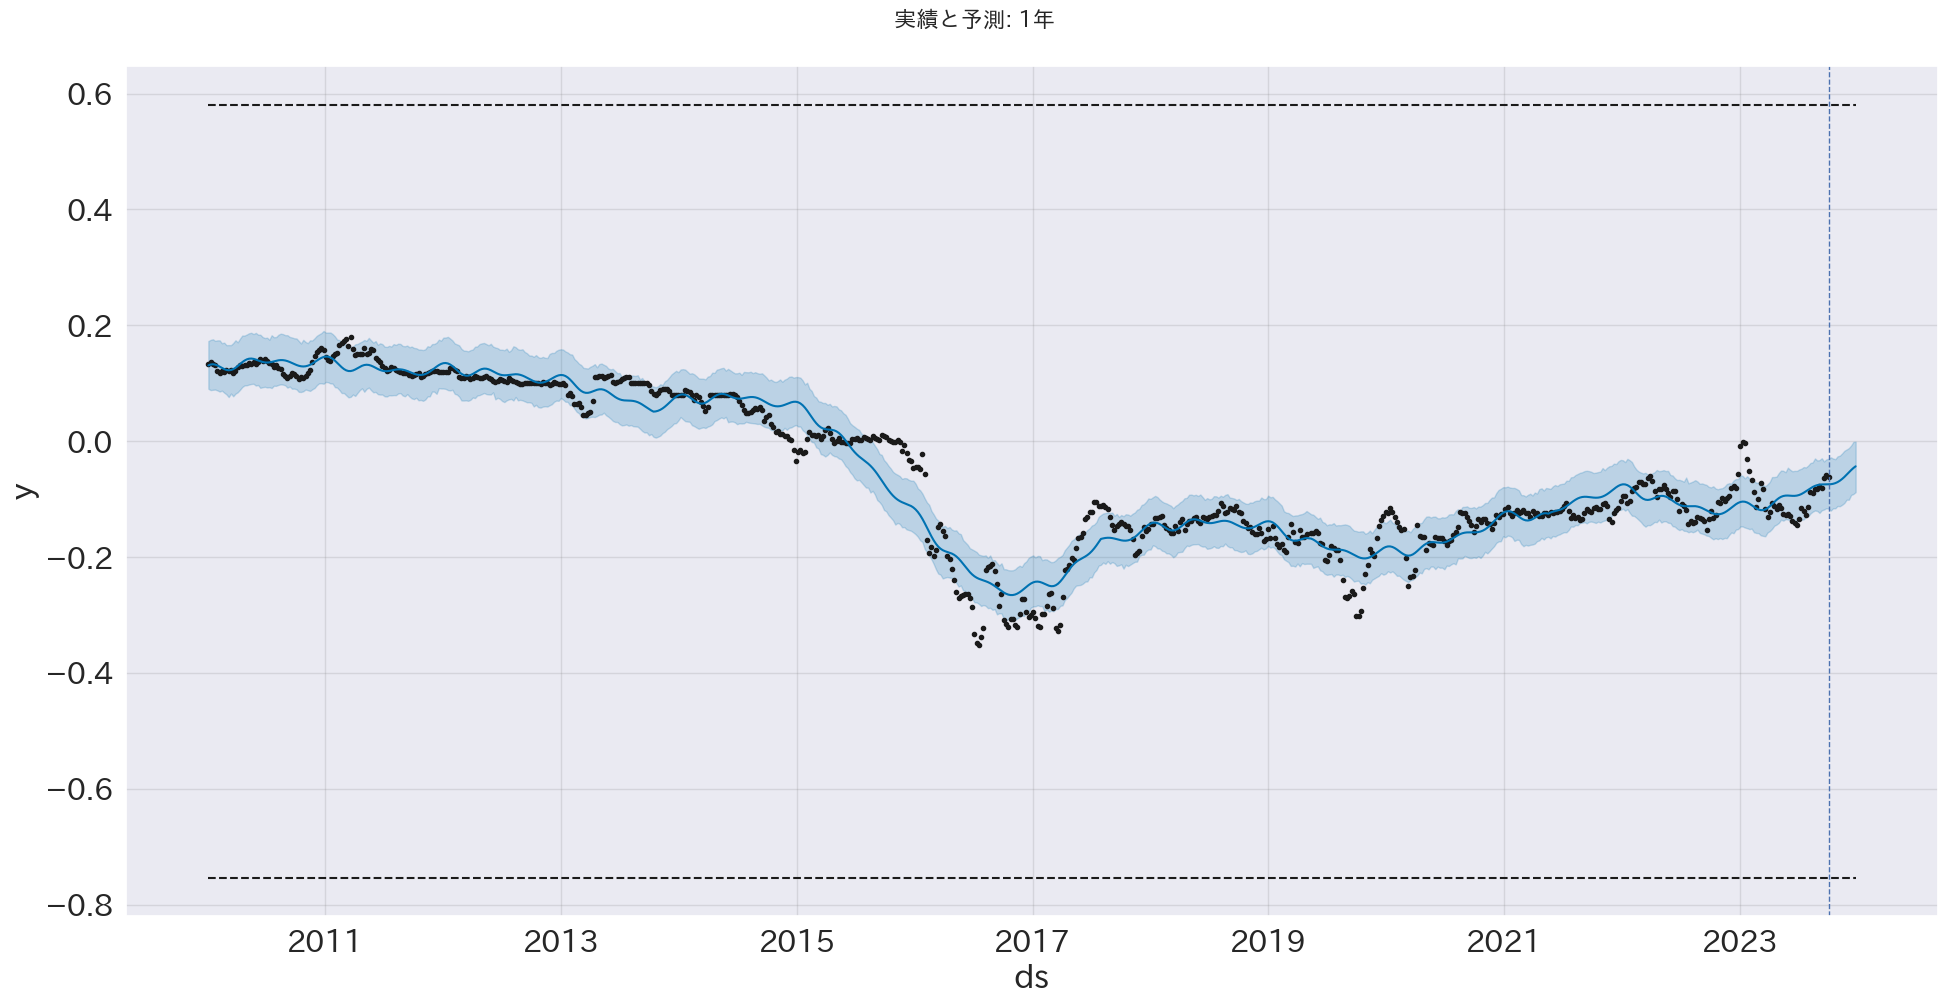

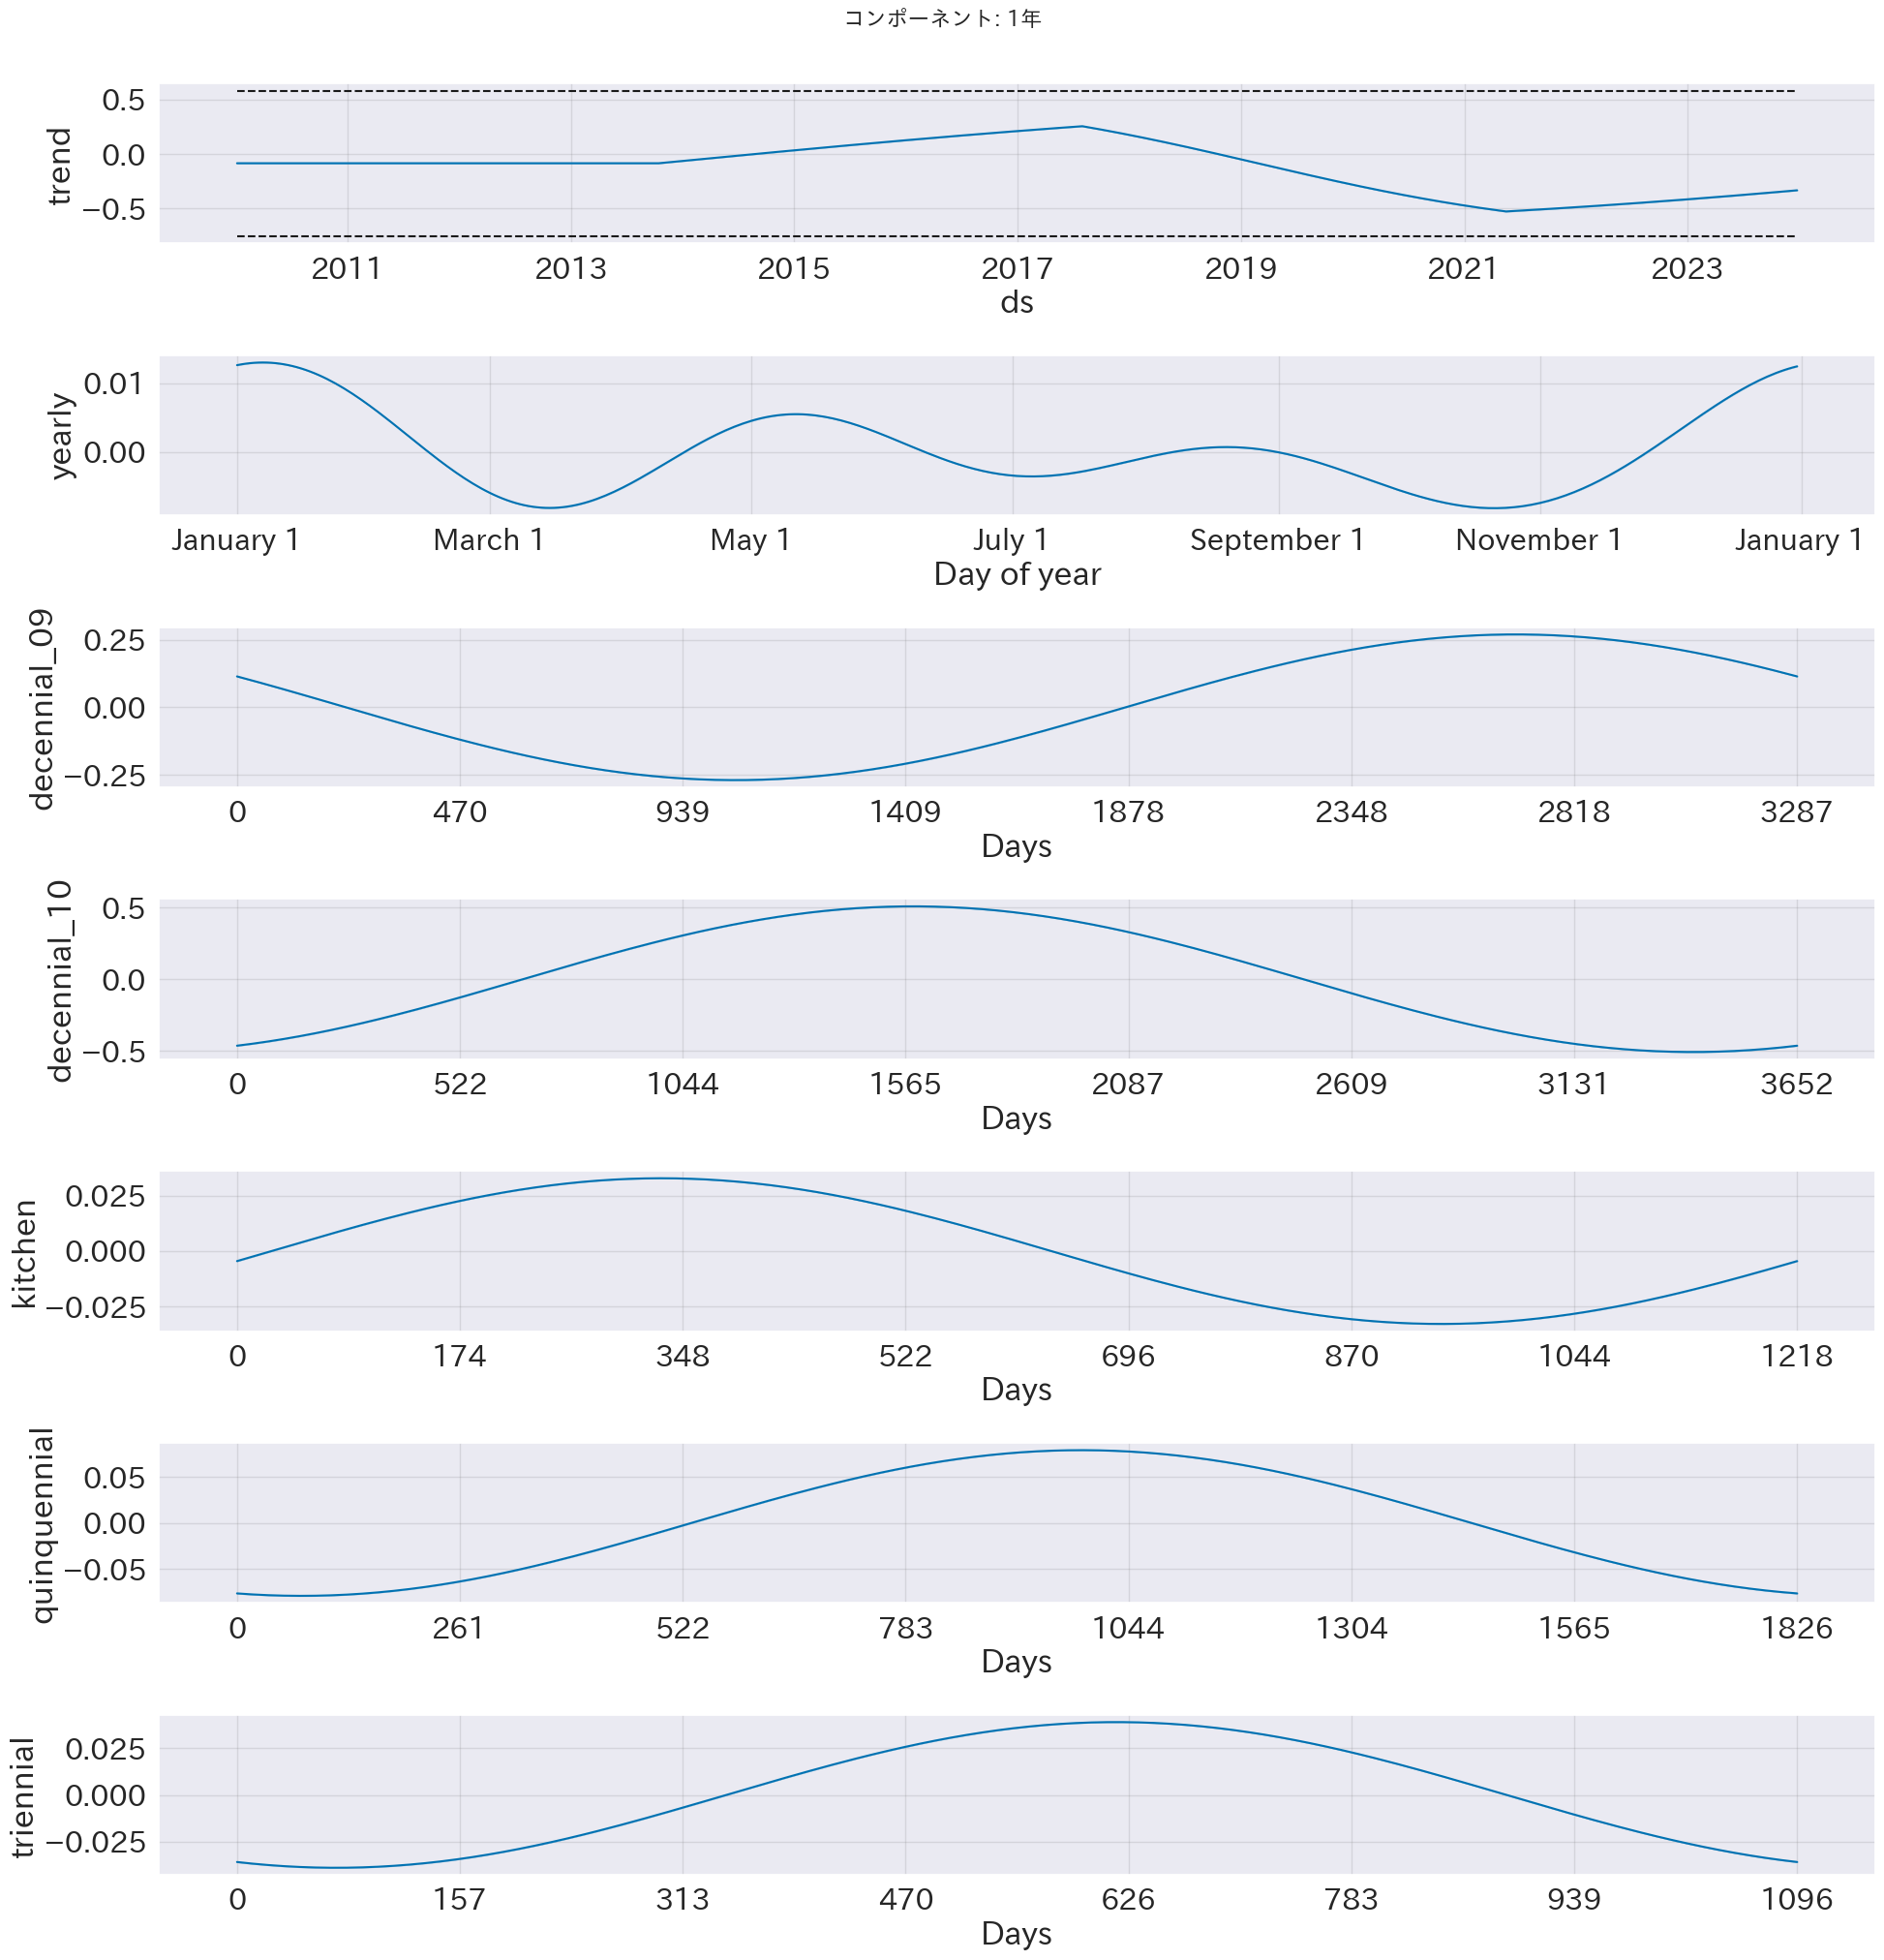

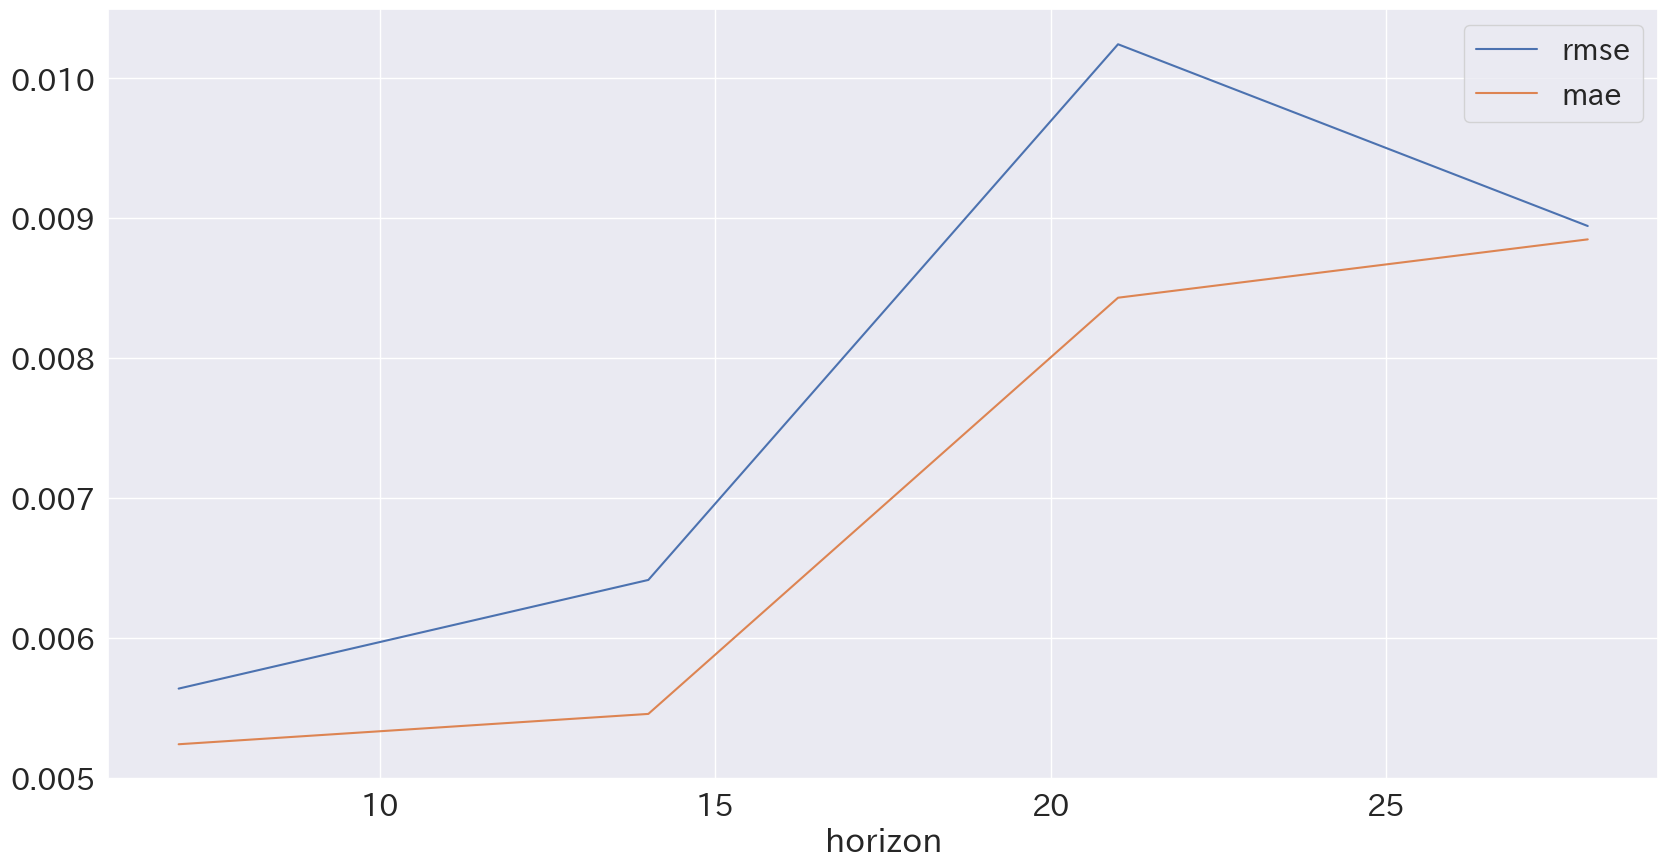

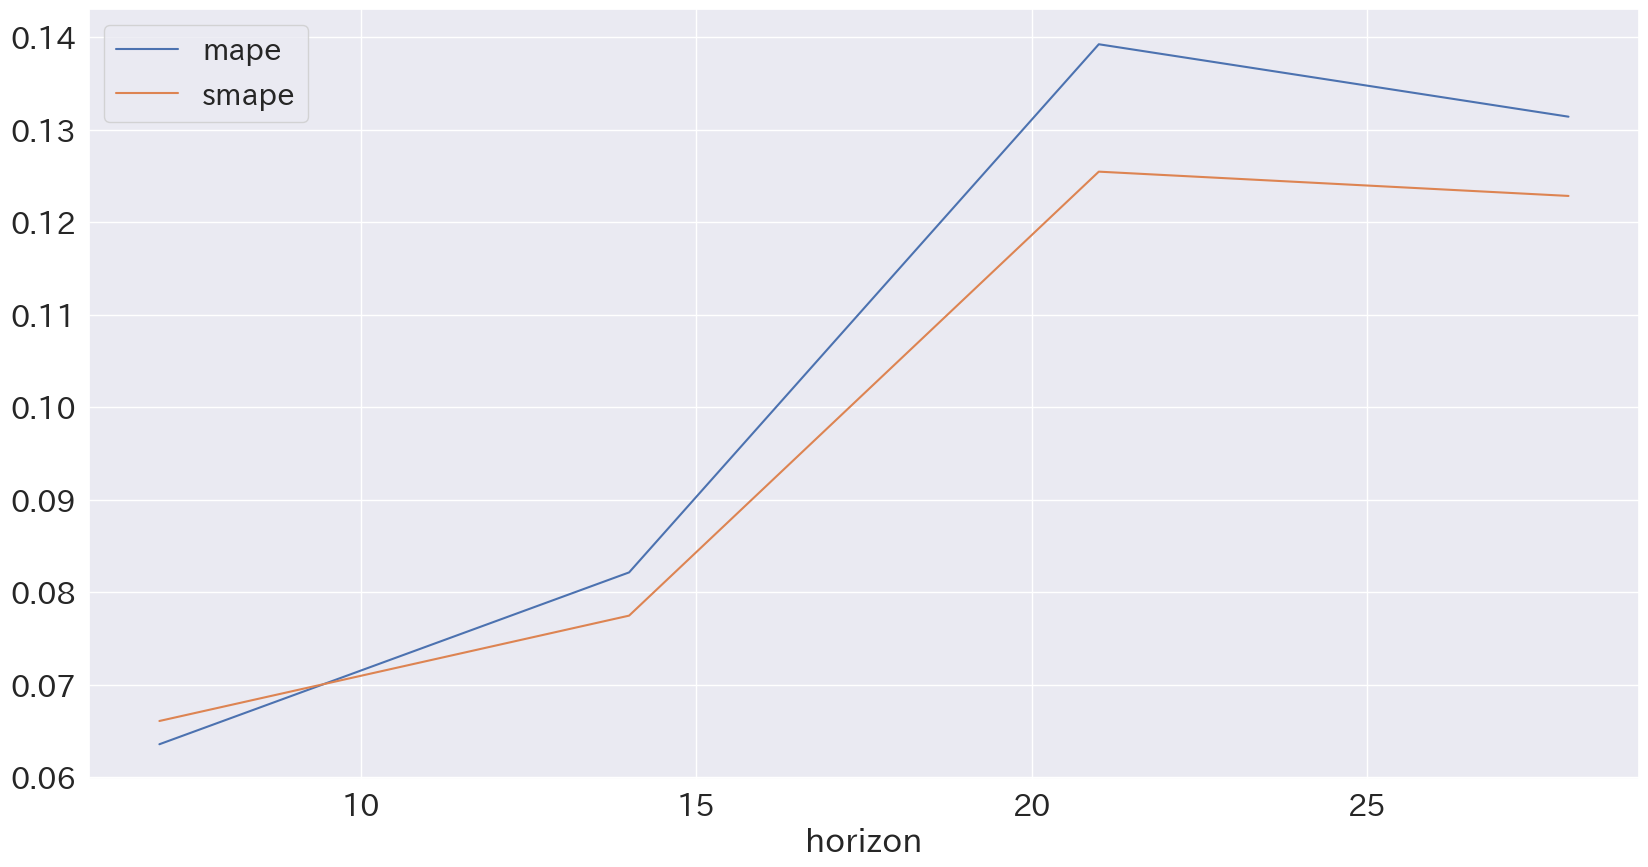

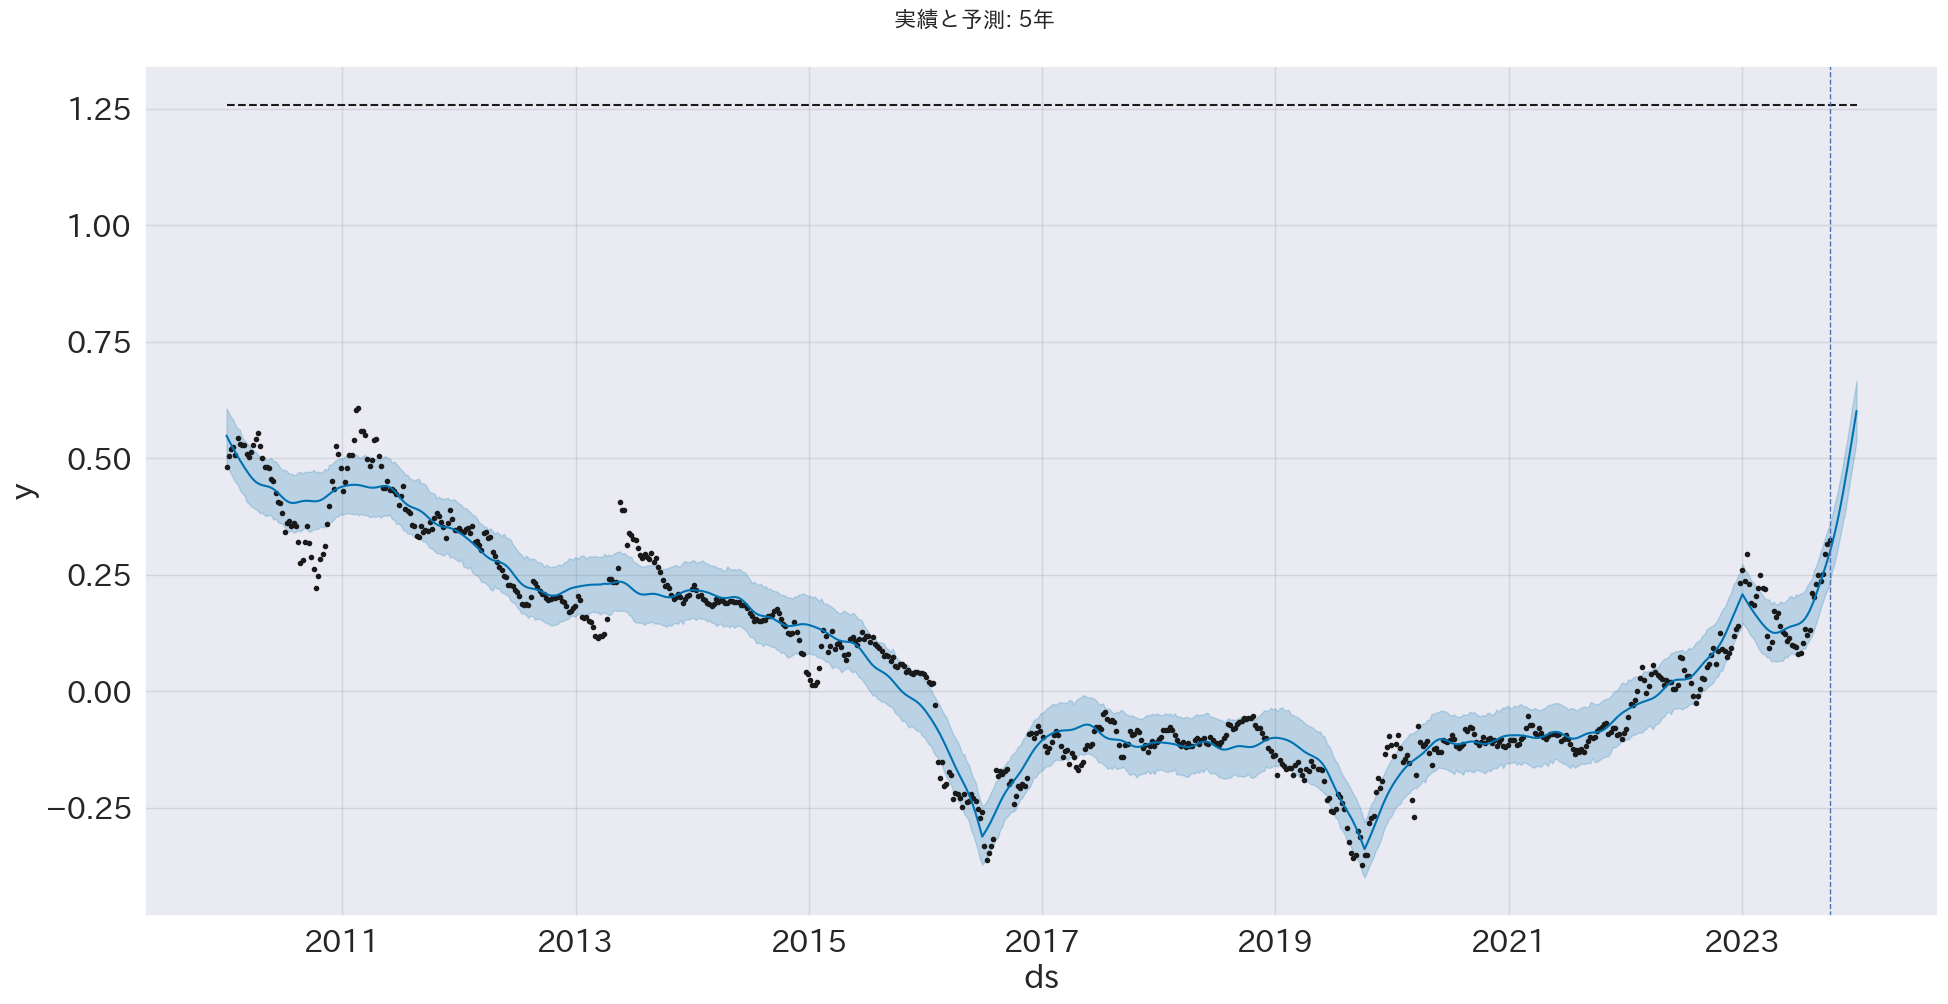

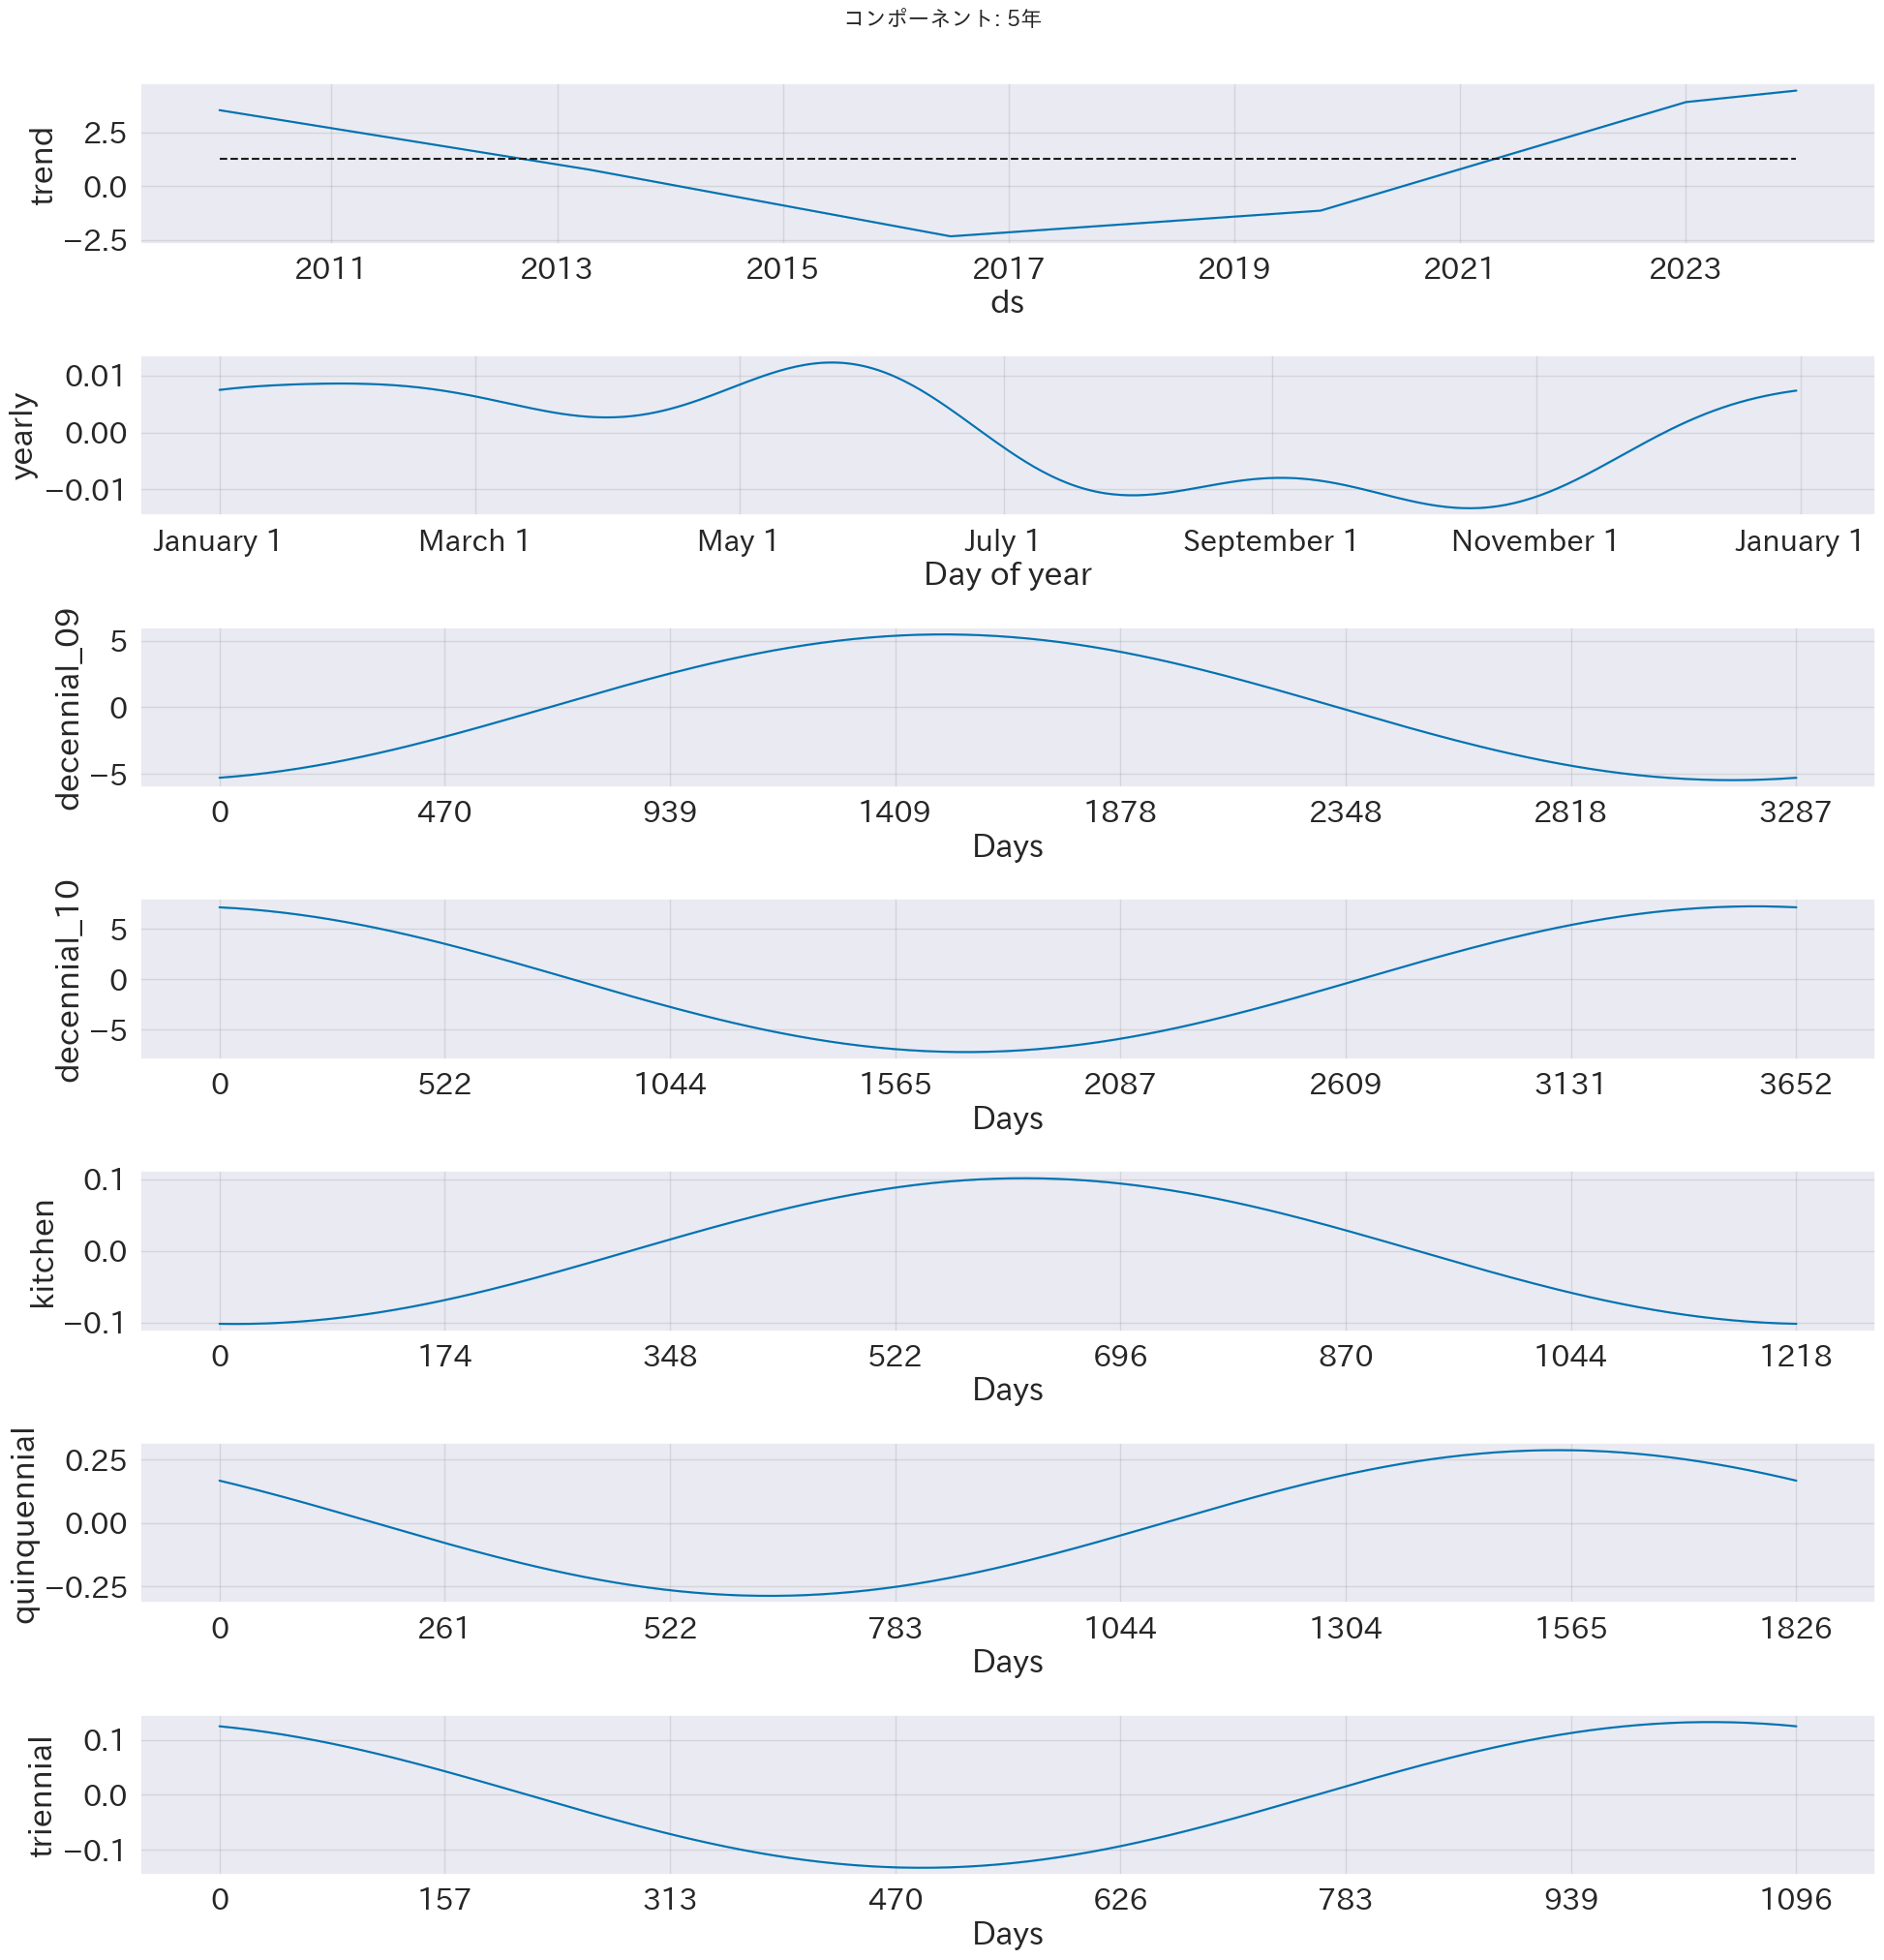

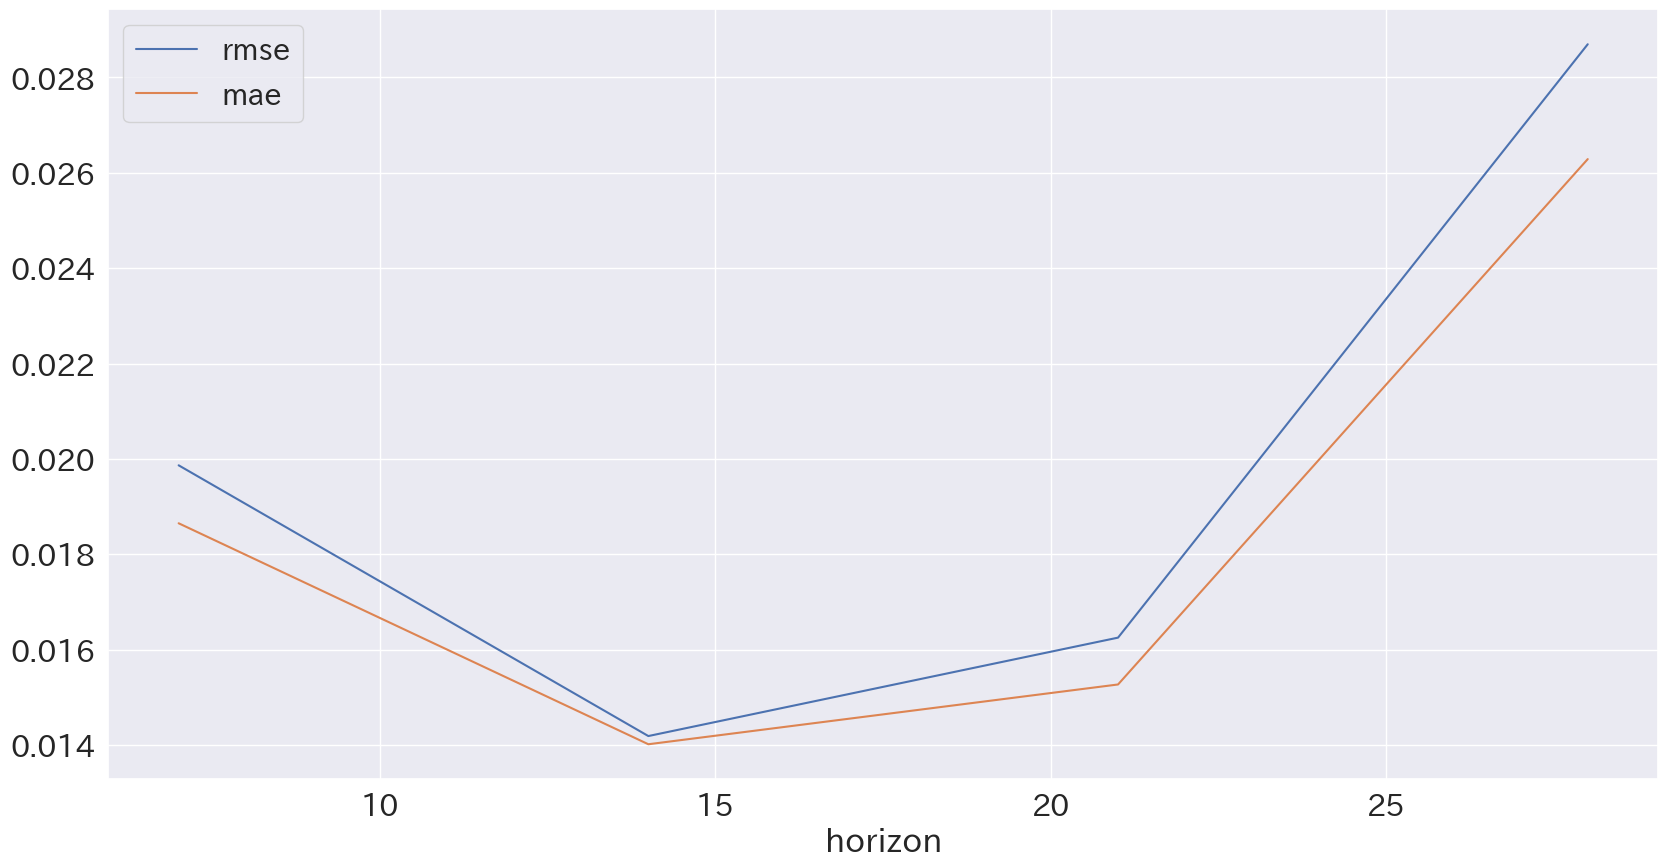

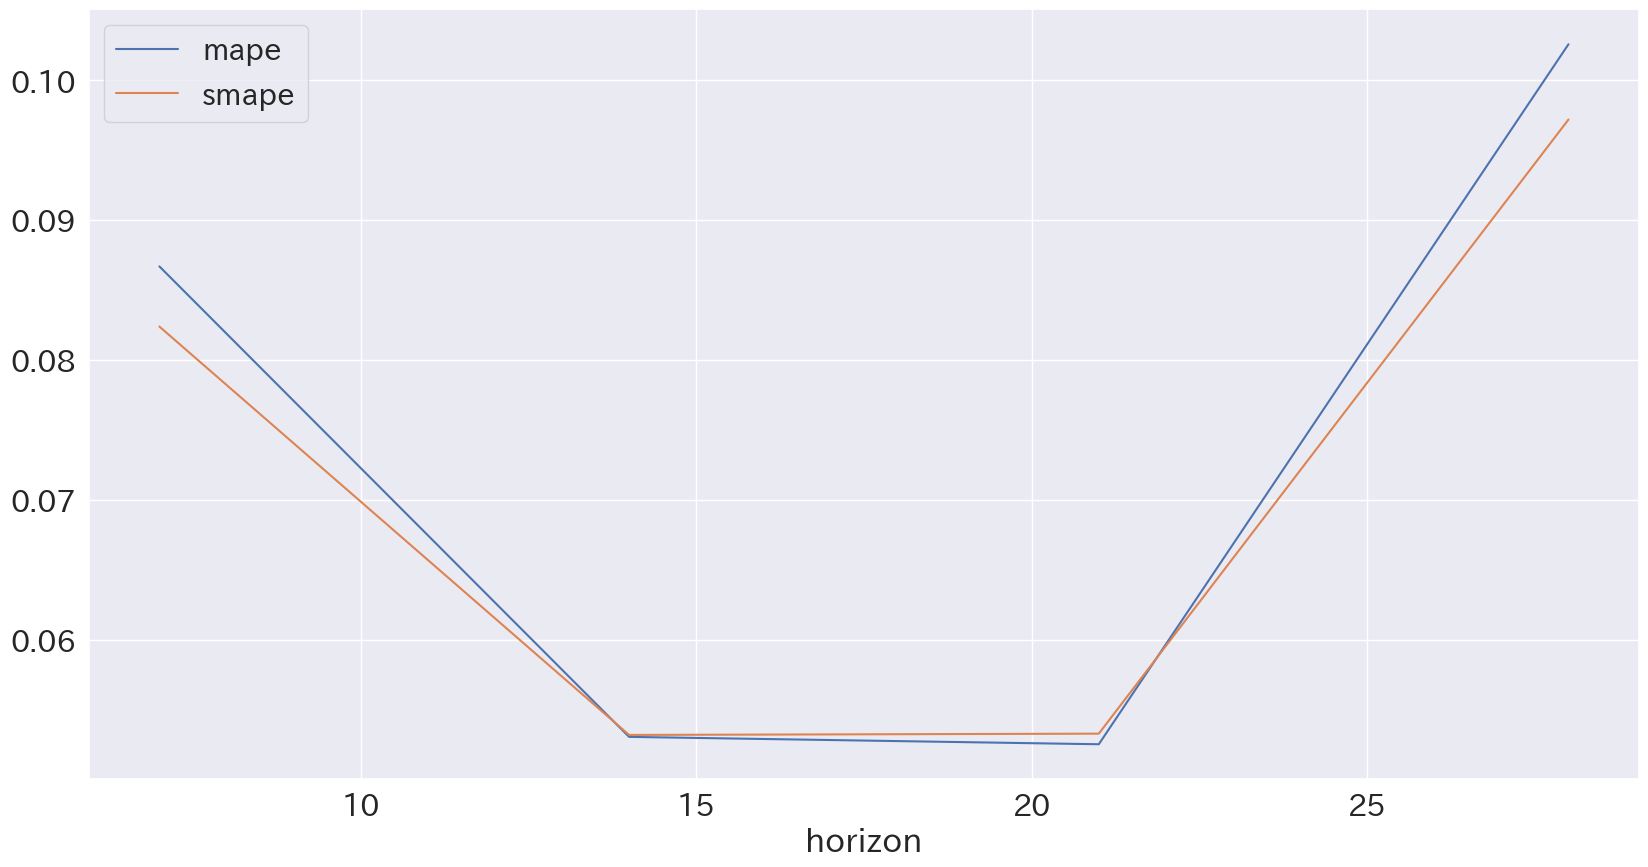

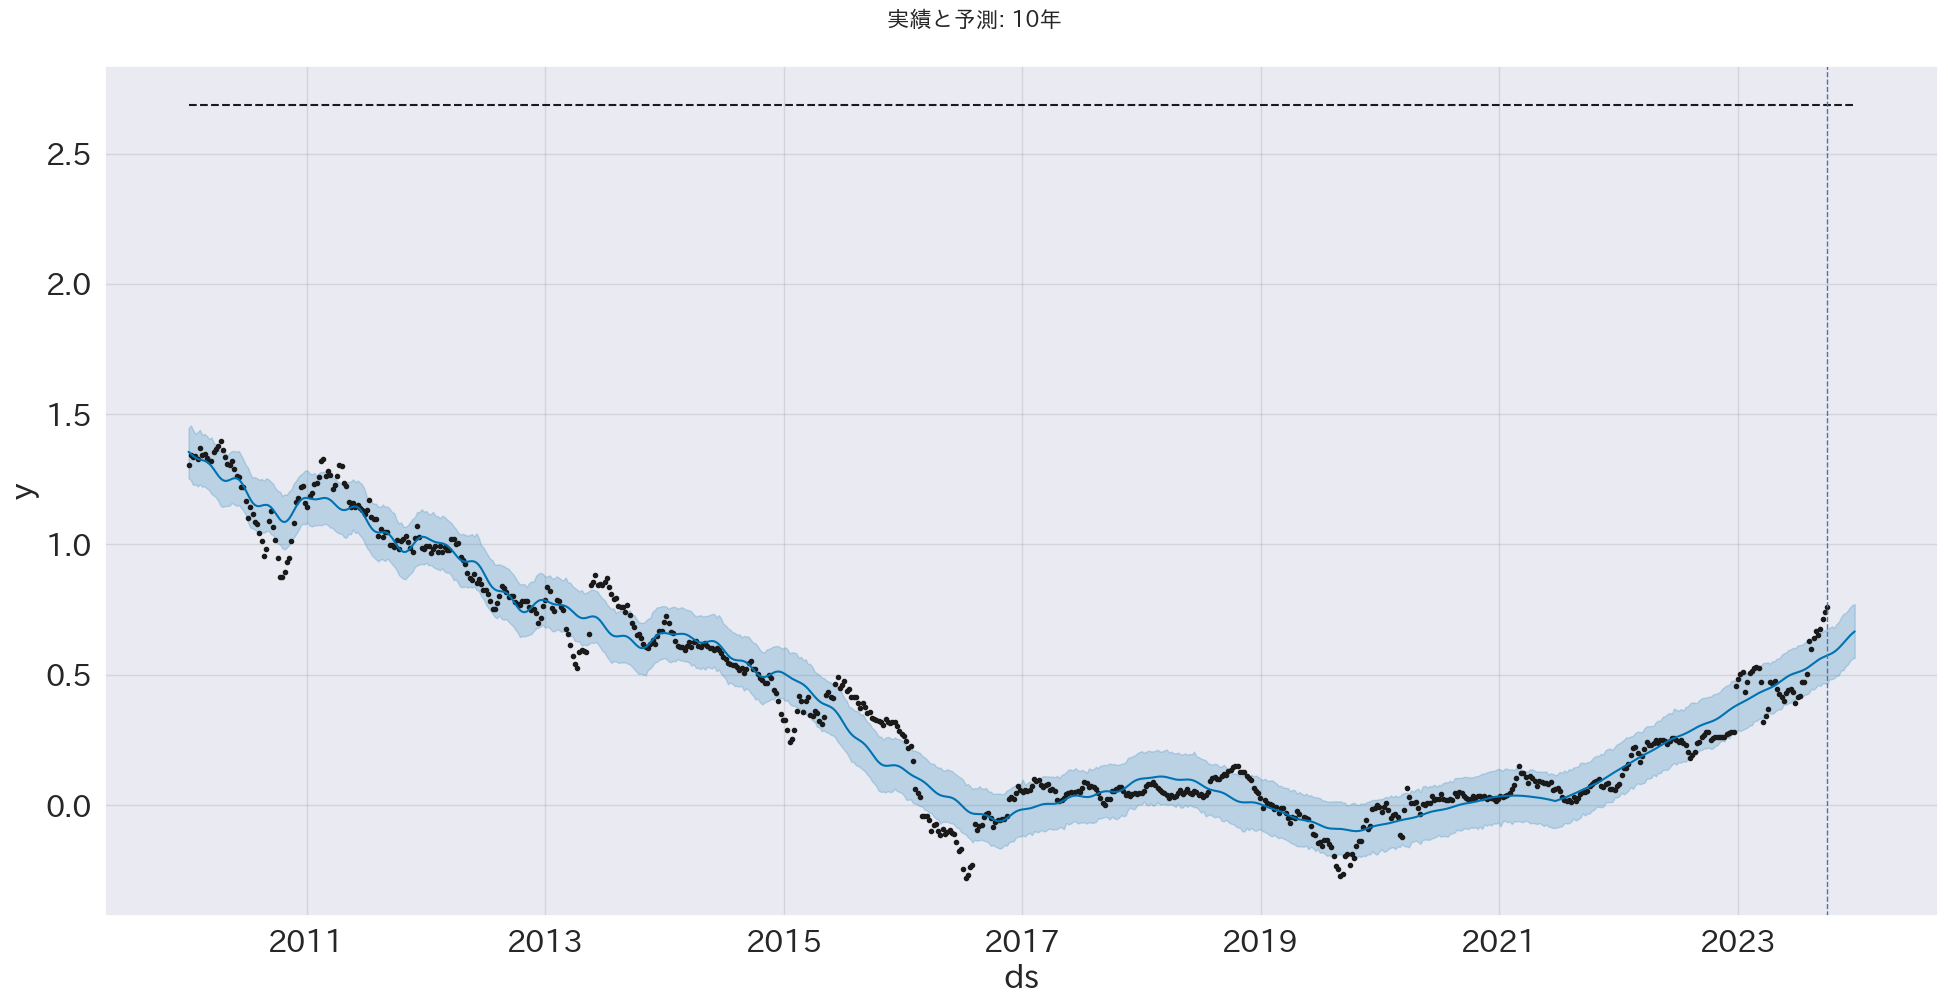

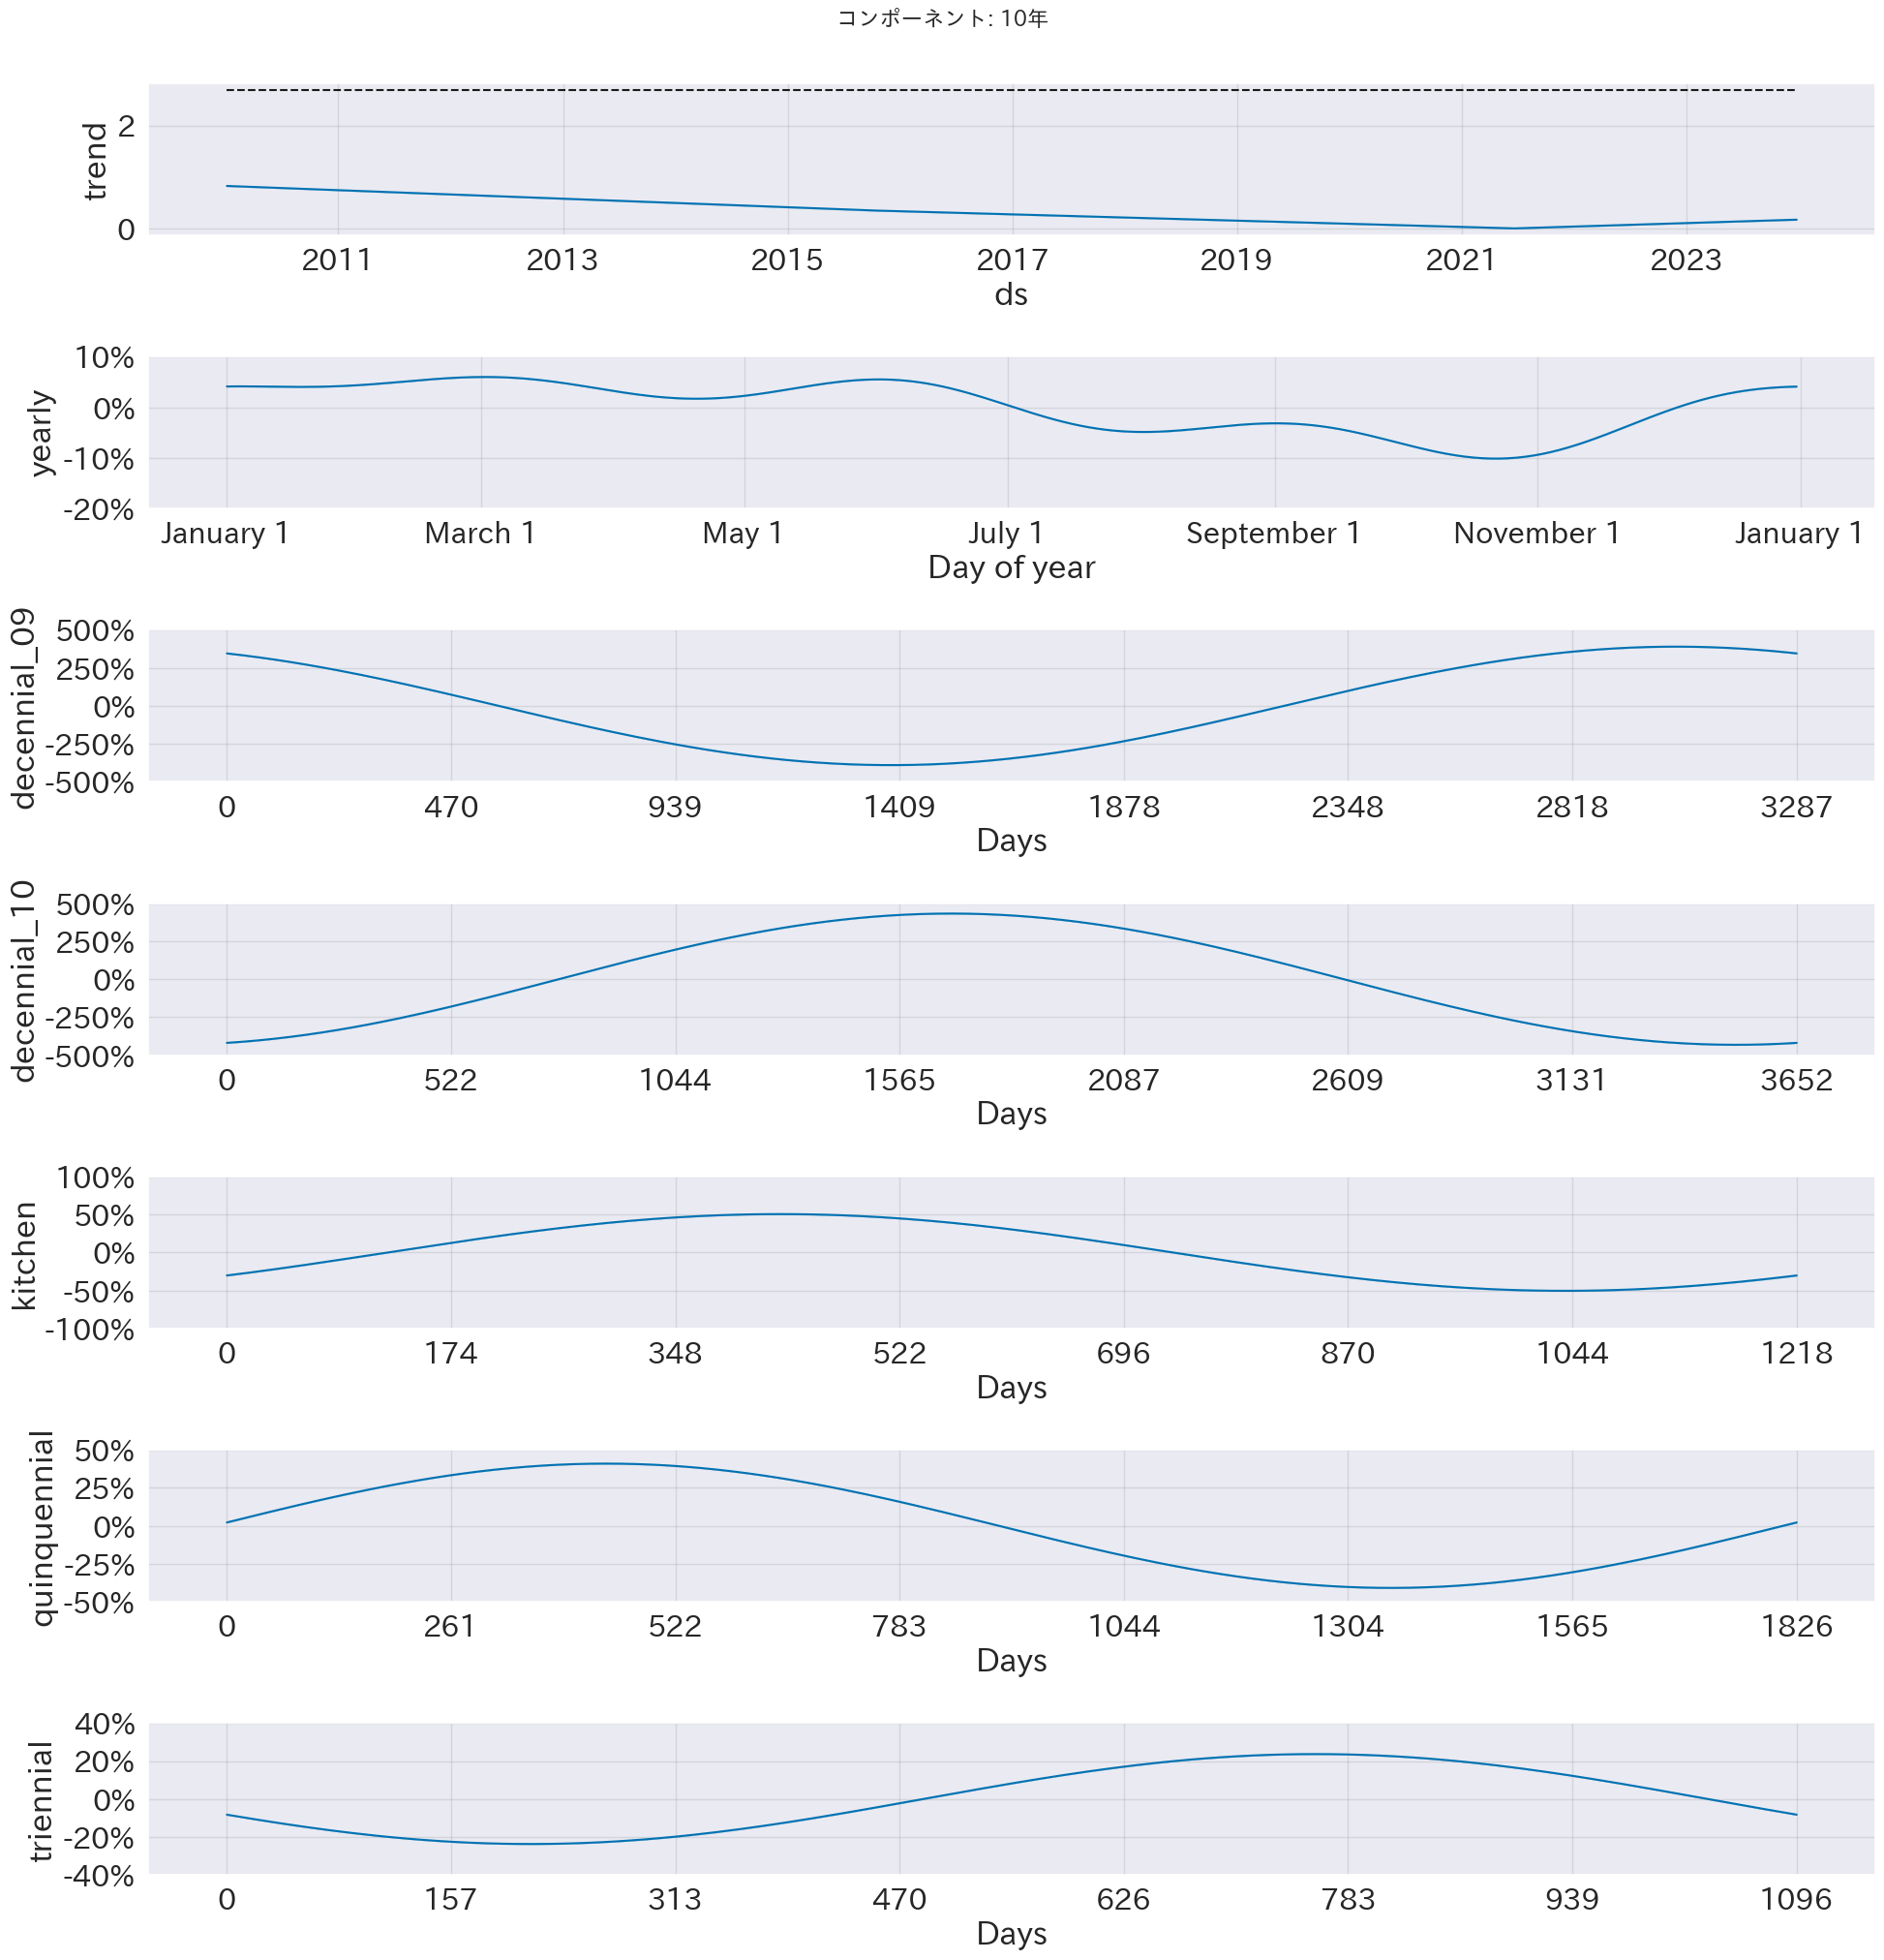

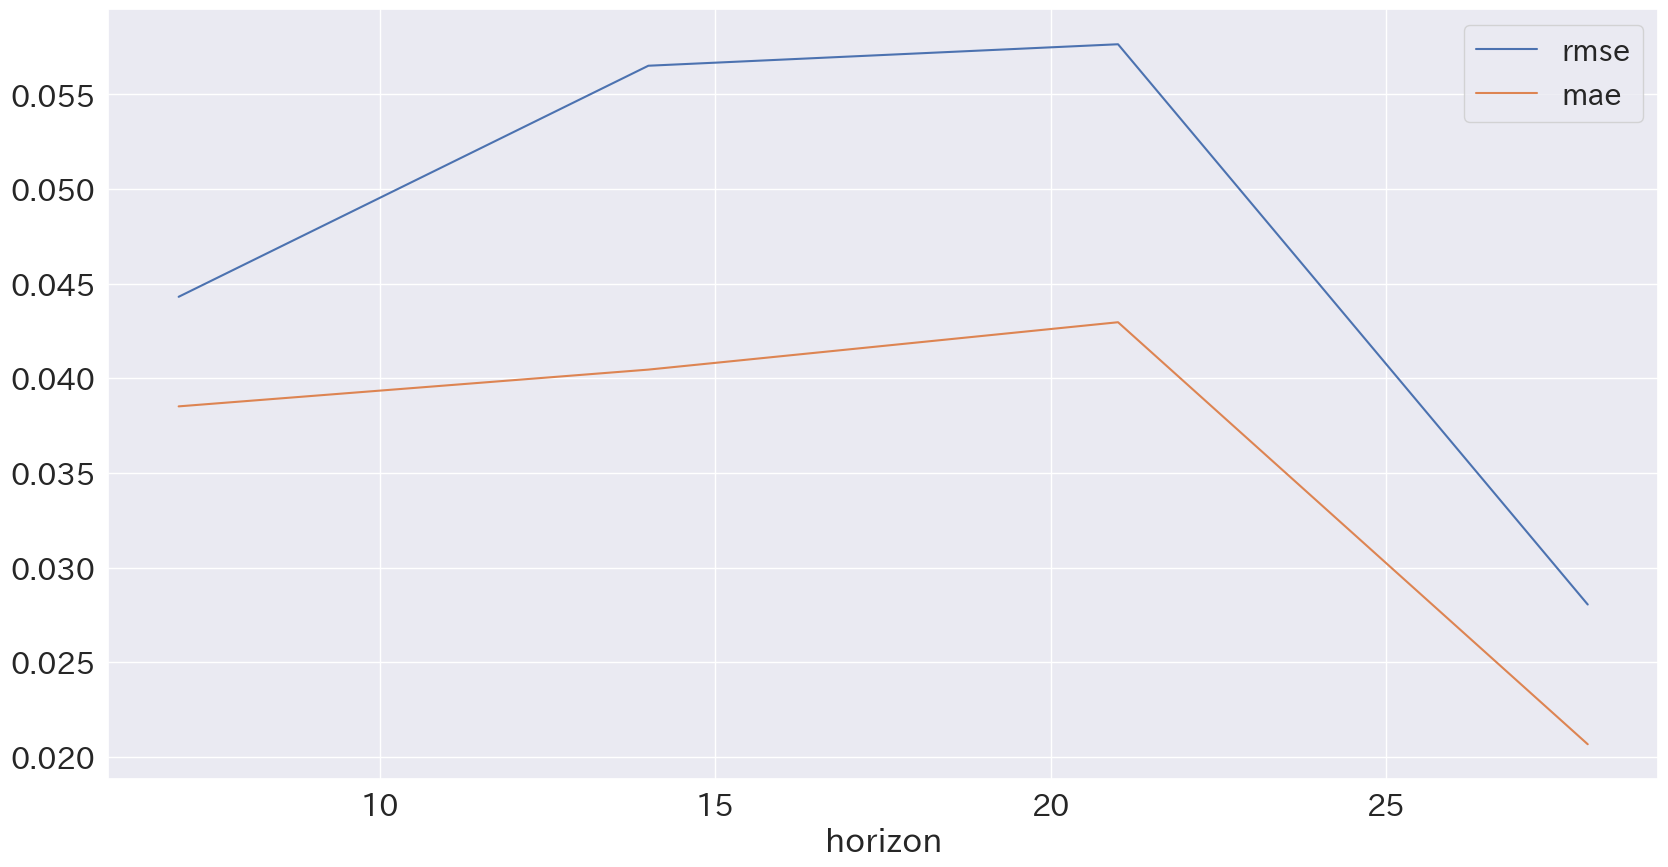

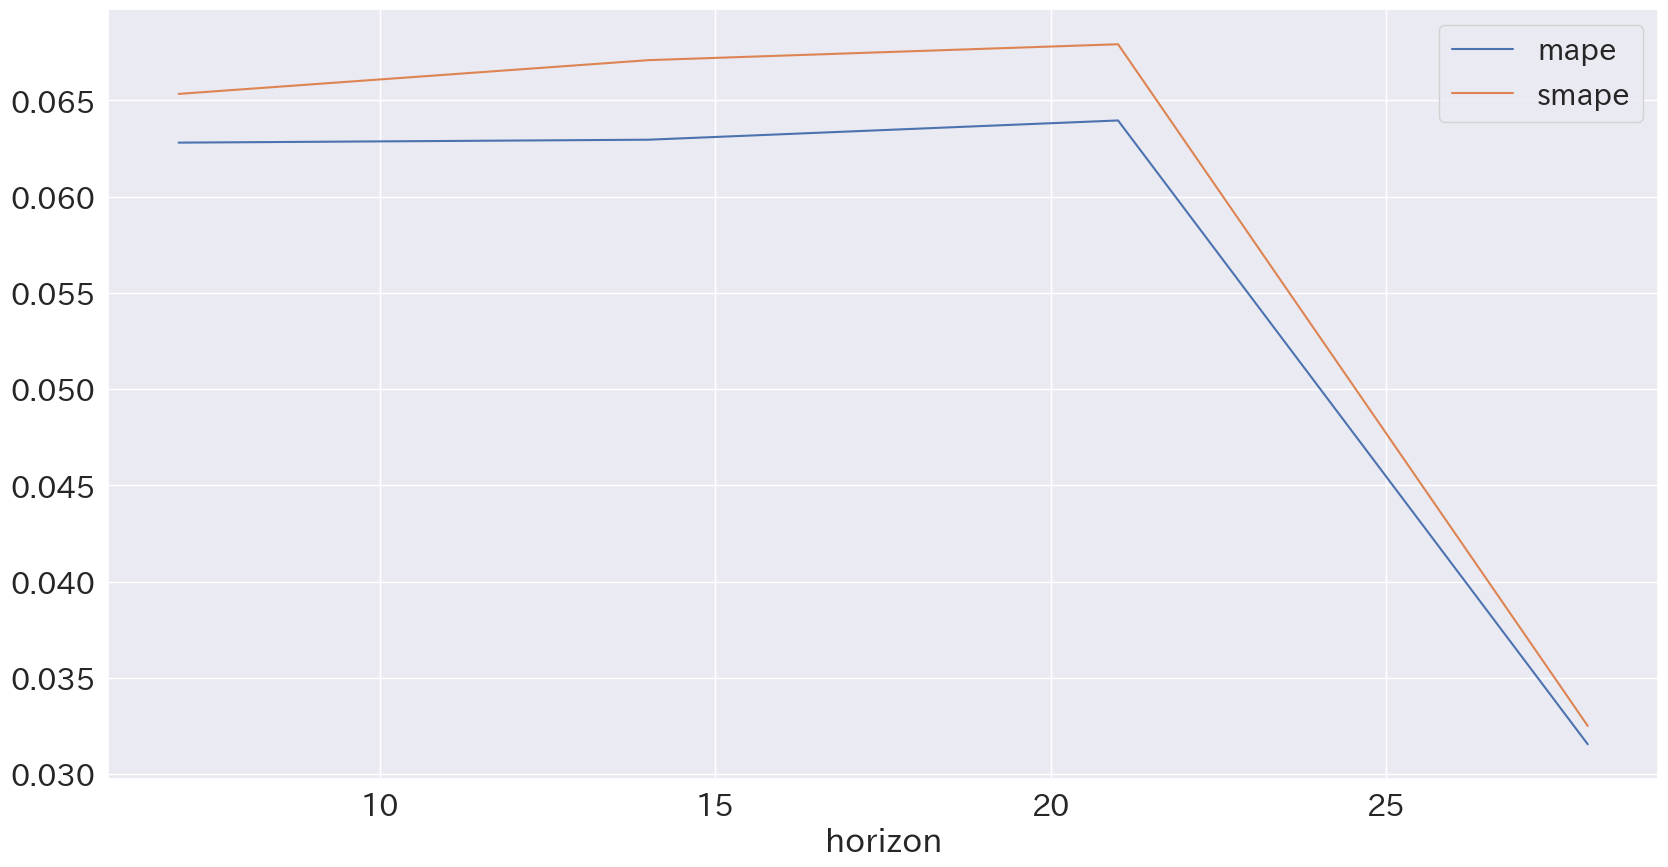

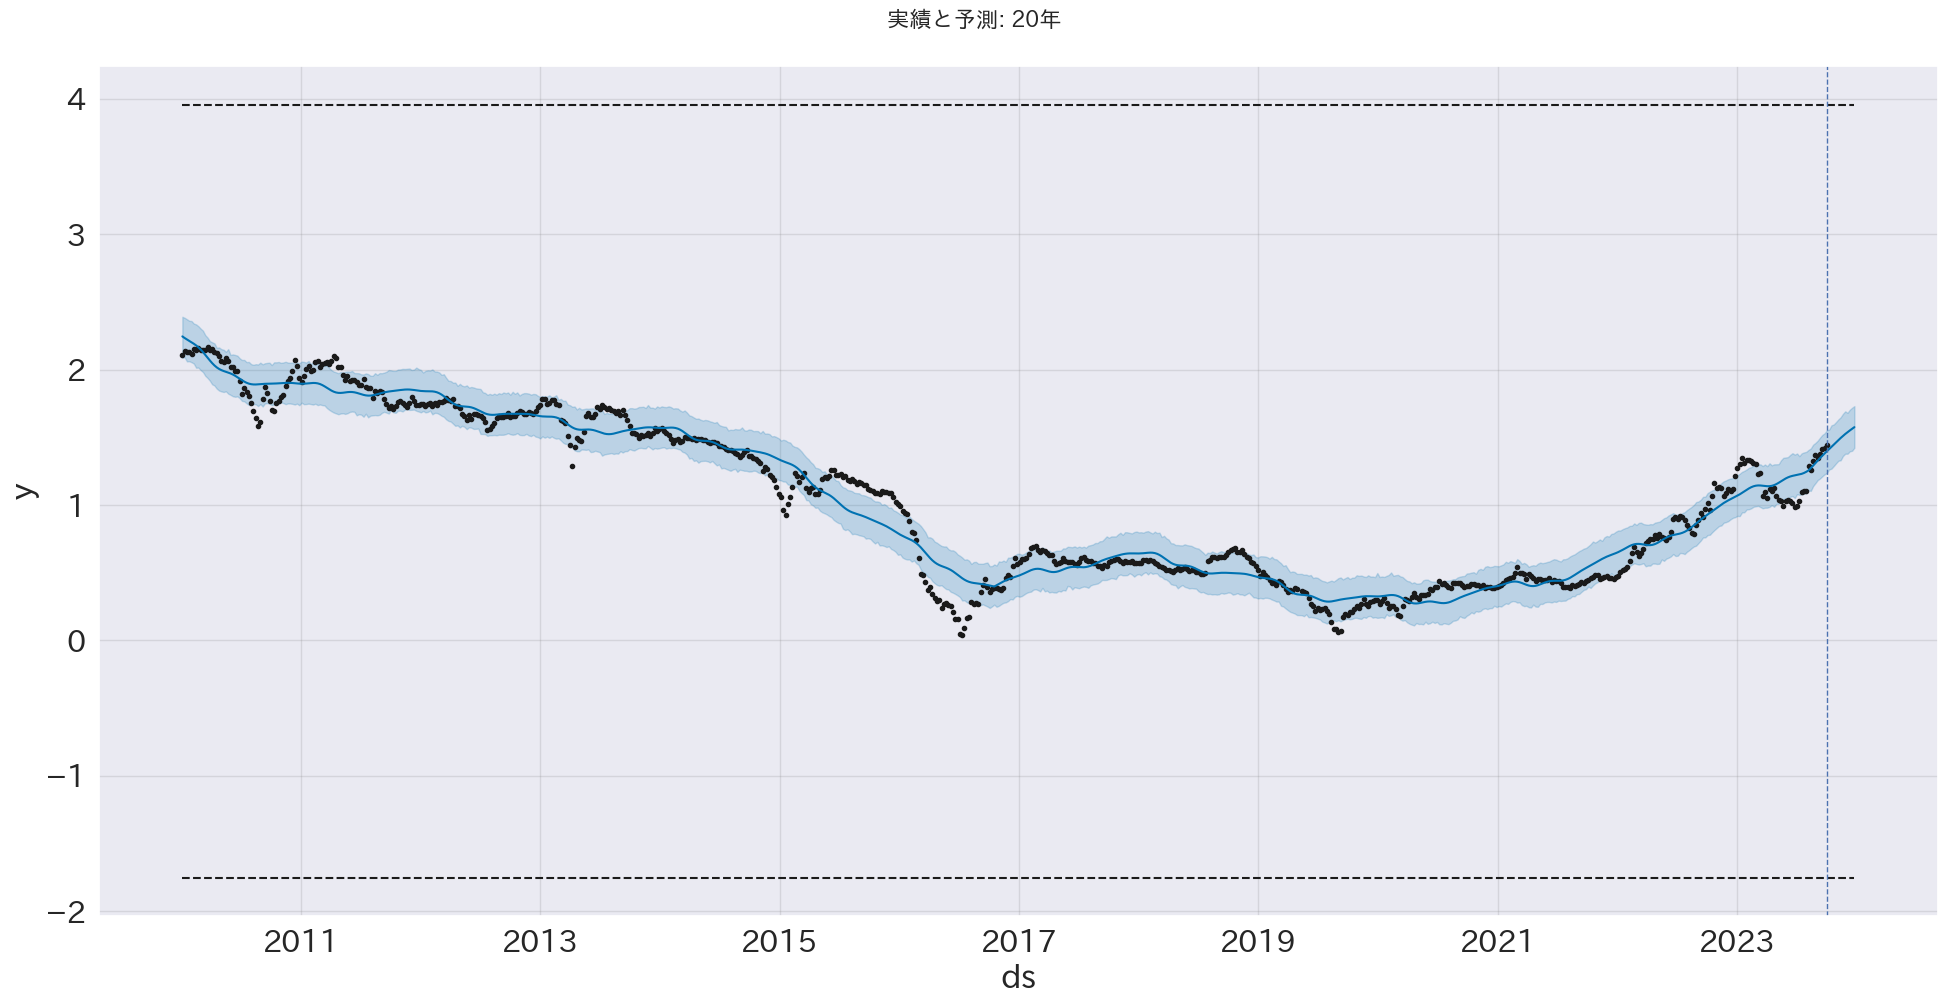

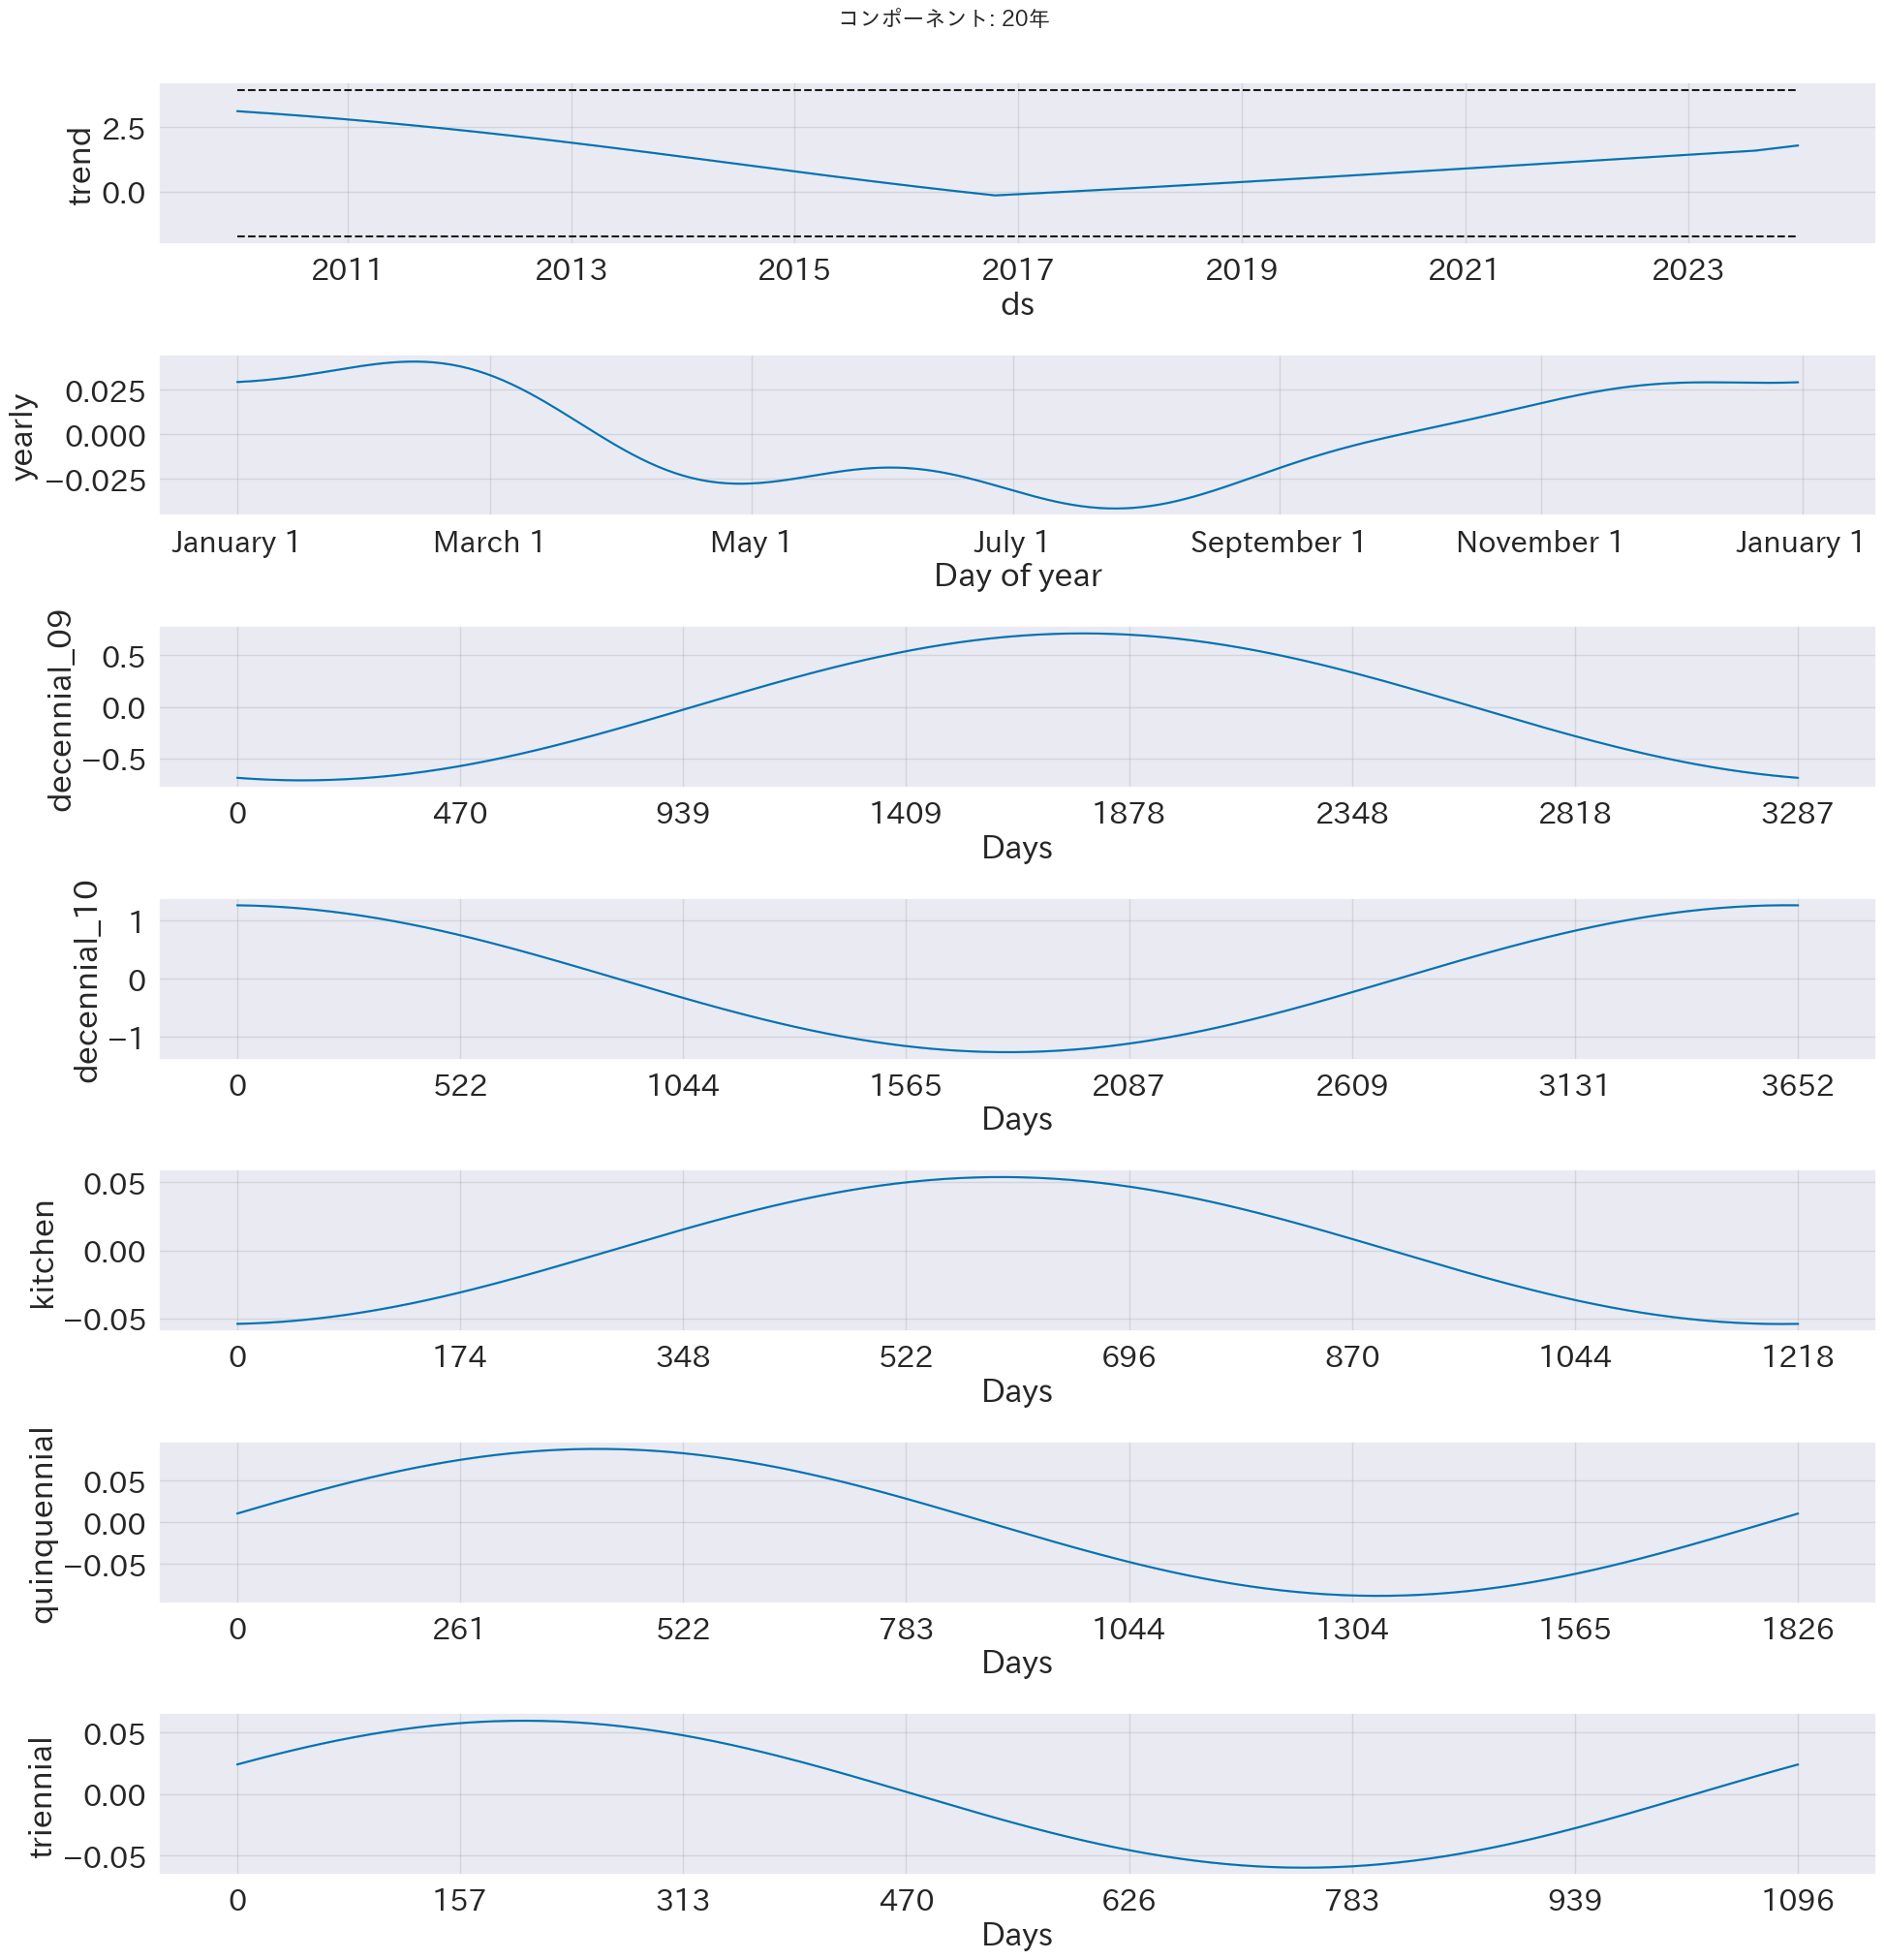

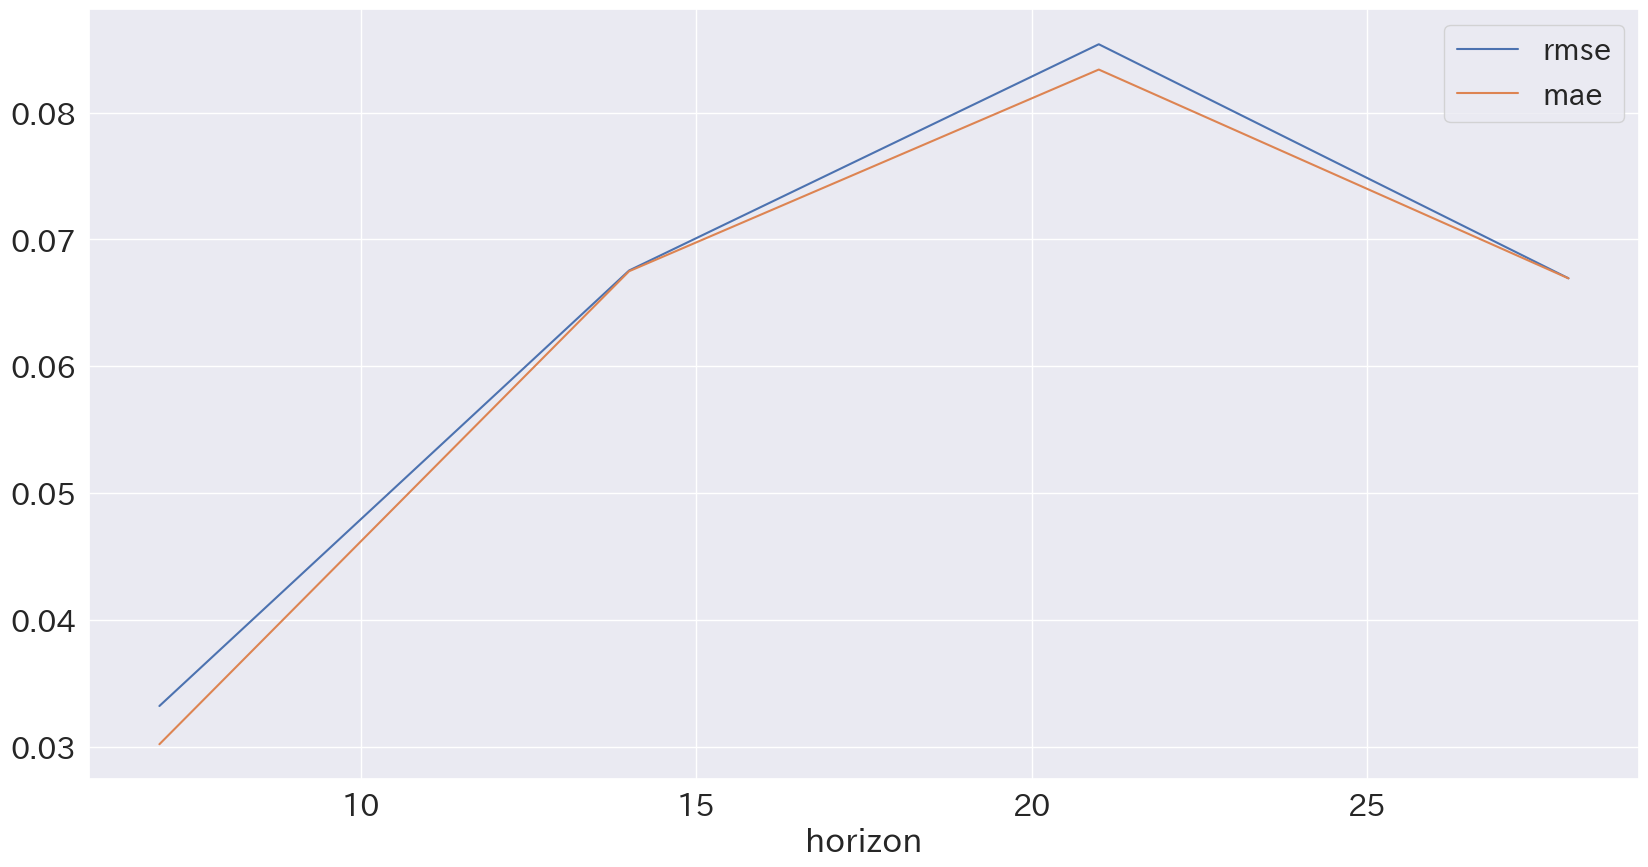

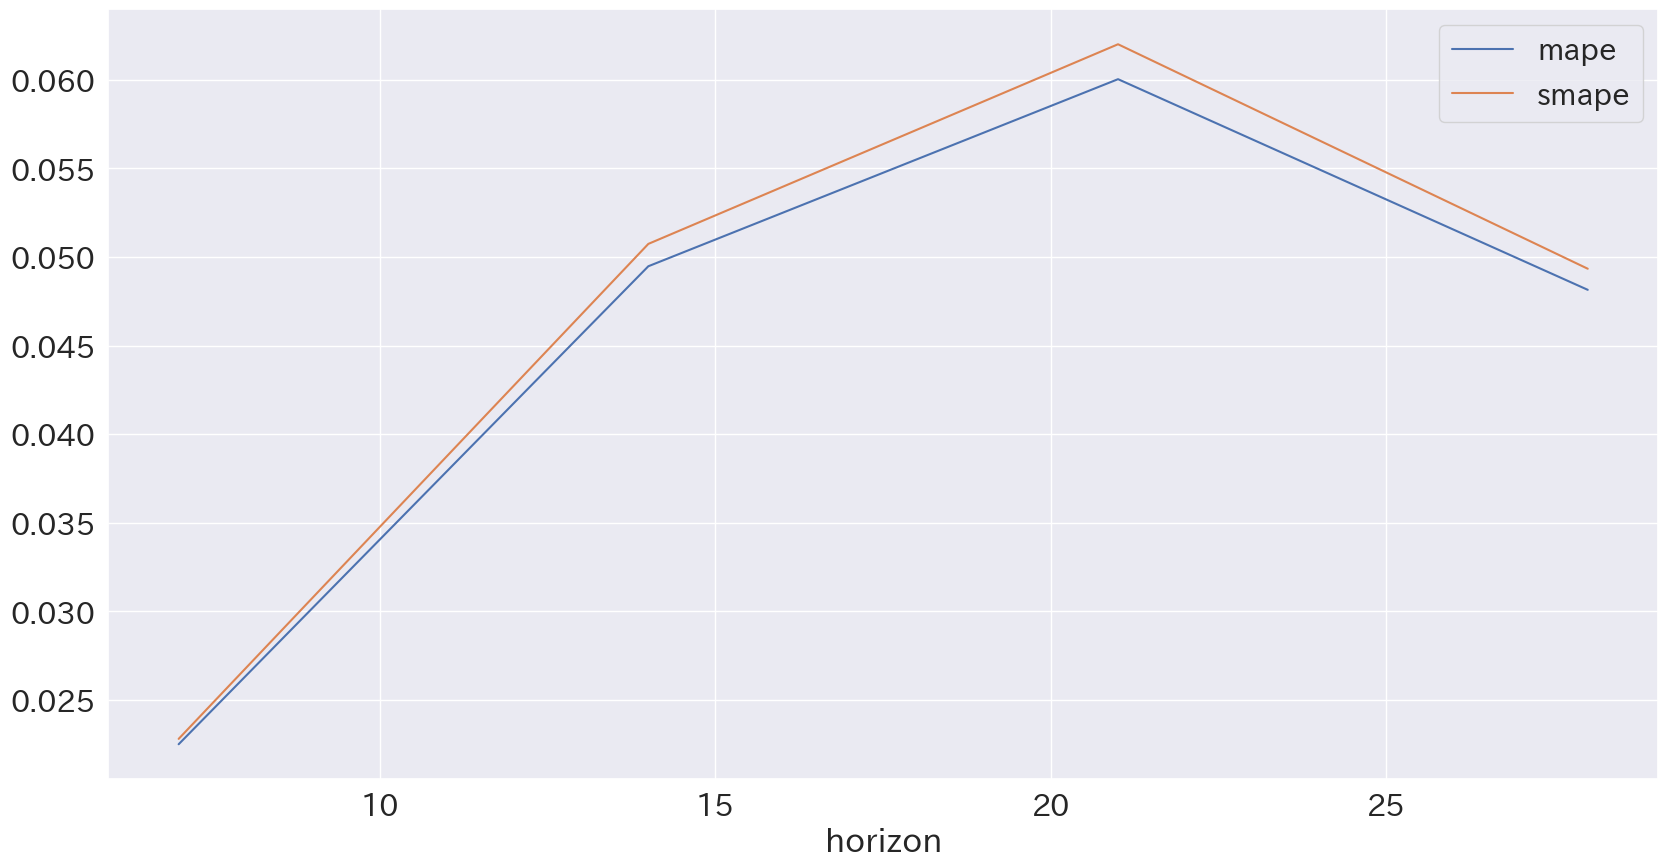

In [26]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


n_years = 1
n_predicts = 12 * n_years


for rate_type in bests.keys():
    bst: BestEstimator = bests[rate_type]

    # predict
    model: Prophet = bst.model
    future = model.make_future_dataframe(periods=n_predicts, freq=freq)

    limitter = Limitter(bst.df)
    future = setup_limit(future, limitter)
    forecast = model.predict(future)

    # plot prediction
    fig: pyplot.Figure = model.plot(forecast, figsize=(20, 10))
    fig.suptitle(f"実績と予測: {rate_type}", x=0.5, y=1.02, size=16)
    pyplot.axvline(bst.df.ds.iloc[-1], color='b', linestyle='--', lw=1)
    fig.show()

    # plot components
    fig = model.plot_components(forecast, figsize=(20, 20))
    fig.suptitle(f"コンポーネント: {rate_type}", x=0.5, y=1.02, size=16)
    fig.show()

    # plot errors
    bst.df_pm.assign(horizon=bst.df_pm.horizon.dt.days).set_index("horizon")[["rmse", "mae"]].plot()
    bst.df_pm.assign(horizon=bst.df_pm.horizon.dt.days).set_index("horizon")[["mape", "smape"]].plot()
    pyplot.show()



In [27]:
def optuna_visualization(bst: BestEstimator):
    optuna.visualization.plot_contour(bst.study).show()
    optuna.visualization.plot_edf(bst.study).show()
    optuna.visualization.plot_optimization_history(bst.study).show()
    optuna.visualization.plot_parallel_coordinate(bst.study).show()
    optuna.visualization.plot_param_importances(bst.study).show()
    optuna.visualization.plot_slice(bst.study).show()


In [44]:
bst.study.best_params

{'growth': 'logistic',
 'changepoint_range': 0.8282368280391401,
 'n_changepoints': 3,
 'changepoint_prior_scale': 4.373439827900198,
 'seasonality_prior_scale': 2.7513761133360424,
 'seasonality_mode': 'additive'}

---
# 国債金利：1年 


AttributeError: 'Axes' object has no attribute 'show'

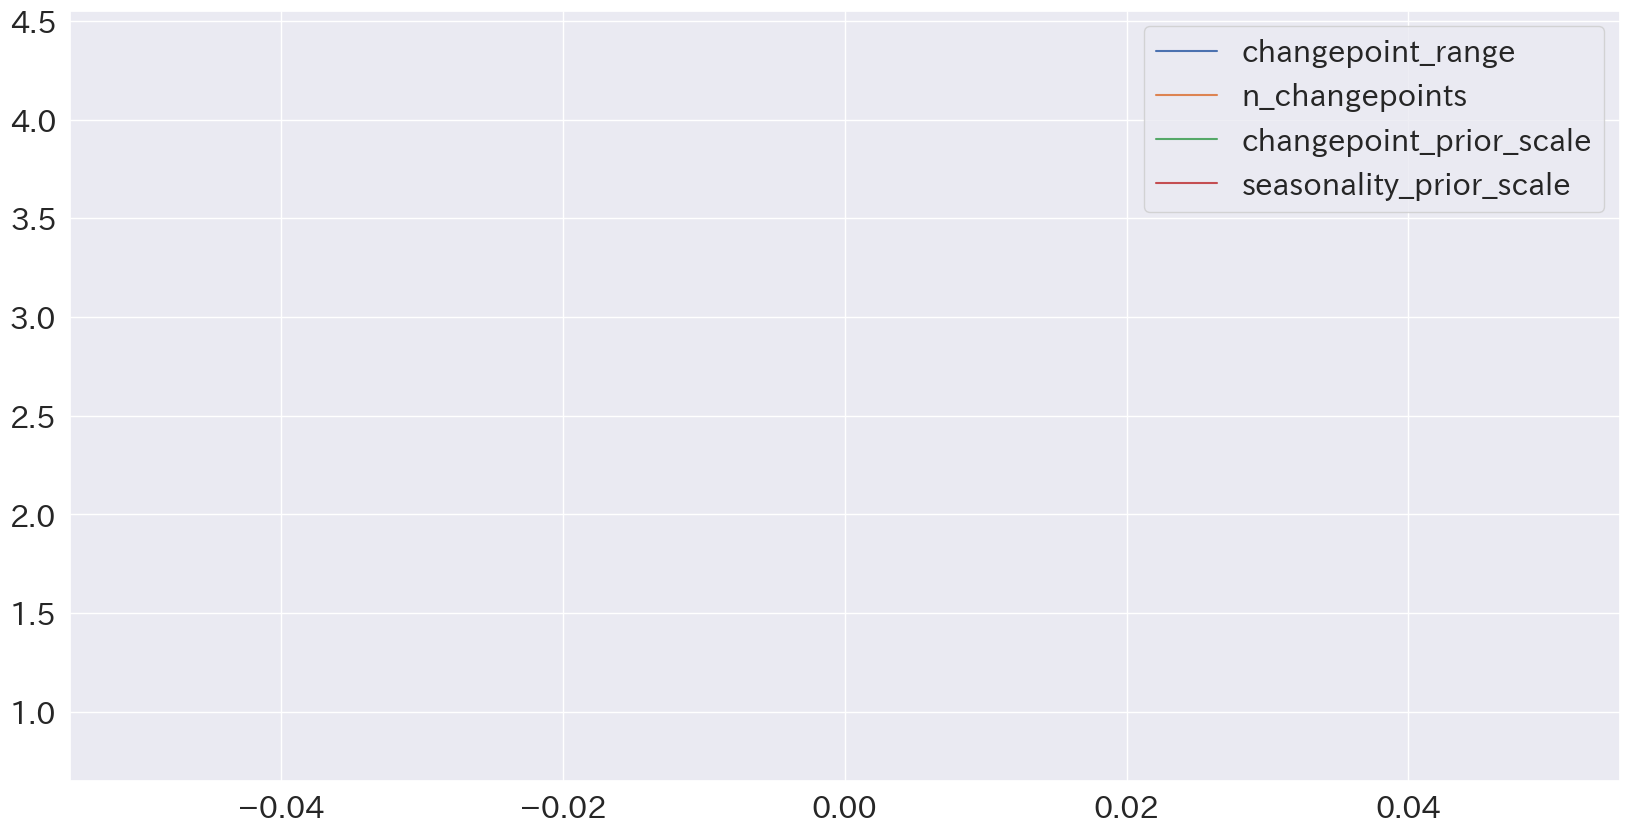

In [47]:
from IPython.display import display, Markdown


for rt in bests.keys():
    bst: BestEstimator = bests[rt]
    display(Markdown(f"""---
# 国債金利：{rt} 
"""))
    pandas.DataFrame({k: [v] for k, v in bst.study.best_params.items()}).plot()
    pyplot.show()
    optuna_visualization(bst)


In [29]:
import plotly.graph_objs as go

In [30]:
# changepoint data
changepoints_threshold = 0.01
signif_changepoints = bst.model.changepoints[
    numpy.abs(numpy.nanmean(bst.model.params['delta'], axis=0)) >= changepoints_threshold
]
df_cp = signif_changepoints.reset_index(drop=True)
df_cp.head(3)


0   2016-10-17
1   2023-08-07
Name: ds, dtype: datetime64[ns]

In [31]:
fig: go.Figure = plot_plotly(model, forecast, trend=True, changepoints=True)
fig.update_layout(title=f"予測 : {rate_type}")


In [32]:
plot_components_plotly(model, forecast).update_layout(title=f"コンポーネント : {rate_type}")


/home/devuser/workspace/backend/.venv/lib/python3.10/site-packages/plotly/io/_json.py:557: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [33]:
bst.study.best_params

{'growth': 'logistic',
 'changepoint_range': 0.9900468985463876,
 'n_changepoints': 2,
 'changepoint_prior_scale': 4.527311074085851,
 'seasonality_prior_scale': 5.980421734472287,
 'seasonality_mode': 'additive'}

In [34]:
g_end_date = datetime.now()
g_end_date.strftime("%Y/%m/%d %T")


'2023/10/24 02:44:38'

# 実験管理

In [35]:
import mlflow

experiment_name = "jgbcm_interest_rate"

tracking_uri = f'sqlite:///../data/experiment.db'
mlflow.set_tracking_uri(tracking_uri)

experiment = mlflow.get_experiment_by_name(name=experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(name=experiment_name)
else:
    experiment_id = experiment.experiment_id


In [36]:
# NOTE: Enable to infer input signature of `_ds`, for MLflow
str_cols = ["基準日", "ds"]
value_cols = [col for col in _df.columns if col not in str_cols]
_df = _df.assign(**{col: _df[col].astype(float) for col in value_cols}).assign(**{col: _df[col].astype(str) for col in str_cols})
_df[value_cols].head(3)

1年     2年     3年     4年     5年    6年    7年     8年     9年  10年  15年  \
0  10.327  9.362  8.830  8.515  8.348  8.29  8.24  8.121  8.127  NaN  NaN   
1  10.333  9.364  8.831  8.516  8.348  8.29  8.24  8.121  8.127  NaN  NaN   
2  10.340  9.366  8.832  8.516  8.348  8.29  8.24  8.122  8.128  NaN  NaN   

   20年  25年  30年  40年  
0  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN

In [37]:
from mlflow.models import infer_signature
from mlflow.data.pandas_dataset import PandasDataset


desc = "Predict the interest rate for jgbcm"
with mlflow.start_run(experiment_id=experiment_id, run_name="trial", description=desc) as mlf:
    ds: PandasDataset = mlflow.data.from_pandas(_df, source=url)
    mlflow.log_input(ds, context="simulation")

    mlflow.log_param("period_type", f"{period_type}")
    mlflow.set_tag("start", g_start_date)
    mlflow.set_tag("end", g_end_date)
    duration = round((g_end_date - g_start_date).seconds / 60, 0)
    mlflow.set_tag("duration", f"{duration} mins")

    for rt in bests.keys():
        bst: BestEstimator = bests[rt]
        params: dict = {f"{rt}/{k}": v for k, v in bst.study.best_params.items()}
        mlflow.log_params(params)
        metrics: dict = bst.df_pm.mean().drop(["horizon", "coverage"]).to_dict()
        metrics = {f"{rt}/{k}": v for k, v in metrics.items()}
        mlflow.log_metrics(metrics=metrics)
        signature = infer_signature(bst.df, bst.forecast)
        mlflow.prophet.log_model(bst.model, f"{rt}", signature=signature)


/home/devuser/workspace/backend/.venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning:

Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.

/home/devuser/workspace/backend/.venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning:

Setuptools is replacing distutils.

/home/devuser/workspace/backend/.venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning:

Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure th